In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from prettytable import PrettyTable
from scipy.stats import pearsonr
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

# Means

## SET A

In [ ]:
# Loading the data into a Pandas DataFrame
df_merged_1 = pd.read_csv('df_set1_final.csv')

# Display the first few rows of the DataFrame to inspect the structure
# print(df_merged_1.head())


In [ ]:
emo_seta = ['Sad',
'Happy',
'Angry',
'Neutral',
'Happy',
'Sad',
'Neutral',
'Sad',
'Happy',
'Sad',
'Angry',
'Sad',
'Happy',
'Neutral',
'Angry',
'Happy',
'Angry',
'Neutral',
'Angry',
'Neutral',
'Angry',
'Neutral',
'Happy',
'Neutral',
'Sad']

In [ ]:
emotions = ['Happy', 'Sad', 'Angry', 'Neutral']
dfs = []
for j in emotions:
  temp = {}
  temp['Rec_Session_Id'] = list(df_merged_1['Rec_Session_Id'].values)
  temp['total_gad_score'] = list(df_merged_1['total_gad_score'].values)
  temp['total_phq_score'] = list(df_merged_1['total_phq_score'].values)
  temp['total_pss_score'] = list(df_merged_1['total_pss_score'].values)
  temp['total_panas_score'] = list(df_merged_1['total_panas_score'].values)
  temp['total_fluency_score'] = list(df_merged_1['total_fluency_score'].values)

  for i in range(len(emo_seta)):
    if emo_seta[i] == j:
      # temp = {}
      temp[f'q{i+1}_val_seta'] = list(df_merged_1[f'q{i+1}_val_seta'].values)
      temp[f'q{i+1}_arous_seta'] = list(df_merged_1[f'q{i+1}_arous_seta'].values)
      temp[f'rt{i+1}a'] = list(df_merged_1[f'rt{i+1}a'].values)

  globals()[f'df1_{j}'] = pd.DataFrame.from_dict(temp)
  dfs.append(globals()[f'df1_{j}'] )

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
seta_avg = {}
for i in range(len(emotions)):
  for j in category:
    avg = 0
    tot = 0
    for col in dfs[i]:
      if j in dfs[i][col].name:
        tot+=1
        avg += sum(dfs[i][col].values)
    seta_avg[f'seta_{emotions[i]}_avg_{j}'] = avg/(tot*len(dfs[i].index))

In [ ]:
sev_dep_tot1 = 0
mod_dep_tot1 = 0
mild_dep_tot1 =0
non_dep_tot1 = 0

for i in range(len(df_merged_1['total_phq_score'].values)):
  if df_merged_1['total_phq_score'].values[i] >14:
    sev_dep_tot1 +=1
  elif df_merged_1['total_phq_score'].values[i] >9:
    mod_dep_tot1 +=1
  elif df_merged_1['total_phq_score'].values[i] >4:
    mild_dep_tot1 +=1
  else:
    non_dep_tot1 +=1

In [ ]:
print(sev_dep_tot1)
print(mod_dep_tot1)
print(mild_dep_tot1)
print(non_dep_tot1)
total1_dep = sev_dep_tot1 + mod_dep_tot1 + mild_dep_tot1 + non_dep_tot1
print(total1_dep)

4
3
14
2
23


CREATING PIE CHART FOR DISRIBUTION

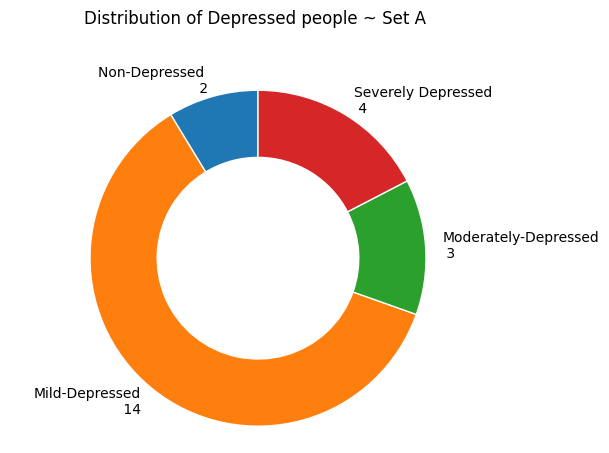

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Non-Depressed \n %s' % non_dep_tot1, 'Mild-Depressed\n %s'% mild_dep_tot1 , 'Moderately-Depressed\n %s' % mod_dep_tot1, 'Severely Depressed\n %s' % sev_dep_tot1]
# Percentages corresponding to each category
percentages = [100*non_dep_tot1/total1_dep, 100*mild_dep_tot1/total1_dep, 100*mod_dep_tot1/total1_dep, 100*sev_dep_tot1/total1_dep]
actual_numbers = [non_dep_tot1, mild_dep_tot1, mod_dep_tot1, sev_dep_tot1]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Depressed people ~ Set A \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
seta_dep = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_avg = 0
    mod_dep_avg = 0
    mild_dep_avg = 0
    non_dep_avg = 0

    sev_dep_tot = 0
    mild_dep_tot = 0
    mod_dep_tot = 0
    non_dep_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_phq_score'])):
        if dfs[i]['total_phq_score'][k] > 14:
          if j in dfs[i][col].name:
            sev_dep_tot +=1
            sev_dep_avg += dfs[i][col][k]

        elif dfs[i]['total_phq_score'][k] > 9:
          if j in dfs[i][col].name:
            mod_dep_tot +=1
            mod_dep_avg += dfs[i][col][k]

        elif dfs[i]['total_phq_score'][k] > 4:
          if j in dfs[i][col].name:
            mild_dep_tot +=1
            mild_dep_avg += dfs[i][col][k]
        else:
          if j in dfs[i][col].name:
            non_dep_tot +=1
            non_dep_avg += dfs[i][col][k]
    seta_dep[f'seta_{emotions[i]}_avg_{j}_sev_dep'] = sev_dep_avg/sev_dep_tot
    seta_dep[f'seta_{emotions[i]}_avg_{j}_mod_dep'] = mod_dep_avg/mod_dep_tot
    seta_dep[f'seta_{emotions[i]}_avg_{j}_mild_dep'] = mild_dep_avg/mild_dep_tot
    seta_dep[f'seta_{emotions[i]}_avg_{j}_non_dep'] = non_dep_avg/non_dep_tot
    #     tot+=1
    #     avg += sum(dfs[i][col].values)
    # seta_avg[f'seta_{emotions[i]}_avg_{j}'] = avg/(tot*len(dfs[i].index))

In [ ]:
sev_anx_tot1 = 0
mod_anx_tot1 = 0
mild_anx_tot1 =0
non_anx_tot1 = 0

for i in range(len(df_merged_1['total_gad_score'].values)):
  if df_merged_1['total_gad_score'].values[i] >14:
    sev_anx_tot1 +=1
  elif df_merged_1['total_gad_score'].values[i] >9:
    mod_anx_tot1 +=1
  elif df_merged_1['total_gad_score'].values[i] >4:
    mild_anx_tot1 +=1
  else:
    non_anx_tot1 +=1

In [ ]:
print(sev_anx_tot1)
print(mod_anx_tot1)
print(mild_anx_tot1)
print(non_anx_tot1)
total1_anx = sev_anx_tot1 + mod_anx_tot1 + mild_anx_tot1 + non_anx_tot1
print(total1_anx)

0
4
8
11
23


CREATING PIE CHART FOR DISRIBUTION

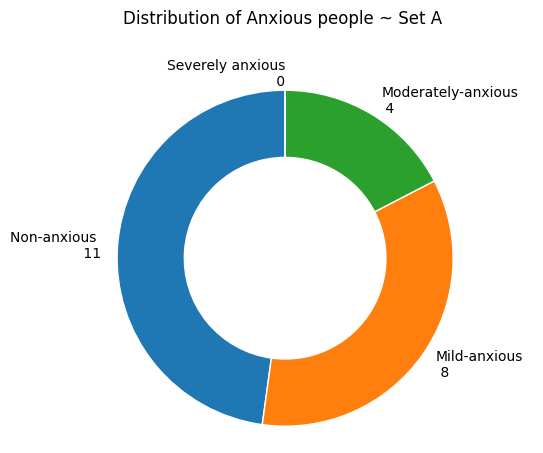

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Non-anxious \n %s' % non_anx_tot1, 'Mild-anxious\n %s'% mild_anx_tot1 , 'Moderately-anxious\n %s' % mod_anx_tot1, 'Severely anxious\n %s' % sev_anx_tot1]
# Percentages corresponding to each category
percentages = [100*non_anx_tot1/total1_anx, 100*mild_anx_tot1/total1_anx, 100*mod_anx_tot1/total1_anx, 100*sev_anx_tot1/total1_anx]
actual_numbers = [non_anx_tot1, mild_anx_tot1, mod_anx_tot1, sev_anx_tot1]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Anxious people ~ Set A \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
seta_anx = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_avg = 0
    mod_anx_avg = 0
    mild_anx_avg = 0
    non_anx_avg = 0

    sev_anx_tot = 0
    mod_anx_tot = 0
    mild_anx_tot = 0
    non_anx_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_gad_score'])):
        if dfs[i]['total_gad_score'][k] > 14:
          if j in dfs[i][col].name:
            sev_anx_tot +=1
            sev_anx_avg += dfs[i][col][k]
        elif dfs[i]['total_gad_score'][k] > 9:
          if j in dfs[i][col].name:
            mod_anx_tot +=1
            mod_anx_avg += dfs[i][col][k]
        elif dfs[i]['total_gad_score'][k] > 4:
          if j in dfs[i][col].name:
            mild_anx_tot +=1
            mild_anx_avg += dfs[i][col][k]
        else:
          if j in dfs[i][col].name:
            non_anx_tot +=1
            non_anx_avg += dfs[i][col][k]
    if sev_anx_tot == 0:
      seta_anx[f'seta_{emotions[i]}_avg_{j}_sev_anx'] = 0
    else:
      seta_anx[f'seta_{emotions[i]}_avg_{j}_sev_anx'] = sev_anx_avg/sev_anx_tot
    seta_anx[f'seta_{emotions[i]}_avg_{j}_mod_anx'] = mod_anx_avg/mod_anx_tot
    seta_anx[f'seta_{emotions[i]}_avg_{j}_mild_anx'] = mild_anx_avg/mild_anx_tot
    seta_anx[f'seta_{emotions[i]}_avg_{j}_non_anx'] = non_anx_avg/non_anx_tot
    #     tot+=1
    #     avg += sum(dfs[i][col].values)
    # seta_avg[f'seta_{emotions[i]}_avg_{j}'] = avg/(tot*len(dfs[i].index))

Now we will make tables out of it

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot1, "Mild-Depressed : (%s)" % mild_dep_tot1, "Moderately-Depressed : (%s)" % mod_dep_tot1, "Severely-Depressed : (%s)" % sev_dep_tot1])
myTable.title = 'Arousal ~ Mean ~ Set 1'
# Adding rows
myTable.add_row(["Happy (6)", round(seta_dep['seta_Happy_avg_arous_non_dep'],2),
                 round(seta_dep['seta_Happy_avg_arous_mild_dep'],2),
                 round(seta_dep['seta_Happy_avg_arous_mod_dep'],2),
                 round(seta_dep['seta_Happy_avg_arous_sev_dep'],2)])
myTable.add_row(["Sad (6)", round(seta_dep['seta_Sad_avg_arous_non_dep'],2),
                 round(seta_dep['seta_Sad_avg_arous_mild_dep'],2),
                 round(seta_dep['seta_Sad_avg_arous_mod_dep'],2),
                 round(seta_dep['seta_Sad_avg_arous_sev_dep'],2)])
myTable.add_row(["Angry (6)", round(seta_dep['seta_Angry_avg_arous_non_dep'],2),
                 round(seta_dep['seta_Angry_avg_arous_mild_dep'],2),
                 round(seta_dep['seta_Angry_avg_arous_mod_dep'],2),
                 round(seta_dep['seta_Angry_avg_arous_sev_dep'],2)])
myTable.add_row(["Neutral (7)", round(seta_dep['seta_Neutral_avg_arous_non_dep'],2),
                 round(seta_dep['seta_Neutral_avg_arous_mild_dep'],2),
                 round(seta_dep['seta_Neutral_avg_arous_mod_dep'],2),
                 round(seta_dep['seta_Neutral_avg_arous_sev_dep'],2)])
print('For Arousal ~ Set 1')
print(myTable)

For Arousal ~ Set 1
+-------------------------------------------------------------------------------------------------------------------+
|                                               Arousal ~ Mean ~ Set 1                                              |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|   Emotion   | Non-Depressed : (2) | Mild-Depressed : (14) | Moderately-Depressed : (3) | Severely-Depressed : (4) |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy (6)  |         4.58        |          3.77         |            3.06            |           4.08           |
|   Sad (6)   |         2.17        |          2.06         |            2.0             |           2.0            |
|  Angry (6)  |         3.0         |          3.05         |            2.83            |           3.04           |
| Neutral (7) |         2.14        

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot1, "Mild-Depressed : (%s)" % mild_dep_tot1, "Moderately-Depressed : (%s)" % mod_dep_tot1, "Severely-Depressed : (%s)" % sev_dep_tot1])
myTable.title = 'Valence ~ Mean ~ Set 1'
# Adding rows
myTable.add_row(["Happy (6)", round(seta_dep['seta_Happy_avg_val_non_dep'],2),
                 round(seta_dep['seta_Happy_avg_val_mild_dep'],2),
                 round(seta_dep['seta_Happy_avg_val_mod_dep'],2),
                 round(seta_dep['seta_Happy_avg_val_sev_dep'],2)])
myTable.add_row(["Sad (6)", round(seta_dep['seta_Sad_avg_val_non_dep'],2),
                 round(seta_dep['seta_Sad_avg_val_mild_dep'],2),
                 round(seta_dep['seta_Sad_avg_val_mod_dep'],2),
                 round(seta_dep['seta_Sad_avg_val_sev_dep'],2)])
myTable.add_row(["Angry (6)", round(seta_dep['seta_Angry_avg_val_non_dep'],2),
                 round(seta_dep['seta_Angry_avg_val_mild_dep'],2),
                 round(seta_dep['seta_Angry_avg_val_mod_dep'],2),
                 round(seta_dep['seta_Angry_avg_val_sev_dep'],2)])
myTable.add_row(["Neutral (7)", round(seta_dep['seta_Neutral_avg_val_non_dep'],2),
                 round(seta_dep['seta_Neutral_avg_val_mild_dep'],2),
                 round(seta_dep['seta_Neutral_avg_val_mod_dep'],2),
                 round(seta_dep['seta_Neutral_avg_val_sev_dep'],2)])
print('For Valence ~ Session 1')
print(myTable)

For Valence ~ Session 1
+-------------------------------------------------------------------------------------------------------------------+
|                                               Valence ~ Mean ~ Set 1                                              |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|   Emotion   | Non-Depressed : (2) | Mild-Depressed : (14) | Moderately-Depressed : (3) | Severely-Depressed : (4) |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy (6)  |         4.25        |          3.98         |            3.78            |           4.08           |
|   Sad (6)   |         2.42        |          2.42         |            2.22            |           2.46           |
|  Angry (6)  |         2.83        |          2.96         |            2.94            |           2.71           |
| Neutral (7) |         2.71    

## Set B

In [ ]:
# Loading the data into a Pandas DataFrame
df_merged_2 = pd.read_csv('df_set2_final.csv')

In [ ]:
df_merged_2.head()

,Unnamed: 0.1,Unnamed: 0,Rec_Session_Id,Trial_Nr,Trial_Id,Block_Name,Block_Nr,Task_Name,Task_Nr,ADD/ADHD,...,total_phq_score,familial_history1_no,personal_history1_yes,current_histoy1_yes,perosnal_history2_self_describe,personal_history2_yes_self_describe,total_pss_score,total_stait_score,total_panas_score,total_fluency_score
0,0,0,784928,1,1,block_2,1,PHQ9 - GAD - PSS,6,False,...,12,NaN,NaN,NaN,NaN,NaN,7,10,31,6
1,1,1,783995,1,1,block_2,1,PHQ9 - GAD - PSS,6,False,...,6,No,NaN,NaN,NaN,NaN,7,10,29,5
2,2,2,784046,1,1,block_2,1,PHQ9 - GAD - PSS,6,False,...,1,No,NaN,NaN,NaN,NaN,7,6,26,6
3,3,3,801812,1,1,block_2,1,PHQ9 - GAD - PSS,6,False,...,3,No,NaN,NaN,NaN,NaN,3,10,24,6
4,4,4,801644,1,1,block_2,1,PHQ9 - GAD - PSS,6,False,...,2,No,NaN,NaN,NaN,NaN,3,8,25,6


In [ ]:
emo_setb = ['Sad',
            'Neutral',
            'Angry',
            'Neutral',
            'Angry',
            'Happy',
            'Angry',
            'Happy',
            'Sad',
            'Happy',
            'Angry',
            'Happy',
            'Sad',
            'Happy',
            'Sad',
            'Neutral',
            'Sad',
            'Angry',
            'Neutral',
            'Happy',
            'Neutral',
            'Sad',
            'Angry',
            'Sad',
            'Neutral']

In [ ]:
emotions = ['Happy', 'Sad', 'Angry', 'Neutral']
dfs2 = []
for j in emotions:
  temp = {}
  temp['Rec_Session_Id'] = list(df_merged_2['Rec_Session_Id'].values)
  temp['total_gad_score'] = list(df_merged_2['total_gad_score'].values)
  temp['total_phq_score'] = list(df_merged_2['total_phq_score'].values)
  temp['total_pss_score'] = list(df_merged_2['total_pss_score'].values)
  temp['total_panas_score'] = list(df_merged_2['total_panas_score'].values)
  temp['total_fluency_score'] = list(df_merged_2['total_fluency_score'].values)

  for i in range(len(emo_setb)):
    if emo_setb[i] == j:
      # temp = {}
      temp[f'q{i+1}_val_setb'] = list(df_merged_2[f'q{i+1}_val_setb'].values)
      temp[f'q{i+1}_arous_setb'] = list(df_merged_2[f'q{i+1}_arous_setb'].values)
      temp[f'rt{i+1}a'] = list(df_merged_2[f'rt{i+1}a'].values)

  globals()[f'df2_{j}'] = pd.DataFrame.from_dict(temp)
  dfs2.append(globals()[f'df2_{j}'] )

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setb_avg = {}
for i in range(len(emotions)):
  for j in category:
    avg = 0
    tot = 0
    for col in dfs2[i]:
      if j in dfs2[i][col].name:
        tot+=1
        avg += sum(dfs2[i][col].values)
    setb_avg[f'setb_{emotions[i]}_avg_{j}'] = avg/(tot*len(dfs2[i].index))

In [ ]:
sev_dep_tot2 = 0
mod_dep_tot2 = 0
mild_dep_tot2 =0
non_dep_tot2 = 0

for i in range(len(df_merged_2['total_phq_score'].values)):
  if df_merged_2['total_phq_score'].values[i] >14:
    sev_dep_tot2 +=1
  elif df_merged_2['total_phq_score'].values[i] >9:
    mod_dep_tot2 +=1
  elif df_merged_2['total_phq_score'].values[i] >4:
    mild_dep_tot2 +=1
  else:
    non_dep_tot2 +=1

In [ ]:
print(sev_dep_tot2)
print(mod_dep_tot2)
print(mild_dep_tot2)
print(non_dep_tot2)
total2_dep = sev_dep_tot2 + mod_dep_tot2 + mild_dep_tot2 + non_dep_tot2
print(total2_dep)

3
3
10
10
26


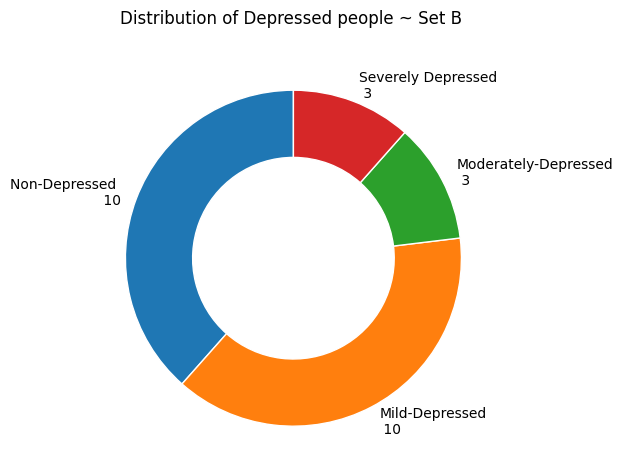

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Non-Depressed \n %s' % non_dep_tot2, 'Mild-Depressed\n %s'% mild_dep_tot2 , 'Moderately-Depressed\n %s' % mod_dep_tot2, 'Severely Depressed\n %s' % sev_dep_tot2]
# Percentages corresponding to each category
percentages = [100*non_dep_tot2/total2_dep, 100*mild_dep_tot2/total2_dep, 100*mod_dep_tot2/total2_dep, 100*sev_dep_tot2/total2_dep]
actual_numbers = [non_dep_tot2, mild_dep_tot2, mod_dep_tot2, sev_dep_tot2]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Depressed people ~ Set B \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setb_dep = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_avg = 0
    mod_dep_avg = 0
    mild_dep_avg = 0
    non_dep_avg = 0

    sev_dep_tot = 0
    mod_dep_tot = 0
    mild_dep_tot = 0
    non_dep_tot = 0

    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_phq_score'])):
        if dfs2[i]['total_phq_score'][k] > 14:
          if j in dfs2[i][col].name:
            sev_dep_tot +=1
            sev_dep_avg += dfs2[i][col][k]
        elif dfs2[i]['total_phq_score'][k] > 9:
          if j in dfs2[i][col].name:
            mod_dep_tot +=1
            mod_dep_avg += dfs2[i][col][k]
        elif dfs2[i]['total_phq_score'][k] > 4:
          if j in dfs2[i][col].name:
            mild_dep_tot +=1
            mild_dep_avg += dfs2[i][col][k]
        else:
          if j in dfs2[i][col].name:
            non_dep_tot +=1
            non_dep_avg += dfs2[i][col][k]
    setb_dep[f'setb_{emotions[i]}_avg_{j}_sev_dep'] = sev_dep_avg/sev_dep_tot
    setb_dep[f'setb_{emotions[i]}_avg_{j}_mod_dep'] = mod_dep_avg/mod_dep_tot
    setb_dep[f'setb_{emotions[i]}_avg_{j}_mild_dep'] = mild_dep_avg/mild_dep_tot
    setb_dep[f'setb_{emotions[i]}_avg_{j}_non_dep'] = non_dep_avg/non_dep_tot

In [ ]:
sev_anx_tot2 = 0
mod_anx_tot2 = 0
mild_anx_tot2 = 0
non_anx_tot2 = 0

for i in range(len(df_merged_2['total_gad_score'].values)):
  if df_merged_2['total_gad_score'].values[i] >14:
    sev_anx_tot2 +=1
  elif df_merged_2['total_gad_score'].values[i] >9:
    mod_anx_tot2 +=1
  elif df_merged_2['total_gad_score'].values[i] >4:
    mild_anx_tot2 +=1
  else:
    non_anx_tot2 +=1

In [ ]:
print(sev_anx_tot2)
print(mod_anx_tot2)
print(mild_anx_tot2)
print(non_anx_tot2)
total2_anx = sev_anx_tot2 + mod_anx_tot2 + mild_anx_tot2 + non_anx_tot2
print(total2_anx)

4
3
6
13
26


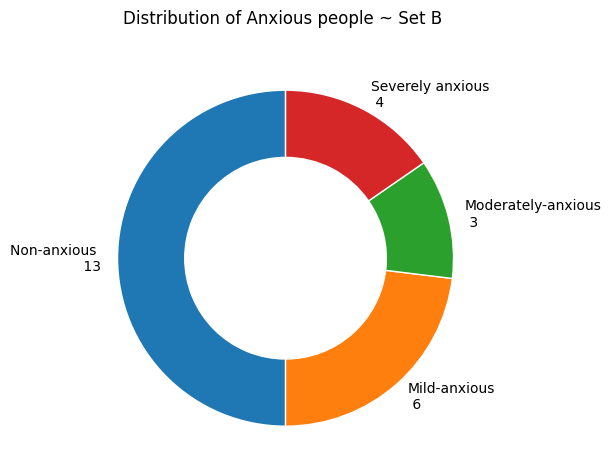

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Non-anxious \n %s' % non_anx_tot2, 'Mild-anxious\n %s'% mild_anx_tot2 , 'Moderately-anxious\n %s' % mod_anx_tot2, 'Severely anxious\n %s' % sev_anx_tot2]
# Percentages corresponding to each category
percentages = [100*non_anx_tot2/total2_anx, 100*mild_anx_tot2/total2_anx, 100*mod_anx_tot2/total2_anx, 100*sev_anx_tot2/total2_anx]
actual_numbers = [non_anx_tot2, mild_anx_tot2, mod_anx_tot2, sev_anx_tot2]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Anxious people ~ Set B \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setb_anx = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_avg = 0
    mild_anx_avg = 0
    mod_anx_avg = 0
    non_anx_avg = 0

    sev_anx_tot = 0
    mild_anx_tot = 0
    mod_anx_tot = 0
    non_anx_tot = 0

    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_gad_score'])):
        if dfs2[i]['total_gad_score'][k] > 14:
          if j in dfs2[i][col].name:
            sev_anx_tot +=1
            sev_anx_avg += dfs2[i][col][k]
        elif dfs2[i]['total_gad_score'][k] > 9:
          if j in dfs2[i][col].name:
            mod_anx_tot +=1
            mod_anx_avg += dfs2[i][col][k]
        elif dfs2[i]['total_gad_score'][k] > 4:
          if j in dfs2[i][col].name:
            mild_anx_tot +=1
            mild_anx_avg += dfs2[i][col][k]
        else:
          if j in dfs2[i][col].name:
            non_anx_tot +=1
            non_anx_avg += dfs2[i][col][k]

    setb_anx[f'setb_{emotions[i]}_avg_{j}_sev_anx'] = sev_anx_avg/sev_anx_tot
    setb_anx[f'setb_{emotions[i]}_avg_{j}_mod_anx'] = mod_anx_avg/mod_anx_tot
    setb_anx[f'setb_{emotions[i]}_avg_{j}_mild_anx'] = mild_anx_avg/mild_anx_tot
    setb_anx[f'setb_{emotions[i]}_avg_{j}_non_anx'] = non_anx_avg/non_anx_tot

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot2, "Mild-Depressed : (%s)" % mild_dep_tot2, "Moderately-Depressed : (%s)" % mod_dep_tot2, "Severely-Depressed : (%s)" % sev_dep_tot2])
myTable.title = 'Arousal ~ Mean ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_dep['setb_Happy_avg_arous_non_dep'],2),
                 round(setb_dep['setb_Happy_avg_arous_mild_dep'],2),
                 round(setb_dep['setb_Happy_avg_arous_mod_dep'],2),
                 round(setb_dep['setb_Happy_avg_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setb_dep['setb_Sad_avg_arous_non_dep'],2),
                 round(setb_dep['setb_Sad_avg_arous_mild_dep'],2),
                 round(setb_dep['setb_Sad_avg_arous_mod_dep'],2),
                 round(setb_dep['setb_Sad_avg_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setb_dep['setb_Angry_avg_arous_non_dep'],2),
                 round(setb_dep['setb_Angry_avg_arous_mild_dep'],2),
                 round(setb_dep['setb_Angry_avg_arous_mod_dep'],2),
                 round(setb_dep['setb_Angry_avg_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setb_dep['setb_Neutral_avg_arous_non_dep'],2),
                 round(setb_dep['setb_Neutral_avg_arous_mild_dep'],2),
                 round(setb_dep['setb_Neutral_avg_arous_mod_dep'],2),
                 round(setb_dep['setb_Neutral_avg_arous_sev_dep'],2)
                 ])
print('Arousal ~ Mean ~ Set 2')
print(myTable)

Arousal ~ Mean ~ Set 2
+----------------------------------------------------------------------------------------------------------------+
|                                             Arousal ~ Mean ~ Set 2                                             |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (10) | Mild-Depressed : (10) | Moderately-Depressed : (3) | Severely-Depressed : (3) |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.22         |          3.25         |            4.0             |           2.56           |
|   Sad   |         1.79         |          2.23         |            2.43            |           1.81           |
|  Angry  |         3.88         |          3.7          |            3.89            |           3.72           |
| Neutral |         1.95         |          2.2          

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot2, "Mild-Depressed : (%s)" % mild_dep_tot2, "Moderately-Depressed : (%s)" % mod_dep_tot2, "Severely-Depressed : (%s)" % sev_dep_tot2])
myTable.title = 'Valence ~ Mean ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_dep['setb_Happy_avg_val_non_dep'],2),
                 round(setb_dep['setb_Happy_avg_val_mild_dep'],2),
                 round(setb_dep['setb_Happy_avg_val_mod_dep'],2),
                 round(setb_dep['setb_Happy_avg_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setb_dep['setb_Sad_avg_val_non_dep'],2),
                 round(setb_dep['setb_Sad_avg_val_mild_dep'],2),
                 round(setb_dep['setb_Sad_avg_val_mod_dep'],2),
                 round(setb_dep['setb_Sad_avg_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setb_dep['setb_Angry_avg_val_non_dep'],2),
                 round(setb_dep['setb_Angry_avg_val_mild_dep'],2),
                 round(setb_dep['setb_Angry_avg_val_mod_dep'],2),
                 round(setb_dep['setb_Angry_avg_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setb_dep['setb_Neutral_avg_val_non_dep'],2),
                 round(setb_dep['setb_Neutral_avg_val_mild_dep'],2),
                 round(setb_dep['setb_Neutral_avg_val_mod_dep'],2),
                 round(setb_dep['setb_Neutral_avg_val_sev_dep'],2)
                 ])
print('For Valence ~ Mean ~ Session 2')
print(myTable)

For Valence ~ Mean ~ Session 2
+----------------------------------------------------------------------------------------------------------------+
|                                             Valence ~ Mean ~ Set 2                                             |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (10) | Mild-Depressed : (10) | Moderately-Depressed : (3) | Severely-Depressed : (3) |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.92         |          4.08         |            4.44            |           4.17           |
|   Sad   |         2.46         |          2.8          |            2.05            |           2.14           |
|  Angry  |         2.08         |          2.13         |            1.94            |           2.06           |
| Neutral |         3.13         |          3.15 

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot2, "Mildly-Anxious : (%s)" % mild_anx_tot2, "Moderately-Anxious : (%s)" % mod_anx_tot2, "Severely-Anxious : (%s)" % sev_anx_tot2])
myTable.title = 'Arousal ~ Mean ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_anx['setb_Happy_avg_arous_non_anx'],2),
                 round(setb_anx['setb_Happy_avg_arous_mild_anx'],2),
                 round(setb_anx['setb_Happy_avg_arous_mod_anx'],2),
                 round(setb_anx['setb_Happy_avg_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setb_anx['setb_Sad_avg_arous_non_anx'],2),
                 round(setb_anx['setb_Sad_avg_arous_mild_anx'],2),
                 round(setb_anx['setb_Sad_avg_arous_mod_anx'],2),
                 round(setb_anx['setb_Sad_avg_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setb_anx['setb_Angry_avg_arous_non_anx'],2),
                 round(setb_anx['setb_Angry_avg_arous_mild_anx'],2),
                 round(setb_anx['setb_Angry_avg_arous_mod_anx'],2),
                 round(setb_anx['setb_Angry_avg_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setb_anx['setb_Neutral_avg_arous_non_anx'],2),
                 round(setb_anx['setb_Neutral_avg_arous_mild_anx'],2),
                 round(setb_anx['setb_Neutral_avg_arous_mod_anx'],2),
                 round(setb_anx['setb_Neutral_avg_arous_sev_anx'],2)
                 ])
print('Arousal ~ Mean ~ Set 2')
print(myTable)

Arousal ~ Mean ~ Set 2
+---------------------------------------------------------------------------------------------------------+
|                                          Arousal ~ Mean ~ Set 2                                         |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (6) | Moderately-Anxious : (3) | Severely-Anxious : (4) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.18        |         3.28         |           3.89           |          2.92          |
|   Sad   |        1.71        |         2.52         |           3.0            |          1.61          |
|  Angry  |        3.85        |         3.56         |           4.17           |          3.71          |
| Neutral |        1.85        |         2.58         |           2.56           |          1.75          |
+----

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot2, "Mildly-Anxious : (%s)" % mild_anx_tot2, "Moderately-Anxious : (%s)" % mod_anx_tot2, "Severely-Anxious : (%s)" % sev_anx_tot2])
myTable.title = 'Valence ~ Mean ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_anx['setb_Happy_avg_val_non_anx'],2),
                 round(setb_anx['setb_Happy_avg_val_mild_anx'],2),
                 round(setb_anx['setb_Happy_avg_val_mod_anx'],2),
                 round(setb_anx['setb_Happy_avg_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setb_anx['setb_Sad_avg_val_non_anx'],2),
                 round(setb_anx['setb_Sad_avg_val_mild_anx'],2),
                 round(setb_anx['setb_Sad_avg_val_mod_anx'],2),
                 round(setb_anx['setb_Sad_avg_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setb_anx['setb_Angry_avg_val_non_anx'],2),
                 round(setb_anx['setb_Angry_avg_val_mild_anx'],2),
                 round(setb_anx['setb_Angry_avg_val_mod_anx'],2),
                 round(setb_anx['setb_Angry_avg_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setb_anx['setb_Neutral_avg_val_non_anx'],2),
                 round(setb_anx['setb_Neutral_avg_val_mild_anx'],2),
                 round(setb_anx['setb_Neutral_avg_val_mod_anx'],2),
                 round(setb_anx['setb_Neutral_avg_val_sev_anx'],2)
                 ])
print('Valence ~ Mean ~ Set 2')
print(myTable)

Valence ~ Mean ~ Set 2
+---------------------------------------------------------------------------------------------------------+
|                                          Valence ~ Mean ~ Set 2                                         |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (6) | Moderately-Anxious : (3) | Severely-Anxious : (4) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.85        |         4.31         |           4.39           |          4.21          |
|   Sad   |        2.67        |         2.48         |           2.38           |          2.11          |
|  Angry  |        2.09        |         2.19         |           1.83           |          2.08          |
| Neutral |        3.21        |         3.0          |           3.06           |          2.04          |
+----

## Set C

In [ ]:
# Loading the data into a Pandas DataFrame
df_merged_3 = pd.read_csv('df_set3_final.csv')

In [ ]:
df_merged_3.head()

,Unnamed: 0.1,Unnamed: 0,Rec_Session_Id,Trial_Nr,Trial_Id,Block_Name,Block_Nr,Task_Name,Task_Nr,ADD/ADHD,...,total_phq_score,familial_history1_no,current_histoy1_yes,personal_history1_yes,perosnal_history2_self_describe,personal_history2_yes_self_describe,total_pss_score,total_stait_score,total_panas_score,total_fluency_score
0,0,0,805054,1,1,block_3,1,PHQ9 - GAD - PSS,6,False,...,8,NaN,NaN,NaN,NaN,NaN,6,14,27,6
1,1,1,805071,1,1,block_3,1,PHQ9 - GAD - PSS,6,False,...,10,No,NaN,NaN,NaN,NaN,9,14,23,2
2,2,2,779926,1,1,block_3,1,PHQ9 - GAD - PSS,6,False,...,5,NaN,NaN,NaN,NaN,NaN,10,7,25,6
3,3,3,779879,1,1,block_3,1,PHQ9 - GAD - PSS,6,False,...,8,No,NaN,NaN,NaN,NaN,2,7,23,6
4,4,4,780360,1,1,block_3,1,PHQ9 - GAD - PSS,6,False,...,8,No,NaN,NaN,NaN,NaN,8,10,28,6


In [ ]:
emo_setc = ['Neutral',
'Happy',
'Sad',
'Happy',
'Angry',
'Happy',
'Angry',
'Sad',
'Happy',
'Neutral',
'Happy',
'Sad',
'Sad',
'Neutral',
'Angry',
'Sad',
'Neutral',
'Angry',
'Happy',
'Neutral',
'Sad',
'Happy',
'Angry',
'Neutral',
'Angry']

In [ ]:
##Particular experiments added
emotions = ['Happy', 'Sad', 'Angry', 'Neutral']
dfs3 = []
for j in emotions:
  temp = {}
  temp['Rec_Session_Id'] = list(df_merged_3['Rec_Session_Id'].values)
  temp['total_gad_score'] = list(df_merged_3['total_gad_score'].values)
  temp['total_phq_score'] = list(df_merged_3['total_phq_score'].values)
  temp['total_pss_score'] = list(df_merged_3['total_pss_score'].values)
  temp['total_panas_score'] = list(df_merged_3['total_panas_score'].values)
  temp['total_fluency_score'] = list(df_merged_3['total_fluency_score'].values)

  for i in range(len(emo_setc)):
    if emo_setc[i] == j:
      # temp = {}
      temp[f'q{i+1}_val_setc'] = list(df_merged_3[f'q{i+1}_val_setc'].values)
      temp[f'q{i+1}_arous_setc'] = list(df_merged_3[f'q{i+1}_arous_setc'].values)
      temp[f'rt{i+1}a'] = list(df_merged_3[f'rt{i+1}a'].values)

  globals()[f'df3_{j}'] = pd.DataFrame.from_dict(temp)
  dfs3.append(globals()[f'df3_{j}'] )

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setc_avg = {}
for i in range(len(emotions)):
  for j in category:
    avg = 0
    tot = 0
    for col in dfs3[i]:
      if j in dfs3[i][col].name:
        tot+=1
        avg += sum(dfs3[i][col].values)
    setc_avg[f'setc_{emotions[i]}_avg_{j}'] = avg/(tot*len(dfs3[i].index))

In [ ]:
setc_avg

{'setc_Happy_avg_val': 3.5952380952380953,
 'setc_Happy_avg_arous': 3.3154761904761907,
 'setc_Sad_avg_val': 1.9652777777777777,
 'setc_Sad_avg_arous': 2.5,
 'setc_Angry_avg_val': 1.8333333333333333,
 'setc_Angry_avg_arous': 3.8402777777777777,
 'setc_Neutral_avg_val': 3.2291666666666665,
 'setc_Neutral_avg_arous': 2.3055555555555554}

In [ ]:
sev_dep_tot3 = 0
mild_dep_tot3 =0
mod_dep_tot3 = 0
non_dep_tot3 = 0

for i in range(len(df_merged_3['total_phq_score'].values)):
  if df_merged_3['total_phq_score'].values[i] >14:
    sev_dep_tot3 +=1
  elif df_merged_3['total_phq_score'].values[i] >9:
    mod_dep_tot3 +=1
  elif df_merged_3['total_phq_score'].values[i] >4:
    mild_dep_tot3 +=1
  else:
    non_dep_tot3 +=1

In [ ]:
print(sev_dep_tot3)
print(mod_dep_tot3)
print(mild_dep_tot3)
print(non_dep_tot3)
total3_dep = sev_dep_tot3 + mod_dep_tot3 + mild_dep_tot3 + non_dep_tot3
print("total partcipants in Set C are : " + str(total3_dep))

2
3
13
6
total partcipants in Set C are : 24


Lets see the distribution in Set 3

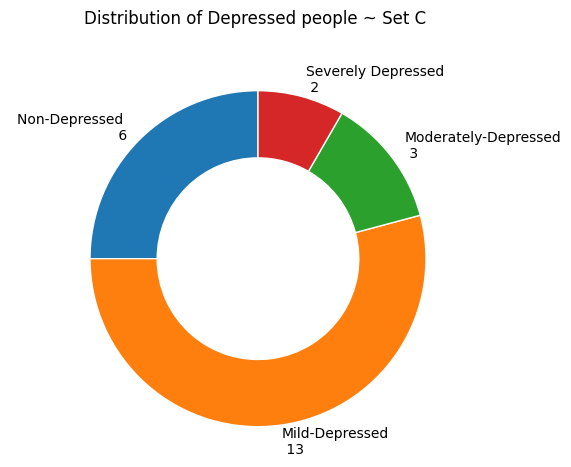

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Non-Depressed \n %s' % non_dep_tot3, 'Mild-Depressed\n %s'% mild_dep_tot3 , 'Moderately-Depressed\n %s' % mod_dep_tot3, 'Severely Depressed\n %s' % sev_dep_tot3]
# Percentages corresponding to each category
percentages = [100*non_dep_tot3/total3_dep, 100*mild_dep_tot3/total3_dep, 100*mod_dep_tot3/total3_dep, 100*sev_dep_tot3/total3_dep]
actual_numbers = [non_dep_tot3, mild_dep_tot3, mod_dep_tot3, sev_dep_tot3]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Depressed people ~ Set C \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setc_dep = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_avg = 0
    mod_dep_avg = 0
    mild_dep_avg = 0
    non_dep_avg = 0

    sev_dep_tot = 0
    mod_dep_tot = 0
    mild_dep_tot = 0
    non_dep_tot = 0

    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_phq_score'])):
        if dfs3[i]['total_phq_score'][k] > 14:
          if j in dfs3[i][col].name:
            sev_dep_tot +=1
            sev_dep_avg += dfs3[i][col][k]
        elif dfs3[i]['total_phq_score'][k] > 9:
          if j in dfs3[i][col].name:
            mod_dep_tot +=1
            mod_dep_avg += dfs3[i][col][k]
        elif dfs3[i]['total_phq_score'][k] > 4:
          if j in dfs3[i][col].name:
            mild_dep_tot +=1
            mild_dep_avg += dfs3[i][col][k]
        else:
          if j in dfs3[i][col].name:
            non_dep_tot +=1
            non_dep_avg += dfs3[i][col][k]

    setc_dep[f'setc_{emotions[i]}_avg_{j}_sev_dep'] = sev_dep_avg/sev_dep_tot
    setc_dep[f'setc_{emotions[i]}_avg_{j}_mod_dep'] = mod_dep_avg/mod_dep_tot
    setc_dep[f'setc_{emotions[i]}_avg_{j}_mild_dep'] = mild_dep_avg/mild_dep_tot
    setc_dep[f'setc_{emotions[i]}_avg_{j}_non_dep'] = non_dep_avg/non_dep_tot

In [ ]:
sev_anx_tot3 = 0
mod_anx_tot3 = 0
mild_anx_tot3 =0
non_anx_tot3 = 0

for i in range(len(df_merged_3['total_gad_score'].values)):
  if df_merged_3['total_gad_score'].values[i] >14:
    sev_anx_tot3 +=1
  elif df_merged_3['total_gad_score'].values[i] >9:
    mod_anx_tot3 +=1
  elif df_merged_3['total_gad_score'].values[i] >4:
    mild_anx_tot3 +=1
  else:
    non_anx_tot3 +=1

In [ ]:
print(sev_anx_tot3)
print(mod_anx_tot3)
print(mild_anx_tot3)
print(non_anx_tot3)
total3_anx = sev_anx_tot3 + mod_anx_tot3 + mild_anx_tot3 + non_anx_tot3
print("total partcipants in Set C are : " + str(total3_anx))

1
2
8
13
total partcipants in Set C are : 24


Lets see the distribution of anxious people in Set C

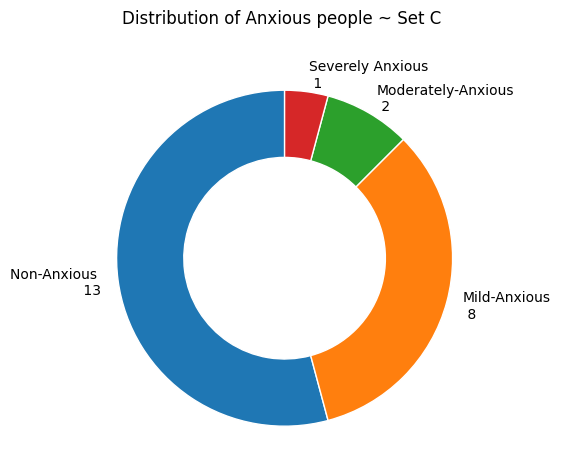

In [ ]:
categories = ['Non-Anxious \n %s' % non_anx_tot3, 'Mild-Anxious\n %s'% mild_anx_tot3 , 'Moderately-Anxious\n %s' % mod_anx_tot3, 'Severely Anxious\n %s' % sev_anx_tot3]
# Percentages corresponding to each category
percentages = [100*non_anx_tot3/total3_anx, 100*mild_anx_tot3/total3_anx, 100*mod_anx_tot3/total3_anx, 100*sev_anx_tot3/total3_anx]
actual_numbers = [non_anx_tot3, mild_anx_tot3, mod_anx_tot3, sev_anx_tot3]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Anxious people ~ Set C \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setc_anx = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_avg = 0
    mod_anx_avg = 0
    mild_anx_avg = 0
    non_anx_avg = 0

    sev_anx_tot = 0
    mod_anx_tot = 0
    mild_anx_tot = 0
    non_anx_tot = 0

    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_gad_score'])):
        if dfs3[i]['total_gad_score'][k] > 14:
          if j in dfs3[i][col].name:
            sev_anx_tot +=1
            sev_anx_avg += dfs3[i][col][k]
        elif dfs3[i]['total_gad_score'][k] > 9:
          if j in dfs3[i][col].name:
            mod_anx_tot +=1
            mod_anx_avg += dfs3[i][col][k]
        elif dfs3[i]['total_gad_score'][k] > 4:
          if j in dfs3[i][col].name:
            mild_anx_tot +=1
            mild_anx_avg += dfs3[i][col][k]
        else:
          if j in dfs3[i][col].name:
            non_anx_tot +=1
            non_anx_avg += dfs3[i][col][k]

    setc_anx[f'setc_{emotions[i]}_avg_{j}_sev_anx'] = sev_anx_avg/sev_anx_tot
    setc_anx[f'setc_{emotions[i]}_avg_{j}_mod_anx'] = mod_anx_avg/mod_anx_tot
    setc_anx[f'setc_{emotions[i]}_avg_{j}_mild_anx'] = mild_anx_avg/mild_anx_tot
    setc_anx[f'setc_{emotions[i]}_avg_{j}_non_anx'] = non_anx_avg/non_anx_tot

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot3, "Mild-Depressed : (%s)" % mild_dep_tot3, "Moderately-Depressed : (%s)" % mod_dep_tot3, "Severely-Depressed : (%s)" % sev_dep_tot3])
myTable.title = 'Arousal ~ Mean ~ Set C'
# Add rows
myTable.add_row(["Happy", round(setc_dep['setc_Happy_avg_arous_non_dep'],2),
                 round(setc_dep['setc_Happy_avg_arous_mild_dep'],2),
                 round(setc_dep['setc_Happy_avg_arous_mod_dep'],2),
                 round(setc_dep['setc_Happy_avg_arous_sev_dep'],2)])
myTable.add_row(["Sad", round(setc_dep['setc_Sad_avg_arous_non_dep'],2),
                 round(setc_dep['setc_Sad_avg_arous_mild_dep'],2),
                 round(setc_dep['setc_Sad_avg_arous_mod_dep'],2),
                 round(setc_dep['setc_Sad_avg_arous_sev_dep'],2)])
myTable.add_row(["Angry", round(setc_dep['setc_Angry_avg_arous_non_dep'],2),
                 round(setc_dep['setc_Angry_avg_arous_mild_dep'],2),
                 round(setc_dep['setc_Angry_avg_arous_mod_dep'],2),
                 round(setc_dep['setc_Angry_avg_arous_sev_dep'],2)])
myTable.add_row(["Neutral", round(setc_dep['setc_Neutral_avg_arous_non_dep'],2),
                 round(setc_dep['setc_Neutral_avg_arous_mild_dep'],2),
                 round(setc_dep['setc_Neutral_avg_arous_mod_dep'],2),
                 round(setc_dep['setc_Neutral_avg_arous_sev_dep'],2)])
print('For Arousal ~ Mean ~ Set 3')
print(myTable)

For Arousal ~ Mean ~ Set 3
+---------------------------------------------------------------------------------------------------------------+
|                                             Arousal ~ Mean ~ Set C                                            |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (6) | Mild-Depressed : (13) | Moderately-Depressed : (3) | Severely-Depressed : (2) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.29        |          3.4          |            2.95            |           3.43           |
|   Sad   |         2.78        |          2.42         |            2.5             |           2.17           |
|  Angry  |         3.94        |          3.79         |            4.06            |           3.5            |
| Neutral |         1.86        |          2.53         |    

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot3, "Mild-Depressed : (%s)" % mild_dep_tot3, "Moderately-Depressed : (%s)" % mod_dep_tot3, "Severely-Depressed : (%s)" % sev_dep_tot3])
myTable.title = 'Valence ~ Mean ~ Set C'
# Add rows
myTable.add_row(["Happy", round(setc_dep['setc_Happy_avg_val_non_dep'],2),
                 round(setc_dep['setc_Happy_avg_val_mild_dep'],2),
                 round(setc_dep['setc_Happy_avg_val_mod_dep'],2),
                 round(setc_dep['setc_Happy_avg_val_sev_dep'],2)])
myTable.add_row(["Sad", round(setc_dep['setc_Sad_avg_val_non_dep'],2),
                 round(setc_dep['setc_Sad_avg_val_mild_dep'],2),
                 round(setc_dep['setc_Sad_avg_val_mod_dep'],2),
                 round(setc_dep['setc_Sad_avg_val_sev_dep'],2)])
myTable.add_row(["Angry", round(setc_dep['setc_Angry_avg_val_non_dep'],2),
                 round(setc_dep['setc_Angry_avg_val_mild_dep'],2),
                 round(setc_dep['setc_Angry_avg_val_mod_dep'],2),
                 round(setc_dep['setc_Angry_avg_val_sev_dep'],2)])
myTable.add_row(["Neutral", round(setc_dep['setc_Neutral_avg_val_non_dep'],2),
                 round(setc_dep['setc_Neutral_avg_val_mild_dep'],2),
                 round(setc_dep['setc_Neutral_avg_val_mod_dep'],2),
                 round(setc_dep['setc_Neutral_avg_val_sev_dep'],2)])
print('For Valence ~ Mean ~ Session 3')
print(myTable)

For Valence ~ Mean ~ Session 3
+---------------------------------------------------------------------------------------------------------------+
|                                             Valence ~ Mean ~ Set C                                            |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (6) | Mild-Depressed : (13) | Moderately-Depressed : (3) | Severely-Depressed : (2) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.48        |          3.64         |            3.52            |           3.79           |
|   Sad   |         2.19        |          1.95         |            1.89            |           1.5            |
|  Angry  |         2.03        |          1.63         |            2.5             |           1.58           |
| Neutral |         3.39        |          3.28         |

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot3, "Mildly-Anxious : (%s)" % mild_anx_tot3, "Moderately-Anxious : (%s)" % mod_anx_tot3, "Severely-Anxious : (%s)" % sev_anx_tot3])
myTable.title = 'Arousal ~ Mean ~ Set C'
# Add rows
myTable.add_row(["Happy", round(setc_anx['setc_Happy_avg_arous_non_anx'],2),
                 round(setc_anx['setc_Happy_avg_arous_mild_anx'],2),
                 round(setc_anx['setc_Happy_avg_arous_mod_anx'],2),
                 round(setc_anx['setc_Happy_avg_arous_sev_anx'],2)])
myTable.add_row(["Sad", round(setc_anx['setc_Sad_avg_arous_non_anx'],2),
                 round(setc_anx['setc_Sad_avg_arous_mild_anx'],2),
                 round(setc_anx['setc_Sad_avg_arous_mod_anx'],2),
                 round(setc_anx['setc_Sad_avg_arous_sev_anx'],2)])
myTable.add_row(["Angry", round(setc_anx['setc_Angry_avg_arous_non_anx'],2),
                 round(setc_anx['setc_Angry_avg_arous_mild_anx'],2),
                 round(setc_anx['setc_Angry_avg_arous_mod_anx'],2),
                 round(setc_anx['setc_Angry_avg_arous_sev_anx'],2)])
myTable.add_row(["Neutral", round(setc_anx['setc_Neutral_avg_arous_non_anx'],2),
                 round(setc_anx['setc_Neutral_avg_arous_mild_anx'],2),
                 round(setc_anx['setc_Neutral_avg_arous_mod_anx'],2),
                 round(setc_anx['setc_Neutral_avg_arous_sev_anx'],2)])
print('For Arousal ~ Mean ~ Set 3')
print(myTable)

For Arousal ~ Mean ~ Set 3
+---------------------------------------------------------------------------------------------------------+
|                                          Arousal ~ Mean ~ Set C                                         |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (8) | Moderately-Anxious : (2) | Severely-Anxious : (1) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.23        |         3.29         |           3.86           |          3.57          |
|   Sad   |        2.62        |         2.71         |           1.5            |          1.33          |
|  Angry  |        3.79        |         4.02         |           2.92           |          4.83          |
| Neutral |        2.21        |         2.27         |           2.75           |          3.0           |
+

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot3, "Mildly-Anxious : (%s)" % mild_anx_tot3, "Moderately-Anxious : (%s)" % mod_anx_tot3, "Severely-Anxious : (%s)" % sev_anx_tot3])
myTable.title = 'Valence ~ Mean ~ Set C'
# Add rows
myTable.add_row(["Happy", round(setc_anx['setc_Happy_avg_val_non_anx'],2),
                 round(setc_anx['setc_Happy_avg_val_mild_anx'],2),
                 round(setc_anx['setc_Happy_avg_val_mod_anx'],2),
                 round(setc_anx['setc_Happy_avg_val_sev_anx'],2)])
myTable.add_row(["Sad", round(setc_anx['setc_Sad_avg_val_non_anx'],2),
                 round(setc_anx['setc_Sad_avg_val_mild_anx'],2),
                 round(setc_anx['setc_Sad_avg_val_mod_anx'],2),
                 round(setc_anx['setc_Sad_avg_val_sev_anx'],2)])
myTable.add_row(["Angry", round(setc_anx['setc_Angry_avg_val_non_anx'],2),
                 round(setc_anx['setc_Angry_avg_val_mild_anx'],2),
                 round(setc_anx['setc_Angry_avg_val_mod_anx'],2),
                 round(setc_anx['setc_Angry_avg_val_sev_anx'],2)])
myTable.add_row(["Neutral", round(setc_anx['setc_Neutral_avg_val_non_anx'],2),
                 round(setc_anx['setc_Neutral_avg_val_mild_anx'],2),
                 round(setc_anx['setc_Neutral_avg_val_mod_anx'],2),
                 round(setc_anx['setc_Neutral_avg_val_sev_anx'],2)])
print('For Valence ~ Mean ~ Set 3')
print(myTable)

For Valence ~ Mean ~ Set 3
+---------------------------------------------------------------------------------------------------------+
|                                          Valence ~ Mean ~ Set C                                         |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (8) | Moderately-Anxious : (2) | Severely-Anxious : (1) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.63        |         3.46         |           4.07           |          3.29          |
|   Sad   |        2.19        |         1.79         |           1.33           |          1.67          |
|  Angry  |        1.9         |         1.85         |           1.58           |          1.33          |
| Neutral |        3.44        |         3.06         |           3.0            |          2.33          |
+

## Set D

In [ ]:
# Loading the data into a Pandas DataFrame
df_merged_4 = pd.read_csv('df_set4_final.csv')

In [ ]:
df_merged_4.head()

,Unnamed: 0.1,Unnamed: 0,Rec_Session_Id,Trial_Nr,Trial_Id,Block_Name,Block_Nr,Task_Name,Task_Nr,ADD/ADHD,...,personal_history1_no,familial_history1_yes,familial_history2,familial_history2_self des,current_histoy1_yes,perosnal_history2_self_describe,total_pss_score,total_stait_score,total_panas_score,total_fluency_score
0,0,0,803882,1,1,block_4,1,PHQ9 - GAD - PSS,6,False,...,NaN,NaN,NaN,NaN,NaN,NaN,8,17,22,6
1,1,1,795626,1,1,block_4,1,PHQ9 - GAD - PSS,6,False,...,No,NaN,NaN,NaN,NaN,NaN,6,9,25,5
2,2,2,800557,1,1,block_4,1,PHQ9 - GAD - PSS,6,False,...,No,NaN,NaN,NaN,NaN,NaN,8,10,22,6
3,3,3,803918,1,1,block_4,1,PHQ9 - GAD - PSS,6,False,...,No,NaN,NaN,NaN,NaN,NaN,9,18,32,3
4,4,4,795083,1,1,block_4,1,PHQ9 - GAD - PSS,6,False,...,NaN,Yes,Parent,NaN,NaN,NaN,10,13,28,6


In [ ]:
# order of labelled speech files in session 4
emo_setd = ['Angry',
'Sad',
'Happy',
'Sad',
'Neutral',
'Happy',
'Angry',
'Sad',
'Angry',
'Neutral',
'Sad',
'Neutral',
'Sad',
'Happy',
'Angry',
'Happy',
'Sad',
'Neutral',
'Angry',
'Happy',
'Neutral',
'Angry',
'Happy',
'Neutral',
'Angry',]

In [ ]:
emotions = ['Happy', 'Sad', 'Angry', 'Neutral']
dfs4 = []
for j in emotions:
  temp = {}
  temp['Rec_Session_Id'] = list(df_merged_4['Rec_Session_Id'].values)
  temp['total_gad_score'] = list(df_merged_4['total_gad_score'].values)
  temp['total_phq_score'] = list(df_merged_4['total_phq_score'].values)
  temp['total_pss_score'] = list(df_merged_4['total_pss_score'].values)
  temp['total_panas_score'] = list(df_merged_4['total_panas_score'].values)
  temp['total_fluency_score'] = list(df_merged_4['total_fluency_score'].values)

  for i in range(len(emo_setd)):
    if emo_setd[i] == j:
      # temp = {}
      temp[f'q{i+1}_val_setd'] = list(df_merged_4[f'q{i+1}_val_setd'].values)
      temp[f'q{i+1}_arous_setd'] = list(df_merged_4[f'q{i+1}_arous_setd'].values)
      temp[f'rt{i+1}a'] = list(df_merged_4[f'rt{i+1}a'].values)

  globals()[f'df4_{j}'] = pd.DataFrame.from_dict(temp)
  dfs4.append(globals()[f'df4_{j}'] )

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setd_avg = {}
for i in range(len(emotions)):
  for j in category:
    avg = 0
    tot = 0
    for col in dfs4[i]:
      if j in dfs4[i][col].name:
        tot+=1
        avg += sum(dfs4[i][col].values)
    setd_avg[f'setd_{emotions[i]}_avg_{j}'] = avg/(tot*len(dfs4[i].index))

In [ ]:
setd_avg

{'setd_Happy_avg_val': 3.5972222222222223,
 'setd_Happy_avg_arous': 3.326388888888889,
 'setd_Sad_avg_val': 3.0347222222222223,
 'setd_Sad_avg_arous': 2.263888888888889,
 'setd_Angry_avg_val': 2.0297619047619047,
 'setd_Angry_avg_arous': 4.166666666666667,
 'setd_Neutral_avg_val': 3.6597222222222223,
 'setd_Neutral_avg_arous': 2.486111111111111}

In [ ]:
sev_dep_tot4 = 0
mild_dep_tot4 =0
mod_dep_tot4 = 0
non_dep_tot4 = 0

for i in range(len(df_merged_4['total_phq_score'].values)):
  if df_merged_4['total_phq_score'].values[i] >14:
    sev_dep_tot4 +=1
  elif df_merged_4['total_phq_score'].values[i] >9:
    mod_dep_tot4 +=1
  elif df_merged_4['total_phq_score'].values[i] >4:
    mild_dep_tot4 +=1
  else:
    non_dep_tot4 +=1

In [ ]:
print(sev_dep_tot4)
print(mod_dep_tot4)
print(mild_dep_tot4)
print(non_dep_tot4)
total4_dep = sev_dep_tot4 + mod_dep_tot4 + mild_dep_tot4 + non_dep_tot4
print("total partcipants in Set D are : " + str(total4_dep))

4
4
7
9
total partcipants in Set D are : 24


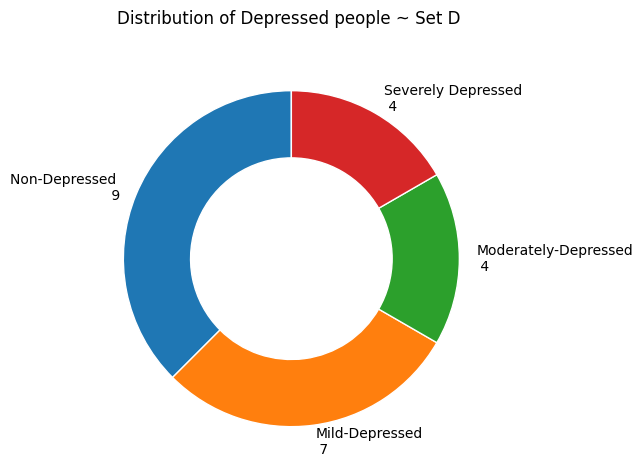

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Non-Depressed \n %s' % non_dep_tot4, 'Mild-Depressed\n %s'% mild_dep_tot4 , 'Moderately-Depressed\n %s' % mod_dep_tot4, 'Severely Depressed\n %s' % sev_dep_tot4]
# Percentages corresponding to each category
percentages = [100*non_dep_tot4/total4_dep, 100*mild_dep_tot4/total4_dep, 100*mod_dep_tot4/total4_dep, 100*sev_dep_tot4/total4_dep]
actual_numbers = [non_dep_tot4, mild_dep_tot4, mod_dep_tot4, sev_dep_tot4]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Depressed people ~ Set D \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setd_dep = {}
for i in range(len(emotions)):
  for j in category:
    sev_dep_avg = 0
    mod_dep_avg = 0
    mild_dep_avg = 0
    non_dep_avg = 0

    sev_dep_tot = 0
    mod_dep_tot = 0
    mild_dep_tot = 0
    non_dep_tot = 0

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_phq_score'])):
        if dfs4[i]['total_phq_score'][k] > 14:
          if j in dfs4[i][col].name:
            sev_dep_tot +=1
            sev_dep_avg += dfs4[i][col][k]
        elif dfs4[i]['total_phq_score'][k] > 9:
          if j in dfs4[i][col].name:
            mod_dep_tot +=1
            mod_dep_avg += dfs4[i][col][k]
        elif dfs4[i]['total_phq_score'][k] > 4:
          if j in dfs4[i][col].name:
            mild_dep_tot +=1
            mild_dep_avg += dfs4[i][col][k]
        else:
          if j in dfs4[i][col].name:
            non_dep_tot +=1
            non_dep_avg += dfs4[i][col][k]

    setd_dep[f'setd_{emotions[i]}_avg_{j}_sev_dep'] = sev_dep_avg/sev_dep_tot
    setd_dep[f'setd_{emotions[i]}_avg_{j}_mod_dep'] = mod_dep_avg/mod_dep_tot
    setd_dep[f'setd_{emotions[i]}_avg_{j}_mild_dep'] = mild_dep_avg/mild_dep_tot
    setd_dep[f'setd_{emotions[i]}_avg_{j}_non_dep'] = non_dep_avg/non_dep_tot

In [ ]:
sev_dep_tot

24

In [ ]:
sev_anx_tot4 = 0
mod_anx_tot4 = 0
mild_anx_tot4 = 0
non_anx_tot4 = 0

for i in range(len(df_merged_4['total_gad_score'].values)):
  if df_merged_4['total_gad_score'].values[i] >14:
    sev_anx_tot4 +=1
  elif df_merged_4['total_gad_score'].values[i] >9:
    mod_anx_tot4 +=1
  elif df_merged_4['total_gad_score'].values[i] >4:
    mild_anx_tot4 +=1
  else:
    non_anx_tot4 +=1

In [ ]:
print(sev_anx_tot4)
print(mod_anx_tot4)
print(mild_anx_tot4)
print(non_anx_tot4)
total4_anx = sev_anx_tot4 + mod_anx_tot4 + mild_anx_tot4 + non_anx_tot4
print("total partcipants in Set D are : " + str(total4_anx))

0
6
7
11
total partcipants in Set D are : 24


Lets see the distribution of anxious people in Set D

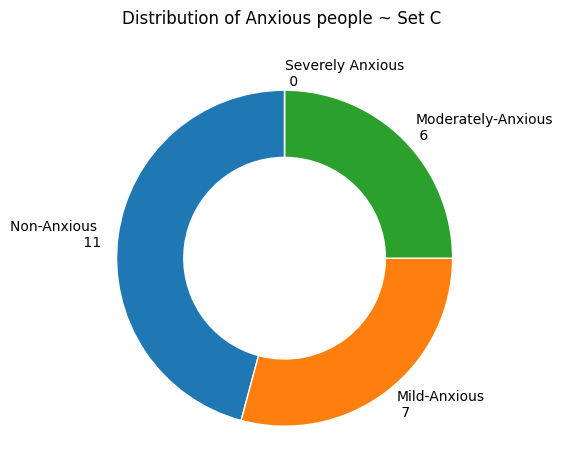

In [ ]:
categories = ['Non-Anxious \n %s' % non_anx_tot4, 'Mild-Anxious\n %s'% mild_anx_tot4 , 'Moderately-Anxious\n %s' % mod_anx_tot4, 'Severely Anxious\n %s' % sev_anx_tot4]
# Percentages corresponding to each category
percentages = [100*non_anx_tot4/total4_anx, 100*mild_anx_tot4/total4_anx, 100*mod_anx_tot4/total4_anx, 100*sev_anx_tot4/total4_anx]
actual_numbers = [non_anx_tot4, mild_anx_tot4, mod_anx_tot4, sev_anx_tot4]

# Creating a pie chart
fig, ax = plt.subplots()

# Draw the pie chart
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Distribution of Anxious people ~ Set C \n\n')


# Display the pie chart
plt.show()


In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setd_anx = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_avg = 0
    mod_anx_avg = 0
    mild_anx_avg = 0
    non_anx_avg = 0

    sev_anx_tot = 0
    mod_anx_tot = 0
    mild_anx_tot = 0
    non_anx_tot = 0

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_gad_score'])):
        if dfs4[i]['total_gad_score'][k] > 14:
          if j in dfs4[i][col].name:
            sev_anx_tot +=1
            sev_anx_avg += dfs4[i][col][k]
        elif dfs4[i]['total_gad_score'][k] > 9:
          if j in dfs4[i][col].name:
            mod_anx_tot +=1
            mod_anx_avg += dfs4[i][col][k]
        elif dfs4[i]['total_gad_score'][k] > 4:
          if j in dfs4[i][col].name:
            mild_anx_tot +=1
            mild_anx_avg += dfs4[i][col][k]
        else:
          if j in dfs4[i][col].name:
            non_anx_tot +=1
            non_anx_avg += dfs4[i][col][k]
    if sev_anx_tot == 0:
      setd_anx[f'setd_{emotions[i]}_avg_{j}_sev_anx'] = 0
    else:
      setd_anx[f'setd_{emotions[i]}_avg_{j}_sev_anx'] = sev_anx_avg/sev_anx_tot
    setd_anx[f'setd_{emotions[i]}_avg_{j}_mod_anx'] = mod_anx_avg/mod_anx_tot
    setd_anx[f'setd_{emotions[i]}_avg_{j}_mild_anx'] = mild_anx_avg/mild_anx_tot
    setd_anx[f'setd_{emotions[i]}_avg_{j}_non_anx'] = non_anx_avg/non_anx_tot

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot4, "Mild-Depressed : (%s)" % mild_dep_tot4, "Moderately-Depressed : (%s)" % mod_dep_tot4, "Severely-Depressed : (%s)" % sev_dep_tot4])
myTable.title = 'Arousal ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)", round(setd_dep['setd_Happy_avg_arous_non_dep'],2),
                 round(setd_dep['setd_Happy_avg_arous_mild_dep'],2),
                 round(setd_dep['setd_Happy_avg_arous_mod_dep'],2),
                 round(setd_dep['setd_Happy_avg_arous_sev_dep'],2)])
myTable.add_row(["Sad (6)", round(setd_dep['setd_Sad_avg_arous_non_dep'],2),
                 round(setd_dep['setd_Sad_avg_arous_mild_dep'],2),
                 round(setd_dep['setd_Sad_avg_arous_mod_dep'],2),
                 round(setd_dep['setd_Sad_avg_arous_sev_dep'],2)])
myTable.add_row(["Angry (7)", round(setd_dep['setd_Angry_avg_arous_non_dep'],2),
                 round(setd_dep['setd_Angry_avg_arous_mild_dep'],2),
                 round(setd_dep['setd_Angry_avg_arous_mod_dep'],2),
                 round(setd_dep['setd_Angry_avg_arous_sev_dep'],2)])
myTable.add_row(["Neutral (6)", round(setd_dep['setd_Neutral_avg_arous_non_dep'],2),
                 round(setd_dep['setd_Neutral_avg_arous_mild_dep'],2),
                 round(setd_dep['setd_Neutral_avg_arous_mod_dep'],2),
                 round(setd_dep['setd_Neutral_avg_arous_sev_dep'],2)])
print('For Arousal ~ Mean ~ Set 4')
print(myTable)

For Arousal ~ Mean ~ Set 4
+------------------------------------------------------------------------------------------------------------------+
|                                              Arousal ~ Mean ~ Set 4                                              |
+-------------+---------------------+----------------------+----------------------------+--------------------------+
|   Emotion   | Non-Depressed : (9) | Mild-Depressed : (7) | Moderately-Depressed : (4) | Severely-Depressed : (4) |
+-------------+---------------------+----------------------+----------------------------+--------------------------+
|  Happy (6)  |         3.43        |         3.12         |            3.42            |           3.38           |
|   Sad (6)   |         2.33        |         2.07         |            2.21            |           2.5            |
|  Angry (7)  |         4.16        |         4.39         |            3.82            |           4.14           |
| Neutral (6) |         2.57        |

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot4, "Mild-Depressed : (%s)" % mild_dep_tot4, "Moderately-Depressed : (%s)" % mod_dep_tot4, "Severely-Depressed : (%s)" % sev_dep_tot4])
myTable.title = 'Valence ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)", round(setd_dep['setd_Happy_avg_val_non_dep'],2),
                 round(setd_dep['setd_Happy_avg_val_mild_dep'],2),
                 round(setd_dep['setd_Happy_avg_val_mod_dep'],2),
                 round(setd_dep['setd_Happy_avg_val_sev_dep'],2)])
myTable.add_row(["Sad (6)", round(setd_dep['setd_Sad_avg_val_non_dep'],2),
                 round(setd_dep['setd_Sad_avg_val_mild_dep'],2),
                 round(setd_dep['setd_Sad_avg_val_mod_dep'],2),
                 round(setd_dep['setd_Sad_avg_val_sev_dep'],2)])
myTable.add_row(["Angry (7)", round(setd_dep['setd_Angry_avg_val_non_dep'],2),
                 round(setd_dep['setd_Angry_avg_val_mild_dep'],2),
                 round(setd_dep['setd_Angry_avg_val_mod_dep'],2),
                 round(setd_dep['setd_Angry_avg_val_sev_dep'],2)])
myTable.add_row(["Neutral (6)", round(setd_dep['setd_Neutral_avg_val_non_dep'],2),
                 round(setd_dep['setd_Neutral_avg_val_mild_dep'],2),
                 round(setd_dep['setd_Neutral_avg_val_mod_dep'],2),
                 round(setd_dep['setd_Neutral_avg_val_sev_dep'],2)])
print('For Valence ~ Mean ~ Set 4')
print(myTable)

For Valence ~ Mean ~ Set 4
+------------------------------------------------------------------------------------------------------------------+
|                                              Valence ~ Mean ~ Set 4                                              |
+-------------+---------------------+----------------------+----------------------------+--------------------------+
|   Emotion   | Non-Depressed : (9) | Mild-Depressed : (7) | Moderately-Depressed : (4) | Severely-Depressed : (4) |
+-------------+---------------------+----------------------+----------------------------+--------------------------+
|  Happy (6)  |         3.59        |         3.57         |            3.79            |           3.46           |
|   Sad (6)   |         3.11        |         3.19         |            2.38            |           3.25           |
|  Angry (7)  |         2.0         |         1.96         |            2.18            |           2.07           |
| Neutral (6) |         3.57        |

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot4, "Mildly-Anxious : (%s)" % mild_anx_tot4, "Moderately-Anxious : (%s)" % mod_anx_tot4, "Severely-Anxious : (%s)" % sev_anx_tot4])
myTable.title = 'Arousal ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)", round(setd_anx['setd_Happy_avg_arous_non_anx'],2),
                 round(setd_anx['setd_Happy_avg_arous_mild_anx'],2),
                 round(setd_anx['setd_Happy_avg_arous_mod_anx'],2),
                 round(setd_anx['setd_Happy_avg_arous_sev_anx'],2)])
myTable.add_row(["Sad (6)", round(setd_anx['setd_Sad_avg_arous_non_anx'],2),
                 round(setd_anx['setd_Sad_avg_arous_mild_anx'],2),
                 round(setd_anx['setd_Sad_avg_arous_mod_anx'],2),
                 round(setd_anx['setd_Sad_avg_arous_sev_anx'],2)])
myTable.add_row(["Angry (7)", round(setd_anx['setd_Angry_avg_arous_non_anx'],2),
                 round(setd_anx['setd_Angry_avg_arous_mild_anx'],2),
                 round(setd_anx['setd_Angry_avg_arous_mod_anx'],2),
                 round(setd_anx['setd_Angry_avg_arous_sev_anx'],2)])
myTable.add_row(["Neutral (6)", round(setd_anx['setd_Neutral_avg_arous_non_anx'],2),
                 round(setd_anx['setd_Neutral_avg_arous_mild_anx'],2),
                 round(setd_anx['setd_Neutral_avg_arous_mod_anx'],2),
                 round(setd_anx['setd_Neutral_avg_arous_sev_anx'],2)])
print('For Arousal ~ Mean ~ Set 4')
print(myTable)

For Arousal ~ Mean ~ Set 4
+-------------------------------------------------------------------------------------------------------------+
|                                            Arousal ~ Mean ~ Set 4                                           |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|   Emotion   | Non-Anxious : (11) | Mildly-Anxious : (7) | Moderately-Anxious : (6) | Severely-Anxious : (0) |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|  Happy (6)  |        3.2         |         3.43         |           3.44           |           0            |
|   Sad (6)   |        2.29        |         2.1          |           2.42           |           0            |
|  Angry (7)  |        4.17        |         4.2          |           4.12           |           0            |
| Neutral (6) |        2.47        |         2.33         |           2.69   

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot4, "Mildly-Anxious : (%s)" % mild_anx_tot4, "Moderately-Anxious : (%s)" % mod_anx_tot4, "Severely-Anxious : (%s)" % sev_anx_tot4])
myTable.title = 'Valence ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)", round(setd_anx['setd_Happy_avg_val_non_anx'],2),
                 round(setd_anx['setd_Happy_avg_val_mild_anx'],2),
                 round(setd_anx['setd_Happy_avg_val_mod_anx'],2),
                 round(setd_anx['setd_Happy_avg_val_sev_anx'],2)])
myTable.add_row(["Sad (6)", round(setd_anx['setd_Sad_avg_val_non_anx'],2),
                 round(setd_anx['setd_Sad_avg_val_mild_anx'],2),
                 round(setd_anx['setd_Sad_avg_val_mod_anx'],2),
                 round(setd_anx['setd_Sad_avg_val_sev_anx'],2)])
myTable.add_row(["Angry (7)", round(setd_anx['setd_Angry_avg_val_non_anx'],2),
                 round(setd_anx['setd_Angry_avg_val_mild_anx'],2),
                 round(setd_anx['setd_Angry_avg_val_mod_anx'],2),
                 round(setd_anx['setd_Angry_avg_val_sev_anx'],2)])
myTable.add_row(["Neutral (6)", round(setd_anx['setd_Neutral_avg_val_non_anx'],2),
                 round(setd_anx['setd_Neutral_avg_val_mild_anx'],2),
                 round(setd_anx['setd_Neutral_avg_val_mod_anx'],2),
                 round(setd_anx['setd_Neutral_avg_val_sev_anx'],2)])
print('For Valence ~ Mean ~ Set 4')
print(myTable)

For Valence ~ Mean ~ Set 4
+-------------------------------------------------------------------------------------------------------------+
|                                            Valence ~ Mean ~ Set 4                                           |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|   Emotion   | Non-Anxious : (11) | Mildly-Anxious : (7) | Moderately-Anxious : (6) | Severely-Anxious : (0) |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|  Happy (6)  |        3.64        |         3.62         |           3.5            |           0            |
|   Sad (6)   |        3.17        |         2.98         |           2.86           |           0            |
|  Angry (7)  |        2.0         |         1.92         |           2.21           |           0            |
| Neutral (6) |        3.68        |         3.67         |           3.61   

## Stress

### Set A

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
seta_stress = {}
for i in range(len(emotions)):
  for j in category:

    sev_stress_avg = 0
    mod_stress_avg = 0
    mild_stress_avg = 0

    sev_stress_tot = 0
    mild_stress_tot = 0
    mod_stress_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_pss_score'])):
        if dfs[i]['total_pss_score'][k] > 10:
          if j in dfs[i][col].name:
            sev_stress_tot +=1
            sev_stress_avg += dfs[i][col][k]

        elif dfs[i]['total_pss_score'][k] > 5:
          if j in dfs[i][col].name:
            mod_stress_tot +=1
            mod_stress_avg += dfs[i][col][k]

        else:
          if j in dfs[i][col].name:
            mild_stress_tot +=1
            mild_stress_avg += dfs[i][col][k]

    seta_stress[f'seta_{emotions[i]}_avg_{j}_sev_stress'] = sev_stress_avg/sev_stress_tot
    seta_stress[f'seta_{emotions[i]}_avg_{j}_mod_stress'] = mod_stress_avg/mod_stress_tot
    if(mild_stress_tot == 0):
      seta_stress[f'seta_{emotions[i]}_avg_{j}_mild_stress'] = 0
    else:
      seta_stress[f'seta_{emotions[i]}_avg_{j}_mild_stress'] = mild_stress_avg/mild_stress_tot

In [ ]:
sev_stress_tot1 = 0
mod_stress_tot1 = 0
mild_stress_tot1 =0

for i in range(len(df_merged_1['total_pss_score'].values)):
  if df_merged_1['total_pss_score'].values[i] >10:
    sev_stress_tot1 +=1
  elif df_merged_1['total_pss_score'].values[i] >5:
    mod_stress_tot1 +=1
  else:
    mild_stress_tot1 +=1


In [ ]:
print(sev_stress_tot1)
print(mod_stress_tot1)
print(mild_stress_tot1)

total1_stress = sev_stress_tot1 + mod_stress_tot1 + mild_stress_tot1
print(total1_stress)

1
11
11
23


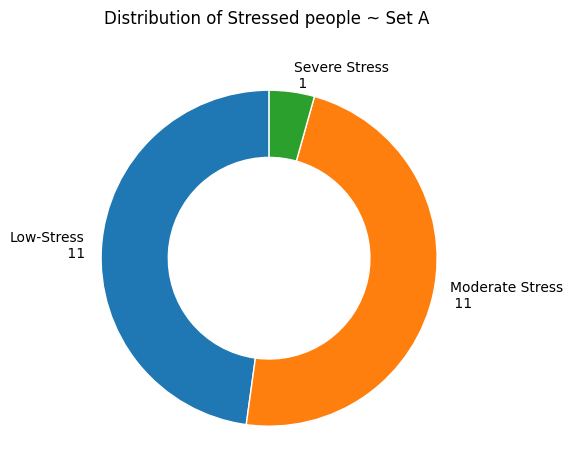

In [ ]:

categories = ['Low-Stress\n %s'% mild_stress_tot1 , 'Moderate Stress\n %s' % mod_stress_tot1, 'Severe Stress\n %s' % sev_stress_tot1]
# Percentages corresponding to each category
percentages = [100*mild_stress_tot1/total1_stress, 100*mod_stress_tot1/total1_stress, 100*sev_stress_tot1/total1_stress]
actual_numbers = [mild_stress_tot1, mod_stress_tot1, sev_stress_tot1]

# Creating a pie chart
fig, ax = plt.subplots()
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
ax.axis('equal')
plt.title('Distribution of Stressed people ~ Set A \n\n')
plt.show()

In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Arousal ~ Mean ~ Set 1'
# Add rows
myTable.add_row(["Happy (6)",
                 round(seta_stress['seta_Happy_avg_arous_mild_stress'],2),
                 round(seta_stress['seta_Happy_avg_arous_mod_stress'],2),
                 round(seta_stress['seta_Happy_avg_arous_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(seta_stress['seta_Sad_avg_arous_mild_stress'],2),
                 round(seta_stress['seta_Sad_avg_arous_mod_stress'],2),
                 round(seta_stress['seta_Sad_avg_arous_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(seta_stress['seta_Angry_avg_arous_mild_stress'],2),
                 round(seta_stress['seta_Angry_avg_arous_mod_stress'],2),
                 round(seta_stress['seta_Angry_avg_arous_sev_stress'],2)])
myTable.add_row(["Neutral (7)",
                 round(seta_stress['seta_Neutral_avg_arous_mild_stress'],2),
                 round(seta_stress['seta_Neutral_avg_arous_mod_stress'],2),
                 round(seta_stress['seta_Neutral_avg_arous_sev_stress'],2)])
print('For Arousal ~ Mean ~ Set 1')
print(myTable)

For Arousal ~ Mean ~ Set 1
+--------------------------------------------------------------------------------+
|                             Arousal ~ Mean ~ Set 1                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (6)  |        3.8        |          3.8           |         3.83        |
|   Sad (6)   |        2.21       |          1.86          |         2.33        |
|  Angry (6)  |        3.12       |          2.89          |         3.17        |
| Neutral (7) |        2.35       |          1.78          |         2.29        |
+-------------+-------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Valence ~ Mean ~ Set 1'
# Add rows
myTable.add_row(["Happy (6)",
                 round(seta_stress['seta_Happy_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(seta_stress['seta_Sad_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(seta_stress['seta_Angry_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_sev_stress'],2)])
myTable.add_row(["Neutral (7)",
                 round(seta_stress['seta_Neutral_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_sev_stress'],2)])
print('For valence ~ Mean ~ Set 1')
print(myTable)

For valence ~ Mean ~ Set 1
+--------------------------------------------------------------------------------+
|                             Valence ~ Mean ~ Set 1                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (6)  |        3.98       |          3.98          |         4.17        |
|   Sad (6)   |        2.35       |          2.45          |         2.33        |
|  Angry (6)  |        2.95       |          2.88          |         2.67        |
| Neutral (7) |        2.61       |          2.53          |         2.29        |
+-------------+-------------------+------------------------+---------------------+


### Set B

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setb_stress = {}
for i in range(len(emotions)):
  for j in category:

    sev_stress_avg = 0
    mod_stress_avg = 0
    mild_stress_avg = 0

    sev_stress_tot = 0
    mild_stress_tot = 0
    mod_stress_tot = 0

    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_pss_score'])):
        if dfs2[i]['total_pss_score'][k] > 10:
          if j in dfs2[i][col].name:
            sev_stress_tot +=1
            sev_stress_avg += dfs2[i][col][k]

        elif dfs2[i]['total_pss_score'][k] > 5:
          if j in dfs2[i][col].name:
            mod_stress_tot +=1
            mod_stress_avg += dfs2[i][col][k]

        else:
          if j in dfs2[i][col].name:
            mild_stress_tot +=1
            mild_stress_avg += dfs2[i][col][k]

    setb_stress[f'setb_{emotions[i]}_avg_{j}_sev_stress'] = sev_stress_avg/sev_stress_tot
    setb_stress[f'setb_{emotions[i]}_avg_{j}_mod_stress'] = mod_stress_avg/mod_stress_tot
    if(mild_stress_tot == 0):
      setb_stress[f'setb_{emotions[i]}_avg_{j}_mild_stress'] = 0
    else:
      setb_stress[f'setb_{emotions[i]}_avg_{j}_mild_stress'] = mild_stress_avg/mild_stress_tot

In [ ]:
sev_stress_tot2 = 0
mod_stress_tot2 = 0
mild_stress_tot2 =0

for i in range(len(df_merged_2['total_pss_score'].values)):
  if df_merged_2['total_pss_score'].values[i] >10:
    sev_stress_tot2 +=1
  elif df_merged_2['total_pss_score'].values[i] >5:
    mod_stress_tot2 +=1
  else:
    mild_stress_tot2 +=1


In [ ]:
print(sev_stress_tot2)
print(mod_stress_tot2)
print(mild_stress_tot2)

total2_stress = sev_stress_tot2 + mod_stress_tot2 + mild_stress_tot2
print(total2_stress)

5
12
9
26


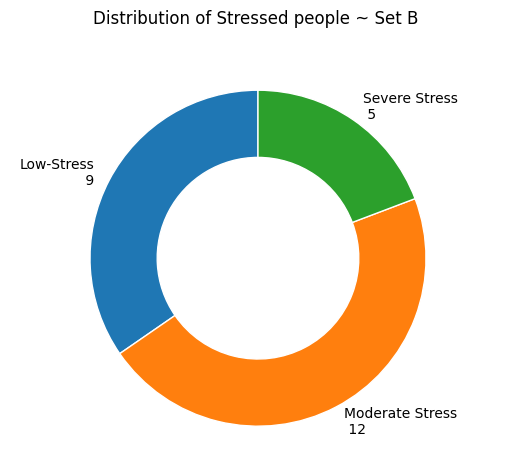

In [ ]:
categories = ['Low-Stress\n %s'% mild_stress_tot2 , 'Moderate Stress\n %s' % mod_stress_tot2, 'Severe Stress\n %s' % sev_stress_tot2]
# Percentages corresponding to each category
percentages = [100*mild_stress_tot2/total1_stress, 100*mod_stress_tot2/total1_stress, 100*sev_stress_tot2/total1_stress]
actual_numbers = [mild_stress_tot2, mod_stress_tot2, sev_stress_tot2]

# Creating a pie chart
fig, ax = plt.subplots()
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
ax.axis('equal')
plt.title('Distribution of Stressed people ~ Set B \n\n')
plt.show()

In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot2, "Moderate-Stress : (%s)" % mod_stress_tot2, "Severe-Stress : (%s)" % sev_stress_tot2])
myTable.title = 'Arousal ~ Mean ~ Set 2'
# Add rows
myTable.add_row(["Happy (6)",
                 round(setb_stress['setb_Happy_avg_arous_mild_stress'],2),
                 round(setb_stress['setb_Happy_avg_arous_mod_stress'],2),
                 round(setb_stress['setb_Happy_avg_arous_sev_stress'],2)])
myTable.add_row(["Sad (7)",
                 round(setb_stress['setb_Sad_avg_arous_mild_stress'],2),
                 round(setb_stress['setb_Sad_avg_arous_mod_stress'],2),
                 round(setb_stress['setb_Sad_avg_arous_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(setb_stress['setb_Angry_avg_arous_mild_stress'],2),
                 round(setb_stress['setb_Angry_avg_arous_mod_stress'],2),
                 round(setb_stress['setb_Angry_avg_arous_sev_stress'],2)])
myTable.add_row(["Neutral (6)",
                 round(setb_stress['setb_Neutral_avg_arous_mild_stress'],2),
                 round(setb_stress['setb_Neutral_avg_arous_mod_stress'],2),
                 round(setb_stress['setb_Neutral_avg_arous_sev_stress'],2)])
print('For Arousal ~ Mean ~ Set 2')
print(myTable)

For Arousal ~ Mean ~ Set 2
+-------------------------------------------------------------------------------+
|                             Arousal ~ Mean ~ Set 2                            |
+-------------+------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (9) | Moderate-Stress : (12) | Severe-Stress : (5) |
+-------------+------------------+------------------------+---------------------+
|  Happy (6)  |       3.26       |          3.39          |         2.87        |
|   Sad (7)   |       1.79       |          2.33          |         1.74        |
|  Angry (6)  |       3.89       |          3.64          |         4.0         |
| Neutral (6) |       1.94       |          2.35          |         1.7         |
+-------------+------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Valence ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)",
                 round(seta_stress['seta_Happy_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(seta_stress['seta_Sad_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(seta_stress['seta_Angry_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_sev_stress'],2)])
myTable.add_row(["Neutral (7)",
                 round(seta_stress['seta_Neutral_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_sev_stress'],2)])
print('For valence ~ Mean ~ Set 4')
print(myTable)

For valence ~ Mean ~ Set 4
+--------------------------------------------------------------------------------+
|                             Valence ~ Mean ~ Set 4                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (6)  |        3.98       |          3.98          |         4.17        |
|   Sad (6)   |        2.35       |          2.45          |         2.33        |
|  Angry (6)  |        2.95       |          2.88          |         2.67        |
| Neutral (7) |        2.61       |          2.53          |         2.29        |
+-------------+-------------------+------------------------+---------------------+


### Set C

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setc_stress = {}
for i in range(len(emotions)):
  for j in category:

    sev_stress_avg = 0
    mod_stress_avg = 0
    mild_stress_avg = 0

    sev_stress_tot = 0
    mild_stress_tot = 0
    mod_stress_tot = 0

    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_pss_score'])):
        if dfs3[i]['total_pss_score'][k] > 10:
          if j in dfs3[i][col].name:
            sev_stress_tot +=1
            sev_stress_avg += dfs3[i][col][k]

        elif dfs3[i]['total_pss_score'][k] > 5:
          if j in dfs3[i][col].name:
            mod_stress_tot +=1
            mod_stress_avg += dfs3[i][col][k]

        else:
          if j in dfs3[i][col].name:
            mild_stress_tot +=1
            mild_stress_avg += dfs3[i][col][k]

    setc_stress[f'setc_{emotions[i]}_avg_{j}_sev_stress'] = sev_stress_avg/sev_stress_tot
    setc_stress[f'setc_{emotions[i]}_avg_{j}_mod_stress'] = mod_stress_avg/mod_stress_tot
    if(mild_stress_tot == 0):
      setc_stress[f'setc_{emotions[i]}_avg_{j}_mild_stress'] = 0
    else:
      setc_stress[f'setc_{emotions[i]}_avg_{j}_mild_stress'] = mild_stress_avg/mild_stress_tot

In [ ]:
sev_stress_tot3 = 0
mod_stress_tot3 = 0
mild_stress_tot3 =0

for i in range(len(df_merged_3['total_pss_score'].values)):
  if df_merged_3['total_pss_score'].values[i] >10:
    sev_stress_tot3 +=1
  elif df_merged_3['total_pss_score'].values[i] >5:
    mod_stress_tot3 +=1
  else:
    mild_stress_tot3 +=1


In [ ]:
print(sev_stress_tot3)
print(mod_stress_tot3)
print(mild_stress_tot3)

total3_stress = sev_stress_tot3 + mod_stress_tot3 + mild_stress_tot3
print(total3_stress)

2
10
12
24


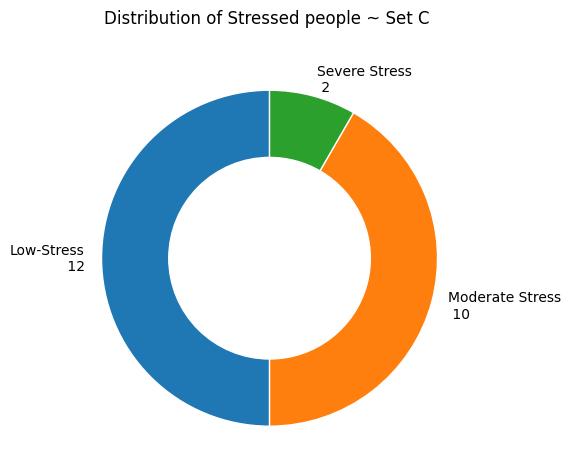

In [ ]:
categories = ['Low-Stress\n %s'% mild_stress_tot3 , 'Moderate Stress\n %s' % mod_stress_tot3, 'Severe Stress\n %s' % sev_stress_tot3]
# Percentages corresponding to each category
percentages = [100*mild_stress_tot3/total1_stress, 100*mod_stress_tot3/total1_stress, 100*sev_stress_tot3/total1_stress]
actual_numbers = [mild_stress_tot3, mod_stress_tot3, sev_stress_tot3]

# Creating a pie chart
fig, ax = plt.subplots()
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
ax.axis('equal')
plt.title('Distribution of Stressed people ~ Set C \n\n')
plt.show()

In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot3, "Moderate-Stress : (%s)" % mod_stress_tot3, "Severe-Stress : (%s)" % sev_stress_tot3])
myTable.title = 'Arousal ~ Mean ~ Set 3'
# Add rows
myTable.add_row(["Happy (7)",
                 round(setc_stress['setc_Happy_avg_arous_mild_stress'],2),
                 round(setc_stress['setc_Happy_avg_arous_mod_stress'],2),
                 round(setc_stress['setc_Happy_avg_arous_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(setc_stress['setc_Sad_avg_arous_mild_stress'],2),
                 round(setc_stress['setc_Sad_avg_arous_mod_stress'],2),
                 round(setc_stress['setc_Sad_avg_arous_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(setc_stress['setc_Angry_avg_arous_mild_stress'],2),
                 round(setc_stress['setc_Angry_avg_arous_mod_stress'],2),
                 round(setc_stress['setc_Angry_avg_arous_sev_stress'],2)])
myTable.add_row(["Neutral (6)",
                 round(setc_stress['setc_Neutral_avg_arous_mild_stress'],2),
                 round(setc_stress['setc_Neutral_avg_arous_mod_stress'],2),
                 round(setc_stress['setc_Neutral_avg_arous_sev_stress'],2)])
print('For Arousal ~ Mean ~ Set 3')
print(myTable)

For Arousal ~ Mean ~ Set 3
+--------------------------------------------------------------------------------+
|                             Arousal ~ Mean ~ Set 3                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (12) | Moderate-Stress : (10) | Severe-Stress : (2) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (7)  |        3.23       |          3.31          |         3.86        |
|   Sad (6)   |        2.32       |          2.92          |         1.5         |
|  Angry (6)  |        4.1        |          3.72          |         2.92        |
| Neutral (6) |        2.11       |          2.45          |         2.75        |
+-------------+-------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Valence ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (7)",
                 round(seta_stress['seta_Happy_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(seta_stress['seta_Sad_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(seta_stress['seta_Angry_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_sev_stress'],2)])
myTable.add_row(["Neutral (6)",
                 round(seta_stress['seta_Neutral_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_sev_stress'],2)])
print('For valence ~ Mean ~ Set 4')
print(myTable)

For valence ~ Mean ~ Set 4
+--------------------------------------------------------------------------------+
|                             Valence ~ Mean ~ Set 4                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (7)  |        3.98       |          3.98          |         4.17        |
|   Sad (6)   |        2.35       |          2.45          |         2.33        |
|  Angry (6)  |        2.95       |          2.88          |         2.67        |
| Neutral (6) |        2.61       |          2.53          |         2.29        |
+-------------+-------------------+------------------------+---------------------+


### Set D

In [ ]:
# calculate per file avg for each emotion for both val and arousal
category = ['val', 'arous']
setd_stress = {}
for i in range(len(emotions)):
  for j in category:

    sev_stress_avg = 0
    mod_stress_avg = 0
    mild_stress_avg = 0

    sev_stress_tot = 0
    mild_stress_tot = 0
    mod_stress_tot = 0

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_pss_score'])):
        if dfs4[i]['total_pss_score'][k] > 10:
          if j in dfs4[i][col].name:
            sev_stress_tot +=1
            sev_stress_avg += dfs4[i][col][k]

        elif dfs4[i]['total_pss_score'][k] > 5:
          if j in dfs4[i][col].name:
            mod_stress_tot +=1
            mod_stress_avg += dfs4[i][col][k]

        else:
          if j in dfs4[i][col].name:
            mild_stress_tot +=1
            mild_stress_avg += dfs4[i][col][k]

    if(sev_stress_avg == 0):
      setd_stress[f'setd_{emotions[i]}_avg_{j}_sev_stress'] = 0
    else:
      setd_stress[f'setd_{emotions[i]}_avg_{j}_sev_stress'] = sev_stress_avg/sev_stress_tot
    setd_stress[f'setd_{emotions[i]}_avg_{j}_mod_stress'] = mod_stress_avg/mod_stress_tot
    if(mild_stress_tot == 0):
      setd_stress[f'setd_{emotions[i]}_avg_{j}_mild_stress'] = 0
    else:
      setd_stress[f'setd_{emotions[i]}_avg_{j}_mild_stress'] = mild_stress_avg/mild_stress_tot

In [ ]:
sev_stress_tot4 = 0
mod_stress_tot4 = 0
mild_stress_tot4 =0

for i in range(len(df_merged_4['total_pss_score'].values)):
  if df_merged_4['total_pss_score'].values[i] >10:
    sev_stress_tot4 +=1
  elif df_merged_4['total_pss_score'].values[i] >5:
    mod_stress_tot4 +=1
  else:
    mild_stress_tot4 +=1


In [ ]:
print(sev_stress_tot4)
print(mod_stress_tot4)
print(mild_stress_tot4)

total4_stress = sev_stress_tot4 + mod_stress_tot4 + mild_stress_tot4
print(total4_stress)

0
14
10
24


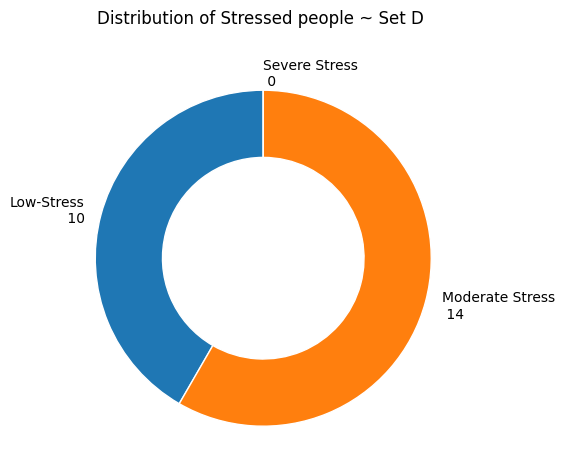

In [ ]:
categories = ['Low-Stress\n %s'% mild_stress_tot4 , 'Moderate Stress\n %s' % mod_stress_tot4, 'Severe Stress\n %s' % sev_stress_tot4]
# Percentages corresponding to each category
percentages = [100*mild_stress_tot4/total1_stress, 100*mod_stress_tot4/total1_stress, 100*sev_stress_tot4/total1_stress]
actual_numbers = [mild_stress_tot4, mod_stress_tot4, sev_stress_tot4]

# Creating a pie chart
fig, ax = plt.subplots()
wedges = ax.pie(percentages, labels=categories,
                       startangle=90, autopct='',
                       wedgeprops=dict(width=0.4, edgecolor='w'))
ax.axis('equal')
plt.title('Distribution of Stressed people ~ Set D \n\n')
plt.show()

In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot4, "Moderate-Stress : (%s)" % mod_stress_tot4, "Severe-Stress : (%s)" % sev_stress_tot4])
myTable.title = 'Arousal ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)",
                 round(setd_stress['setd_Happy_avg_arous_mild_stress'],2),
                 round(setd_stress['setd_Happy_avg_arous_mod_stress'],2),
                 round(setd_stress['setd_Happy_avg_arous_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(setd_stress['setd_Sad_avg_arous_mild_stress'],2),
                 round(setd_stress['setd_Sad_avg_arous_mod_stress'],2),
                 round(setd_stress['setd_Sad_avg_arous_sev_stress'],2)])
myTable.add_row(["Angry (7)",
                 round(setd_stress['setd_Angry_avg_arous_mild_stress'],2),
                 round(setd_stress['setd_Angry_avg_arous_mod_stress'],2),
                 round(setd_stress['setd_Angry_avg_arous_sev_stress'],2)])
myTable.add_row(["Neutral (6)",
                 round(setd_stress['setd_Neutral_avg_arous_mild_stress'],2),
                 round(setd_stress['setd_Neutral_avg_arous_mod_stress'],2),
                 round(setd_stress['setd_Neutral_avg_arous_sev_stress'],2)])
print('For Arousal ~ Mean ~ Set 4')
print(myTable)

For Arousal ~ Mean ~ Set 4
+--------------------------------------------------------------------------------+
|                             Arousal ~ Mean ~ Set 4                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (10) | Moderate-Stress : (14) | Severe-Stress : (0) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (6)  |        3.57       |          3.15          |          0          |
|   Sad (6)   |        2.37       |          2.19          |          0          |
|  Angry (7)  |        4.1        |          4.21          |          0          |
| Neutral (6) |        2.63       |          2.38          |          0          |
+-------------+-------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Valence ~ Mean ~ Set 4'
# Add rows
myTable.add_row(["Happy (6)",
                 round(seta_stress['seta_Happy_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Happy_avg_val_sev_stress'],2)])
myTable.add_row(["Sad (6)",
                 round(seta_stress['seta_Sad_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Sad_avg_val_sev_stress'],2)])
myTable.add_row(["Angry (6)",
                 round(seta_stress['seta_Angry_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Angry_avg_val_sev_stress'],2)])
myTable.add_row(["Neutral (7)",
                 round(seta_stress['seta_Neutral_avg_val_mild_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_mod_stress'],2),
                 round(seta_stress['seta_Neutral_avg_val_sev_stress'],2)])
print('For valence ~ Mean ~ Set 4')
print(myTable)

For valence ~ Mean ~ Set 4
+--------------------------------------------------------------------------------+
|                             Valence ~ Mean ~ Set 4                             |
+-------------+-------------------+------------------------+---------------------+
|   Emotion   | Low-stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+-------------+-------------------+------------------------+---------------------+
|  Happy (6)  |        3.98       |          3.98          |         4.17        |
|   Sad (6)   |        2.35       |          2.45          |         2.33        |
|  Angry (6)  |        2.95       |          2.88          |         2.67        |
| Neutral (7) |        2.61       |          2.53          |         2.29        |
+-------------+-------------------+------------------------+---------------------+


### Cumulative

For mild readings I have didvided by 1 in the following code because there is no people in the mild stress at all

In [ ]:
myTable = PrettyTable(['Emotion', 'Low-stress : %s' %str(mild_stress_tot1+mild_stress_tot2+mild_stress_tot3+mild_stress_tot4), 'Moderately-stressious : %s' % str(mod_stress_tot1+mod_stress_tot2+mod_stress_tot4+mod_stress_tot3), 'Severely stressious : %s' % str(sev_stress_tot1+sev_stress_tot2+sev_stress_tot4+sev_stress_tot3)])
myTable.title = 'Valence ~ Mean ~ All Sets'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy",
                 round((((setd_stress['setd_Happy_avg_val_mild_stress'])*(mild_stress_tot4)*(6)) + ((setc_stress['setc_Happy_avg_val_mild_stress'])*(mild_stress_tot3)*(7)) + ((setb_stress['setb_Happy_avg_val_mild_stress'])*(mild_stress_tot2)*(6)) + ((seta_stress['seta_Happy_avg_val_mild_stress'])*(mild_stress_tot1)*(6)))/((mild_stress_tot4*6)+(mild_stress_tot3*7)+(mild_stress_tot2*6)+(mild_stress_tot1*6)),2),
                 round((((setd_stress['setd_Happy_avg_val_mod_stress'])*(mod_stress_tot4)*(6)) + ((setc_stress['setc_Happy_avg_val_mod_stress'])*(mod_stress_tot3)*(7)) + ((setb_stress['setb_Happy_avg_val_mod_stress'])*(mod_stress_tot2)*(6)) + ((seta_stress['seta_Happy_avg_val_mod_stress'])*(mod_stress_tot1)*(6)))/((mod_stress_tot4*6)+(mod_stress_tot3*7)+(mod_stress_tot2*6)+(mod_stress_tot1*6)),2),
                 round((((setd_stress['setd_Happy_avg_val_sev_stress'])*(sev_stress_tot4)*(6)) + ((setc_stress['setc_Happy_avg_val_sev_stress'])*(sev_stress_tot3)*(7)) + ((setb_stress['setb_Happy_avg_val_sev_stress'])*(sev_stress_tot2)*(6)) + ((seta_stress['seta_Happy_avg_val_sev_stress'])*(sev_stress_tot1)*(6)))/((sev_stress_tot4*6)+(sev_stress_tot3*7)+(sev_stress_tot2*6)+(sev_stress_tot1*6)),2)])

myTable.add_row(["Sad",
                 round((((setd_stress['setd_Sad_avg_val_mild_stress'])*(mild_stress_tot4)*(6)) + ((setc_stress['setc_Sad_avg_val_mild_stress'])*(mild_stress_tot3)*(6)) + ((setb_stress['setb_Sad_avg_val_mild_stress'])*(mild_stress_tot2)*(7)) + ((seta_stress['seta_Sad_avg_val_mild_stress'])*(mild_stress_tot1)*(6)))/((mild_stress_tot4*6)+(mild_stress_tot3*6)+(mild_stress_tot2*7)+(mild_stress_tot1*6)),2),
                 round((((setd_stress['setd_Sad_avg_val_mod_stress'])*(mod_stress_tot4)*(6)) + ((setc_stress['setc_Sad_avg_val_mod_stress'])*(mod_stress_tot3)*(6)) + ((setb_stress['setb_Sad_avg_val_mod_stress'])*(mod_stress_tot2)*(7)) + ((seta_stress['seta_Sad_avg_val_mod_stress'])*(mod_stress_tot1)*(6)))/(mod_stress_tot4*(6)+mod_stress_tot3*(6)+mod_stress_tot2*(7)+mod_stress_tot1*(6)),2),
                 round((((setd_stress['setd_Sad_avg_val_sev_stress'])*(sev_stress_tot4)*(6)) + ((setc_stress['setc_Sad_avg_val_sev_stress'])*(sev_stress_tot3)*(6)) + ((setb_stress['setb_Sad_avg_val_sev_stress'])*(sev_stress_tot2)*(7)) + ((seta_stress['seta_Sad_avg_val_sev_stress'])*(sev_stress_tot1)*(6)))/(sev_stress_tot4*(6)+sev_stress_tot3*(6)+sev_stress_tot2*(7)+sev_stress_tot1*(6)),2)])

myTable.add_row(["Angry",
                 round((((setd_stress['setd_Angry_avg_val_mild_stress'])*(mild_stress_tot4)*(7)) + ((setc_stress['setc_Angry_avg_val_mild_stress'])*(mild_stress_tot3)*(6)) + ((setb_stress['setb_Angry_avg_val_mild_stress'])*(mild_stress_tot2)*(6)) + ((seta_stress['seta_Angry_avg_val_mild_stress'])*(mild_stress_tot1)*(6)))/((mild_stress_tot4*7)+(mild_stress_tot3*6)+(mild_stress_tot2*6)+(mild_stress_tot1*6)),2),
                 round((((setd_stress['setd_Angry_avg_val_mod_stress'])*(mod_stress_tot4)*(7)) + ((setc_stress['setc_Angry_avg_val_mod_stress'])*(mod_stress_tot3)*(6)) + ((setb_stress['setb_Angry_avg_val_mod_stress'])*(mod_stress_tot2)*(6)) + ((seta_stress['seta_Angry_avg_val_mod_stress'])*(mod_stress_tot1)*(6)))/(mod_stress_tot4*(7)+mod_stress_tot3*(6)+mod_stress_tot2*(6)+mod_stress_tot1*(6)),2),
                 round((((setd_stress['setd_Angry_avg_val_sev_stress'])*(sev_stress_tot4)*(7)) + ((setc_stress['setc_Angry_avg_val_sev_stress'])*(sev_stress_tot3)*(6)) + ((setb_stress['setb_Angry_avg_val_sev_stress'])*(sev_stress_tot2)*(6)) + ((seta_stress['seta_Angry_avg_val_sev_stress'])*(sev_stress_tot1)*(6)))/(sev_stress_tot4*(7)+sev_stress_tot3*(6)+sev_stress_tot2*(6)+sev_stress_tot1*(6)),2)])

myTable.add_row(["Neutral",
                 round((((setd_stress['setd_Neutral_avg_val_mild_stress'])*(mild_stress_tot4)*(6)) + ((setc_stress['setc_Neutral_avg_val_mild_stress'])*(mild_stress_tot3)*(6)) + ((setb_stress['setb_Neutral_avg_val_mild_stress'])*(mild_stress_tot2)*(6)) + ((seta_stress['seta_Neutral_avg_val_mild_stress'])*(mild_stress_tot1)*(7)))/((mild_stress_tot4*6)+(mild_stress_tot3*7)+(mild_stress_tot2*6)+(mild_stress_tot1*7)),2),
                 round((((setd_stress['setd_Neutral_avg_val_mod_stress'])*(mod_stress_tot4)*(6)) + ((setc_stress['setc_Neutral_avg_val_mod_stress'])*(mod_stress_tot3)*(6)) + ((setb_stress['setb_Neutral_avg_val_mod_stress'])*(mod_stress_tot2)*(6)) + ((seta_stress['seta_Neutral_avg_val_mod_stress'])*(mod_stress_tot1)*(7)))/(mod_stress_tot4*(6)+mod_stress_tot3*(6)+mod_stress_tot2*(6)+mod_stress_tot1*(7)),2),
                 round((((setd_stress['setd_Neutral_avg_val_sev_stress'])*(sev_stress_tot4)*(6)) + ((setc_stress['setc_Neutral_avg_val_sev_stress'])*(sev_stress_tot3)*(6)) + ((setb_stress['setb_Neutral_avg_val_sev_stress'])*(sev_stress_tot2)*(6)) + ((seta_stress['seta_Neutral_avg_val_sev_stress'])*(sev_stress_tot1)*(7)))/(sev_stress_tot4*(6)+sev_stress_tot3*(6)+sev_stress_tot2*(6)+sev_stress_tot1*(7)),2)])
print('For Valence ~ Mean ~ All Sets')
print(myTable)

For Valence ~ Mean ~ All Sets
+----------------------------------------------------------------------------------+
|                            Valence ~ Mean ~ All Sets                             |
+---------+-----------------+----------------------------+-------------------------+
| Emotion | Low-stress : 42 | Moderately-stressious : 47 | Severely stressious : 8 |
+---------+-----------------+----------------------------+-------------------------+
|  Happy  |       3.77      |            3.8             |           4.06          |
|   Sad   |       2.44      |            2.59            |           2.08          |
|  Angry  |       2.18      |            2.25            |           2.0           |
| Neutral |       3.0       |            3.13            |           2.55          |
+---------+-----------------+----------------------------+-------------------------+


In [ ]:
myTable = PrettyTable(['Emotion', 'Low-stress : %s' %str(mild_stress_tot1+mild_stress_tot2+mild_stress_tot3+mild_stress_tot4), 'Moderately-stressious : %s' % str(mod_stress_tot1+mod_stress_tot2+mod_stress_tot4+mod_stress_tot3), 'Severely stressious : %s' % str(sev_stress_tot1+sev_stress_tot2+sev_stress_tot4+sev_stress_tot3)])
myTable.title = 'Arousal ~ Mean ~ All Sets'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy",
                 round((((setd_stress['setd_Happy_avg_arous_mild_stress'])*(mild_stress_tot4)*(6)) + ((setc_stress['setc_Happy_avg_arous_mild_stress'])*(mild_stress_tot3)*(7)) + ((setb_stress['setb_Happy_avg_arous_mild_stress'])*(mild_stress_tot2)*(6)) + ((seta_stress['seta_Happy_avg_arous_mild_stress'])*(mild_stress_tot1)*(6)))/((mild_stress_tot4*6)+(mild_stress_tot3*7)+(mild_stress_tot2*6)+(mild_stress_tot1*6)),2),
                 round((((setd_stress['setd_Happy_avg_arous_mod_stress'])*(mod_stress_tot4)*(6)) + ((setc_stress['setc_Happy_avg_arous_mod_stress'])*(mod_stress_tot3)*(7)) + ((setb_stress['setb_Happy_avg_arous_mod_stress'])*(mod_stress_tot2)*(6)) + ((seta_stress['seta_Happy_avg_arous_mod_stress'])*(mod_stress_tot1)*(6)))/((mod_stress_tot4*6)+(mod_stress_tot3*7)+(mod_stress_tot2*6)+(mod_stress_tot1*6)),2),
                 round((((setd_stress['setd_Happy_avg_arous_sev_stress'])*(sev_stress_tot4)*(6)) + ((setc_stress['setc_Happy_avg_arous_sev_stress'])*(sev_stress_tot3)*(7)) + ((setb_stress['setb_Happy_avg_arous_sev_stress'])*(sev_stress_tot2)*(6)) + ((seta_stress['seta_Happy_avg_arous_sev_stress'])*(sev_stress_tot1)*(6)))/((sev_stress_tot4*6)+(sev_stress_tot3*7)+(sev_stress_tot2*6)+(sev_stress_tot1*6)),2)])

myTable.add_row(["Sad",
                 round((((setd_stress['setd_Sad_avg_arous_mild_stress'])*(mild_stress_tot4)*(6)) + ((setc_stress['setc_Sad_avg_arous_mild_stress'])*(mild_stress_tot3)*(6)) + ((setb_stress['setb_Sad_avg_arous_mild_stress'])*(mild_stress_tot2)*(7)) + ((seta_stress['seta_Sad_avg_arous_mild_stress'])*(mild_stress_tot1)*(6)))/((mild_stress_tot4*6)+(mild_stress_tot3*6)+(mild_stress_tot2*7)+(mild_stress_tot1*6)),2),
                 round((((setd_stress['setd_Sad_avg_arous_mod_stress'])*(mod_stress_tot4)*(6)) + ((setc_stress['setc_Sad_avg_arous_mod_stress'])*(mod_stress_tot3)*(6)) + ((setb_stress['setb_Sad_avg_arous_mod_stress'])*(mod_stress_tot2)*(7)) + ((seta_stress['seta_Sad_avg_arous_mod_stress'])*(mod_stress_tot1)*(6)))/(mod_stress_tot4*(6)+mod_stress_tot3*(6)+mod_stress_tot2*(7)+mod_stress_tot1*(6)),2),
                 round((((setd_stress['setd_Sad_avg_arous_sev_stress'])*(sev_stress_tot4)*(6)) + ((setc_stress['setc_Sad_avg_arous_sev_stress'])*(sev_stress_tot3)*(6)) + ((setb_stress['setb_Sad_avg_arous_sev_stress'])*(sev_stress_tot2)*(7)) + ((seta_stress['seta_Sad_avg_arous_sev_stress'])*(sev_stress_tot1)*(6)))/(sev_stress_tot4*(6)+sev_stress_tot3*(6)+sev_stress_tot2*(7)+sev_stress_tot1*(6)),2)])

myTable.add_row(["Angry",
                 round((((setd_stress['setd_Angry_avg_arous_mild_stress'])*(mild_stress_tot4)*(7)) + ((setc_stress['setc_Angry_avg_arous_mild_stress'])*(mild_stress_tot3)*(6)) + ((setb_stress['setb_Angry_avg_arous_mild_stress'])*(mild_stress_tot2)*(6)) + ((seta_stress['seta_Angry_avg_arous_mild_stress'])*(mild_stress_tot1)*(6)))/((mild_stress_tot4*7)+(mild_stress_tot3*6)+(mild_stress_tot2*6)+(mild_stress_tot1*6)),2),
                 round((((setd_stress['setd_Angry_avg_arous_mod_stress'])*(mod_stress_tot4)*(7)) + ((setc_stress['setc_Angry_avg_arous_mod_stress'])*(mod_stress_tot3)*(6)) + ((setb_stress['setb_Angry_avg_arous_mod_stress'])*(mod_stress_tot2)*(6)) + ((seta_stress['seta_Angry_avg_arous_mod_stress'])*(mod_stress_tot1)*(6)))/(mod_stress_tot4*(7)+mod_stress_tot3*(6)+mod_stress_tot2*(6)+mod_stress_tot1*(6)),2),
                 round((((setd_stress['setd_Angry_avg_arous_sev_stress'])*(sev_stress_tot4)*(7)) + ((setc_stress['setc_Angry_avg_arous_sev_stress'])*(sev_stress_tot3)*(6)) + ((setb_stress['setb_Angry_avg_arous_sev_stress'])*(sev_stress_tot2)*(6)) + ((seta_stress['seta_Angry_avg_arous_sev_stress'])*(sev_stress_tot1)*(6)))/(sev_stress_tot4*(7)+sev_stress_tot3*(6)+sev_stress_tot2*(6)+sev_stress_tot1*(6)),2)])

myTable.add_row(["Neutral",
                 round((((setd_stress['setd_Neutral_avg_arous_mild_stress'])*(mild_stress_tot4)*(6)) + ((setc_stress['setc_Neutral_avg_arous_mild_stress'])*(mild_stress_tot3)*(6)) + ((setb_stress['setb_Neutral_avg_arous_mild_stress'])*(mild_stress_tot2)*(6)) + ((seta_stress['seta_Neutral_avg_arous_mild_stress'])*(mild_stress_tot1)*(7)))/((mild_stress_tot4*6)+(mild_stress_tot3*7)+(mild_stress_tot2*6)+(mild_stress_tot1*7)),2),
                 round((((setd_stress['setd_Neutral_avg_arous_mod_stress'])*(mod_stress_tot4)*(6)) + ((setc_stress['setc_Neutral_avg_arous_mod_stress'])*(mod_stress_tot3)*(6)) + ((setb_stress['setb_Neutral_avg_arous_mod_stress'])*(mod_stress_tot2)*(6)) + ((seta_stress['seta_Neutral_avg_arous_mod_stress'])*(mod_stress_tot1)*(7)))/(mod_stress_tot4*(6)+mod_stress_tot3*(6)+mod_stress_tot2*(6)+mod_stress_tot1*(7)),2),
                 round((((setd_stress['setd_Neutral_avg_arous_sev_stress'])*(sev_stress_tot4)*(6)) + ((setc_stress['setc_Neutral_avg_arous_sev_stress'])*(sev_stress_tot3)*(6)) + ((setb_stress['setb_Neutral_avg_arous_sev_stress'])*(sev_stress_tot2)*(6)) + ((seta_stress['seta_Neutral_avg_arous_sev_stress'])*(sev_stress_tot1)*(7)))/(sev_stress_tot4*(6)+sev_stress_tot3*(6)+sev_stress_tot2*(6)+sev_stress_tot1*(7)),2)])
print('For Arousal ~ Mean ~ All Sets')
print(myTable)

For Arousal ~ Mean ~ All Sets
+----------------------------------------------------------------------------------+
|                            Arousal ~ Mean ~ All Sets                             |
+---------+-----------------+----------------------------+-------------------------+
| Emotion | Low-stress : 42 | Moderately-stressious : 47 | Severely stressious : 8 |
+---------+-----------------+----------------------------+-------------------------+
|  Happy  |       3.45      |            3.4             |           3.26          |
|   Sad   |       2.18      |            2.31            |           1.75          |
|  Angry  |       3.81      |            3.68            |           3.62          |
| Neutral |       2.17      |            2.23            |           2.04          |
+---------+-----------------+----------------------------+-------------------------+


# Comorbid Analysis/Psychological Distress (Means and Median)

## There are 3 categories : no issue, one mental health issue, both mental health issue

### Categorising among issues for **SET A**

*I am considering an issue if its moderate or above and not an issue if its completely not issue *

In [ ]:
# calculate per file avg for each emotion for both val and arousal for comorbid condition
category = ['val', 'arous']
comorbid_seta_issue = {}
for i in range(len(emotions)):
  for j in category:

    one_issue_avg = 0
    no_issue_avg = 0
    both_issue_avg = 0

    one_issue_tot = 0
    no_issue_tot = 0
    both_issue_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_phq_score'])):
        if dfs[i]['total_phq_score'][k] >= 5 and dfs[i]['total_gad_score'][k] >= 5:
          if j in dfs[i][col].name:
            both_issue_tot +=1
            both_issue_avg += dfs[i][col][k]

        elif dfs[i]['total_phq_score'][k] >= 5 or dfs[i]['total_gad_score'][k] >= 5:
          if j in dfs[i][col].name:
            one_issue_tot +=1
            one_issue_avg += dfs[i][col][k]

        elif dfs[i]['total_phq_score'][k] <= 4 and dfs[i]['total_gad_score'][k] <=4:
          if j in dfs[i][col].name:
            no_issue_tot +=1
            no_issue_avg += dfs[i][col][k]

    if one_issue_tot == 0:
      comorbid_seta_issue[f'seta_{emotions[i]}_avg_{j}_one_issue'] = 0
    else:
      comorbid_seta_issue[f'seta_{emotions[i]}_avg_{j}_one_issue'] = one_issue_avg/one_issue_tot

    if no_issue_tot == 0:
      comorbid_seta_issue[f'seta_{emotions[i]}_avg_{j}_no_issue'] = 0
    else:
      comorbid_seta_issue[f'seta_{emotions[i]}_avg_{j}_no_issue'] = no_issue_avg/no_issue_tot

    comorbid_seta_issue[f'seta_{emotions[i]}_avg_{j}_both_issue'] = both_issue_avg/both_issue_tot

In [ ]:
one_issue_tot1 = 0
no_issue_tot1 =0
both_issue_tot1 = 0

for i in range(len(df_merged_1['total_gad_score'].values)):
  if df_merged_1['total_phq_score'].values[i] >=5 and df_merged_1['total_gad_score'].values[i] >=5:
    both_issue_tot1 +=1
  elif df_merged_1['total_phq_score'].values[i] >=5 or df_merged_1['total_gad_score'].values[i] >=5:
    one_issue_tot1 +=1
  elif df_merged_1['total_phq_score'].values[i] <= 4 and df_merged_1['total_gad_score'].values[i] <=4:
    no_issue_tot1 +=1


In [ ]:
print(one_issue_tot1)
# print(one_issue_AND_tot1)
print(no_issue_tot1)
print(both_issue_tot1)
total1_categ = one_issue_tot1 + no_issue_tot1 + both_issue_tot1
print(total1_categ)

9
2
12
23


### Categorising among issues for **SET B**

In [ ]:
# calculate per file avg for each emotion for both val and arousal for comorbid condition
category = ['val', 'arous']
comorbid_setb_issue = {}
for i in range(len(emotions)):
  for j in category:

    one_issue_avg = 0
    no_issue_avg = 0
    both_issue_avg = 0

    one_issue_tot = 0
    no_issue_tot = 0
    both_issue_tot = 0

    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_phq_score'])):
        if dfs2[i]['total_phq_score'][k] >= 5 and dfs2[i]['total_gad_score'][k] >= 5:
          if j in dfs2[i][col].name:
            both_issue_tot +=1
            both_issue_avg += dfs2[i][col][k]

        elif dfs2[i]['total_phq_score'][k] >= 5 or dfs2[i]['total_gad_score'][k] >= 5:
          if j in dfs2[i][col].name:
            one_issue_tot +=1
            one_issue_avg += dfs2[i][col][k]

        elif dfs2[i]['total_phq_score'][k] <= 4 and dfs2[i]['total_gad_score'][k] <=4:
          if j in dfs2[i][col].name:
            no_issue_tot +=1
            no_issue_avg += dfs2[i][col][k]

    if one_issue_tot == 0:
      comorbid_setb_issue[f'setb_{emotions[i]}_avg_{j}_one_issue'] = 0
    else:
      comorbid_setb_issue[f'setb_{emotions[i]}_avg_{j}_one_issue'] = one_issue_avg/one_issue_tot

    if no_issue_tot == 0:
      comorbid_setb_issue[f'setb_{emotions[i]}_avg_{j}_no_issue'] = 0
    else:
      comorbid_setb_issue[f'setb_{emotions[i]}_avg_{j}_no_issue'] = no_issue_avg/no_issue_tot

    comorbid_setb_issue[f'setb_{emotions[i]}_avg_{j}_both_issue'] = both_issue_avg/both_issue_tot

In [ ]:
one_issue_tot2 = 0
no_issue_tot2 = 0
both_issue_tot2 = 0

# len(df_merged_2['total_phq_score'].values) and len(df_merged_2['total_gad_score'].values) is same so we can use any in the if statement

for i in range(len(df_merged_2['total_gad_score'].values)):
  if df_merged_2['total_phq_score'].values[i] > 4 and df_merged_2['total_gad_score'].values[i] > 4:
    both_issue_tot2 +=1
  elif df_merged_2['total_phq_score'].values[i] > 4 or df_merged_2['total_gad_score'].values[i] > 4:
    one_issue_tot2 +=1
  elif df_merged_2['total_phq_score'].values[i] <= 4 and df_merged_2['total_gad_score'].values[i] <=4:
    no_issue_tot2 +=1


In [ ]:
print(one_issue_tot2)
print(no_issue_tot2)
print(both_issue_tot2)
total2_categ = one_issue_tot2 + no_issue_tot2 + both_issue_tot2
print(total2_categ)

7
8
11
26


### Categorising among issues for **SET C**

In [ ]:
# calculate per file avg for each emotion for both val and arousal for comorbid condition
category = ['val', 'arous']
comorbid_setc_issue = {}
for i in range(len(emotions)):
  for j in category:

    one_issue_avg = 0
    no_issue_avg = 0
    both_issue_avg = 0

    one_issue_tot = 0
    no_issue_tot = 0
    both_issue_tot = 0

    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_phq_score'])):
        if dfs3[i]['total_phq_score'][k] >= 5 and dfs3[i]['total_gad_score'][k] >= 5:
          if j in dfs3[i][col].name:
            both_issue_tot +=1
            both_issue_avg += dfs3[i][col][k]

        elif dfs3[i]['total_phq_score'][k] >= 5 or dfs3[i]['total_gad_score'][k] >= 5:
          if j in dfs3[i][col].name:
            one_issue_tot +=1
            one_issue_avg += dfs3[i][col][k]

        elif dfs3[i]['total_phq_score'][k] <= 4 and dfs3[i]['total_gad_score'][k] <=4:
          if j in dfs3[i][col].name:
            no_issue_tot +=1
            no_issue_avg += dfs3[i][col][k]

    if one_issue_tot == 0:
      comorbid_setc_issue[f'setc_{emotions[i]}_avg_{j}_one_issue'] = 0
    else:
      comorbid_setc_issue[f'setc_{emotions[i]}_avg_{j}_one_issue'] = one_issue_avg/one_issue_tot

    if no_issue_tot == 0:
      comorbid_setc_issue[f'setc_{emotions[i]}_avg_{j}_no_issue'] = 0
    else:
      comorbid_setc_issue[f'setc_{emotions[i]}_avg_{j}_no_issue'] = no_issue_avg/no_issue_tot

    comorbid_setc_issue[f'setc_{emotions[i]}_avg_{j}_both_issue'] = both_issue_avg/both_issue_tot

In [ ]:
one_issue_tot3 = 0
no_issue_tot3 =0
both_issue_tot3 = 0

# len(df_merged_3['total_phq_score'].values) and len(df_merged_3['total_gad_score'].values) is same so we can use any in the if statement

for i in range(len(df_merged_3['total_gad_score'].values)):
  if df_merged_3['total_phq_score'].values[i] >=5 and df_merged_3['total_gad_score'].values[i] >=5:
    both_issue_tot3 +=1
  elif df_merged_3['total_phq_score'].values[i] >=5 or df_merged_3['total_gad_score'].values[i] >=5:
    one_issue_tot3 +=1
  elif df_merged_3['total_phq_score'].values[i] <= 4 and df_merged_3['total_gad_score'].values[i] <=4:
    no_issue_tot3 +=1


In [ ]:
print(one_issue_tot3)
print(no_issue_tot3)
print(both_issue_tot3)
total3_categ = one_issue_tot3 + no_issue_tot3 + both_issue_tot3
print(total3_categ)

9
5
10
24


### Categorising among issues for **SET D**

In [ ]:
# calculate per file avg for each emotion for both val and arousal for comorbid condition
category = ['val', 'arous']
comorbid_setd_issue = {}
for i in range(len(emotions)):
  for j in category:

    one_issue_avg = 0
    no_issue_avg = 0
    both_issue_avg = 0

    one_issue_tot = 0
    no_issue_tot = 0
    both_issue_tot = 0

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_phq_score'])):
        if dfs4[i]['total_phq_score'][k] >= 5 and dfs4[i]['total_gad_score'][k] >= 5:
          if j in dfs4[i][col].name:
            both_issue_tot +=1
            both_issue_avg += dfs4[i][col][k]

        elif dfs4[i]['total_phq_score'][k] >= 5 or dfs4[i]['total_gad_score'][k] >= 5:
          if j in dfs4[i][col].name:
            one_issue_tot +=1
            one_issue_avg += dfs4[i][col][k]

        elif dfs4[i]['total_phq_score'][k] <= 4 and dfs4[i]['total_gad_score'][k] <=4:
          if j in dfs4[i][col].name:
            no_issue_tot +=1
            no_issue_avg += dfs4[i][col][k]

    if one_issue_tot == 0:
      comorbid_setd_issue[f'setd_{emotions[i]}_avg_{j}_one_issue'] = 0
    else:
      comorbid_setd_issue[f'setd_{emotions[i]}_avg_{j}_one_issue'] = one_issue_avg/one_issue_tot

    if no_issue_tot == 0:
      comorbid_setd_issue[f'setd_{emotions[i]}_avg_{j}_no_issue'] = 0
    else:
      comorbid_setd_issue[f'setd_{emotions[i]}_avg_{j}_no_issue'] = no_issue_avg/no_issue_tot

    comorbid_setd_issue[f'setd_{emotions[i]}_avg_{j}_both_issue'] = both_issue_avg/both_issue_tot

In [ ]:
one_issue_tot4 = 0
no_issue_tot4 =0
both_issue_tot4 = 0

# len(df_merged_4['total_phq_score'].values) and len(df_merged_4['total_gad_score'].values) is same so we can use any in the if statement

for i in range(len(df_merged_4['total_gad_score'].values)):
  if df_merged_4['total_phq_score'].values[i] >=5 and df_merged_4['total_gad_score'].values[i] >=5:
    both_issue_tot4 +=1
  elif df_merged_4['total_phq_score'].values[i] >=5 or df_merged_4['total_gad_score'].values[i] >=5:
    one_issue_tot4 +=1
  elif df_merged_4['total_phq_score'].values[i] <= 4 and df_merged_4['total_gad_score'].values[i] <=4:
    no_issue_tot4 +=1


In [ ]:
print(one_issue_tot4)
print(no_issue_tot4)
print(both_issue_tot4)
total4_categ = one_issue_tot4 + no_issue_tot4 + both_issue_tot4
print(total4_categ)

4
8
12
24


### Now combining ratings from each set for comorbid categories to make tables

In [ ]:
total_no_issue = no_issue_tot1 + no_issue_tot2 + no_issue_tot3 + no_issue_tot4
total_one_issue = one_issue_tot1 + one_issue_tot2 + one_issue_tot3 + one_issue_tot4
total_both_issue = both_issue_tot1 + both_issue_tot2 + both_issue_tot3 + both_issue_tot4

### Tables of each set (A, B, C, D) comorbid analysis

#### SET A VALENCE

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot1, "Anxiety or Depression : (%s)" % one_issue_tot1, "Both Mental Issues : (%s)" % both_issue_tot1])
myTable.title = 'Valence ~ Mean ~ Set A ~ Psychological Distress [N=23]'
# Add rows
myTable.add_row(["Happy (6)", round(comorbid_seta_issue['seta_Happy_avg_val_no_issue'],2),
                 round(comorbid_seta_issue['seta_Happy_avg_val_one_issue'],2),
                 round(comorbid_seta_issue['seta_Happy_avg_val_both_issue'],2)])
myTable.add_row(["Sad (6)", round(comorbid_seta_issue['seta_Sad_avg_val_no_issue'],2),
                 round(comorbid_seta_issue['seta_Sad_avg_val_one_issue'],2),
                 round(comorbid_seta_issue['seta_Sad_avg_val_both_issue'],2)])
myTable.add_row(["Angry (6)", round(comorbid_seta_issue['seta_Angry_avg_val_no_issue'],2),
                 round(comorbid_seta_issue['seta_Angry_avg_val_one_issue'],2),
                 round(comorbid_seta_issue['seta_Angry_avg_val_both_issue'],2)])
myTable.add_row(["Neutral (7)", round(comorbid_seta_issue['seta_Neutral_avg_val_no_issue'],2),
                 round(comorbid_seta_issue['seta_Neutral_avg_val_one_issue'],2),
                 round(comorbid_seta_issue['seta_Neutral_avg_val_both_issue'],2)])
print('Valence ~ Mean ~ Set A ~ Psychological Distress')
print(myTable)

Valence ~ Mean ~ Set A ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Valence ~ Mean ~ Set A ~ Psychological Distress [N=23]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (2) | Anxiety or Depression : (9) | Both Mental Issues : (12) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (6)  |          4.25         |             3.93            |            4.0            |
|   Sad (6)   |          2.42         |             2.37            |            2.42           |
|  Angry (6)  |          2.83         |             3.04            |            2.82           |
| Neutral (7) |          2.71         |             2.67            |            2.45           |
+-------------+-----------------------+-----------------------------+-

#### SET A AROUSAL


In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot1, "Anxiety or Depression : (%s)" % one_issue_tot1, "Both Mental Issues : (%s)" % both_issue_tot1])
myTable.title = 'Arousal ~ Mean ~ Set A ~ Psychological Distress [N=23]'
# Add rows
myTable.add_row(["Happy (6)", round(comorbid_seta_issue['seta_Happy_avg_arous_no_issue'],2),
                 round(comorbid_seta_issue['seta_Happy_avg_arous_one_issue'],2),
                 round(comorbid_seta_issue['seta_Happy_avg_arous_both_issue'],2)])
myTable.add_row(["Sad (6)", round(comorbid_seta_issue['seta_Sad_avg_arous_no_issue'],2),
                 round(comorbid_seta_issue['seta_Sad_avg_arous_one_issue'],2),
                 round(comorbid_seta_issue['seta_Sad_avg_arous_both_issue'],2)])
myTable.add_row(["Angry (6)", round(comorbid_seta_issue['seta_Angry_avg_arous_no_issue'],2),
                 round(comorbid_seta_issue['seta_Angry_avg_arous_one_issue'],2),
                 round(comorbid_seta_issue['seta_Angry_avg_arous_both_issue'],2)])
myTable.add_row(["Neutral (7)", round(comorbid_seta_issue['seta_Neutral_avg_arous_no_issue'],2),
                 round(comorbid_seta_issue['seta_Neutral_avg_arous_one_issue'],2),
                 round(comorbid_seta_issue['seta_Neutral_avg_arous_both_issue'],2)])
print('Arousal ~ Mean ~ Set A ~ Psychological Distress')
print(myTable)

Arousal ~ Mean ~ Set A ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Arousal ~ Mean ~ Set A ~ Psychological Distress [N=23]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (2) | Anxiety or Depression : (9) | Both Mental Issues : (12) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (6)  |          4.58         |             3.43            |            3.96           |
|   Sad (6)   |          2.17         |             1.89            |            2.15           |
|  Angry (6)  |          3.0          |             2.91            |            3.1            |
| Neutral (7) |          2.14         |             2.08            |            2.06           |
+-------------+-----------------------+-----------------------------+-

#### SET B VALENCE

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot2, "Anxiety or Depression : (%s)" % one_issue_tot2, "Both Mental Issues : (%s)" % both_issue_tot2])
myTable.title = 'Valence ~ Mean ~ Set B ~ Psychological Distress [N=26]'
# Add rows
myTable.add_row(["Happy (6)", round(comorbid_setb_issue['setb_Happy_avg_val_no_issue'],2),
                 round(comorbid_setb_issue['setb_Happy_avg_val_one_issue'],2),
                 round(comorbid_setb_issue['setb_Happy_avg_val_both_issue'],2)])
myTable.add_row(["Sad (7)", round(comorbid_setb_issue['setb_Sad_avg_val_no_issue'],2),
                 round(comorbid_setb_issue['setb_Sad_avg_val_one_issue'],2),
                 round(comorbid_setb_issue['setb_Sad_avg_val_both_issue'],2)])
myTable.add_row(["Angry (6)", round(comorbid_setb_issue['setb_Angry_avg_val_no_issue'],2),
                 round(comorbid_setb_issue['setb_Angry_avg_val_one_issue'],2),
                 round(comorbid_setb_issue['setb_Angry_avg_val_both_issue'],2)])
myTable.add_row(["Neutral (6)", round(comorbid_setb_issue['setb_Neutral_avg_val_no_issue'],2),
                 round(comorbid_setb_issue['setb_Neutral_avg_val_one_issue'],2),
                 round(comorbid_setb_issue['setb_Neutral_avg_val_both_issue'],2)])
print('Valence ~ Mean ~ Set B ~ Psychological Distress')
print(myTable)

Valence ~ Mean ~ Set B ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Valence ~ Mean ~ Set B ~ Psychological Distress [N=26]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (8) | Anxiety or Depression : (7) | Both Mental Issues : (11) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (6)  |          3.9          |             3.83            |            4.35           |
|   Sad (7)   |          2.5          |             2.76            |            2.35           |
|  Angry (6)  |          2.06         |             2.14            |            2.06           |
| Neutral (6) |          3.21         |             3.1             |            2.7            |
+-------------+-----------------------+-----------------------------+-

#### SET B AROUSAL

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot2, "Anxiety or Depression : (%s)" % one_issue_tot2, "Both Mental Issues : (%s)" % both_issue_tot2])
myTable.title = 'Arousal ~ Mean ~ Set B ~ Psychological Distress [N=26]'
# Add rows
myTable.add_row(["Happy (6)", round(comorbid_setb_issue['setb_Happy_avg_arous_no_issue'],2),
                 round(comorbid_setb_issue['setb_Happy_avg_arous_one_issue'],2),
                 round(comorbid_setb_issue['setb_Happy_avg_arous_both_issue'],2)])
myTable.add_row(["Sad (7)", round(comorbid_setb_issue['setb_Sad_avg_arous_no_issue'],2),
                 round(comorbid_setb_issue['setb_Sad_avg_arous_one_issue'],2),
                 round(comorbid_setb_issue['setb_Sad_avg_arous_both_issue'],2)])
myTable.add_row(["Angry (6)", round(comorbid_setb_issue['setb_Angry_avg_arous_no_issue'],2),
                 round(comorbid_setb_issue['setb_Angry_avg_arous_one_issue'],2),
                 round(comorbid_setb_issue['setb_Angry_avg_arous_both_issue'],2)])
myTable.add_row(["Neutral (6)", round(comorbid_setb_issue['setb_Neutral_avg_arous_no_issue'],2),
                 round(comorbid_setb_issue['setb_Neutral_avg_arous_one_issue'],2),
                 round(comorbid_setb_issue['setb_Neutral_avg_arous_both_issue'],2)])
print('Arousal ~ Mean ~ Set B ~ Psychological Distress')
print(myTable)

Arousal ~ Mean ~ Set B ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Arousal ~ Mean ~ Set B ~ Psychological Distress [N=26]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (8) | Anxiety or Depression : (7) | Both Mental Issues : (11) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (6)  |          3.17         |             3.26            |            3.29           |
|   Sad (7)   |          1.66         |             1.94            |            2.36           |
|  Angry (6)  |          3.81         |             3.98            |            3.67           |
| Neutral (6) |          1.79         |             2.12            |            2.27           |
+-------------+-----------------------+-----------------------------+-

#### SET C VALENCE

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot3, "Anxiety or Depression : (%s)" % one_issue_tot3, "Both Mental Issues : (%s)" % both_issue_tot3])
myTable.title = 'Valence ~ Mean ~ Set C ~ Psychological Distress [N=24]'
# Add rows
myTable.add_row(["Happy (7)", round(comorbid_setc_issue['setc_Happy_avg_val_no_issue'],2),
                 round(comorbid_setc_issue['setc_Happy_avg_val_one_issue'],2),
                 round(comorbid_setc_issue['setc_Happy_avg_val_both_issue'],2)])
myTable.add_row(["Sad (6)", round(comorbid_setc_issue['setc_Sad_avg_val_no_issue'],2),
                 round(comorbid_setc_issue['setc_Sad_avg_val_one_issue'],2),
                 round(comorbid_setc_issue['setc_Sad_avg_val_both_issue'],2)])
myTable.add_row(["Angry (6)", round(comorbid_setc_issue['setc_Angry_avg_val_no_issue'],2),
                 round(comorbid_setc_issue['setc_Angry_avg_val_one_issue'],2),
                 round(comorbid_setc_issue['setc_Angry_avg_val_both_issue'],2)])
myTable.add_row(["Neutral (6)", round(comorbid_setc_issue['setc_Neutral_avg_val_no_issue'],2),
                 round(comorbid_setc_issue['setc_Neutral_avg_val_one_issue'],2),
                 round(comorbid_setc_issue['setc_Neutral_avg_val_both_issue'],2)])
print('Valence ~ Mean ~ Set C ~ Psychological Distress')
print(myTable)

Valence ~ Mean ~ Set C ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Valence ~ Mean ~ Set C ~ Psychological Distress [N=24]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (5) | Anxiety or Depression : (9) | Both Mental Issues : (10) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (7)  |          3.57         |             3.59            |            3.61           |
|   Sad (6)   |          2.1          |             2.3             |            1.6            |
|  Angry (6)  |          2.2          |             1.65            |            1.82           |
| Neutral (6) |          3.43         |             3.41            |            2.97           |
+-------------+-----------------------+-----------------------------+-

#### SET C AROUSAL

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot3, "Anxiety or Depression : (%s)" % one_issue_tot3, "Both Mental Issues : (%s)" % both_issue_tot3])
myTable.title = 'Arousal ~ Mean ~ Set C ~ Psychological Distress [N=24]'
# Add rows
myTable.add_row(["Happy (7)", round(comorbid_setc_issue['setc_Happy_avg_arous_no_issue'],2),
                 round(comorbid_setc_issue['setc_Happy_avg_arous_one_issue'],2),
                 round(comorbid_setc_issue['setc_Happy_avg_arous_both_issue'],2)])
myTable.add_row(["Sad (6)", round(comorbid_setc_issue['setc_Sad_avg_arous_no_issue'],2),
                 round(comorbid_setc_issue['setc_Sad_avg_arous_one_issue'],2),
                 round(comorbid_setc_issue['setc_Sad_avg_arous_both_issue'],2)])
myTable.add_row(["Angry (6)", round(comorbid_setc_issue['setc_Angry_avg_arous_no_issue'],2),
                 round(comorbid_setc_issue['setc_Angry_avg_arous_one_issue'],2),
                 round(comorbid_setc_issue['setc_Angry_avg_arous_both_issue'],2)])
myTable.add_row(["Neutral (6)", round(comorbid_setc_issue['setc_Neutral_avg_arous_no_issue'],2),
                 round(comorbid_setc_issue['setc_Neutral_avg_arous_one_issue'],2),
                 round(comorbid_setc_issue['setc_Neutral_avg_arous_both_issue'],2)])
print('Arousal ~ Mean ~ Set C ~ Psychological Distress')
print(myTable)

Arousal ~ Mean ~ Set C ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Arousal ~ Mean ~ Set C ~ Psychological Distress [N=24]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (5) | Anxiety or Depression : (9) | Both Mental Issues : (10) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (7)  |          3.31         |             3.17            |            3.44           |
|   Sad (6)   |          2.87         |             2.44            |            2.37           |
|  Angry (6)  |          3.9          |             3.78            |            3.87           |
| Neutral (6) |          1.9          |             2.31            |            2.5            |
+-------------+-----------------------+-----------------------------+-

#### SET D VALENCE

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot4, "Anxiety or Depression : (%s)" % one_issue_tot4, "Both Mental Issues : (%s)" % both_issue_tot4])
myTable.title = 'Valence ~ Mean ~ Set D ~ Psychological Distress [N=24]'
# Add rows
myTable.add_row(["Happy (6)", round(comorbid_setd_issue['setd_Happy_avg_val_no_issue'],2),
                 round(comorbid_setd_issue['setd_Happy_avg_val_one_issue'],2),
                 round(comorbid_setd_issue['setd_Happy_avg_val_both_issue'],2)])
myTable.add_row(["Sad (6)", round(comorbid_setd_issue['setd_Sad_avg_val_no_issue'],2),
                 round(comorbid_setd_issue['setd_Sad_avg_val_one_issue'],2),
                 round(comorbid_setd_issue['setd_Sad_avg_val_both_issue'],2)])
myTable.add_row(["Angry (7)", round(comorbid_setd_issue['setd_Angry_avg_val_no_issue'],2),
                 round(comorbid_setd_issue['setd_Angry_avg_val_one_issue'],2),
                 round(comorbid_setd_issue['setd_Angry_avg_val_both_issue'],2)])
myTable.add_row(["Neutral (6)", round(comorbid_setd_issue['setd_Neutral_avg_val_no_issue'],2),
                 round(comorbid_setd_issue['setd_Neutral_avg_val_one_issue'],2),
                 round(comorbid_setd_issue['setd_Neutral_avg_val_both_issue'],2)])
print('Valence ~ Mean ~ Set D ~ Psychological Distress')
print(myTable)

Valence ~ Mean ~ Set D ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Valence ~ Mean ~ Set D ~ Psychological Distress [N=24]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (8) | Anxiety or Depression : (4) | Both Mental Issues : (12) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (6)  |          3.62         |             3.58            |            3.58           |
|   Sad (6)   |          3.02         |             3.62            |            2.85           |
|  Angry (7)  |          2.04         |             1.86            |            2.08           |
| Neutral (6) |          3.52         |             4.08            |            3.61           |
+-------------+-----------------------+-----------------------------+-

#### SET D AROUSAL

In [ ]:
myTable = PrettyTable(["Emotion", "No Mental Issue : (%s)" % no_issue_tot4, "Anxiety or Depression : (%s)" % one_issue_tot4, "Both Mental Issues : (%s)" % both_issue_tot4])
myTable.title = 'Arousal ~ Mean ~ Set D ~ Psychological Distress [N=24]'
# Add rows
myTable.add_row(["Happy (6)", round(comorbid_setd_issue['setd_Happy_avg_arous_no_issue'],2),
                 round(comorbid_setd_issue['setd_Happy_avg_arous_one_issue'],2),
                 round(comorbid_setd_issue['setd_Happy_avg_arous_both_issue'],2)])
myTable.add_row(["Sad (6)", round(comorbid_setd_issue['setd_Sad_avg_arous_no_issue'],2),
                 round(comorbid_setd_issue['setd_Sad_avg_arous_one_issue'],2),
                 round(comorbid_setd_issue['setd_Sad_avg_arous_both_issue'],2)])
myTable.add_row(["Angry (7)", round(comorbid_setd_issue['setd_Angry_avg_arous_no_issue'],2),
                 round(comorbid_setd_issue['setd_Angry_avg_arous_one_issue'],2),
                 round(comorbid_setd_issue['setd_Angry_avg_arous_both_issue'],2)])
myTable.add_row(["Neutral (6)", round(comorbid_setd_issue['setd_Neutral_avg_arous_no_issue'],2),
                 round(comorbid_setd_issue['setd_Neutral_avg_arous_one_issue'],2),
                 round(comorbid_setd_issue['setd_Neutral_avg_arous_both_issue'],2)])
print('Arousal ~ Mean ~ Set D ~ Psychological Distress')
print(myTable)

Arousal ~ Mean ~ Set D ~ Psychological Distress
+-----------------------------------------------------------------------------------------------+
|                     Arousal ~ Mean ~ Set D ~ Psychological Distress [N=24]                    |
+-------------+-----------------------+-----------------------------+---------------------------+
|   Emotion   | No Mental Issue : (8) | Anxiety or Depression : (4) | Both Mental Issues : (12) |
+-------------+-----------------------+-----------------------------+---------------------------+
|  Happy (6)  |          3.44         |             2.75            |            3.44           |
|   Sad (6)   |          2.38         |             2.04            |            2.26           |
|  Angry (7)  |          4.11         |             4.39            |            4.13           |
| Neutral (6) |          2.6          |             2.17            |            2.51           |
+-------------+-----------------------+-----------------------------+-

### Cumulative comorbid analysis

In [ ]:
myTable = PrettyTable(['Emotion', 'No Psych Distress : %s' % str(no_issue_tot1+no_issue_tot2+no_issue_tot4+no_issue_tot3), 'Any 1 Psych Distress : %s'% str(one_issue_tot1+one_issue_tot2+one_issue_tot4+one_issue_tot3) , 'Both Psych Distress : %s' % str(both_issue_tot1+ both_issue_tot2+both_issue_tot4+both_issue_tot3)])
myTable.title = 'Valence ~ Cumulative ~ Mean ~ Psychological Distress [N=97]'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy", round((((comorbid_setd_issue['setd_Happy_avg_val_no_issue'])*(no_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Happy_avg_val_no_issue'])*(no_issue_tot3)*(7)) + ((comorbid_setb_issue['setb_Happy_avg_val_no_issue'])*(no_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Happy_avg_val_no_issue'])*(no_issue_tot1)*(6)))/((no_issue_tot4*6)+(no_issue_tot3*7)+(no_issue_tot2*6)+(no_issue_tot1*6)),2),
                 round((((comorbid_setd_issue['setd_Happy_avg_val_one_issue'])*(one_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Happy_avg_val_one_issue'])*(one_issue_tot3)*(7)) + ((comorbid_setb_issue['setb_Happy_avg_val_one_issue'])*(one_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Happy_avg_val_one_issue'])*(one_issue_tot1)*(6)))/((one_issue_tot4*6)+(one_issue_tot3*7)+(one_issue_tot2*6)+(one_issue_tot1*6)),2),
                 round((((comorbid_setd_issue['setd_Happy_avg_val_both_issue'])*(both_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Happy_avg_val_both_issue'])*(both_issue_tot3)*(7)) + ((comorbid_setb_issue['setb_Happy_avg_val_both_issue'])*( both_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Happy_avg_val_both_issue'])*(both_issue_tot1)*(6)))/((both_issue_tot4*6)+(both_issue_tot3*7)+( both_issue_tot2*6)+(both_issue_tot1*6)),2)])

myTable.add_row(["Sad", round((((comorbid_setd_issue['setd_Sad_avg_val_no_issue'])*(no_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Sad_avg_val_no_issue'])*(no_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Sad_avg_val_no_issue'])*(no_issue_tot2)*(7)) + ((comorbid_seta_issue['seta_Sad_avg_val_no_issue'])*(no_issue_tot1)*(6)))/(no_issue_tot4*(6)+no_issue_tot3*(6)+no_issue_tot2*(7)+no_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Sad_avg_val_one_issue'])*(one_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Sad_avg_val_one_issue'])*(one_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Sad_avg_val_one_issue'])*(one_issue_tot2)*(7)) + ((comorbid_seta_issue['seta_Sad_avg_val_one_issue'])*(one_issue_tot1)*(6)))/(one_issue_tot4*(6)+one_issue_tot3*(6)+one_issue_tot2*(7)+one_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Sad_avg_val_both_issue'])*(both_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Sad_avg_val_both_issue'])*(both_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Sad_avg_val_both_issue'])*( both_issue_tot2)*(7)) + ((comorbid_seta_issue['seta_Sad_avg_val_both_issue'])*(both_issue_tot1)*(6)))/(both_issue_tot4*(6)+both_issue_tot3*(6)+ both_issue_tot2*(7)+both_issue_tot1*(6)),2)])

myTable.add_row(["Angry", round((((comorbid_setd_issue['setd_Angry_avg_val_no_issue'])*(no_issue_tot4)*(7)) + ((comorbid_setc_issue['setc_Angry_avg_val_no_issue'])*(no_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Angry_avg_val_no_issue'])*(no_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Angry_avg_val_no_issue'])*(no_issue_tot1)*(6)))/(no_issue_tot4*(7)+no_issue_tot3*(6)+no_issue_tot2*(6)+no_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Angry_avg_val_one_issue'])*(one_issue_tot4)*(7)) + ((comorbid_setc_issue['setc_Angry_avg_val_one_issue'])*(one_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Angry_avg_val_one_issue'])*(one_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Angry_avg_val_one_issue'])*(one_issue_tot1)*(6)))/(one_issue_tot4*(7)+one_issue_tot3*(6)+one_issue_tot2*(6)+one_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Angry_avg_val_both_issue'])*(both_issue_tot4)*(7)) + ((comorbid_setc_issue['setc_Angry_avg_val_both_issue'])*(both_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Angry_avg_val_both_issue'])*( both_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Angry_avg_val_both_issue'])*(both_issue_tot1)*(6)))/(both_issue_tot4*(7)+both_issue_tot3*(6)+ both_issue_tot2*(6)+both_issue_tot1*(6)),2)])

myTable.add_row(["Neutral", round((((comorbid_setd_issue['setd_Neutral_avg_val_no_issue'])*(no_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Neutral_avg_val_no_issue'])*(no_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Neutral_avg_val_no_issue'])*(no_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Neutral_avg_val_no_issue'])*(no_issue_tot1)*(7)))/(no_issue_tot4*(6)+no_issue_tot3*(6)+no_issue_tot2*(6)+no_issue_tot1*(7)),2),
                 round((((comorbid_setd_issue['setd_Neutral_avg_val_one_issue'])*(one_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Neutral_avg_val_one_issue'])*(one_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Neutral_avg_val_one_issue'])*(one_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Neutral_avg_val_one_issue'])*(one_issue_tot1)*(7)))/(one_issue_tot4*(6)+one_issue_tot3*(6)+one_issue_tot2*(6)+one_issue_tot1*(7)),2),
                 round((((comorbid_setd_issue['setd_Neutral_avg_val_both_issue'])*(both_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Neutral_avg_val_both_issue'])*(both_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Neutral_avg_val_both_issue'])*( both_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Neutral_avg_val_both_issue'])*(both_issue_tot1)*(7)))/(both_issue_tot4*(6)+both_issue_tot3*(6)+ both_issue_tot2*(6)+both_issue_tot1*(7)),2)])
print('For Valence ~ Mean ~ All Sets')
print(myTable)

For Valence ~ Mean ~ All Sets
+-----------------------------------------------------------------------------------------+
|               Valence ~ Cumulative ~ Mean ~ Psychological Distress [N=97]               |
+---------+------------------------+---------------------------+--------------------------+
| Emotion | No Psych Distress : 23 | Any 1 Psych Distress : 29 | Both Psych Distress : 45 |
+---------+------------------------+---------------------------+--------------------------+
|  Happy  |          3.76          |            3.74           |           3.88           |
|   Sad   |          2.58          |            2.62           |           2.33           |
|  Angry  |          2.14          |            2.22           |           2.21           |
| Neutral |          3.31          |            3.17           |           2.91           |
+---------+------------------------+---------------------------+--------------------------+


In [ ]:
myTable = PrettyTable(['Emotion', 'No Psych Distress : %s' % str(no_issue_tot1+no_issue_tot2+no_issue_tot4+no_issue_tot3), 'Any 1 Psych Distress : %s'% str(one_issue_tot1+one_issue_tot2+one_issue_tot4+one_issue_tot3) , 'Both Psych Distress : %s' % str(both_issue_tot1+ both_issue_tot2+both_issue_tot4+both_issue_tot3)])
myTable.title = 'Arousal ~ Cumulative ~ Mean ~ Psychological Distress [N=97]'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy", round((((comorbid_setd_issue['setd_Happy_avg_arous_no_issue'])*(no_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Happy_avg_arous_no_issue'])*(no_issue_tot3)*(7)) + ((comorbid_setb_issue['setb_Happy_avg_arous_no_issue'])*(no_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Happy_avg_arous_no_issue'])*(no_issue_tot1)*(6)))/((no_issue_tot4*6)+(no_issue_tot3*7)+(no_issue_tot2*6)+(no_issue_tot1*6)),2),
                 round((((comorbid_setd_issue['setd_Happy_avg_arous_one_issue'])*(one_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Happy_avg_arous_one_issue'])*(one_issue_tot3)*(7)) + ((comorbid_setb_issue['setb_Happy_avg_arous_one_issue'])*(one_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Happy_avg_arous_one_issue'])*(one_issue_tot1)*(6)))/((one_issue_tot4*6)+(one_issue_tot3*7)+(one_issue_tot2*6)+(one_issue_tot1*6)),2),
                 round((((comorbid_setd_issue['setd_Happy_avg_arous_both_issue'])*(both_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Happy_avg_arous_both_issue'])*(both_issue_tot3)*(7)) + ((comorbid_setb_issue['setb_Happy_avg_arous_both_issue'])*( both_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Happy_avg_arous_both_issue'])*(both_issue_tot1)*(6)))/((both_issue_tot4*6)+(both_issue_tot3*7)+( both_issue_tot2*6)+(both_issue_tot1*6)),2)])

myTable.add_row(["Sad", round((((comorbid_setd_issue['setd_Sad_avg_arous_no_issue'])*(no_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Sad_avg_arous_no_issue'])*(no_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Sad_avg_arous_no_issue'])*(no_issue_tot2)*(7)) + ((comorbid_seta_issue['seta_Sad_avg_arous_no_issue'])*(no_issue_tot1)*(6)))/(no_issue_tot4*(6)+no_issue_tot3*(6)+no_issue_tot2*(7)+no_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Sad_avg_arous_one_issue'])*(one_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Sad_avg_arous_one_issue'])*(one_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Sad_avg_arous_one_issue'])*(one_issue_tot2)*(7)) + ((comorbid_seta_issue['seta_Sad_avg_arous_one_issue'])*(one_issue_tot1)*(6)))/(one_issue_tot4*(6)+one_issue_tot3*(6)+one_issue_tot2*(7)+one_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Sad_avg_arous_both_issue'])*(both_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Sad_avg_arous_both_issue'])*(both_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Sad_avg_arous_both_issue'])*( both_issue_tot2)*(7)) + ((comorbid_seta_issue['seta_Sad_avg_arous_both_issue'])*(both_issue_tot1)*(6)))/(both_issue_tot4*(6)+both_issue_tot3*(6)+ both_issue_tot2*(7)+both_issue_tot1*(6)),2)])

myTable.add_row(["Angry", round((((comorbid_setd_issue['setd_Angry_avg_arous_no_issue'])*(no_issue_tot4)*(7)) + ((comorbid_setc_issue['setc_Angry_avg_arous_no_issue'])*(no_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Angry_avg_arous_no_issue'])*(no_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Angry_avg_arous_no_issue'])*(no_issue_tot1)*(6)))/(no_issue_tot4*(7)+no_issue_tot3*(6)+no_issue_tot2*(6)+no_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Angry_avg_arous_one_issue'])*(one_issue_tot4)*(7)) + ((comorbid_setc_issue['setc_Angry_avg_arous_one_issue'])*(one_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Angry_avg_arous_one_issue'])*(one_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Angry_avg_arous_one_issue'])*(one_issue_tot1)*(6)))/(one_issue_tot4*(7)+one_issue_tot3*(6)+one_issue_tot2*(6)+one_issue_tot1*(6)),2),
                 round((((comorbid_setd_issue['setd_Angry_avg_arous_both_issue'])*(both_issue_tot4)*(7)) + ((comorbid_setc_issue['setc_Angry_avg_arous_both_issue'])*(both_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Angry_avg_arous_both_issue'])*( both_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Angry_avg_arous_both_issue'])*(both_issue_tot1)*(6)))/(both_issue_tot4*(7)+both_issue_tot3*(6)+ both_issue_tot2*(6)+both_issue_tot1*(6)),2)])

myTable.add_row(["Neutral", round((((comorbid_setd_issue['setd_Neutral_avg_arous_no_issue'])*(no_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Neutral_avg_arous_no_issue'])*(no_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Neutral_avg_arous_no_issue'])*(no_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Neutral_avg_arous_no_issue'])*(no_issue_tot1)*(7)))/(no_issue_tot4*(6)+no_issue_tot3*(6)+no_issue_tot2*(6)+no_issue_tot1*(7)),2),
                 round((((comorbid_setd_issue['setd_Neutral_avg_arous_one_issue'])*(one_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Neutral_avg_arous_one_issue'])*(one_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Neutral_avg_arous_one_issue'])*(one_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Neutral_avg_arous_one_issue'])*(one_issue_tot1)*(7)))/(one_issue_tot4*(6)+one_issue_tot3*(6)+one_issue_tot2*(6)+one_issue_tot1*(7)),2),
                 round((((comorbid_setd_issue['setd_Neutral_avg_arous_both_issue'])*(both_issue_tot4)*(6)) + ((comorbid_setc_issue['setc_Neutral_avg_arous_both_issue'])*(both_issue_tot3)*(6)) + ((comorbid_setb_issue['setb_Neutral_avg_arous_both_issue'])*( both_issue_tot2)*(6)) + ((comorbid_seta_issue['seta_Neutral_avg_arous_both_issue'])*(both_issue_tot1)*(7)))/(both_issue_tot4*(6)+both_issue_tot3*(6)+ both_issue_tot2*(6)+both_issue_tot1*(7)),2)])
print('For Arousal ~ Mean ~ All Sets')
print(myTable)

For Arousal ~ Mean ~ All Sets
+-----------------------------------------------------------------------------------------+
|               Arousal ~ Cumulative ~ Mean ~ Psychological Distress [N=97]               |
+---------+------------------------+---------------------------+--------------------------+
| Emotion | No Psych Distress : 23 | Any 1 Psych Distress : 29 | Both Psych Distress : 45 |
+---------+------------------------+---------------------------+--------------------------+
|  Happy  |          3.41          |            3.21           |           3.54           |
|   Sad   |          2.18          |            2.09           |           2.28           |
|  Angry  |          3.88          |            3.66           |           3.7            |
| Neutral |          2.13          |            2.17           |           2.32           |
+---------+------------------------+---------------------------+--------------------------+


# Cumulative Tables (Means) and Donut Plots

### Cumulative donut plot categorization

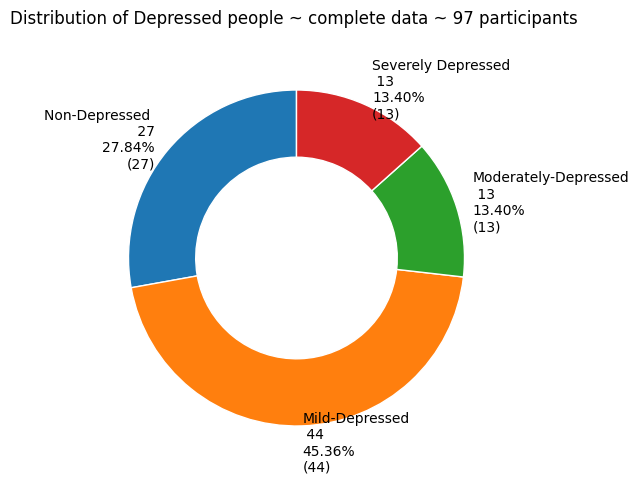

In [ ]:
categories = ['Non-Depressed \n %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-Depressed\n %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-Depressed\n %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely Depressed\n %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)]
# Percentages corresponding to each category
totaltotaldep = non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3 + mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3 + mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3 + sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3
percentages = [100*(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3)/totaltotaldep, 100*(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3)/totaltotaldep, 100*(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3)/totaltotaldep, 100*(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)/totaltotaldep]
actual_numbers = [(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3),(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3), (mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), (sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)]

# Creating a pie chart
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(percentages, labels=categories, startangle=90,
                                  autopct='', wedgeprops=dict(width=0.4, edgecolor='w'))

# Add text annotations for each wedge
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    # Get the percentage and the actual number for the current wedge
    percentage = percentages[i]
    actual_number = actual_numbers[i]

    # Set the text for the wedge
    text.set_text(f"{categories[i]}\n{percentage:.2f}%\n({actual_number})")

ax.axis('equal')
plt.title('Distribution of Depressed people ~ complete data ~ 97 participants \n\n')


# Display the pie chart
plt.show()


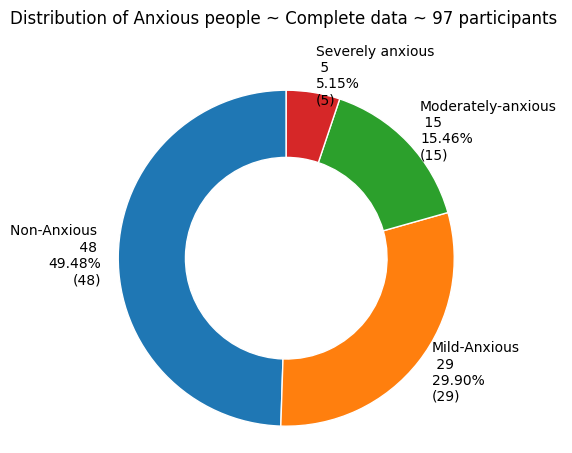

In [ ]:
categories = ['Non-Anxious \n %s ' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious\n %s '% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious\n %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious\n %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)]
# Percentages corresponding to each category
totaltotalanx = non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3 + mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3 + mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3 + sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3
percentages = [100*(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3)/totaltotalanx, 100*(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3)/totaltotalanx, 100*(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3)/totaltotalanx, 100*(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)/totaltotalanx]
actual_numbers = [(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3),(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3), (mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), (sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)]

# Creating a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(percentages, labels=categories, startangle=90,
                                  autopct='', wedgeprops=dict(width=0.4, edgecolor='w'))

# Add text annotations for each wedge
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    # Get the percentage and the actual number for the current wedge
    percentage = percentages[i]
    actual_number = actual_numbers[i]

    # Set the text for the wedge
    text.set_text(f"{categories[i]}\n{percentage:.2f}%\n({actual_number})")
ax.axis('equal')
plt.title('Distribution of Anxious people ~ Complete data ~ 97 participants \n\n')


# Display the pie chart
plt.show()


### Cumulative results : categorizing based on Sets (1/2/3/4)

In [ ]:
myTable = PrettyTable(["Emotion", "Set 1 : %s" % total1_anx, "Set 2 : %s" % total2_anx, "Set 3 : %s" % total3_anx, "Set 4 : %s" % total4_anx])
myTable.title = 'Valence ~ Mean ~ Cumulative'
# Add rows
myTable.add_row(["Happy", round(seta_avg['seta_Happy_avg_val'],2),
                 round(setb_avg['setb_Happy_avg_val'],2),
                 round(setc_avg['setc_Happy_avg_val'],2),
                 round(setd_avg['setd_Happy_avg_val'],2)])
myTable.add_row(["Sad", round(seta_avg['seta_Sad_avg_val'],2),
                 round(setb_avg['setb_Sad_avg_val'],2),
                 round(setc_avg['setc_Sad_avg_val'],2),
                 round(setd_avg['setd_Sad_avg_val'],2)])
myTable.add_row(["Angry", round(seta_avg['seta_Angry_avg_val'],2),
                 round(setb_avg['setb_Angry_avg_val'],2),
                 round(setc_avg['setc_Angry_avg_val'],2),
                 round(setd_avg['setd_Angry_avg_val'],2)])
myTable.add_row(["Neutral", round(seta_avg['seta_Neutral_avg_val'],2),
                 round(setb_avg['setb_Neutral_avg_val'],2),
                 round(setc_avg['setc_Neutral_avg_val'],2),
                 round(setd_avg['setd_Neutral_avg_val'],2)])
print('For Valence ~ Mean ~ Cumultive')
print(myTable)

For Valence ~ Mean ~ Cumultive
+-------------------------------------------------------------+
|                 Valence ~ Mean ~ Cumulative                 |
+---------+------------+------------+------------+------------+
| Emotion | Set 1 : 23 | Set 2 : 26 | Set 3 : 24 | Set 4 : 24 |
+---------+------------+------------+------------+------------+
|  Happy  |    3.99    |    4.07    |    3.6     |    3.6     |
|   Sad   |    2.4     |    2.51    |    1.97    |    3.03    |
|  Angry  |    2.91    |    2.08    |    1.83    |    2.03    |
| Neutral |    2.56    |    2.96    |    3.23    |    3.66    |
+---------+------------+------------+------------+------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Set 1 : %s" % total1_anx, "Set 2 : %s" % total2_anx, "Set 3 : %s" % total3_anx, "Set 4 : %s" % total4_anx])
myTable.title = 'Arousal ~ Set 4 ~ Cumultive '
# Add rows
myTable.add_row(["Happy", round(seta_avg['seta_Happy_avg_arous'],2),
                 round(setb_avg['setb_Happy_avg_arous'],2),
                 round(setc_avg['setc_Happy_avg_arous'],2),
                 round(setd_avg['setd_Happy_avg_arous'],2)])
myTable.add_row(["Sad", round(seta_avg['seta_Sad_avg_arous'],2),
                 round(setb_avg['setb_Sad_avg_arous'],2),
                 round(setc_avg['setc_Sad_avg_arous'],2),
                 round(setd_avg['setd_Sad_avg_arous'],2)])
myTable.add_row(["Angry", round(seta_avg['seta_Angry_avg_arous'],2),
                 round(setb_avg['setb_Angry_avg_arous'],2),
                 round(setc_avg['setc_Angry_avg_arous'],2),
                 round(setd_avg['setd_Angry_avg_arous'],2)])
myTable.add_row(["Neutral", round(seta_avg['seta_Neutral_avg_arous'],2),
                 round(setb_avg['setb_Neutral_avg_arous'],2),
                 round(setc_avg['setc_Neutral_avg_arous'],2),
                 round(setd_avg['setd_Neutral_avg_arous'],2)])
print('Arousal ~ Set 4 ~ Cumultive ')
print(myTable)

Arousal ~ Set 4 ~ Cumultive 
+-------------------------------------------------------------+
|                 Arousal ~ Set 4 ~ Cumultive                 |
+---------+------------+------------+------------+------------+
| Emotion | Set 1 : 23 | Set 2 : 26 | Set 3 : 24 | Set 4 : 24 |
+---------+------------+------------+------------+------------+
|  Happy  |    3.8     |    3.24    |    3.32    |    3.33    |
|   Sad   |    2.05    |    2.03    |    2.5     |    2.26    |
|  Angry  |    3.01    |    3.79    |    3.84    |    4.17    |
| Neutral |    2.07    |    2.08    |    2.31    |    2.49    |
+---------+------------+------------+------------+------------+


### Now we'll talk about cumulative while categorizing based on PHQ9 and GAD7 scores

For one category we can take avg from our prev variables like setd_Happy_avg_val_non_dep and similarly for all sets of Happy and then multiply by different number of dep people there then put the rating there by taking a weighted average

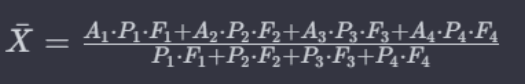

Here,

,
A
1
​
 ,A
2
​
 ,A
3
​
 , and

4
A
4
​
  are the averages of responses for different sets,

P
1
​
 ,P
2
​
 ,P
3
​
 , and

4
P
4
​
  are the corresponding numbers of people in each set, and
F
1
​
 ,F
2
​
 ,F
3
​
 , and

4
F
4
​
  are the corresponding numbers of files in each set.

This formula takes into account both the averages, the number of people, and the number of files for each set, providing a weighted overall average based on the responses from different sets.

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-Anxious : %s' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious : %s'% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious : %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious : %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)])
myTable.title = 'Valence ~ Mean ~ All Sets'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy", round((((setd_anx['setd_Happy_avg_val_non_anx'])*(non_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_val_non_anx'])*(non_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_val_non_anx'])*(non_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_val_non_anx'])*(non_anx_tot1)*(6)))/((non_anx_tot4*6)+(non_anx_tot3*7)+(non_anx_tot2*6)+(non_anx_tot1*6)),2),
                 round((((setd_anx['setd_Happy_avg_val_mild_anx'])*(mild_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_val_mild_anx'])*(mild_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_val_mild_anx'])*(mild_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_val_mild_anx'])*(mild_anx_tot1)*(6)))/((mild_anx_tot4*6)+(mild_anx_tot3*7)+(mild_anx_tot2*6)+(mild_anx_tot1*6)),2),
                 round((((setd_anx['setd_Happy_avg_val_mod_anx'])*(mod_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_val_mod_anx'])*(mod_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_val_mod_anx'])*(mod_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_val_mod_anx'])*(mod_anx_tot1)*(6)))/((mod_anx_tot4*6)+(mod_anx_tot3*7)+(mod_anx_tot2*6)+(mod_anx_tot1*6)),2),
                 round((((setd_anx['setd_Happy_avg_val_sev_anx'])*(sev_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_val_sev_anx'])*(sev_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_val_sev_anx'])*(sev_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_val_sev_anx'])*(sev_anx_tot1)*(6)))/((sev_anx_tot4*6)+(sev_anx_tot3*7)+(sev_anx_tot2*6)+(sev_anx_tot1*6)),2)])

myTable.add_row(["Sad", round((((setd_anx['setd_Sad_avg_val_non_anx'])*(non_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_val_non_anx'])*(non_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_val_non_anx'])*(non_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_val_non_anx'])*(non_anx_tot1)*(6)))/(non_anx_tot4*(6)+non_anx_tot3*(6)+non_anx_tot2*(7)+non_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Sad_avg_val_mild_anx'])*(mild_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_val_mild_anx'])*(mild_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_val_mild_anx'])*(mild_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_val_mild_anx'])*(mild_anx_tot1)*(6)))/(mild_anx_tot4*(6)+mild_anx_tot3*(6)+mild_anx_tot2*(7)+mild_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Sad_avg_val_mod_anx'])*(mod_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_val_mod_anx'])*(mod_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_val_mod_anx'])*(mod_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_val_mod_anx'])*(mod_anx_tot1)*(6)))/(mod_anx_tot4*(6)+mod_anx_tot3*(6)+mod_anx_tot2*(7)+mod_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Sad_avg_val_sev_anx'])*(sev_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_val_sev_anx'])*(sev_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_val_sev_anx'])*(sev_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_val_sev_anx'])*(sev_anx_tot1)*(6)))/(sev_anx_tot4*(6)+sev_anx_tot3*(6)+sev_anx_tot2*(7)+sev_anx_tot1*(6)),2)])

myTable.add_row(["Angry", round((((setd_anx['setd_Angry_avg_val_non_anx'])*(non_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_val_non_anx'])*(non_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_val_non_anx'])*(non_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_val_non_anx'])*(non_anx_tot1)*(6)))/(non_anx_tot4*(7)+non_anx_tot3*(6)+non_anx_tot2*(6)+non_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Angry_avg_val_mild_anx'])*(mild_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_val_mild_anx'])*(mild_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_val_mild_anx'])*(mild_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_val_mild_anx'])*(mild_anx_tot1)*(6)))/(mild_anx_tot4*(7)+mild_anx_tot3*(6)+mild_anx_tot2*(6)+mild_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Angry_avg_val_mod_anx'])*(mod_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_val_mod_anx'])*(mod_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_val_mod_anx'])*(mod_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_val_mod_anx'])*(mod_anx_tot1)*(6)))/(mod_anx_tot4*(7)+mod_anx_tot3*(6)+mod_anx_tot2*(6)+mod_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Angry_avg_val_sev_anx'])*(sev_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_val_sev_anx'])*(sev_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_val_sev_anx'])*(sev_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_val_sev_anx'])*(sev_anx_tot1)*(6)))/(sev_anx_tot4*(7)+sev_anx_tot3*(6)+sev_anx_tot2*(6)+sev_anx_tot1*(6)),2)])

myTable.add_row(["Neutral", round((((setd_anx['setd_Neutral_avg_val_non_anx'])*(non_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_val_non_anx'])*(non_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_val_non_anx'])*(non_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_val_non_anx'])*(non_anx_tot1)*(7)))/(non_anx_tot4*(6)+non_anx_tot3*(6)+non_anx_tot2*(6)+non_anx_tot1*(7)),2),
                 round((((setd_anx['setd_Neutral_avg_val_mild_anx'])*(mild_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_val_mild_anx'])*(mild_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_val_mild_anx'])*(mild_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_val_mild_anx'])*(mild_anx_tot1)*(7)))/(mild_anx_tot4*(6)+mild_anx_tot3*(6)+mild_anx_tot2*(6)+mild_anx_tot1*(7)),2),
                 round((((setd_anx['setd_Neutral_avg_val_mod_anx'])*(mod_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_val_mod_anx'])*(mod_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_val_mod_anx'])*(mod_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_val_mod_anx'])*(mod_anx_tot1)*(7)))/(mod_anx_tot4*(6)+mod_anx_tot3*(6)+mod_anx_tot2*(6)+mod_anx_tot1*(7)),2),
                 round((((setd_anx['setd_Neutral_avg_val_sev_anx'])*(sev_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_val_sev_anx'])*(sev_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_val_sev_anx'])*(sev_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_val_sev_anx'])*(sev_anx_tot1)*(7)))/(sev_anx_tot4*(6)+sev_anx_tot3*(6)+sev_anx_tot2*(6)+sev_anx_tot1*(7)),2)])
print('For Valence ~ Mean ~ All Sets')
print(myTable)

For Valence ~ Mean ~ All Sets
+-------------------------------------------------------------------------------------------------+
|                                    Valence ~ Mean ~ All Sets                                    |
+---------+------------------+-------------------+-------------------------+----------------------+
| Emotion | Non-Anxious : 48 | Mild-Anxious : 29 | Moderately-anxious : 15 | Severely anxious : 5 |
+---------+------------------+-------------------+-------------------------+----------------------+
|  Happy  |       3.76       |        3.82       |           3.87          |         4.0          |
|   Sad   |       2.59       |        2.41       |           2.41          |         2.03         |
|  Angry  |       2.22       |        2.2        |           2.21          |         1.93         |
| Neutral |       3.23       |        3.02       |           3.04          |         2.1          |
+---------+------------------+-------------------+--------------------

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-depressed : %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-depressed : %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-depressed : %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely depressed : %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)])
myTable.title = 'Valence ~ Mean ~ All Sets'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy", round((((setd_dep['setd_Happy_avg_val_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_val_non_dep'])*(non_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_val_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_val_non_dep'])*(non_dep_tot1)*(6)))/((non_dep_tot4*6)+(non_dep_tot3*7)+(non_dep_tot2*6)+(non_dep_tot1*6)),2),
                 round((((setd_dep['setd_Happy_avg_val_mild_dep'])*(mild_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_val_mild_dep'])*(mild_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_val_mild_dep'])*(mild_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_val_mild_dep'])*(mild_dep_tot1)*(6)))/((mild_dep_tot4*6)+(mild_dep_tot3*7)+(mild_dep_tot2*6)+(mild_dep_tot1*6)),2),
                 round((((setd_dep['setd_Happy_avg_val_mod_dep'])*(mod_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_val_mod_dep'])*(mod_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_val_mod_dep'])*(mod_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_val_mod_dep'])*(mod_dep_tot1)*(6)))/((mod_dep_tot4*6)+(mod_dep_tot3*7)+(mod_dep_tot2*6)+(mod_dep_tot1*6)),2),
                 round((((setd_dep['setd_Happy_avg_val_sev_dep'])*(sev_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_val_sev_dep'])*(sev_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_val_sev_dep'])*(sev_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_val_sev_dep'])*(sev_dep_tot1)*(6)))/((sev_dep_tot4*6)+(sev_dep_tot3*7)+(sev_dep_tot2*6)+(sev_dep_tot1*6)),2)])

myTable.add_row(["Sad", round((((setd_dep['setd_Sad_avg_val_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_val_non_dep'])*(non_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_val_non_dep'])*(non_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_val_non_dep'])*(non_dep_tot1)*(6)))/(non_dep_tot4*(6)+non_dep_tot3*(6)+non_dep_tot2*(7)+non_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Sad_avg_val_mild_dep'])*(mild_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_val_mild_dep'])*(mild_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_val_mild_dep'])*(mild_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_val_mild_dep'])*(mild_dep_tot1)*(6)))/(mild_dep_tot4*(6)+mild_dep_tot3*(6)+mild_dep_tot2*(7)+mild_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Sad_avg_val_mod_dep'])*(mod_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_val_mod_dep'])*(mod_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_val_mod_dep'])*(mod_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_val_mod_dep'])*(mod_dep_tot1)*(6)))/(mod_dep_tot4*(6)+mod_dep_tot3*(6)+mod_dep_tot2*(7)+mod_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Sad_avg_val_sev_dep'])*(sev_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_val_sev_dep'])*(sev_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_val_sev_dep'])*(sev_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_val_sev_dep'])*(sev_dep_tot1)*(6)))/(sev_dep_tot4*(6)+sev_dep_tot3*(6)+sev_dep_tot2*(7)+sev_dep_tot1*(6)),2)])

myTable.add_row(["Angry", round((((setd_dep['setd_Angry_avg_val_non_dep'])*(non_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_val_non_dep'])*(non_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_val_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_val_non_dep'])*(non_dep_tot1)*(6)))/(non_dep_tot4*(7)+non_dep_tot3*(6)+non_dep_tot2*(6)+non_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Angry_avg_val_mild_dep'])*(mild_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_val_mild_dep'])*(mild_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_val_mild_dep'])*(mild_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_val_mild_dep'])*(mild_dep_tot1)*(6)))/(mild_dep_tot4*(7)+mild_dep_tot3*(6)+mild_dep_tot2*(6)+mild_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Angry_avg_val_mod_dep'])*(mod_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_val_mod_dep'])*(mod_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_val_mod_dep'])*(mod_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_val_mod_dep'])*(mod_dep_tot1)*(6)))/(mod_dep_tot4*(7)+mod_dep_tot3*(6)+mod_dep_tot2*(6)+mod_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Angry_avg_val_sev_dep'])*(sev_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_val_sev_dep'])*(sev_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_val_sev_dep'])*(sev_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_val_sev_dep'])*(sev_dep_tot1)*(6)))/(sev_dep_tot4*(7)+sev_dep_tot3*(6)+sev_dep_tot2*(6)+sev_dep_tot1*(6)),2)])

myTable.add_row(["Neutral", round((((setd_dep['setd_Neutral_avg_val_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_val_non_dep'])*(non_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_val_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_val_non_dep'])*(non_dep_tot1)*(7)))/(non_dep_tot4*(6)+non_dep_tot3*(6)+non_dep_tot2*(6)+non_dep_tot1*(7)),2),
                 round((((setd_dep['setd_Neutral_avg_val_mild_dep'])*(mild_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_val_mild_dep'])*(mild_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_val_mild_dep'])*(mild_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_val_mild_dep'])*(mild_dep_tot1)*(7)))/(mild_dep_tot4*(6)+mild_dep_tot3*(6)+mild_dep_tot2*(6)+mild_dep_tot1*(7)),2),
                 round((((setd_dep['setd_Neutral_avg_val_mod_dep'])*(mod_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_val_mod_dep'])*(mod_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_val_mod_dep'])*(mod_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_val_mod_dep'])*(mod_dep_tot1)*(7)))/(mod_dep_tot4*(6)+mod_dep_tot3*(6)+mod_dep_tot2*(6)+mod_dep_tot1*(7)),2),
                 round((((setd_dep['setd_Neutral_avg_val_sev_dep'])*(sev_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_val_sev_dep'])*(sev_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_val_sev_dep'])*(sev_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_val_sev_dep'])*(sev_dep_tot1)*(7)))/(sev_dep_tot4*(6)+sev_dep_tot3*(6)+sev_dep_tot2*(6)+sev_dep_tot1*(7)),2)])
print('For Valence ~ Mean ~ All Sets')
print(myTable)

For Valence ~ Mean ~ All Sets
+----------------------------------------------------------------------------------------------------------+
|                                        Valence ~ Mean ~ All Sets                                         |
+---------+--------------------+---------------------+---------------------------+-------------------------+
| Emotion | Non-depressed : 27 | Mild-depressed : 44 | Moderately-depressed : 13 | Severely depressed : 13 |
+---------+--------------------+---------------------+---------------------------+-------------------------+
|  Happy  |        3.73        |         3.83        |            3.86           |           3.86          |
|   Sad   |        2.6         |         2.5         |            2.15           |           2.47          |
|  Angry  |        2.09        |         2.21        |            2.37           |           2.18          |
| Neutral |        3.3         |         3.09        |            2.93           |           2.79 

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-Anxious : %s' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious : %s'% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious : %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious : %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)])
myTable.title = 'Arousal ~ Mean ~ All Sets'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy", round((((setd_anx['setd_Happy_avg_arous_non_anx'])*(non_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_arous_non_anx'])*(non_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_arous_non_anx'])*(non_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_arous_non_anx'])*(non_anx_tot1)*(6)))/((non_anx_tot4*6)+(non_anx_tot3*7)+(non_anx_tot2*6)+(non_anx_tot1*6)),2),
                 round((((setd_anx['setd_Happy_avg_arous_mild_anx'])*(mild_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_arous_mild_anx'])*(mild_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_arous_mild_anx'])*(mild_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_arous_mild_anx'])*(mild_anx_tot1)*(6)))/((mild_anx_tot4*6)+(mild_anx_tot3*7)+(mild_anx_tot2*6)+(mild_anx_tot1*6)),2),
                 round((((setd_anx['setd_Happy_avg_arous_mod_anx'])*(mod_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_arous_mod_anx'])*(mod_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_arous_mod_anx'])*(mod_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_arous_mod_anx'])*(mod_anx_tot1)*(6)))/((mod_anx_tot4*6)+(mod_anx_tot3*7)+(mod_anx_tot2*6)+(mod_anx_tot1*6)),2),
                 round((((setd_anx['setd_Happy_avg_arous_sev_anx'])*(sev_anx_tot4)*(6)) + ((setc_anx['setc_Happy_avg_arous_sev_anx'])*(sev_anx_tot3)*(7)) + ((setb_anx['setb_Happy_avg_arous_sev_anx'])*(sev_anx_tot2)*(6)) + ((seta_anx['seta_Happy_avg_arous_sev_anx'])*(sev_anx_tot1)*(6)))/((sev_anx_tot4*6)+(sev_anx_tot3*7)+(sev_anx_tot2*6)+(sev_anx_tot1*6)),2)])

myTable.add_row(["Sad", round((((setd_anx['setd_Sad_avg_arous_non_anx'])*(non_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_arous_non_anx'])*(non_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_arous_non_anx'])*(non_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_arous_non_anx'])*(non_anx_tot1)*(6)))/(non_anx_tot4*(6)+non_anx_tot3*(6)+non_anx_tot2*(7)+non_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Sad_avg_arous_mild_anx'])*(mild_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_arous_mild_anx'])*(mild_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_arous_mild_anx'])*(mild_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_arous_mild_anx'])*(mild_anx_tot1)*(6)))/(mild_anx_tot4*(6)+mild_anx_tot3*(6)+mild_anx_tot2*(7)+mild_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Sad_avg_arous_mod_anx'])*(mod_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_arous_mod_anx'])*(mod_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_arous_mod_anx'])*(mod_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_arous_mod_anx'])*(mod_anx_tot1)*(6)))/(mod_anx_tot4*(6)+mod_anx_tot3*(6)+mod_anx_tot2*(7)+mod_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Sad_avg_arous_sev_anx'])*(sev_anx_tot4)*(6)) + ((setc_anx['setc_Sad_avg_arous_sev_anx'])*(sev_anx_tot3)*(6)) + ((setb_anx['setb_Sad_avg_arous_sev_anx'])*(sev_anx_tot2)*(7)) + ((seta_anx['seta_Sad_avg_arous_sev_anx'])*(sev_anx_tot1)*(6)))/(sev_anx_tot4*(6)+sev_anx_tot3*(6)+sev_anx_tot2*(7)+sev_anx_tot1*(6)),2)])

myTable.add_row(["Angry", round((((setd_anx['setd_Angry_avg_arous_non_anx'])*(non_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_arous_non_anx'])*(non_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_arous_non_anx'])*(non_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_arous_non_anx'])*(non_anx_tot1)*(6)))/(non_anx_tot4*(7)+non_anx_tot3*(6)+non_anx_tot2*(6)+non_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Angry_avg_arous_mild_anx'])*(mild_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_arous_mild_anx'])*(mild_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_arous_mild_anx'])*(mild_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_arous_mild_anx'])*(mild_anx_tot1)*(6)))/(mild_anx_tot4*(7)+mild_anx_tot3*(6)+mild_anx_tot2*(6)+mild_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Angry_avg_arous_mod_anx'])*(mod_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_arous_mod_anx'])*(mod_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_arous_mod_anx'])*(mod_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_arous_mod_anx'])*(mod_anx_tot1)*(6)))/(mod_anx_tot4*(7)+mod_anx_tot3*(6)+mod_anx_tot2*(6)+mod_anx_tot1*(6)),2),
                 round((((setd_anx['setd_Angry_avg_arous_sev_anx'])*(sev_anx_tot4)*(7)) + ((setc_anx['setc_Angry_avg_arous_sev_anx'])*(sev_anx_tot3)*(6)) + ((setb_anx['setb_Angry_avg_arous_sev_anx'])*(sev_anx_tot2)*(6)) + ((seta_anx['seta_Angry_avg_arous_sev_anx'])*(sev_anx_tot1)*(6)))/(sev_anx_tot4*(7)+sev_anx_tot3*(6)+sev_anx_tot2*(6)+sev_anx_tot1*(6)),2)])

myTable.add_row(["Neutral", round((((setd_anx['setd_Neutral_avg_arous_non_anx'])*(non_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_arous_non_anx'])*(non_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_arous_non_anx'])*(non_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_arous_non_anx'])*(non_anx_tot1)*(7)))/(non_anx_tot4*(6)+non_anx_tot3*(6)+non_anx_tot2*(6)+non_anx_tot1*(7)),2),
                 round((((setd_anx['setd_Neutral_avg_arous_mild_anx'])*(mild_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_arous_mild_anx'])*(mild_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_arous_mild_anx'])*(mild_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_arous_mild_anx'])*(mild_anx_tot1)*(7)))/(mild_anx_tot4*(6)+mild_anx_tot3*(6)+mild_anx_tot2*(6)+mild_anx_tot1*(7)),2),
                 round((((setd_anx['setd_Neutral_avg_arous_mod_anx'])*(mod_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_arous_mod_anx'])*(mod_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_arous_mod_anx'])*(mod_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_arous_mod_anx'])*(mod_anx_tot1)*(7)))/(mod_anx_tot4*(6)+mod_anx_tot3*(6)+mod_anx_tot2*(6)+mod_anx_tot1*(7)),2),
                 round((((setd_anx['setd_Neutral_avg_arous_sev_anx'])*(sev_anx_tot4)*(6)) + ((setc_anx['setc_Neutral_avg_arous_sev_anx'])*(sev_anx_tot3)*(6)) + ((setb_anx['setb_Neutral_avg_arous_sev_anx'])*(sev_anx_tot2)*(6)) + ((seta_anx['seta_Neutral_avg_arous_sev_anx'])*(sev_anx_tot1)*(7)))/(sev_anx_tot4*(6)+sev_anx_tot3*(6)+sev_anx_tot2*(6)+sev_anx_tot1*(7)),2)])
print('For Arousal ~ Mean ~ All Sets')
print(myTable)

For Arousal ~ Mean ~ All Sets
+-------------------------------------------------------------------------------------------------+
|                                    Arousal ~ Mean ~ All Sets                                    |
+---------+------------------+-------------------+-------------------------+----------------------+
| Emotion | Non-Anxious : 48 | Mild-Anxious : 29 | Moderately-anxious : 15 | Severely anxious : 5 |
+---------+------------------+-------------------+-------------------------+----------------------+
|  Happy  |       3.3        |        3.51       |           3.71          |         3.06         |
|   Sad   |       2.12       |        2.39       |           2.33          |         1.56         |
|  Angry  |       3.71       |        3.72       |           3.74          |         3.93         |
| Neutral |       2.14       |        2.33       |           2.39          |         2.0          |
+---------+------------------+-------------------+--------------------

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-depressed : %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-depressed : %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-depressed : %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely depressed : %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)])
myTable.title = 'Arousal ~ Mean ~ All Sets'
# Averaging for all emeotions

# Add rows
myTable.add_row(["Happy", round((((setd_dep['setd_Happy_avg_arous_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_arous_non_dep'])*(non_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_arous_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_arous_non_dep'])*(non_dep_tot1)*(6)))/((non_dep_tot4*6)+(non_dep_tot3*7)+(non_dep_tot2*6)+(non_dep_tot1*6)),2),
                 round((((setd_dep['setd_Happy_avg_arous_mild_dep'])*(mild_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_arous_mild_dep'])*(mild_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_arous_mild_dep'])*(mild_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_arous_mild_dep'])*(mild_dep_tot1)*(6)))/((mild_dep_tot4*6)+(mild_dep_tot3*7)+(mild_dep_tot2*6)+(mild_dep_tot1*6)),2),
                 round((((setd_dep['setd_Happy_avg_arous_mod_dep'])*(mod_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_arous_mod_dep'])*(mod_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_arous_mod_dep'])*(mod_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_arous_mod_dep'])*(mod_dep_tot1)*(6)))/((mod_dep_tot4*6)+(mod_dep_tot3*7)+(mod_dep_tot2*6)+(mod_dep_tot1*6)),2),
                 round((((setd_dep['setd_Happy_avg_arous_sev_dep'])*(sev_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_arous_sev_dep'])*(sev_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_arous_sev_dep'])*(sev_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_arous_sev_dep'])*(sev_dep_tot1)*(6)))/((sev_dep_tot4*6)+(sev_dep_tot3*7)+(sev_dep_tot2*6)+(sev_dep_tot1*6)),2)])

myTable.add_row(["Sad", round((((setd_dep['setd_Sad_avg_arous_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_arous_non_dep'])*(non_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_arous_non_dep'])*(non_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_arous_non_dep'])*(non_dep_tot1)*(6)))/(non_dep_tot4*(6)+non_dep_tot3*(6)+non_dep_tot2*(7)+non_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Sad_avg_arous_mild_dep'])*(mild_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_arous_mild_dep'])*(mild_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_arous_mild_dep'])*(mild_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_arous_mild_dep'])*(mild_dep_tot1)*(6)))/(mild_dep_tot4*(6)+mild_dep_tot3*(6)+mild_dep_tot2*(7)+mild_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Sad_avg_arous_mod_dep'])*(mod_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_arous_mod_dep'])*(mod_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_arous_mod_dep'])*(mod_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_arous_mod_dep'])*(mod_dep_tot1)*(6)))/(mod_dep_tot4*(6)+mod_dep_tot3*(6)+mod_dep_tot2*(7)+mod_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Sad_avg_arous_sev_dep'])*(sev_dep_tot4)*(6)) + ((setc_dep['setc_Sad_avg_arous_sev_dep'])*(sev_dep_tot3)*(6)) + ((setb_dep['setb_Sad_avg_arous_sev_dep'])*(sev_dep_tot2)*(7)) + ((seta_dep['seta_Sad_avg_arous_sev_dep'])*(sev_dep_tot1)*(6)))/(sev_dep_tot4*(6)+sev_dep_tot3*(6)+sev_dep_tot2*(7)+sev_dep_tot1*(6)),2)])

myTable.add_row(["Angry", round((((setd_dep['setd_Angry_avg_arous_non_dep'])*(non_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_arous_non_dep'])*(non_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_arous_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_arous_non_dep'])*(non_dep_tot1)*(6)))/(non_dep_tot4*(7)+non_dep_tot3*(6)+non_dep_tot2*(6)+non_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Angry_avg_arous_mild_dep'])*(mild_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_arous_mild_dep'])*(mild_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_arous_mild_dep'])*(mild_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_arous_mild_dep'])*(mild_dep_tot1)*(6)))/(mild_dep_tot4*(7)+mild_dep_tot3*(6)+mild_dep_tot2*(6)+mild_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Angry_avg_arous_mod_dep'])*(mod_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_arous_mod_dep'])*(mod_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_arous_mod_dep'])*(mod_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_arous_mod_dep'])*(mod_dep_tot1)*(6)))/(mod_dep_tot4*(7)+mod_dep_tot3*(6)+mod_dep_tot2*(6)+mod_dep_tot1*(6)),2),
                 round((((setd_dep['setd_Angry_avg_arous_sev_dep'])*(sev_dep_tot4)*(7)) + ((setc_dep['setc_Angry_avg_arous_sev_dep'])*(sev_dep_tot3)*(6)) + ((setb_dep['setb_Angry_avg_arous_sev_dep'])*(sev_dep_tot2)*(6)) + ((seta_dep['seta_Angry_avg_arous_sev_dep'])*(sev_dep_tot1)*(6)))/(sev_dep_tot4*(7)+sev_dep_tot3*(6)+sev_dep_tot2*(6)+sev_dep_tot1*(6)),2)])

myTable.add_row(["Neutral", round((((setd_dep['setd_Neutral_avg_arous_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_arous_non_dep'])*(non_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_arous_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_arous_non_dep'])*(non_dep_tot1)*(7)))/(non_dep_tot4*(6)+non_dep_tot3*(6)+non_dep_tot2*(6)+non_dep_tot1*(7)),2),
                 round((((setd_dep['setd_Neutral_avg_arous_mild_dep'])*(mild_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_arous_mild_dep'])*(mild_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_arous_mild_dep'])*(mild_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_arous_mild_dep'])*(mild_dep_tot1)*(7)))/(mild_dep_tot4*(6)+mild_dep_tot3*(6)+mild_dep_tot2*(6)+mild_dep_tot1*(7)),2),
                 round((((setd_dep['setd_Neutral_avg_arous_mod_dep'])*(mod_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_arous_mod_dep'])*(mod_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_arous_mod_dep'])*(mod_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_arous_mod_dep'])*(mod_dep_tot1)*(7)))/(mod_dep_tot4*(6)+mod_dep_tot3*(6)+mod_dep_tot2*(6)+mod_dep_tot1*(7)),2),
                 round((((setd_dep['setd_Neutral_avg_arous_sev_dep'])*(sev_dep_tot4)*(6)) + ((setc_dep['setc_Neutral_avg_arous_sev_dep'])*(sev_dep_tot3)*(6)) + ((setb_dep['setb_Neutral_avg_arous_sev_dep'])*(sev_dep_tot2)*(6)) + ((seta_dep['seta_Neutral_avg_arous_sev_dep'])*(sev_dep_tot1)*(7)))/(sev_dep_tot4*(6)+sev_dep_tot3*(6)+sev_dep_tot2*(6)+sev_dep_tot1*(7)),2)])
print('For Arousal ~ Mean ~ All Sets')
print(myTable)

For Arousal ~ Mean ~ All Sets
+----------------------------------------------------------------------------------------------------------+
|                                        Arousal ~ Mean ~ All Sets                                         |
+---------+--------------------+---------------------+---------------------------+-------------------------+
| Emotion | Non-depressed : 27 | Mild-depressed : 44 | Moderately-depressed : 13 | Severely depressed : 13 |
+---------+--------------------+---------------------+---------------------------+-------------------------+
|  Happy  |        3.4         |         3.44        |            3.35           |           3.41          |
|   Sad   |        2.19        |         2.21        |            2.28           |           2.12          |
|  Angry  |        3.94        |         3.65        |            3.67           |           3.63          |
| Neutral |        2.15        |         2.29        |            2.27           |           2.13 

# Medians

FOR EACH EMOTION INTO EACH CATEGORY I AM DIRECTLY TAKING MEDIAN OF ALL THE VALUES OF ALL FILES INTO ONE EMOTION FOR THE DESIRED MENTAL HEALTH CATEGORY


## Set A

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
seta_anx_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_med = []
    mod_anx_med = []
    mild_anx_med = []
    non_anx_med = []

    sev_anx_tot = 0
    mod_anx_tot = 0
    mild_anx_tot = 0
    non_anx_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_gad_score'])):
        if dfs[i]['total_gad_score'][k] > 14:
          if j in dfs[i][col].name:
            sev_anx_tot +=1
            sev_anx_med.append(dfs[i][col][k])
        elif dfs[i]['total_gad_score'][k] > 9:
          if j in dfs[i][col].name:
            mod_anx_tot +=1
            mod_anx_med.append(dfs[i][col][k])
        elif dfs[i]['total_gad_score'][k] > 4:
          if j in dfs[i][col].name:
            mild_anx_tot +=1
            mild_anx_med.append(dfs[i][col][k])
        else:
          if j in dfs[i][col].name:
            non_anx_tot +=1
            non_anx_med.append(dfs[i][col][k])
    # if sev_anx_tot == 0:
    #   seta_anx_median[f'seta_{emotions[i]}_med_{j}_sev_anx'] = 0
    # else:
    seta_anx_median[f'seta_{emotions[i]}_med_{j}_sev_anx'] = np.median(sev_anx_med)
    seta_anx_median[f'seta_{emotions[i]}_med_{j}_mod_anx'] = np.median(mod_anx_med)
    seta_anx_median[f'seta_{emotions[i]}_med_{j}_mild_anx'] = np.median(mild_anx_med)
    seta_anx_median[f'seta_{emotions[i]}_med_{j}_non_anx'] = np.median(non_anx_med)
    #     tot+=1
    #     med += sum(dfs[i][col].values)
    # seta_med[f'seta_{emotions[i]}_med_{j}'] = med/(tot*len(dfs[i].index))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot1, "Mildly-Anxious : (%s)" % mild_anx_tot1, "Moderately-Anxious : (%s)" % mod_anx_tot1, "Severely-Anxious : (%s)" % sev_anx_tot1])
# myTable = PrettyTable(["Emotion", "Non - depressed", "Mild - Depressed","Moderately Depressed", "Severe Depressed"])

myTable.title = 'Arousal ~ Median ~ Set 1'
# Adding rows
myTable.add_row(["Happy (6)", round(seta_anx_median['seta_Happy_med_arous_non_anx'],2),
                 round(seta_anx_median['seta_Happy_med_arous_mild_anx'],2),
                 round(seta_anx_median['seta_Happy_med_arous_mod_anx'],2),
                 round(seta_anx_median['seta_Happy_med_arous_sev_anx'],2)])
myTable.add_row(["Sad (6)", round(seta_anx_median['seta_Sad_med_arous_non_anx'],2),
                 round(seta_anx_median['seta_Sad_med_arous_mild_anx'],2),
                 round(seta_anx_median['seta_Sad_med_arous_mod_anx'],2),
                 round(seta_anx_median['seta_Sad_med_arous_sev_anx'],2)])
myTable.add_row(["Angry (6)", round(seta_anx_median['seta_Angry_med_arous_non_anx'],2),
                 round(seta_anx_median['seta_Angry_med_arous_mild_anx'],2),
                 round(seta_anx_median['seta_Angry_med_arous_mod_anx'],2),
                 round(seta_anx_median['seta_Angry_med_arous_sev_anx'],2)])
myTable.add_row(["Neutral (7)", round(seta_anx_median['seta_Neutral_med_arous_non_anx'],2),
                 round(seta_anx_median['seta_Neutral_med_arous_mild_anx'],2),
                 round(seta_anx_median['seta_Neutral_med_arous_mod_anx'],2),
                 round(seta_anx_median['seta_Neutral_med_arous_sev_anx'],2)])
print('For Arousal ~ Session 1')
print(myTable)

For Arousal ~ Session 1
+-------------------------------------------------------------------------------------------------------------+
|                                           Arousal ~ Median ~ Set 1                                          |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|   Emotion   | Non-Anxious : (11) | Mildly-Anxious : (8) | Moderately-Anxious : (4) | Severely-Anxious : (0) |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|  Happy (6)  |        4.0         |         4.0          |           4.0            |          nan           |
|   Sad (6)   |        2.0         |         2.0          |           2.0            |          nan           |
|  Angry (6)  |        3.0         |         3.0          |           3.0            |          nan           |
| Neutral (7) |        2.0         |         2.0          |           1.5       

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot1, "Mildly-Anxious : (%s)" % mild_anx_tot1, "Moderately-Anxious : (%s)" % mod_anx_tot1, "Severely-Anxious : (%s)" % sev_anx_tot1])
myTable.title = 'Valence ~ Meadian ~ Set 1'
# Adding rows
myTable.add_row(["Happy (6)", round(seta_anx_median['seta_Happy_med_val_non_anx'],2),
                 round(seta_anx_median['seta_Happy_med_val_mild_anx'],2),
                 round(seta_anx_median['seta_Happy_med_val_mod_anx'],2),
                 round(seta_anx_median['seta_Happy_med_val_sev_anx'],2)])
myTable.add_row(["Sad (6)", round(seta_anx_median['seta_Sad_med_val_non_anx'],2),
                 round(seta_anx_median['seta_Sad_med_val_mild_anx'],2),
                 round(seta_anx_median['seta_Sad_med_val_mod_anx'],2),
                 round(seta_anx_median['seta_Sad_med_val_sev_anx'],2)])
myTable.add_row(["Angry (6)", round(seta_anx_median['seta_Angry_med_val_non_anx'],2),
                 round(seta_anx_median['seta_Angry_med_val_mild_anx'],2),
                 round(seta_anx_median['seta_Angry_med_val_mod_anx'],2),
                 round(seta_anx_median['seta_Angry_med_val_sev_anx'],2)])
myTable.add_row(["Neutral (7)", round(seta_anx_median['seta_Neutral_med_val_non_anx'],2),
                 round(seta_anx_median['seta_Neutral_med_val_mild_anx'],2),
                 round(seta_anx_median['seta_Neutral_med_val_mod_anx'],2),
                 round(seta_anx_median['seta_Neutral_med_val_sev_anx'],2)])
print('For Valence ~ Session 1')
print(myTable)

For Valence ~ Session 1
+-------------------------------------------------------------------------------------------------------------+
|                                          Valence ~ Meadian ~ Set 1                                          |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|   Emotion   | Non-Anxious : (11) | Mildly-Anxious : (8) | Moderately-Anxious : (4) | Severely-Anxious : (0) |
+-------------+--------------------+----------------------+--------------------------+------------------------+
|  Happy (6)  |        4.0         |         4.0          |           4.0            |          nan           |
|   Sad (6)   |        2.0         |         2.0          |           2.0            |          nan           |
|  Angry (6)  |        3.0         |         3.0          |           3.0            |          nan           |
| Neutral (7) |        3.0         |         2.5          |           2.0       

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
seta_dep_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_med = []
    mod_dep_med = []
    mild_dep_med = []
    non_dep_med = []

    sev_dep_tot = 0
    mild_dep_tot = 0
    mod_dep_tot = 0
    non_dep_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_phq_score'])):
        if dfs[i]['total_phq_score'][k] > 14:
          if j in dfs[i][col].name:
            sev_dep_tot +=1
            sev_dep_med.append(dfs[i][col][k])

        elif dfs[i]['total_phq_score'][k] > 9:
          if j in dfs[i][col].name:
            mod_dep_tot +=1
            mod_dep_med.append(dfs[i][col][k])

        elif dfs[i]['total_phq_score'][k] > 4:
          if j in dfs[i][col].name:
            mild_dep_tot +=1
            mild_dep_med.append(dfs[i][col][k])
        else:
          if j in dfs[i][col].name:
            non_dep_tot +=1
            non_dep_med.append(dfs[i][col][k])
    seta_dep_median[f'seta_{emotions[i]}_med_{j}_sev_dep'] = np.median(sev_dep_med)
    seta_dep_median[f'seta_{emotions[i]}_med_{j}_mod_dep'] = np.median(mod_dep_med)
    seta_dep_median[f'seta_{emotions[i]}_med_{j}_mild_dep'] = np.median(mild_dep_med)
    seta_dep_median[f'seta_{emotions[i]}_med_{j}_non_dep'] = np.median(non_dep_med)
    #     tot+=1
    #     med += sum(dfs[i][col].values)
    # seta_med[f'seta_{emotions[i]}_med_{j}'] = med/(tot*len(dfs[i].index))

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot1, "Mild-Depressed : (%s)" % mild_dep_tot1, "Moderately-Depressed : (%s)" % mod_dep_tot1, "Severely-Depressed : (%s)" % sev_dep_tot1])
myTable.title = 'Arousal ~ Median ~ Set 1'
# Adding rows
myTable.add_row(["Happy (6)", round(seta_dep_median['seta_Happy_med_arous_non_dep'],2),
                 round(seta_dep_median['seta_Happy_med_arous_mild_dep'],2),
                 round(seta_dep_median['seta_Happy_med_arous_mod_dep'],2),
                 round(seta_dep_median['seta_Happy_med_arous_sev_dep'],2)])
myTable.add_row(["Sad (6)", round(seta_dep_median['seta_Sad_med_arous_non_dep'],2),
                 round(seta_dep_median['seta_Sad_med_arous_mild_dep'],2),
                 round(seta_dep_median['seta_Sad_med_arous_mod_dep'],2),
                 round(seta_dep_median['seta_Sad_med_arous_sev_dep'],2)])
myTable.add_row(["Angry (6)", round(seta_dep_median['seta_Angry_med_arous_non_dep'],2),
                 round(seta_dep_median['seta_Angry_med_arous_mild_dep'],2),
                 round(seta_dep_median['seta_Angry_med_arous_mod_dep'],2),
                 round(seta_dep_median['seta_Angry_med_arous_sev_dep'],2)])
myTable.add_row(["Neutral (7)", round(seta_dep_median['seta_Neutral_med_arous_non_dep'],2),
                 round(seta_dep_median['seta_Neutral_med_arous_mild_dep'],2),
                 round(seta_dep_median['seta_Neutral_med_arous_mod_dep'],2),
                 round(seta_dep_median['seta_Neutral_med_arous_sev_dep'],2)])
print('For Arousal ~ Set 1')
print(myTable)

For Arousal ~ Set 1
+-------------------------------------------------------------------------------------------------------------------+
|                                              Arousal ~ Median ~ Set 1                                             |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|   Emotion   | Non-Depressed : (2) | Mild-Depressed : (14) | Moderately-Depressed : (3) | Severely-Depressed : (4) |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy (6)  |         5.0         |          4.0          |            3.0             |           4.0            |
|   Sad (6)   |         2.0         |          2.0          |            2.0             |           2.0            |
|  Angry (6)  |         3.0         |          3.0          |            3.0             |           3.0            |
| Neutral (7) |         2.0         

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot1, "Mild-Depressed : (%s)" % mild_dep_tot1, "Moderately-Depressed : (%s)" % mod_dep_tot1, "Severely-Depressed : (%s)" % sev_dep_tot1])
myTable.title = 'Valence ~ Median ~ Set 1'
# Adding rows
myTable.add_row(["Happy (6)", round(seta_dep_median['seta_Happy_med_val_non_dep'],2),
                 round(seta_dep_median['seta_Happy_med_val_mild_dep'],2),
                 round(seta_dep_median['seta_Happy_med_val_mod_dep'],2),
                 round(seta_dep_median['seta_Happy_med_val_sev_dep'],2)])
myTable.add_row(["Sad (6)", round(seta_dep_median['seta_Sad_med_val_non_dep'],2),
                 round(seta_dep_median['seta_Sad_med_val_mild_dep'],2),
                 round(seta_dep_median['seta_Sad_med_val_mod_dep'],2),
                 round(seta_dep_median['seta_Sad_med_val_sev_dep'],2)])
myTable.add_row(["Angry (6)", round(seta_dep_median['seta_Angry_med_val_non_dep'],2),
                 round(seta_dep_median['seta_Angry_med_val_mild_dep'],2),
                 round(seta_dep_median['seta_Angry_med_val_mod_dep'],2),
                 round(seta_dep_median['seta_Angry_med_val_sev_dep'],2)])
myTable.add_row(["Neutral (7)", round(seta_dep_median['seta_Neutral_med_val_non_dep'],2),
                 round(seta_dep_median['seta_Neutral_med_val_mild_dep'],2),
                 round(seta_dep_median['seta_Neutral_med_val_mod_dep'],2),
                 round(seta_dep_median['seta_Neutral_med_val_sev_dep'],2)])
print('For Valence ~ Session 1')
print(myTable)

For Valence ~ Session 1
+-------------------------------------------------------------------------------------------------------------------+
|                                              Valence ~ Median ~ Set 1                                             |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|   Emotion   | Non-Depressed : (2) | Mild-Depressed : (14) | Moderately-Depressed : (3) | Severely-Depressed : (4) |
+-------------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy (6)  |         4.0         |          4.0          |            4.0             |           4.0            |
|   Sad (6)   |         2.0         |          2.0          |            2.0             |           3.0            |
|  Angry (6)  |         3.0         |          3.0          |            3.0             |           3.0            |
| Neutral (7) |         3.0     

## Set B

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
setb_dep_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_med = []
    mod_dep_med = []
    mild_dep_med = []
    non_dep_med = []

    sev_dep_tot = 0
    mod_dep_tot = 0
    mild_dep_tot = 0
    non_dep_tot = 0

    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_phq_score'])):
        if dfs2[i]['total_phq_score'][k] > 14:
          if j in dfs2[i][col].name:
            sev_dep_tot +=1
            sev_dep_med.append(dfs2[i][col][k])

        elif dfs2[i]['total_phq_score'][k] > 9:
          if j in dfs2[i][col].name:
            mod_dep_tot +=1
            mod_dep_med.append(dfs2[i][col][k])

        elif dfs2[i]['total_phq_score'][k] > 4:
          if j in dfs2[i][col].name:
            mild_dep_tot +=1
            mild_dep_med.append(dfs2[i][col][k])

        else:
          if j in dfs2[i][col].name:
            non_dep_tot +=1
            non_dep_med.append(dfs2[i][col][k])

    setb_dep_median[f'setb_{emotions[i]}_med_{j}_sev_dep'] = np.median(sev_dep_med)
    setb_dep_median[f'setb_{emotions[i]}_med_{j}_mod_dep'] = np.median(mod_dep_med)
    setb_dep_median[f'setb_{emotions[i]}_med_{j}_mild_dep'] = np.median(mild_dep_med)
    setb_dep_median[f'setb_{emotions[i]}_med_{j}_non_dep'] = np.median(non_dep_med)

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
setb_anx_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_med = []
    mild_anx_med = []
    mod_anx_med = []
    non_anx_med = []

    sev_anx_tot = 0
    mild_anx_tot = 0
    mod_anx_tot = 0
    non_anx_tot = 0

    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_gad_score'])):
        if dfs2[i]['total_gad_score'][k] > 14:
          if j in dfs2[i][col].name:
            sev_anx_tot +=1
            sev_anx_med.append(dfs2[i][col][k])

        elif dfs2[i]['total_gad_score'][k] > 9:
          if j in dfs2[i][col].name:
            mod_anx_tot +=1
            mod_anx_med.append(dfs2[i][col][k])

        elif dfs2[i]['total_gad_score'][k] > 4:
          if j in dfs2[i][col].name:
            mild_anx_tot +=1
            mild_anx_med.append(dfs2[i][col][k])
        else:
          if j in dfs2[i][col].name:
            non_anx_tot +=1
            non_anx_med.append(dfs2[i][col][k])

    setb_anx_median[f'setb_{emotions[i]}_med_{j}_sev_anx'] = np.median(sev_anx_med)
    setb_anx_median[f'setb_{emotions[i]}_med_{j}_mod_anx'] = np.median(mod_anx_med)
    setb_anx_median[f'setb_{emotions[i]}_med_{j}_mild_anx'] = np.median(mild_anx_med)
    setb_anx_median[f'setb_{emotions[i]}_med_{j}_non_anx'] = np.median(non_anx_med)

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot2, "Mild-Depressed : (%s)" % mild_dep_tot2, "Moderately-Depressed : (%s)" % mod_dep_tot2, "Severely-Depressed : (%s)" % sev_dep_tot2])
myTable.title = 'Arousal ~ Median ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_dep_median['setb_Happy_med_arous_non_dep'],2),
                 round(setb_dep_median['setb_Happy_med_arous_mild_dep'],2),
                 round(setb_dep_median['setb_Happy_med_arous_mod_dep'],2),
                 round(setb_dep_median['setb_Happy_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setb_dep_median['setb_Sad_med_arous_non_dep'],2),
                 round(setb_dep_median['setb_Sad_med_arous_mild_dep'],2),
                 round(setb_dep_median['setb_Sad_med_arous_mod_dep'],2),
                 round(setb_dep_median['setb_Sad_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setb_dep_median['setb_Angry_med_arous_non_dep'],2),
                 round(setb_dep_median['setb_Angry_med_arous_mild_dep'],2),
                 round(setb_dep_median['setb_Angry_med_arous_mod_dep'],2),
                 round(setb_dep_median['setb_Angry_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setb_dep_median['setb_Neutral_med_arous_non_dep'],2),
                 round(setb_dep_median['setb_Neutral_med_arous_mild_dep'],2),
                 round(setb_dep_median['setb_Neutral_med_arous_mod_dep'],2),
                 round(setb_dep_median['setb_Neutral_med_arous_sev_dep'],2)
                 ])
print('Arousal ~ Median ~ Set 2')
print(myTable)

Arousal ~ Median ~ Set 2
+----------------------------------------------------------------------------------------------------------------+
|                                            Arousal ~ Median ~ Set 2                                            |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (10) | Mild-Depressed : (10) | Moderately-Depressed : (3) | Severely-Depressed : (3) |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.0          |          4.0          |            4.0             |           2.0            |
|   Sad   |         2.0          |          2.0          |            2.0             |           1.0            |
|  Angry  |         4.0          |          4.0          |            4.0             |           4.0            |
| Neutral |         2.0          |          2.0        

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot2, "Mild-Depressed : (%s)" % mild_dep_tot2, "Moderately-Depressed : (%s)" % mod_dep_tot2, "Severely-Depressed : (%s)" % sev_dep_tot2])
myTable.title = 'Valence ~ Median ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_dep_median['setb_Happy_med_val_non_dep'],2),
                 round(setb_dep_median['setb_Happy_med_val_mild_dep'],2),
                 round(setb_dep_median['setb_Happy_med_val_mod_dep'],2),
                 round(setb_dep_median['setb_Happy_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setb_dep_median['setb_Sad_med_val_non_dep'],2),
                 round(setb_dep_median['setb_Sad_med_val_mild_dep'],2),
                 round(setb_dep_median['setb_Sad_med_val_mod_dep'],2),
                 round(setb_dep_median['setb_Sad_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setb_dep_median['setb_Angry_med_val_non_dep'],2),
                 round(setb_dep_median['setb_Angry_med_val_mild_dep'],2),
                 round(setb_dep_median['setb_Angry_med_val_mod_dep'],2),
                 round(setb_dep_median['setb_Angry_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setb_dep_median['setb_Neutral_med_val_non_dep'],2),
                 round(setb_dep_median['setb_Neutral_med_val_mild_dep'],2),
                 round(setb_dep_median['setb_Neutral_med_val_mod_dep'],2),
                 round(setb_dep_median['setb_Neutral_med_val_sev_dep'],2)
                 ])
print('For Valence ~ Median ~ Session 2')
print(myTable)

For Valence ~ Median ~ Session 2
+----------------------------------------------------------------------------------------------------------------+
|                                            Valence ~ Median ~ Set 2                                            |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (10) | Mild-Depressed : (10) | Moderately-Depressed : (3) | Severely-Depressed : (3) |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         4.0          |          4.0          |            5.0             |           4.0            |
|   Sad   |         3.0          |          3.0          |            2.0             |           2.0            |
|  Angry  |         2.0          |          2.0          |            2.0             |           2.0            |
| Neutral |         3.0          |          3.0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot2, "Mildly-Anxious : (%s)" % mild_anx_tot2, "Moderately-Anxious : (%s)" % mod_anx_tot2, "Severely-Anxious : (%s)" % sev_anx_tot2])
myTable.title = 'Arousal ~ Median ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_anx_median['setb_Happy_med_arous_non_anx'],2),
                 round(setb_anx_median['setb_Happy_med_arous_mild_anx'],2),
                 round(setb_anx_median['setb_Happy_med_arous_mod_anx'],2),
                 round(setb_anx_median['setb_Happy_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setb_anx_median['setb_Sad_med_arous_non_anx'],2),
                 round(setb_anx_median['setb_Sad_med_arous_mild_anx'],2),
                 round(setb_anx_median['setb_Sad_med_arous_mod_anx'],2),
                 round(setb_anx_median['setb_Sad_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setb_anx_median['setb_Angry_med_arous_non_anx'],2),
                 round(setb_anx_median['setb_Angry_med_arous_mild_anx'],2),
                 round(setb_anx_median['setb_Angry_med_arous_mod_anx'],2),
                 round(setb_anx_median['setb_Angry_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setb_anx_median['setb_Neutral_med_arous_non_anx'],2),
                 round(setb_anx_median['setb_Neutral_med_arous_mild_anx'],2),
                 round(setb_anx_median['setb_Neutral_med_arous_mod_anx'],2),
                 round(setb_anx_median['setb_Neutral_med_arous_sev_anx'],2)
                 ])
print('Arousal ~ Median ~ Set 2')
print(myTable)

Arousal ~ Median ~ Set 2
+---------------------------------------------------------------------------------------------------------+
|                                         Arousal ~ Median ~ Set 2                                        |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (6) | Moderately-Anxious : (3) | Severely-Anxious : (4) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.0         |         4.0          |           4.0            |          3.0           |
|   Sad   |        2.0         |         2.0          |           3.0            |          1.0           |
|  Angry  |        4.0         |         4.0          |           4.0            |          4.0           |
| Neutral |        2.0         |         3.0          |           2.5            |          1.5           |
+--

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot2, "Mildly-Anxious : (%s)" % mild_anx_tot2, "Moderately-Anxious : (%s)" % mod_anx_tot2, "Severely-Anxious : (%s)" % sev_anx_tot2])
myTable.title = 'Valence ~ Median ~ Set 2'
# Add rows
myTable.add_row(["Happy", round(setb_anx_median['setb_Happy_med_val_non_anx'],2),
                 round(setb_anx_median['setb_Happy_med_val_mild_anx'],2),
                 round(setb_anx_median['setb_Happy_med_val_mod_anx'],2),
                 round(setb_anx_median['setb_Happy_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setb_anx_median['setb_Sad_med_val_non_anx'],2),
                 round(setb_anx_median['setb_Sad_med_val_mild_anx'],2),
                 round(setb_anx_median['setb_Sad_med_val_mod_anx'],2),
                 round(setb_anx_median['setb_Sad_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setb_anx_median['setb_Angry_med_val_non_anx'],2),
                 round(setb_anx_median['setb_Angry_med_val_mild_anx'],2),
                 round(setb_anx_median['setb_Angry_med_val_mod_anx'],2),
                 round(setb_anx_median['setb_Angry_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setb_anx_median['setb_Neutral_med_val_non_anx'],2),
                 round(setb_anx_median['setb_Neutral_med_val_mild_anx'],2),
                 round(setb_anx_median['setb_Neutral_med_val_mod_anx'],2),
                 round(setb_anx_median['setb_Neutral_med_val_sev_anx'],2)
                 ])
print('Valence ~ Median ~ Set 2')
print(myTable)

Valence ~ Median ~ Set 2
+---------------------------------------------------------------------------------------------------------+
|                                         Valence ~ Median ~ Set 2                                        |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (6) | Moderately-Anxious : (3) | Severely-Anxious : (4) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        4.0         |         4.0          |           4.0            |          4.0           |
|   Sad   |        3.0         |         2.0          |           3.0            |          2.0           |
|  Angry  |        2.0         |         2.0          |           1.5            |          2.0           |
| Neutral |        3.0         |         3.0          |           3.0            |          2.0           |
+--

## Set C

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
setc_dep_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_med = []
    mod_dep_med = []
    mild_dep_med = []
    non_dep_med = []

    sev_dep_tot = 0
    mod_dep_tot = 0
    mild_dep_tot = 0
    non_dep_tot = 0

    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_phq_score'])):
        if dfs3[i]['total_phq_score'][k] > 14:
          if j in dfs3[i][col].name:
            sev_dep_tot +=1
            sev_dep_med.append(dfs3[i][col][k])

        elif dfs3[i]['total_phq_score'][k] > 9:
          if j in dfs3[i][col].name:
            mod_dep_tot +=1
            mod_dep_med.append(dfs3[i][col][k])

        elif dfs3[i]['total_phq_score'][k] > 4:
          if j in dfs3[i][col].name:
            mild_dep_tot +=1
            mild_dep_med.append(dfs3[i][col][k])

        else:
          if j in dfs3[i][col].name:
            non_dep_tot +=1
            non_dep_med.append(dfs3[i][col][k])

    setc_dep_median[f'setc_{emotions[i]}_med_{j}_sev_dep'] = np.median(sev_dep_med)
    setc_dep_median[f'setc_{emotions[i]}_med_{j}_mod_dep'] = np.median(mod_dep_med)
    setc_dep_median[f'setc_{emotions[i]}_med_{j}_mild_dep'] = np.median(mild_dep_med)
    setc_dep_median[f'setc_{emotions[i]}_med_{j}_non_dep'] = np.median(non_dep_med)

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
setc_anx_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_med = []
    mild_anx_med = []
    mod_anx_med = []
    non_anx_med = []

    sev_anx_tot = 0
    mild_anx_tot = 0
    mod_anx_tot = 0
    non_anx_tot = 0

    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_gad_score'])):
        if dfs3[i]['total_gad_score'][k] > 14:
          if j in dfs3[i][col].name:
            sev_anx_tot +=1
            sev_anx_med.append(dfs3[i][col][k])

        elif dfs3[i]['total_gad_score'][k] > 9:
          if j in dfs3[i][col].name:
            mod_anx_tot +=1
            mod_anx_med.append(dfs3[i][col][k])

        elif dfs3[i]['total_gad_score'][k] > 4:
          if j in dfs3[i][col].name:
            mild_anx_tot +=1
            mild_anx_med.append(dfs3[i][col][k])
        else:
          if j in dfs3[i][col].name:
            non_anx_tot +=1
            non_anx_med.append(dfs3[i][col][k])

    setc_anx_median[f'setc_{emotions[i]}_med_{j}_sev_anx'] = np.median(sev_anx_med)
    setc_anx_median[f'setc_{emotions[i]}_med_{j}_mod_anx'] = np.median(mod_anx_med)
    setc_anx_median[f'setc_{emotions[i]}_med_{j}_mild_anx'] = np.median(mild_anx_med)
    setc_anx_median[f'setc_{emotions[i]}_med_{j}_non_anx'] = np.median(non_anx_med)

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot3, "Mild-Depressed : (%s)" % mild_dep_tot3, "Moderately-Depressed : (%s)" % mod_dep_tot3, "Severely-Depressed : (%s)" % sev_dep_tot3])
myTable.title = 'Arousal ~ Median ~ Set 3'
# Add rows
myTable.add_row(["Happy", round(setc_dep_median['setc_Happy_med_arous_non_dep'],2),
                 round(setc_dep_median['setc_Happy_med_arous_mild_dep'],2),
                 round(setc_dep_median['setc_Happy_med_arous_mod_dep'],2),
                 round(setc_dep_median['setc_Happy_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setc_dep_median['setc_Sad_med_arous_non_dep'],2),
                 round(setc_dep_median['setc_Sad_med_arous_mild_dep'],2),
                 round(setc_dep_median['setc_Sad_med_arous_mod_dep'],2),
                 round(setc_dep_median['setc_Sad_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setc_dep_median['setc_Angry_med_arous_non_dep'],2),
                 round(setc_dep_median['setc_Angry_med_arous_mild_dep'],2),
                 round(setc_dep_median['setc_Angry_med_arous_mod_dep'],2),
                 round(setc_dep_median['setc_Angry_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setc_dep_median['setc_Neutral_med_arous_non_dep'],2),
                 round(setc_dep_median['setc_Neutral_med_arous_mild_dep'],2),
                 round(setc_dep_median['setc_Neutral_med_arous_mod_dep'],2),
                 round(setc_dep_median['setc_Neutral_med_arous_sev_dep'],2)
                 ])
print('Arousal ~ Median ~ Set 3')
print(myTable)

Arousal ~ Median ~ Set 3
+---------------------------------------------------------------------------------------------------------------+
|                                            Arousal ~ Median ~ Set 3                                           |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (6) | Mild-Depressed : (13) | Moderately-Depressed : (3) | Severely-Depressed : (2) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.0         |          4.0          |            3.0             |           3.0            |
|   Sad   |         3.0         |          2.0          |            2.5             |           2.0            |
|  Angry  |         4.0         |          4.0          |            4.0             |           3.5            |
| Neutral |         2.0         |          3.0          |      

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot3, "Mild-Depressed : (%s)" % mild_dep_tot3, "Moderately-Depressed : (%s)" % mod_dep_tot3, "Severely-Depressed : (%s)" % sev_dep_tot3])
myTable.title = 'Valence ~ Median ~ Set 3'
# Add rows
myTable.add_row(["Happy", round(setc_dep_median['setc_Happy_med_val_non_dep'],2),
                 round(setc_dep_median['setc_Happy_med_val_mild_dep'],2),
                 round(setc_dep_median['setc_Happy_med_val_mod_dep'],2),
                 round(setc_dep_median['setc_Happy_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setc_dep_median['setc_Sad_med_val_non_dep'],2),
                 round(setc_dep_median['setc_Sad_med_val_mild_dep'],2),
                 round(setc_dep_median['setc_Sad_med_val_mod_dep'],2),
                 round(setc_dep_median['setc_Sad_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setc_dep_median['setc_Angry_med_val_non_dep'],2),
                 round(setc_dep_median['setc_Angry_med_val_mild_dep'],2),
                 round(setc_dep_median['setc_Angry_med_val_mod_dep'],2),
                 round(setc_dep_median['setc_Angry_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setc_dep_median['setc_Neutral_med_val_non_dep'],2),
                 round(setc_dep_median['setc_Neutral_med_val_mild_dep'],2),
                 round(setc_dep_median['setc_Neutral_med_val_mod_dep'],2),
                 round(setc_dep_median['setc_Neutral_med_val_sev_dep'],2)
                 ])
print('For Valence ~ Median ~ Set 3')
print(myTable)

For Valence ~ Median ~ Set 3
+---------------------------------------------------------------------------------------------------------------+
|                                            Valence ~ Median ~ Set 3                                           |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (6) | Mild-Depressed : (13) | Moderately-Depressed : (3) | Severely-Depressed : (2) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         3.5         |          4.0          |            4.0             |           4.0            |
|   Sad   |         2.0         |          2.0          |            2.0             |           1.5            |
|  Angry  |         2.0         |          1.0          |            2.5             |           1.0            |
| Neutral |         3.5         |          3.0          |  

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot3, "Mildly-Anxious : (%s)" % mild_anx_tot3, "Moderately-Anxious : (%s)" % mod_anx_tot3, "Severely-Anxious : (%s)" % sev_anx_tot3])
myTable.title = 'Arousal ~ Median ~ Set 3'
# Add rows
myTable.add_row(["Happy", round(setc_anx_median['setc_Happy_med_arous_non_anx'],2),
                 round(setc_anx_median['setc_Happy_med_arous_mild_anx'],2),
                 round(setc_anx_median['setc_Happy_med_arous_mod_anx'],2),
                 round(setc_anx_median['setc_Happy_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setc_anx_median['setc_Sad_med_arous_non_anx'],2),
                 round(setc_anx_median['setc_Sad_med_arous_mild_anx'],2),
                 round(setc_anx_median['setc_Sad_med_arous_mod_anx'],2),
                 round(setc_anx_median['setc_Sad_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setc_anx_median['setc_Angry_med_arous_non_anx'],2),
                 round(setc_anx_median['setc_Angry_med_arous_mild_anx'],2),
                 round(setc_anx_median['setc_Angry_med_arous_mod_anx'],2),
                 round(setc_anx_median['setc_Angry_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setc_anx_median['setc_Neutral_med_arous_non_anx'],2),
                 round(setc_anx_median['setc_Neutral_med_arous_mild_anx'],2),
                 round(setc_anx_median['setc_Neutral_med_arous_mod_anx'],2),
                 round(setc_anx_median['setc_Neutral_med_arous_sev_anx'],2)
                 ])
print('Arousal ~ Median ~ Set 3')
print(myTable)

Arousal ~ Median ~ Set 3
+---------------------------------------------------------------------------------------------------------+
|                                         Arousal ~ Median ~ Set 3                                        |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (8) | Moderately-Anxious : (2) | Severely-Anxious : (1) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.0         |         3.0          |           4.0            |          4.0           |
|   Sad   |        2.0         |         3.0          |           1.0            |          1.0           |
|  Angry  |        4.0         |         4.0          |           3.5            |          5.0           |
| Neutral |        2.0         |         2.0          |           3.0            |          3.0           |
+--

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot3, "Mildly-Anxious : (%s)" % mild_anx_tot3, "Moderately-Anxious : (%s)" % mod_anx_tot3, "Severely-Anxious : (%s)" % sev_anx_tot3])
myTable.title = 'Valence ~ Median ~ Set 3'
# Add rows
myTable.add_row(["Happy", round(setc_anx_median['setc_Happy_med_val_non_anx'],2),
                 round(setc_anx_median['setc_Happy_med_val_mild_anx'],2),
                 round(setc_anx_median['setc_Happy_med_val_mod_anx'],2),
                 round(setc_anx_median['setc_Happy_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setc_anx_median['setc_Sad_med_val_non_anx'],2),
                 round(setc_anx_median['setc_Sad_med_val_mild_anx'],2),
                 round(setc_anx_median['setc_Sad_med_val_mod_anx'],2),
                 round(setc_anx_median['setc_Sad_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setc_anx_median['setc_Angry_med_val_non_anx'],2),
                 round(setc_anx_median['setc_Angry_med_val_mild_anx'],2),
                 round(setc_anx_median['setc_Angry_med_val_mod_anx'],2),
                 round(setc_anx_median['setc_Angry_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setc_anx_median['setc_Neutral_med_val_non_anx'],2),
                 round(setc_anx_median['setc_Neutral_med_val_mild_anx'],2),
                 round(setc_anx_median['setc_Neutral_med_val_mod_anx'],2),
                 round(setc_anx_median['setc_Neutral_med_val_sev_anx'],2)
                 ])
print('Valence ~ Median ~ Set 3')
print(myTable)

Valence ~ Median ~ Set 3
+---------------------------------------------------------------------------------------------------------+
|                                         Valence ~ Median ~ Set 3                                        |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (13) | Mildly-Anxious : (8) | Moderately-Anxious : (2) | Severely-Anxious : (1) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        4.0         |         3.5          |           4.0            |          4.0           |
|   Sad   |        2.0         |         2.0          |           1.0            |          2.0           |
|  Angry  |        2.0         |         1.0          |           1.0            |          1.0           |
| Neutral |        3.0         |         3.0          |           3.0            |          2.5           |
+--

## Set D

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
setd_dep_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_dep_med = []
    mod_dep_med = []
    mild_dep_med = []
    non_dep_med = []

    sev_dep_tot = 0
    mod_dep_tot = 0
    mild_dep_tot = 0
    non_dep_tot = 0

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_phq_score'])):
        if dfs4[i]['total_phq_score'][k] > 14:
          if j in dfs4[i][col].name:
            sev_dep_tot +=1
            sev_dep_med.append(dfs4[i][col][k])

        elif dfs4[i]['total_phq_score'][k] > 9:
          if j in dfs4[i][col].name:
            mod_dep_tot +=1
            mod_dep_med.append(dfs4[i][col][k])

        elif dfs4[i]['total_phq_score'][k] > 4:
          if j in dfs4[i][col].name:
            mild_dep_tot +=1
            mild_dep_med.append(dfs4[i][col][k])

        else:
          if j in dfs4[i][col].name:
            non_dep_tot +=1
            non_dep_med.append(dfs4[i][col][k])

    setd_dep_median[f'setd_{emotions[i]}_med_{j}_sev_dep'] = np.median(sev_dep_med)
    setd_dep_median[f'setd_{emotions[i]}_med_{j}_mod_dep'] = np.median(mod_dep_med)
    setd_dep_median[f'setd_{emotions[i]}_med_{j}_mild_dep'] = np.median(mild_dep_med)
    setd_dep_median[f'setd_{emotions[i]}_med_{j}_non_dep'] = np.median(non_dep_med)

In [ ]:
# calculate per file med for each emotion for both val and arousal
category = ['val', 'arous']
setd_anx_median = {}
for i in range(len(emotions)):
  for j in category:

    sev_anx_med = []
    mild_anx_med = []
    mod_anx_med = []
    non_anx_med = []

    sev_anx_tot = 0
    mild_anx_tot = 0
    mod_anx_tot = 0
    non_anx_tot = 0

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_gad_score'])):
        if dfs4[i]['total_gad_score'][k] > 14:
          if j in dfs4[i][col].name:
            sev_anx_tot +=1
            sev_anx_med.append(dfs4[i][col][k])

        elif dfs4[i]['total_gad_score'][k] > 9:
          if j in dfs4[i][col].name:
            mod_anx_tot +=1
            mod_anx_med.append(dfs4[i][col][k])

        elif dfs4[i]['total_gad_score'][k] > 4:
          if j in dfs4[i][col].name:
            mild_anx_tot +=1
            mild_anx_med.append(dfs4[i][col][k])
        else:
          if j in dfs4[i][col].name:
            non_anx_tot +=1
            non_anx_med.append(dfs4[i][col][k])

    setd_anx_median[f'setd_{emotions[i]}_med_{j}_sev_anx'] = np.median(sev_anx_med)
    setd_anx_median[f'setd_{emotions[i]}_med_{j}_mod_anx'] = np.median(mod_anx_med)
    setd_anx_median[f'setd_{emotions[i]}_med_{j}_mild_anx'] = np.median(mild_anx_med)
    setd_anx_median[f'setd_{emotions[i]}_med_{j}_non_anx'] = np.median(non_anx_med)

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot4, "Mild-Depressed : (%s)" % mild_dep_tot4, "Moderately-Depressed : (%s)" % mod_dep_tot4, "Severely-Depressed : (%s)" % sev_dep_tot4])
myTable.title = 'Arousal ~ Median ~ Set 4'
# Add rows
myTable.add_row(["Happy", round(setd_dep_median['setd_Happy_med_arous_non_dep'],2),
                 round(setd_dep_median['setd_Happy_med_arous_mild_dep'],2),
                 round(setd_dep_median['setd_Happy_med_arous_mod_dep'],2),
                 round(setd_dep_median['setd_Happy_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setd_dep_median['setd_Sad_med_arous_non_dep'],2),
                 round(setd_dep_median['setd_Sad_med_arous_mild_dep'],2),
                 round(setd_dep_median['setd_Sad_med_arous_mod_dep'],2),
                 round(setd_dep_median['setd_Sad_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setd_dep_median['setd_Angry_med_arous_non_dep'],2),
                 round(setd_dep_median['setd_Angry_med_arous_mild_dep'],2),
                 round(setd_dep_median['setd_Angry_med_arous_mod_dep'],2),
                 round(setd_dep_median['setd_Angry_med_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setd_dep_median['setd_Neutral_med_arous_non_dep'],2),
                 round(setd_dep_median['setd_Neutral_med_arous_mild_dep'],2),
                 round(setd_dep_median['setd_Neutral_med_arous_mod_dep'],2),
                 round(setd_dep_median['setd_Neutral_med_arous_sev_dep'],2)
                 ])
print('Arousal ~ Median ~ Set 4')
print(myTable)

Arousal ~ Median ~ Set 4
+--------------------------------------------------------------------------------------------------------------+
|                                           Arousal ~ Median ~ Set 4                                           |
+---------+---------------------+----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (9) | Mild-Depressed : (7) | Moderately-Depressed : (4) | Severely-Depressed : (4) |
+---------+---------------------+----------------------+----------------------------+--------------------------+
|  Happy  |         4.0         |         3.0          |            4.0             |           4.0            |
|   Sad   |         2.0         |         2.0          |            2.0             |           3.0            |
|  Angry  |         4.0         |         4.0          |            4.0             |           4.0            |
| Neutral |         3.0         |         2.0          |            2.0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot4, "Mild-Depressed : (%s)" % mild_dep_tot4, "Moderately-Depressed : (%s)" % mod_dep_tot4, "Severely-Depressed : (%s)" % sev_dep_tot4])
myTable.title = 'Valence ~ Median ~ Set 4'
# Add rows
myTable.add_row(["Happy", round(setd_dep_median['setd_Happy_med_val_non_dep'],2),
                 round(setd_dep_median['setd_Happy_med_val_mild_dep'],2),
                 round(setd_dep_median['setd_Happy_med_val_mod_dep'],2),
                 round(setd_dep_median['setd_Happy_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setd_dep_median['setd_Sad_med_val_non_dep'],2),
                 round(setd_dep_median['setd_Sad_med_val_mild_dep'],2),
                 round(setd_dep_median['setd_Sad_med_val_mod_dep'],2),
                 round(setd_dep_median['setd_Sad_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setd_dep_median['setd_Angry_med_val_non_dep'],2),
                 round(setd_dep_median['setd_Angry_med_val_mild_dep'],2),
                 round(setd_dep_median['setd_Angry_med_val_mod_dep'],2),
                 round(setd_dep_median['setd_Angry_med_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setd_dep_median['setd_Neutral_med_val_non_dep'],2),
                 round(setd_dep_median['setd_Neutral_med_val_mild_dep'],2),
                 round(setd_dep_median['setd_Neutral_med_val_mod_dep'],2),
                 round(setd_dep_median['setd_Neutral_med_val_sev_dep'],2)
                 ])
print('For Valence ~ Median ~ Set 4')
print(myTable)

For Valence ~ Median ~ Set 4
+--------------------------------------------------------------------------------------------------------------+
|                                           Valence ~ Median ~ Set 4                                           |
+---------+---------------------+----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (9) | Mild-Depressed : (7) | Moderately-Depressed : (4) | Severely-Depressed : (4) |
+---------+---------------------+----------------------+----------------------------+--------------------------+
|  Happy  |         4.0         |         4.0          |            4.0             |           3.5            |
|   Sad   |         3.0         |         3.0          |            2.0             |           3.0            |
|  Angry  |         2.0         |         2.0          |            2.0             |           2.0            |
| Neutral |         3.0         |         4.0          |           

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot4, "Mildly-Anxious : (%s)" % mild_anx_tot4, "Moderately-Anxious : (%s)" % mod_anx_tot4, "Severely-Anxious : (%s)" % sev_anx_tot4])
myTable.title = 'Arousal ~ Median ~ Set 4'
# Add rows
myTable.add_row(["Happy", round(setd_anx_median['setd_Happy_med_arous_non_anx'],2),
                 round(setd_anx_median['setd_Happy_med_arous_mild_anx'],2),
                 round(setd_anx_median['setd_Happy_med_arous_mod_anx'],2),
                 round(setd_anx_median['setd_Happy_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setd_anx_median['setd_Sad_med_arous_non_anx'],2),
                 round(setd_anx_median['setd_Sad_med_arous_mild_anx'],2),
                 round(setd_anx_median['setd_Sad_med_arous_mod_anx'],2),
                 round(setd_anx_median['setd_Sad_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setd_anx_median['setd_Angry_med_arous_non_anx'],2),
                 round(setd_anx_median['setd_Angry_med_arous_mild_anx'],2),
                 round(setd_anx_median['setd_Angry_med_arous_mod_anx'],2),
                 round(setd_anx_median['setd_Angry_med_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setd_anx_median['setd_Neutral_med_arous_non_anx'],2),
                 round(setd_anx_median['setd_Neutral_med_arous_mild_anx'],2),
                 round(setd_anx_median['setd_Neutral_med_arous_mod_anx'],2),
                 round(setd_anx_median['setd_Neutral_med_arous_sev_anx'],2)
                 ])
print('Arousal ~ Median ~ Set 4')
print(myTable)

Arousal ~ Median ~ Set 4
+---------------------------------------------------------------------------------------------------------+
|                                         Arousal ~ Median ~ Set 4                                        |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (11) | Mildly-Anxious : (7) | Moderately-Anxious : (6) | Severely-Anxious : (0) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        3.0         |         4.0          |           4.0            |          nan           |
|   Sad   |        2.0         |         2.0          |           2.0            |          nan           |
|  Angry  |        4.0         |         4.0          |           4.0            |          nan           |
| Neutral |        3.0         |         2.0          |           3.0            |          nan           |
+--

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Anxious : (%s)" % non_anx_tot4, "Mildly-Anxious : (%s)" % mild_anx_tot4, "Moderately-Anxious : (%s)" % mod_anx_tot4, "Severely-Anxious : (%s)" % sev_anx_tot4])
myTable.title = 'Valence ~ Median ~ Set 4'
# Add rows
myTable.add_row(["Happy", round(setd_anx_median['setd_Happy_med_val_non_anx'],2),
                 round(setd_anx_median['setd_Happy_med_val_mild_anx'],2),
                 round(setd_anx_median['setd_Happy_med_val_mod_anx'],2),
                 round(setd_anx_median['setd_Happy_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setd_anx_median['setd_Sad_med_val_non_anx'],2),
                 round(setd_anx_median['setd_Sad_med_val_mild_anx'],2),
                 round(setd_anx_median['setd_Sad_med_val_mod_anx'],2),
                 round(setd_anx_median['setd_Sad_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setd_anx_median['setd_Angry_med_val_non_anx'],2),
                 round(setd_anx_median['setd_Angry_med_val_mild_anx'],2),
                 round(setd_anx_median['setd_Angry_med_val_mod_anx'],2),
                 round(setd_anx_median['setd_Angry_med_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setd_anx_median['setd_Neutral_med_val_non_anx'],2),
                 round(setd_anx_median['setd_Neutral_med_val_mild_anx'],2),
                 round(setd_anx_median['setd_Neutral_med_val_mod_anx'],2),
                 round(setd_anx_median['setd_Neutral_med_val_sev_anx'],2)
                 ])
print('Valence ~ Median ~ Set 4')
print(myTable)

Valence ~ Median ~ Set 4
+---------------------------------------------------------------------------------------------------------+
|                                         Valence ~ Median ~ Set 4                                        |
+---------+--------------------+----------------------+--------------------------+------------------------+
| Emotion | Non-Anxious : (11) | Mildly-Anxious : (7) | Moderately-Anxious : (6) | Severely-Anxious : (0) |
+---------+--------------------+----------------------+--------------------------+------------------------+
|  Happy  |        4.0         |         4.0          |           4.0            |          nan           |
|   Sad   |        3.0         |         3.0          |           3.0            |          nan           |
|  Angry  |        2.0         |         2.0          |           2.0            |          nan           |
| Neutral |        4.0         |         4.0          |           4.0            |          nan           |
+--

## Cumulative Medians

In [ ]:
category = ['val', 'arous']
all_anx_median= {}

for i in range(len(emotions)):
    for j in category:

      sev_anx_med = []
      mod_anx_med = []
      mild_anx_med = []
      non_anx_med = []

      for col in dfs[i]:
        for k in range(len(dfs[i]['total_gad_score'])):
          if dfs[i]['total_gad_score'][k] > 14:
            if j in dfs[i][col].name:
              sev_anx_med.append(dfs[i][col][k])
          elif dfs[i]['total_gad_score'][k] > 9:
            if j in dfs[i][col].name:
              mod_anx_med.append(dfs[i][col][k])
          elif dfs[i]['total_gad_score'][k] > 4:
            if j in dfs[i][col].name:
              mild_anx_med.append(dfs[i][col][k])
          else:
            if j in dfs[i][col].name:
              non_anx_med.append(dfs[i][col][k])


      for col in dfs2[i]:
        for k in range(len(dfs2[i]['total_gad_score'])):
          if dfs2[i]['total_gad_score'][k] > 14:
            if j in dfs2[i][col].name:
                sev_anx_med.append(dfs2[i][col][k])
          elif dfs2[i]['total_gad_score'][k] > 9:
            if j in dfs2[i][col].name:
                mod_anx_med.append(dfs2[i][col][k])
          elif dfs2[i]['total_gad_score'][k] > 4:
            if j in dfs2[i][col].name:
                mild_anx_med.append(dfs2[i][col][k])
          else:
            if j in dfs2[i][col].name:
                non_anx_med.append(dfs2[i][col][k])


      for col in dfs3[i]:
        for k in range(len(dfs3[i]['total_gad_score'])):
          if dfs3[i]['total_gad_score'][k] > 14:
            if j in dfs3[i][col].name:
              sev_anx_med.append(dfs3[i][col][k])
          elif dfs3[i]['total_gad_score'][k] > 9:
            if j in dfs3[i][col].name:
              mod_anx_med.append(dfs3[i][col][k])
          elif dfs3[i]['total_gad_score'][k] > 4:
            if j in dfs3[i][col].name:
              mild_anx_med.append(dfs3[i][col][k])
          else:
            if j in dfs3[i][col].name:
              non_anx_med.append(dfs3[i][col][k])


      for col in dfs4[i]:
        for k in range(len(dfs4[i]['total_gad_score'])):
          if dfs4[i]['total_gad_score'][k] > 14:
            if j in dfs4[i][col].name:
              sev_anx_med.append(dfs4[i][col][k])
          elif dfs4[i]['total_gad_score'][k] > 9:
            if j in dfs4[i][col].name:
              mod_anx_med.append(dfs4[i][col][k])
          elif dfs4[i]['total_gad_score'][k] > 4:
            if j in dfs4[i][col].name:
              mild_anx_med.append(dfs4[i][col][k])
          else:
            if j in dfs4[i][col].name:
              non_anx_med.append(dfs4[i][col][k])


        all_anx_median[f'all_sets_{emotions[i]}_median_{j}_sev_anx'] = np.median(sev_anx_med) if sev_anx_med else 0
        all_anx_median[f'all_sets_{emotions[i]}_median_{j}_mod_anx'] = np.median(mod_anx_med) if mod_anx_med else 0
        all_anx_median[f'all_sets_{emotions[i]}_median_{j}_mild_anx'] = np.median(mild_anx_med) if mild_anx_med else 0
        all_anx_median[f'all_sets_{emotions[i]}_median_{j}_non_anx'] = np.median(non_anx_med) if non_anx_med else 0

In [ ]:
all_anx_median

{'all_sets_Happy_median_val_sev_anx': 4.0,
 'all_sets_Happy_median_val_mod_anx': 4.0,
 'all_sets_Happy_median_val_mild_anx': 4.0,
 'all_sets_Happy_median_val_non_anx': 4.0,
 'all_sets_Happy_median_arous_sev_anx': 3.0,
 'all_sets_Happy_median_arous_mod_anx': 4.0,
 'all_sets_Happy_median_arous_mild_anx': 4.0,
 'all_sets_Happy_median_arous_non_anx': 3.0,
 'all_sets_Sad_median_val_sev_anx': 2.0,
 'all_sets_Sad_median_val_mod_anx': 2.0,
 'all_sets_Sad_median_val_mild_anx': 2.0,
 'all_sets_Sad_median_val_non_anx': 2.0,
 'all_sets_Sad_median_arous_sev_anx': 1.0,
 'all_sets_Sad_median_arous_mod_anx': 2.0,
 'all_sets_Sad_median_arous_mild_anx': 2.0,
 'all_sets_Sad_median_arous_non_anx': 2.0,
 'all_sets_Angry_median_val_sev_anx': 2.0,
 'all_sets_Angry_median_val_mod_anx': 2.0,
 'all_sets_Angry_median_val_mild_anx': 2.0,
 'all_sets_Angry_median_val_non_anx': 2.0,
 'all_sets_Angry_median_arous_sev_anx': 4.0,
 'all_sets_Angry_median_arous_mod_anx': 4.0,
 'all_sets_Angry_median_arous_mild_anx': 4.0,

In [ ]:
category = ['val', 'arous']
all_dep_median= {}

for i in range(len(emotions)):
    for j in category:

      sev_dep_med = []
      mod_dep_med = []
      mild_dep_med = []
      non_dep_med = []

      for col in dfs[i]:
        for k in range(len(dfs[i]['total_phq_score'])):
          if dfs[i]['total_phq_score'][k] > 14:
            if j in dfs[i][col].name:
              sev_dep_med.append(dfs[i][col][k])
          elif dfs[i]['total_phq_score'][k] > 9:
            if j in dfs[i][col].name:
              mod_dep_med.append(dfs[i][col][k])
          elif dfs[i]['total_phq_score'][k] > 4:
            if j in dfs[i][col].name:
              mild_dep_med.append(dfs[i][col][k])
          else:
            if j in dfs[i][col].name:
              non_dep_med.append(dfs[i][col][k])


      for col in dfs2[i]:
        for k in range(len(dfs2[i]['total_phq_score'])):
          if dfs2[i]['total_phq_score'][k] > 14:
            if j in dfs2[i][col].name:
                sev_dep_med.append(dfs2[i][col][k])
          elif dfs2[i]['total_phq_score'][k] > 9:
            if j in dfs2[i][col].name:
                mod_dep_med.append(dfs2[i][col][k])
          elif dfs2[i]['total_phq_score'][k] > 4:
            if j in dfs2[i][col].name:
                mild_dep_med.append(dfs2[i][col][k])
          else:
            if j in dfs2[i][col].name:
                non_dep_med.append(dfs2[i][col][k])


      for col in dfs3[i]:
        for k in range(len(dfs3[i]['total_phq_score'])):
          if dfs3[i]['total_phq_score'][k] > 14:
            if j in dfs3[i][col].name:
              sev_dep_med.append(dfs3[i][col][k])
          elif dfs3[i]['total_phq_score'][k] > 9:
            if j in dfs3[i][col].name:
              mod_dep_med.append(dfs3[i][col][k])
          elif dfs3[i]['total_phq_score'][k] > 4:
            if j in dfs3[i][col].name:
              mild_dep_med.append(dfs3[i][col][k])
          else:
            if j in dfs3[i][col].name:
              non_dep_med.append(dfs3[i][col][k])


      for col in dfs4[i]:
        for k in range(len(dfs4[i]['total_phq_score'])):
          if dfs4[i]['total_phq_score'][k] > 14:
            if j in dfs4[i][col].name:
              sev_dep_med.append(dfs4[i][col][k])
          elif dfs4[i]['total_phq_score'][k] > 9:
            if j in dfs4[i][col].name:
              mod_dep_med.append(dfs4[i][col][k])
          elif dfs4[i]['total_phq_score'][k] > 4:
            if j in dfs4[i][col].name:
              mild_dep_med.append(dfs4[i][col][k])
          else:
            if j in dfs4[i][col].name:
              non_dep_med.append(dfs4[i][col][k])


        all_dep_median[f'all_sets_{emotions[i]}_median_{j}_sev_dep'] = np.median(sev_dep_med) if sev_dep_med else 0
        all_dep_median[f'all_sets_{emotions[i]}_median_{j}_mod_dep'] = np.median(mod_dep_med) if mod_dep_med else 0
        all_dep_median[f'all_sets_{emotions[i]}_median_{j}_mild_dep'] = np.median(mild_dep_med) if mild_dep_med else 0
        all_dep_median[f'all_sets_{emotions[i]}_median_{j}_non_dep'] = np.median(non_dep_med) if non_dep_med else 0

In [ ]:
all_dep_median

{'all_sets_Happy_median_val_sev_dep': 4.0,
 'all_sets_Happy_median_val_mod_dep': 4.0,
 'all_sets_Happy_median_val_mild_dep': 4.0,
 'all_sets_Happy_median_val_non_dep': 4.0,
 'all_sets_Happy_median_arous_sev_dep': 4.0,
 'all_sets_Happy_median_arous_mod_dep': 4.0,
 'all_sets_Happy_median_arous_mild_dep': 4.0,
 'all_sets_Happy_median_arous_non_dep': 4.0,
 'all_sets_Sad_median_val_sev_dep': 2.0,
 'all_sets_Sad_median_val_mod_dep': 2.0,
 'all_sets_Sad_median_val_mild_dep': 2.0,
 'all_sets_Sad_median_val_non_dep': 3.0,
 'all_sets_Sad_median_arous_sev_dep': 2.0,
 'all_sets_Sad_median_arous_mod_dep': 2.0,
 'all_sets_Sad_median_arous_mild_dep': 2.0,
 'all_sets_Sad_median_arous_non_dep': 2.0,
 'all_sets_Angry_median_val_sev_dep': 2.0,
 'all_sets_Angry_median_val_mod_dep': 2.0,
 'all_sets_Angry_median_val_mild_dep': 2.0,
 'all_sets_Angry_median_val_non_dep': 2.0,
 'all_sets_Angry_median_arous_sev_dep': 4.0,
 'all_sets_Angry_median_arous_mod_dep': 4.0,
 'all_sets_Angry_median_arous_mild_dep': 4.0,

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-depressed : %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-depressed : %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-depressed : %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely depressed : %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)])
myTable.title = 'Arousal ~ Median ~ All Sets [N = 97]'
# Add rows
# print(all_dep_median.keys())
myTable.add_row(["Happy", round(all_dep_median['all_sets_Happy_median_arous_non_dep'],2),
                 round(all_dep_median['all_sets_Happy_median_arous_mild_dep'],2),
                 round(all_dep_median['all_sets_Happy_median_arous_mod_dep'],2),
                 round(all_dep_median['all_sets_Happy_median_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(all_dep_median['all_sets_Sad_median_arous_non_dep'],2),
                 round(all_dep_median['all_sets_Sad_median_arous_mild_dep'],2),
                 round(all_dep_median['all_sets_Sad_median_arous_mod_dep'],2),
                 round(all_dep_median['all_sets_Sad_median_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(all_dep_median['all_sets_Angry_median_arous_non_dep'],2),
                 round(all_dep_median['all_sets_Angry_median_arous_mild_dep'],2),
                 round(all_dep_median['all_sets_Angry_median_arous_mod_dep'],2),
                 round(all_dep_median['all_sets_Angry_median_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(all_dep_median['all_sets_Neutral_median_arous_non_dep'],2),
                 round(all_dep_median['all_sets_Neutral_median_arous_mild_dep'],2),
                 round(all_dep_median['all_sets_Neutral_median_arous_mod_dep'],2),
                 round(all_dep_median['all_sets_Neutral_median_arous_sev_dep'],2)
                 ])
print('Arousal ~ Median ~ All Sets [N=97]')
print(myTable)

Arousal ~ Median ~ All Sets [N=97]
+----------------------------------------------------------------------------------------------------------+
|                                   Arousal ~ Median ~ All Sets [N = 97]                                   |
+---------+--------------------+---------------------+---------------------------+-------------------------+
| Emotion | Non-depressed : 27 | Mild-depressed : 44 | Moderately-depressed : 13 | Severely depressed : 13 |
+---------+--------------------+---------------------+---------------------------+-------------------------+
|  Happy  |        4.0         |         4.0         |            4.0            |           4.0           |
|   Sad   |        2.0         |         2.0         |            2.0            |           2.0           |
|  Angry  |        4.0         |         4.0         |            4.0            |           4.0           |
| Neutral |        2.0         |         2.0         |            2.0            |           

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-depressed : %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-depressed : %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-depressed : %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely depressed : %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)])
myTable.title = 'Valence ~ Median ~ All Sets [N = 97]'
# Add rows
# print(all_dep_median.keys())
myTable.add_row(["Happy", round(all_dep_median['all_sets_Happy_median_val_non_dep'],2),
                 round(all_dep_median['all_sets_Happy_median_val_mild_dep'],2),
                 round(all_dep_median['all_sets_Happy_median_val_mod_dep'],2),
                 round(all_dep_median['all_sets_Happy_median_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(all_dep_median['all_sets_Sad_median_val_non_dep'],2),
                 round(all_dep_median['all_sets_Sad_median_val_mild_dep'],2),
                 round(all_dep_median['all_sets_Sad_median_val_mod_dep'],2),
                 round(all_dep_median['all_sets_Sad_median_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(all_dep_median['all_sets_Angry_median_val_non_dep'],2),
                 round(all_dep_median['all_sets_Angry_median_val_mild_dep'],2),
                 round(all_dep_median['all_sets_Angry_median_val_mod_dep'],2),
                 round(all_dep_median['all_sets_Angry_median_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(all_dep_median['all_sets_Neutral_median_val_non_dep'],2),
                 round(all_dep_median['all_sets_Neutral_median_val_mild_dep'],2),
                 round(all_dep_median['all_sets_Neutral_median_val_mod_dep'],2),
                 round(all_dep_median['all_sets_Neutral_median_val_sev_dep'],2)
                 ])
print('Valence ~ Median ~ All Sets [N=97]')
print(myTable)

Valence ~ Median ~ All Sets [N=97]
+----------------------------------------------------------------------------------------------------------+
|                                   Valence ~ Median ~ All Sets [N = 97]                                   |
+---------+--------------------+---------------------+---------------------------+-------------------------+
| Emotion | Non-depressed : 27 | Mild-depressed : 44 | Moderately-depressed : 13 | Severely depressed : 13 |
+---------+--------------------+---------------------+---------------------------+-------------------------+
|  Happy  |        4.0         |         4.0         |            4.0            |           4.0           |
|   Sad   |        3.0         |         2.0         |            2.0            |           2.0           |
|  Angry  |        2.0         |         2.0         |            2.0            |           2.0           |
| Neutral |        3.0         |         3.0         |            3.0            |           

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-Anxious : %s' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious : %s'% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious : %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious : %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)])
myTable.title = 'Arousal ~ Median ~ All Sets [N = 97]'
# Add rows
# print(all_anx_median.keys())
myTable.add_row(["Happy", round(all_anx_median['all_sets_Happy_median_arous_non_anx'],2),
                 round(all_anx_median['all_sets_Happy_median_arous_mild_anx'],2),
                 round(all_anx_median['all_sets_Happy_median_arous_mod_anx'],2),
                 round(all_anx_median['all_sets_Happy_median_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(all_anx_median['all_sets_Sad_median_arous_non_anx'],2),
                 round(all_anx_median['all_sets_Sad_median_arous_mild_anx'],2),
                 round(all_anx_median['all_sets_Sad_median_arous_mod_anx'],2),
                 round(all_anx_median['all_sets_Sad_median_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(all_anx_median['all_sets_Angry_median_arous_non_anx'],2),
                 round(all_anx_median['all_sets_Angry_median_arous_mild_anx'],2),
                 round(all_anx_median['all_sets_Angry_median_arous_mod_anx'],2),
                 round(all_anx_median['all_sets_Angry_median_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(all_anx_median['all_sets_Neutral_median_arous_non_anx'],2),
                 round(all_anx_median['all_sets_Neutral_median_arous_mild_anx'],2),
                 round(all_anx_median['all_sets_Neutral_median_arous_mod_anx'],2),
                 round(all_anx_median['all_sets_Neutral_median_arous_sev_anx'],2)
                 ])
print('Arousal ~ Median ~ All Sets [N=97]')
print(myTable)

Arousal ~ Median ~ All Sets [N=97]
+-------------------------------------------------------------------------------------------------+
|                               Arousal ~ Median ~ All Sets [N = 97]                              |
+---------+------------------+-------------------+-------------------------+----------------------+
| Emotion | Non-Anxious : 48 | Mild-Anxious : 29 | Moderately-anxious : 15 | Severely anxious : 5 |
+---------+------------------+-------------------+-------------------------+----------------------+
|  Happy  |       3.0        |        4.0        |           4.0           |         3.0          |
|   Sad   |       2.0        |        2.0        |           2.0           |         1.0          |
|  Angry  |       4.0        |        4.0        |           4.0           |         4.0          |
| Neutral |       2.0        |        2.0        |           2.0           |         2.0          |
+---------+------------------+-------------------+---------------

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-Anxious : %s' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious : %s'% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious : %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious : %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)])
myTable.title = 'Valence ~ Median ~ All Sets [N = 97]'
# Add rows
# print(all_anx_median.keys())
myTable.add_row(["Happy", round(all_anx_median['all_sets_Happy_median_val_non_anx'],2),
                 round(all_anx_median['all_sets_Happy_median_val_mild_anx'],2),
                 round(all_anx_median['all_sets_Happy_median_val_mod_anx'],2),
                 round(all_anx_median['all_sets_Happy_median_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(all_anx_median['all_sets_Sad_median_val_non_anx'],2),
                 round(all_anx_median['all_sets_Sad_median_val_mild_anx'],2),
                 round(all_anx_median['all_sets_Sad_median_val_mod_anx'],2),
                 round(all_anx_median['all_sets_Sad_median_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(all_anx_median['all_sets_Angry_median_val_non_anx'],2),
                 round(all_anx_median['all_sets_Angry_median_val_mild_anx'],2),
                 round(all_anx_median['all_sets_Angry_median_val_mod_anx'],2),
                 round(all_anx_median['all_sets_Angry_median_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(all_anx_median['all_sets_Neutral_median_val_non_anx'],2),
                 round(all_anx_median['all_sets_Neutral_median_val_mild_anx'],2),
                 round(all_anx_median['all_sets_Neutral_median_val_mod_anx'],2),
                 round(all_anx_median['all_sets_Neutral_median_val_sev_anx'],2)
                 ])
print('Valence ~ Median ~ All Sets [N=97]')
print(myTable)

Valence ~ Median ~ All Sets [N=97]
+-------------------------------------------------------------------------------------------------+
|                               Valence ~ Median ~ All Sets [N = 97]                              |
+---------+------------------+-------------------+-------------------------+----------------------+
| Emotion | Non-Anxious : 48 | Mild-Anxious : 29 | Moderately-anxious : 15 | Severely anxious : 5 |
+---------+------------------+-------------------+-------------------------+----------------------+
|  Happy  |       4.0        |        4.0        |           4.0           |         4.0          |
|   Sad   |       2.0        |        2.0        |           2.0           |         2.0          |
|  Angry  |       2.0        |        2.0        |           2.0           |         2.0          |
| Neutral |       3.0        |        3.0        |           3.0           |         2.0          |
+---------+------------------+-------------------+---------------

# Standard Deviation

## Set A

In [ ]:
category = ['val', 'arous']
seta_dep_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_dep_values = []
        mod_dep_values = []
        mild_dep_values = []
        non_dep_values = []

        for col in dfs[i]:
            for k in range(len(dfs[i]['total_phq_score'])):
                if dfs[i]['total_phq_score'][k] > 14:
                    if j in dfs[i][col].name:
                        sev_dep_values.append(dfs[i][col][k])
                elif dfs[i]['total_phq_score'][k] > 9:
                    if j in dfs[i][col].name:
                        mod_dep_values.append(dfs[i][col][k])
                elif dfs[i]['total_phq_score'][k] > 4:
                    if j in dfs[i][col].name:
                        mild_dep_values.append(dfs[i][col][k])
                else:
                    if j in dfs[i][col].name:
                        non_dep_values.append(dfs[i][col][k])

        seta_dep_std_dev[f'seta_{emotions[i]}_std_dev_{j}_sev_dep'] = np.std(sev_dep_values) if sev_dep_values else 0
        seta_dep_std_dev[f'seta_{emotions[i]}_std_dev_{j}_mod_dep'] = np.std(mod_dep_values) if mod_dep_values else 0
        seta_dep_std_dev[f'seta_{emotions[i]}_std_dev_{j}_mild_dep'] = np.std(mild_dep_values) if mild_dep_values else 0
        seta_dep_std_dev[f'seta_{emotions[i]}_std_dev_{j}_non_dep'] = np.std(non_dep_values) if non_dep_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot1, "Mild-Depressed : (%s)" % mild_dep_tot1, "Moderately-Depressed : (%s)" % mod_dep_tot1, "Severely-Depressed : (%s)" % sev_dep_tot1])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 1'
# Add rows
# print(seta_dep_std_dev.keys())
myTable.add_row(["Happy", round(seta_dep_std_dev['seta_Happy_std_dev_arous_non_dep'],2),
                 round(seta_dep_std_dev['seta_Happy_std_dev_arous_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Happy_std_dev_arous_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Happy_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(seta_dep_std_dev['seta_Sad_std_dev_arous_non_dep'],2),
                 round(seta_dep_std_dev['seta_Sad_std_dev_arous_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Sad_std_dev_arous_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Sad_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(seta_dep_std_dev['seta_Angry_std_dev_arous_non_dep'],2),
                 round(seta_dep_std_dev['seta_Angry_std_dev_arous_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Angry_std_dev_arous_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Angry_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(seta_dep_std_dev['seta_Neutral_std_dev_arous_non_dep'],2),
                 round(seta_dep_std_dev['seta_Neutral_std_dev_arous_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Neutral_std_dev_arous_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Neutral_std_dev_arous_sev_dep'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 1')
print(myTable)

Arousal ~ Standard Deviation ~ Set 1
+---------------------------------------------------------------------------------------------------------------+
|                                      Arousal ~ Standard Deviation ~ Set 1                                     |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (2) | Mild-Depressed : (14) | Moderately-Depressed : (3) | Severely-Depressed : (4) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         0.49        |          0.94         |            0.91            |           0.7            |
|   Sad   |         0.69        |          0.86         |            0.75            |           0.91           |
|  Angry  |         1.08        |          1.05         |            0.69            |           1.1            |
| Neutral |         0.91        |          0.99    

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot1, "Mild-Depressed : (%s)" % mild_dep_tot1, "Moderately-Depressed : (%s)" % mod_dep_tot1, "Severely-Depressed : (%s)" % sev_dep_tot1])
myTable.title = 'Valence ~ Standard Deviation ~ Set 1'
# Add rows
# print(seta_dep_std_dev.keys())
myTable.add_row(["Happy", round(seta_dep_std_dev['seta_Happy_std_dev_val_non_dep'],2),
                 round(seta_dep_std_dev['seta_Happy_std_dev_val_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Happy_std_dev_val_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Happy_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(seta_dep_std_dev['seta_Sad_std_dev_val_non_dep'],2),
                 round(seta_dep_std_dev['seta_Sad_std_dev_val_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Sad_std_dev_val_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Sad_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(seta_dep_std_dev['seta_Angry_std_dev_val_non_dep'],2),
                 round(seta_dep_std_dev['seta_Angry_std_dev_val_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Angry_std_dev_val_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Angry_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(seta_dep_std_dev['seta_Neutral_std_dev_val_non_dep'],2),
                 round(seta_dep_std_dev['seta_Neutral_std_dev_val_mild_dep'],2),
                 round(seta_dep_std_dev['seta_Neutral_std_dev_val_mod_dep'],2),
                 round(seta_dep_std_dev['seta_Neutral_std_dev_val_sev_dep'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 1')
print(myTable)

Valence ~ Standard Deviation ~ Set 1
+---------------------------------------------------------------------------------------------------------------+
|                                      Valence ~ Standard Deviation ~ Set 1                                     |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (2) | Mild-Depressed : (14) | Moderately-Depressed : (3) | Severely-Depressed : (4) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         0.43        |          0.79         |            0.79            |           0.64           |
|   Sad   |         0.49        |          0.66         |            0.42            |           0.76           |
|  Angry  |         0.99        |          0.97         |            0.85            |           1.02           |
| Neutral |         0.7         |          0.82    

In [ ]:
category = ['val', 'arous']
seta_anx_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_anx_values = []
        mod_anx_values = []
        mild_anx_values = []
        non_anx_values = []

        for col in dfs[i]:
            for k in range(len(dfs[i]['total_gad_score'])):
                if dfs[i]['total_gad_score'][k] > 14:
                    if j in dfs[i][col].name:
                        sev_anx_values.append(dfs[i][col][k])
                elif dfs[i]['total_gad_score'][k] > 9:
                    if j in dfs[i][col].name:
                        mod_anx_values.append(dfs[i][col][k])
                elif dfs[i]['total_gad_score'][k] > 4:
                    if j in dfs[i][col].name:
                        mild_anx_values.append(dfs[i][col][k])
                else:
                    if j in dfs[i][col].name:
                        non_anx_values.append(dfs[i][col][k])

        seta_anx_std_dev[f'seta_{emotions[i]}_std_dev_{j}_sev_anx'] = np.std(sev_anx_values) if sev_anx_values else 0
        seta_anx_std_dev[f'seta_{emotions[i]}_std_dev_{j}_mod_anx'] = np.std(mod_anx_values) if mod_anx_values else 0
        seta_anx_std_dev[f'seta_{emotions[i]}_std_dev_{j}_mild_anx'] = np.std(mild_anx_values) if mild_anx_values else 0
        seta_anx_std_dev[f'seta_{emotions[i]}_std_dev_{j}_non_anx'] = np.std(non_anx_values) if non_anx_values else 0

In [ ]:
seta_anx_std_dev

{'seta_Happy_std_dev_val_sev_anx': 0,
 'seta_Happy_std_dev_val_mod_anx': 0.7592027982620249,
 'seta_Happy_std_dev_val_mild_anx': 0.789470638395684,
 'seta_Happy_std_dev_val_non_anx': 0.7069444331689821,
 'seta_Happy_std_dev_arous_sev_anx': 0,
 'seta_Happy_std_dev_arous_mod_anx': 0.7806247497997998,
 'seta_Happy_std_dev_arous_mild_anx': 0.8660254037844386,
 'seta_Happy_std_dev_arous_non_anx': 1.0244934245076949,
 'seta_Sad_std_dev_val_sev_anx': 0,
 'seta_Sad_std_dev_val_mod_anx': 0.7347996703561832,
 'seta_Sad_std_dev_val_mild_anx': 0.7067998105703072,
 'seta_Sad_std_dev_val_non_anx': 0.5439794870004923,
 'seta_Sad_std_dev_arous_sev_anx': 0,
 'seta_Sad_std_dev_arous_mod_anx': 0.9344858955002419,
 'seta_Sad_std_dev_arous_mild_anx': 0.8154327412825385,
 'seta_Sad_std_dev_arous_non_anx': 0.8142441722754183,
 'seta_Angry_std_dev_val_sev_anx': 0,
 'seta_Angry_std_dev_val_mod_anx': 1.039998664529057,
 'seta_Angry_std_dev_val_mild_anx': 1.0474837574980447,
 'seta_Angry_std_dev_val_non_anx': 0.

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot1, "Mild-anxious : (%s)" % mild_anx_tot1, "Moderately-anxious: (%s)" % mod_anx_tot1, "Severely-anxious : (%s)" % sev_anx_tot1])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 1'

myTable.add_row(["Happy", round(seta_anx_std_dev['seta_Happy_std_dev_arous_non_anx'],2),
                 round(seta_anx_std_dev['seta_Happy_std_dev_arous_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Happy_std_dev_arous_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Happy_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(seta_anx_std_dev['seta_Sad_std_dev_arous_non_anx'],2),
                 round(seta_anx_std_dev['seta_Sad_std_dev_arous_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Sad_std_dev_arous_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Sad_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(seta_anx_std_dev['seta_Angry_std_dev_arous_non_anx'],2),
                 round(seta_anx_std_dev['seta_Angry_std_dev_arous_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Angry_std_dev_arous_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Angry_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(seta_anx_std_dev['seta_Neutral_std_dev_arous_non_anx'],2),
                 round(seta_anx_std_dev['seta_Neutral_std_dev_arous_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Neutral_std_dev_arous_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Neutral_std_dev_arous_sev_anx'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 1')
print(myTable)

Arousal ~ Standard Deviation ~ Set 1
+------------------------------------------------------------------------------------------------------+
|                                 Arousal ~ Standard Deviation ~ Set 1                                 |
+---------+--------------------+--------------------+-------------------------+------------------------+
| Emotion | Non-anxious : (11) | Mild-anxious : (8) | Moderately-anxious: (4) | Severely-anxious : (0) |
+---------+--------------------+--------------------+-------------------------+------------------------+
|  Happy  |        1.02        |        0.87        |           0.78          |           0            |
|   Sad   |        0.81        |        0.82        |           0.93          |           0            |
|  Angry  |        1.08        |        0.92        |           1.03          |           0            |
| Neutral |        1.01        |        0.84        |           0.83          |           0            |
+---------+-------

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot1, "Mild-anxious : (%s)" % mild_anx_tot1, "Moderately-anxious : (%s)" % mod_anx_tot1, "Severely-anxious : (%s)" % sev_anx_tot1])
myTable.title = 'Valence ~ Standard Deviation ~ Set 1'

myTable.add_row(["Happy", round(seta_anx_std_dev['seta_Happy_std_dev_val_non_anx'],2),
                 round(seta_anx_std_dev['seta_Happy_std_dev_val_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Happy_std_dev_val_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Happy_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(seta_anx_std_dev['seta_Sad_std_dev_val_non_anx'],2),
                 round(seta_anx_std_dev['seta_Sad_std_dev_val_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Sad_std_dev_val_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Sad_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(seta_anx_std_dev['seta_Angry_std_dev_val_non_anx'],2),
                 round(seta_anx_std_dev['seta_Angry_std_dev_val_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Angry_std_dev_val_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Angry_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(seta_anx_std_dev['seta_Neutral_std_dev_val_non_anx'],2),
                 round(seta_anx_std_dev['seta_Neutral_std_dev_val_mild_anx'],2),
                 round(seta_anx_std_dev['seta_Neutral_std_dev_val_mod_anx'],2),
                 round(seta_anx_std_dev['seta_Neutral_std_dev_val_sev_anx'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 1')
print(myTable)

Valence ~ Standard Deviation ~ Set 1
+-------------------------------------------------------------------------------------------------------+
|                                  Valence ~ Standard Deviation ~ Set 1                                 |
+---------+--------------------+--------------------+--------------------------+------------------------+
| Emotion | Non-anxious : (11) | Mild-anxious : (8) | Moderately-anxious : (4) | Severely-anxious : (0) |
+---------+--------------------+--------------------+--------------------------+------------------------+
|  Happy  |        0.71        |        0.79        |           0.76           |           0            |
|   Sad   |        0.54        |        0.71        |           0.73           |           0            |
|  Angry  |        0.87        |        1.05        |           1.04           |           0            |
| Neutral |        0.75        |        0.82        |           0.89           |           0            |
+--------

In [ ]:
category = ['val', 'arous']
seta_stress_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_stress_values = []
        mod_stress_values = []
        mild_stress_values = []

        for col in dfs[i]:
            for k in range(len(dfs[i]['total_pss_score'])):
                if dfs[i]['total_pss_score'][k] > 10:
                    if j in dfs[i][col].name:
                        sev_stress_values.append(dfs[i][col][k])
                elif dfs[i]['total_pss_score'][k] > 5:
                    if j in dfs[i][col].name:
                        mod_stress_values.append(dfs[i][col][k])
                else:
                    if j in dfs[i][col].name:
                        mild_stress_values.append(dfs[i][col][k])

        seta_stress_std_dev[f'seta_{emotions[i]}_std_dev_{j}_sev_stress'] = np.std(sev_stress_values) if sev_stress_values else 0
        seta_stress_std_dev[f'seta_{emotions[i]}_std_dev_{j}_mod_stress'] = np.std(mod_stress_values) if mod_stress_values else 0
        seta_stress_std_dev[f'seta_{emotions[i]}_std_dev_{j}_mild_stress'] = np.std(mild_stress_values) if mild_stress_values else 0


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 1'
# Add rows
# print(seta_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(seta_stress_std_dev['seta_Happy_std_dev_arous_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Happy_std_dev_arous_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Happy_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(seta_stress_std_dev['seta_Sad_std_dev_arous_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Sad_std_dev_arous_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Sad_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(seta_stress_std_dev['seta_Angry_std_dev_arous_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Angry_std_dev_arous_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Angry_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(seta_stress_std_dev['seta_Neutral_std_dev_arous_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Neutral_std_dev_arous_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Neutral_std_dev_arous_sev_stress'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 1')
print(myTable)

Arousal ~ Standard Deviation ~ Set 1
+----------------------------------------------------------------------------+
|                    Arousal ~ Standard Deviation ~ Set 1                    |
+---------+-------------------+------------------------+---------------------+
| Emotion | Low-Stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+---------+-------------------+------------------------+---------------------+
|  Happy  |        1.03       |          0.89          |         0.37        |
|   Sad   |        0.83       |          0.83          |         0.75        |
|  Angry  |        0.9        |          1.14          |         0.69        |
| Neutral |        0.96       |          0.83          |         0.7         |
+---------+-------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot1, "Moderate-Stress : (%s)" % mod_stress_tot1, "Severe-Stress : (%s)" % sev_stress_tot1])
myTable.title = 'Valence ~ Standard Deviation ~ Set 1'
# Add rows
# print(seta_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(seta_stress_std_dev['seta_Happy_std_dev_val_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Happy_std_dev_val_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Happy_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(seta_stress_std_dev['seta_Sad_std_dev_val_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Sad_std_dev_val_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Sad_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(seta_stress_std_dev['seta_Angry_std_dev_val_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Angry_std_dev_val_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Angry_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(seta_stress_std_dev['seta_Neutral_std_dev_val_mild_stress'],2),
                 round(seta_stress_std_dev['seta_Neutral_std_dev_val_mod_stress'],2),
                 round(seta_stress_std_dev['seta_Neutral_std_dev_val_sev_stress'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 1')
print(myTable)

Valence ~ Standard Deviation ~ Set 1
+----------------------------------------------------------------------------+
|                    Valence ~ Standard Deviation ~ Set 1                    |
+---------+-------------------+------------------------+---------------------+
| Emotion | Low-Stress : (11) | Moderate-Stress : (11) | Severe-Stress : (1) |
+---------+-------------------+------------------------+---------------------+
|  Happy  |        0.79       |          0.73          |         0.37        |
|   Sad   |        0.66       |          0.63          |         0.47        |
|  Angry  |        0.98       |          0.98          |         0.75        |
| Neutral |        0.91       |          0.69          |         0.7         |
+---------+-------------------+------------------------+---------------------+


## Set B

In [ ]:
category = ['val', 'arous']
setb_dep_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_dep_values = []
        mod_dep_values = []
        mild_dep_values = []
        non_dep_values = []

        for col in dfs2[i]:
            for k in range(len(dfs2[i]['total_phq_score'])):
                if dfs2[i]['total_phq_score'][k] > 14:
                    if j in dfs2[i][col].name:
                        sev_dep_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_phq_score'][k] > 9:
                    if j in dfs2[i][col].name:
                        mod_dep_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_phq_score'][k] > 4:
                    if j in dfs2[i][col].name:
                        mild_dep_values.append(dfs2[i][col][k])
                else:
                    if j in dfs2[i][col].name:
                        non_dep_values.append(dfs2[i][col][k])

        setb_dep_std_dev[f'setb_{emotions[i]}_std_dev_{j}_sev_dep'] = np.std(sev_dep_values) if sev_dep_values else 0
        setb_dep_std_dev[f'setb_{emotions[i]}_std_dev_{j}_mod_dep'] = np.std(mod_dep_values) if mod_dep_values else 0
        setb_dep_std_dev[f'setb_{emotions[i]}_std_dev_{j}_mild_dep'] = np.std(mild_dep_values) if mild_dep_values else 0
        setb_dep_std_dev[f'setb_{emotions[i]}_std_dev_{j}_non_dep'] = np.std(non_dep_values) if non_dep_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot2, "Mild-Depressed : (%s)" % mild_dep_tot2, "Moderately-Depressed : (%s)" % mod_dep_tot2, "Severely-Depressed : (%s)" % sev_dep_tot2])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 2'


myTable.add_row(["Happy", round(setb_dep_std_dev['setb_Happy_std_dev_arous_non_dep'],2),
                 round(setb_dep_std_dev['setb_Happy_std_dev_arous_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Happy_std_dev_arous_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Happy_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setb_dep_std_dev['setb_Sad_std_dev_arous_non_dep'],2),
                 round(setb_dep_std_dev['setb_Sad_std_dev_arous_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Sad_std_dev_arous_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Sad_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setb_dep_std_dev['setb_Angry_std_dev_arous_non_dep'],2),
                 round(setb_dep_std_dev['setb_Angry_std_dev_arous_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Angry_std_dev_arous_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Angry_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setb_dep_std_dev['setb_Neutral_std_dev_arous_non_dep'],2),
                 round(setb_dep_std_dev['setb_Neutral_std_dev_arous_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Neutral_std_dev_arous_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Neutral_std_dev_arous_sev_dep'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 2')
print(myTable)

Arousal ~ Standard Deviation ~ Set 2
+----------------------------------------------------------------------------------------------------------------+
|                                      Arousal ~ Standard Deviation ~ Set 2                                      |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (10) | Mild-Depressed : (10) | Moderately-Depressed : (3) | Severely-Depressed : (3) |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         1.05         |          1.31         |            0.67            |           1.12           |
|   Sad   |         0.83         |          1.04         |            1.29            |           1.01           |
|  Angry  |         0.91         |          1.14         |            0.87            |           1.1            |
| Neutral |         0.92         |         

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot2, "Mild-Depressed : (%s)" % mild_dep_tot2, "Moderately-Depressed : (%s)" % mod_dep_tot2, "Severely-Depressed : (%s)" % sev_dep_tot2])
myTable.title = 'Valence ~ Standard Deviation ~ Set 2'

myTable.add_row(["Happy", round(setb_dep_std_dev['setb_Happy_std_dev_val_non_dep'],2),
                 round(setb_dep_std_dev['setb_Happy_std_dev_val_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Happy_std_dev_val_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Happy_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setb_dep_std_dev['setb_Sad_std_dev_val_non_dep'],2),
                 round(setb_dep_std_dev['setb_Sad_std_dev_val_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Sad_std_dev_val_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Sad_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setb_dep_std_dev['setb_Angry_std_dev_val_non_dep'],2),
                 round(setb_dep_std_dev['setb_Angry_std_dev_val_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Angry_std_dev_val_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Angry_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setb_dep_std_dev['setb_Neutral_std_dev_val_non_dep'],2),
                 round(setb_dep_std_dev['setb_Neutral_std_dev_val_mild_dep'],2),
                 round(setb_dep_std_dev['setb_Neutral_std_dev_val_mod_dep'],2),
                 round(setb_dep_std_dev['setb_Neutral_std_dev_val_sev_dep'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 2')
print(myTable)

Valence ~ Standard Deviation ~ Set 2
+----------------------------------------------------------------------------------------------------------------+
|                                      Valence ~ Standard Deviation ~ Set 2                                      |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (10) | Mild-Depressed : (10) | Moderately-Depressed : (3) | Severely-Depressed : (3) |
+---------+----------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         0.76         |          0.8          |            0.68            |           0.69           |
|   Sad   |         0.95         |          1.01         |            0.84            |           0.94           |
|  Angry  |         1.14         |          1.12         |            1.03            |           0.97           |
| Neutral |         0.74         |         

In [ ]:
category = ['val', 'arous']
setb_anx_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_anx_values = []
        mod_anx_values = []
        mild_anx_values = []
        non_anx_values = []

        for col in dfs2[i]:
            for k in range(len(dfs2[i]['total_gad_score'])):
                if dfs2[i]['total_gad_score'][k] > 14:
                    if j in dfs2[i][col].name:
                        sev_anx_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_gad_score'][k] > 9:
                    if j in dfs2[i][col].name:
                        mod_anx_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_gad_score'][k] > 4:
                    if j in dfs2[i][col].name:
                        mild_anx_values.append(dfs2[i][col][k])
                else:
                    if j in dfs2[i][col].name:
                        non_anx_values.append(dfs2[i][col][k])

        setb_anx_std_dev[f'setb_{emotions[i]}_std_dev_{j}_sev_anx'] = np.std(sev_anx_values) if sev_anx_values else 0
        setb_anx_std_dev[f'setb_{emotions[i]}_std_dev_{j}_mod_anx'] = np.std(mod_anx_values) if mod_anx_values else 0
        setb_anx_std_dev[f'setb_{emotions[i]}_std_dev_{j}_mild_anx'] = np.std(mild_anx_values) if mild_anx_values else 0
        setb_anx_std_dev[f'setb_{emotions[i]}_std_dev_{j}_non_anx'] = np.std(non_anx_values) if non_anx_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot2, "Mild-anxious : (%s)" % mild_anx_tot2, "Moderately-anxious: (%s)" % mod_anx_tot2, "Severely-anxious : (%s)" % sev_anx_tot2])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 2'

myTable.add_row(["Happy", round(setb_anx_std_dev['setb_Happy_std_dev_arous_non_anx'],2),
                 round(setb_anx_std_dev['setb_Happy_std_dev_arous_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Happy_std_dev_arous_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Happy_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setb_anx_std_dev['setb_Sad_std_dev_arous_non_anx'],2),
                 round(setb_anx_std_dev['setb_Sad_std_dev_arous_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Sad_std_dev_arous_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Sad_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setb_anx_std_dev['setb_Angry_std_dev_arous_non_anx'],2),
                 round(setb_anx_std_dev['setb_Angry_std_dev_arous_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Angry_std_dev_arous_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Angry_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setb_anx_std_dev['setb_Neutral_std_dev_arous_non_anx'],2),
                 round(setb_anx_std_dev['setb_Neutral_std_dev_arous_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Neutral_std_dev_arous_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Neutral_std_dev_arous_sev_anx'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 2')
print(myTable)

Arousal ~ Standard Deviation ~ Set 2
+------------------------------------------------------------------------------------------------------+
|                                 Arousal ~ Standard Deviation ~ Set 2                                 |
+---------+--------------------+--------------------+-------------------------+------------------------+
| Emotion | Non-anxious : (13) | Mild-anxious : (6) | Moderately-anxious: (3) | Severely-anxious : (4) |
+---------+--------------------+--------------------+-------------------------+------------------------+
|  Happy  |        1.11        |        1.35        |           0.87          |          1.19          |
|   Sad   |        0.73        |        1.16        |           0.93          |          0.94          |
|  Angry  |        0.95        |        1.19        |           0.9           |          1.02          |
| Neutral |        0.89        |        1.28        |           1.01          |          0.88          |
+---------+-------

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot2, "Mild-anxious : (%s)" % mild_anx_tot2, "Moderately-anxious : (%s)" % mod_anx_tot2, "Severely-anxious : (%s)" % sev_anx_tot2])
myTable.title = 'Valence ~ Standard Deviation ~ Set 2'

myTable.add_row(["Happy", round(setb_anx_std_dev['setb_Happy_std_dev_val_non_anx'],2),
                 round(setb_anx_std_dev['setb_Happy_std_dev_val_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Happy_std_dev_val_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Happy_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setb_anx_std_dev['setb_Sad_std_dev_val_non_anx'],2),
                 round(setb_anx_std_dev['setb_Sad_std_dev_val_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Sad_std_dev_val_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Sad_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setb_anx_std_dev['setb_Angry_std_dev_val_non_anx'],2),
                 round(setb_anx_std_dev['setb_Angry_std_dev_val_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Angry_std_dev_val_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Angry_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setb_anx_std_dev['setb_Neutral_std_dev_val_non_anx'],2),
                 round(setb_anx_std_dev['setb_Neutral_std_dev_val_mild_anx'],2),
                 round(setb_anx_std_dev['setb_Neutral_std_dev_val_mod_anx'],2),
                 round(setb_anx_std_dev['setb_Neutral_std_dev_val_sev_anx'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 2')
print(myTable)

Valence ~ Standard Deviation ~ Set 2
+-------------------------------------------------------------------------------------------------------+
|                                  Valence ~ Standard Deviation ~ Set 2                                 |
+---------+--------------------+--------------------+--------------------------+------------------------+
| Emotion | Non-anxious : (13) | Mild-anxious : (6) | Moderately-anxious : (3) | Severely-anxious : (4) |
+---------+--------------------+--------------------+--------------------------+------------------------+
|  Happy  |        0.83        |        0.62        |           0.59           |          0.71          |
|   Sad   |        0.97        |        1.1         |           0.84           |          0.9           |
|  Angry  |        1.13        |        1.13        |           1.01           |          1.0           |
| Neutral |        0.79        |        0.82        |           0.52           |          0.79          |
+--------

In [ ]:
category = ['val', 'arous']
setb_stress_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_stress_values = []
        mod_stress_values = []
        mild_stress_values = []

        for col in dfs2[i]:
            for k in range(len(dfs2[i]['total_pss_score'])):
                if dfs2[i]['total_pss_score'][k] > 10:
                    if j in dfs2[i][col].name:
                        sev_stress_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_pss_score'][k] > 5:
                    if j in dfs2[i][col].name:
                        mod_stress_values.append(dfs2[i][col][k])
                else:
                    if j in dfs2[i][col].name:
                        mild_stress_values.append(dfs2[i][col][k])

        setb_stress_std_dev[f'setb_{emotions[i]}_std_dev_{j}_sev_stress'] = np.std(sev_stress_values) if sev_stress_values else 0
        setb_stress_std_dev[f'setb_{emotions[i]}_std_dev_{j}_mod_stress'] = np.std(mod_stress_values) if mod_stress_values else 0
        setb_stress_std_dev[f'setb_{emotions[i]}_std_dev_{j}_mild_stress'] = np.std(mild_stress_values) if mild_stress_values else 0


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot2, "Moderate-Stress : (%s)" % mod_stress_tot2, "Severe-Stress : (%s)" % sev_stress_tot2])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 2'
# Add rows
# print(setb_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(setb_stress_std_dev['setb_Happy_std_dev_arous_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Happy_std_dev_arous_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Happy_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(setb_stress_std_dev['setb_Sad_std_dev_arous_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Sad_std_dev_arous_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Sad_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(setb_stress_std_dev['setb_Angry_std_dev_arous_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Angry_std_dev_arous_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Angry_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(setb_stress_std_dev['setb_Neutral_std_dev_arous_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Neutral_std_dev_arous_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Neutral_std_dev_arous_sev_stress'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 2')
print(myTable)

Arousal ~ Standard Deviation ~ Set 2
+---------------------------------------------------------------------------+
|                    Arousal ~ Standard Deviation ~ Set 2                   |
+---------+------------------+------------------------+---------------------+
| Emotion | Low-Stress : (9) | Moderate-Stress : (12) | Severe-Stress : (5) |
+---------+------------------+------------------------+---------------------+
|  Happy  |       1.02       |          1.22          |         1.28        |
|   Sad   |       0.89       |          1.11          |         0.84        |
|  Angry  |       0.96       |          1.04          |         1.06        |
| Neutral |       0.97       |          1.09          |         1.0         |
+---------+------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot2, "Moderate-Stress : (%s)" % mod_stress_tot2, "Severe-Stress : (%s)" % sev_stress_tot2])
myTable.title = 'Valence ~ Standard Deviation ~ Set 2'
# Add rows
# print(setb_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(setb_stress_std_dev['setb_Happy_std_dev_val_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Happy_std_dev_val_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Happy_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(setb_stress_std_dev['setb_Sad_std_dev_val_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Sad_std_dev_val_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Sad_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(setb_stress_std_dev['setb_Angry_std_dev_val_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Angry_std_dev_val_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Angry_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(setb_stress_std_dev['setb_Neutral_std_dev_val_mild_stress'],2),
                 round(setb_stress_std_dev['setb_Neutral_std_dev_val_mod_stress'],2),
                 round(setb_stress_std_dev['setb_Neutral_std_dev_val_sev_stress'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 2')
print(myTable)

Valence ~ Standard Deviation ~ Set 2
+---------------------------------------------------------------------------+
|                    Valence ~ Standard Deviation ~ Set 2                   |
+---------+------------------+------------------------+---------------------+
| Emotion | Low-Stress : (9) | Moderate-Stress : (12) | Severe-Stress : (5) |
+---------+------------------+------------------------+---------------------+
|  Happy  |       0.86       |          0.71          |         0.75        |
|   Sad   |       0.92       |          1.04          |         0.91        |
|  Angry  |       1.21       |          1.01          |         1.11        |
| Neutral |       0.67       |          0.86          |         0.99        |
+---------+------------------+------------------------+---------------------+


## Set C

In [ ]:
category = ['val', 'arous']
setc_dep_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_dep_values = []
        mod_dep_values = []
        mild_dep_values = []
        non_dep_values = []

        for col in dfs3[i]:
            for k in range(len(dfs3[i]['total_phq_score'])):
                if dfs3[i]['total_phq_score'][k] > 14:
                    if j in dfs3[i][col].name:
                        sev_dep_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_phq_score'][k] > 9:
                    if j in dfs3[i][col].name:
                        mod_dep_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_phq_score'][k] > 4:
                    if j in dfs3[i][col].name:
                        mild_dep_values.append(dfs3[i][col][k])
                else:
                    if j in dfs3[i][col].name:
                        non_dep_values.append(dfs3[i][col][k])

        setc_dep_std_dev[f'setc_{emotions[i]}_std_dev_{j}_sev_dep'] = np.std(sev_dep_values) if sev_dep_values else 0
        setc_dep_std_dev[f'setc_{emotions[i]}_std_dev_{j}_mod_dep'] = np.std(mod_dep_values) if mod_dep_values else 0
        setc_dep_std_dev[f'setc_{emotions[i]}_std_dev_{j}_mild_dep'] = np.std(mild_dep_values) if mild_dep_values else 0
        setc_dep_std_dev[f'setc_{emotions[i]}_std_dev_{j}_non_dep'] = np.std(non_dep_values) if non_dep_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot3, "Mild-Depressed : (%s)" % mild_dep_tot3, "Moderately-Depressed : (%s)" % mod_dep_tot3, "Severely-Depressed : (%s)" % sev_dep_tot3])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 3'


myTable.add_row(["Happy", round(setc_dep_std_dev['setc_Happy_std_dev_arous_non_dep'],2),
                 round(setc_dep_std_dev['setc_Happy_std_dev_arous_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Happy_std_dev_arous_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Happy_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setc_dep_std_dev['setc_Sad_std_dev_arous_non_dep'],2),
                 round(setc_dep_std_dev['setc_Sad_std_dev_arous_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Sad_std_dev_arous_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Sad_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setc_dep_std_dev['setc_Angry_std_dev_arous_non_dep'],2),
                 round(setc_dep_std_dev['setc_Angry_std_dev_arous_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Angry_std_dev_arous_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Angry_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setc_dep_std_dev['setc_Neutral_std_dev_arous_non_dep'],2),
                 round(setc_dep_std_dev['setc_Neutral_std_dev_arous_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Neutral_std_dev_arous_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Neutral_std_dev_arous_sev_dep'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 3')
print(myTable)

Arousal ~ Standard Deviation ~ Set 3
+---------------------------------------------------------------------------------------------------------------+
|                                      Arousal ~ Standard Deviation ~ Set 3                                     |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (6) | Mild-Depressed : (13) | Moderately-Depressed : (3) | Severely-Depressed : (2) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         0.85        |          1.03         |            1.0             |           1.05           |
|   Sad   |         1.23        |          1.31         |            0.96            |           0.99           |
|  Angry  |         1.13        |          1.35         |            1.03            |           0.96           |
| Neutral |         0.79        |          1.02    

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot3, "Mild-Depressed : (%s)" % mild_dep_tot3, "Moderately-Depressed : (%s)" % mod_dep_tot3, "Severely-Depressed : (%s)" % sev_dep_tot3])
myTable.title = 'Valence ~ Standard Deviation ~ Set 3'

myTable.add_row(["Happy", round(setc_dep_std_dev['setc_Happy_std_dev_val_non_dep'],2),
                 round(setc_dep_std_dev['setc_Happy_std_dev_val_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Happy_std_dev_val_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Happy_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setc_dep_std_dev['setc_Sad_std_dev_val_non_dep'],2),
                 round(setc_dep_std_dev['setc_Sad_std_dev_val_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Sad_std_dev_val_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Sad_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setc_dep_std_dev['setc_Angry_std_dev_val_non_dep'],2),
                 round(setc_dep_std_dev['setc_Angry_std_dev_val_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Angry_std_dev_val_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Angry_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setc_dep_std_dev['setc_Neutral_std_dev_val_non_dep'],2),
                 round(setc_dep_std_dev['setc_Neutral_std_dev_val_mild_dep'],2),
                 round(setc_dep_std_dev['setc_Neutral_std_dev_val_mod_dep'],2),
                 round(setc_dep_std_dev['setc_Neutral_std_dev_val_sev_dep'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 3')
print(myTable)

Valence ~ Standard Deviation ~ Set 3
+---------------------------------------------------------------------------------------------------------------+
|                                      Valence ~ Standard Deviation ~ Set 3                                     |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (6) | Mild-Depressed : (13) | Moderately-Depressed : (3) | Severely-Depressed : (2) |
+---------+---------------------+-----------------------+----------------------------+--------------------------+
|  Happy  |         0.85        |          1.01         |            0.96            |           0.67           |
|   Sad   |         1.08        |          1.0          |            0.57            |           0.5            |
|  Angry  |         1.01        |          0.85         |            0.96            |           0.76           |
| Neutral |         0.86        |          0.96    

In [ ]:
category = ['val', 'arous']
setc_anx_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_anx_values = []
        mod_anx_values = []
        mild_anx_values = []
        non_anx_values = []

        for col in dfs3[i]:
            for k in range(len(dfs3[i]['total_gad_score'])):
                if dfs3[i]['total_gad_score'][k] > 14:
                    if j in dfs3[i][col].name:
                        sev_anx_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_gad_score'][k] > 9:
                    if j in dfs3[i][col].name:
                        mod_anx_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_gad_score'][k] > 4:
                    if j in dfs3[i][col].name:
                        mild_anx_values.append(dfs3[i][col][k])
                else:
                    if j in dfs3[i][col].name:
                        non_anx_values.append(dfs3[i][col][k])

        setc_anx_std_dev[f'setc_{emotions[i]}_std_dev_{j}_sev_anx'] = np.std(sev_anx_values) if sev_anx_values else 0
        setc_anx_std_dev[f'setc_{emotions[i]}_std_dev_{j}_mod_anx'] = np.std(mod_anx_values) if mod_anx_values else 0
        setc_anx_std_dev[f'setc_{emotions[i]}_std_dev_{j}_mild_anx'] = np.std(mild_anx_values) if mild_anx_values else 0
        setc_anx_std_dev[f'setc_{emotions[i]}_std_dev_{j}_non_anx'] = np.std(non_anx_values) if non_anx_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot3, "Mild-anxious : (%s)" % mild_anx_tot3, "Moderately-anxious: (%s)" % mod_anx_tot3, "Severely-anxious : (%s)" % sev_anx_tot3])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 3'

myTable.add_row(["Happy", round(setc_anx_std_dev['setc_Happy_std_dev_arous_non_anx'],2),
                 round(setc_anx_std_dev['setc_Happy_std_dev_arous_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Happy_std_dev_arous_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Happy_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setc_anx_std_dev['setc_Sad_std_dev_arous_non_anx'],2),
                 round(setc_anx_std_dev['setc_Sad_std_dev_arous_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Sad_std_dev_arous_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Sad_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setc_anx_std_dev['setc_Angry_std_dev_arous_non_anx'],2),
                 round(setc_anx_std_dev['setc_Angry_std_dev_arous_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Angry_std_dev_arous_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Angry_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setc_anx_std_dev['setc_Neutral_std_dev_arous_non_anx'],2),
                 round(setc_anx_std_dev['setc_Neutral_std_dev_arous_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Neutral_std_dev_arous_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Neutral_std_dev_arous_sev_anx'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 3')
print(myTable)

Arousal ~ Standard Deviation ~ Set 3
+------------------------------------------------------------------------------------------------------+
|                                 Arousal ~ Standard Deviation ~ Set 3                                 |
+---------+--------------------+--------------------+-------------------------+------------------------+
| Emotion | Non-anxious : (13) | Mild-anxious : (8) | Moderately-anxious: (2) | Severely-anxious : (1) |
+---------+--------------------+--------------------+-------------------------+------------------------+
|  Happy  |        0.97        |        1.06        |           0.74          |          0.73          |
|   Sad   |        1.24        |        1.17        |           0.87          |          0.47          |
|  Angry  |        1.28        |        1.01        |           1.44          |          0.37          |
| Neutral |        1.0         |        0.93        |           0.83          |          1.0           |
+---------+-------

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot3, "Mild-anxious : (%s)" % mild_anx_tot3, "Moderately-anxious : (%s)" % mod_anx_tot3, "Severely-anxious : (%s)" % sev_anx_tot3])
myTable.title = 'Valence ~ Standard Deviation ~ Set 3'

myTable.add_row(["Happy", round(setc_anx_std_dev['setc_Happy_std_dev_val_non_anx'],2),
                 round(setc_anx_std_dev['setc_Happy_std_dev_val_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Happy_std_dev_val_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Happy_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setc_anx_std_dev['setc_Sad_std_dev_val_non_anx'],2),
                 round(setc_anx_std_dev['setc_Sad_std_dev_val_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Sad_std_dev_val_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Sad_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setc_anx_std_dev['setc_Angry_std_dev_val_non_anx'],2),
                 round(setc_anx_std_dev['setc_Angry_std_dev_val_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Angry_std_dev_val_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Angry_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setc_anx_std_dev['setc_Neutral_std_dev_val_non_anx'],2),
                 round(setc_anx_std_dev['setc_Neutral_std_dev_val_mild_anx'],2),
                 round(setc_anx_std_dev['setc_Neutral_std_dev_val_mod_anx'],2),
                 round(setc_anx_std_dev['setc_Neutral_std_dev_val_sev_anx'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 3')
print(myTable)

Valence ~ Standard Deviation ~ Set 3
+-------------------------------------------------------------------------------------------------------+
|                                  Valence ~ Standard Deviation ~ Set 3                                 |
+---------+--------------------+--------------------+--------------------------+------------------------+
| Emotion | Non-anxious : (13) | Mild-anxious : (8) | Moderately-anxious : (2) | Severely-anxious : (1) |
+---------+--------------------+--------------------+--------------------------+------------------------+
|  Happy  |        0.83        |        1.07        |           0.8            |          1.16          |
|   Sad   |        1.0         |        0.91        |           0.47           |          0.47          |
|  Angry  |        0.89        |        1.06        |           0.86           |          0.75          |
| Neutral |        0.87        |        1.03        |           0.82           |          0.75          |
+--------

In [ ]:
category = ['val', 'arous']
setc_stress_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_stress_values = []
        mod_stress_values = []
        mild_stress_values = []

        for col in dfs3[i]:
            for k in range(len(dfs3[i]['total_pss_score'])):
                if dfs3[i]['total_pss_score'][k] > 10:
                    if j in dfs3[i][col].name:
                        sev_stress_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_pss_score'][k] > 5:
                    if j in dfs3[i][col].name:
                        mod_stress_values.append(dfs3[i][col][k])
                else:
                    if j in dfs3[i][col].name:
                        mild_stress_values.append(dfs3[i][col][k])

        setc_stress_std_dev[f'setc_{emotions[i]}_std_dev_{j}_sev_stress'] = np.std(sev_stress_values) if sev_stress_values else 0
        setc_stress_std_dev[f'setc_{emotions[i]}_std_dev_{j}_mod_stress'] = np.std(mod_stress_values) if mod_stress_values else 0
        setc_stress_std_dev[f'setc_{emotions[i]}_std_dev_{j}_mild_stress'] = np.std(mild_stress_values) if mild_stress_values else 0


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot3, "Moderate-Stress : (%s)" % mod_stress_tot3, "Severe-Stress : (%s)" % sev_stress_tot3])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 3'
# Add rows
# print(setc_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(setc_stress_std_dev['setc_Happy_std_dev_arous_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Happy_std_dev_arous_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Happy_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(setc_stress_std_dev['setc_Sad_std_dev_arous_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Sad_std_dev_arous_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Sad_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(setc_stress_std_dev['setc_Angry_std_dev_arous_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Angry_std_dev_arous_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Angry_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(setc_stress_std_dev['setc_Neutral_std_dev_arous_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Neutral_std_dev_arous_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Neutral_std_dev_arous_sev_stress'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 3')
print(myTable)

Arousal ~ Standard Deviation ~ Set 3
+----------------------------------------------------------------------------+
|                    Arousal ~ Standard Deviation ~ Set 3                    |
+---------+-------------------+------------------------+---------------------+
| Emotion | Low-Stress : (12) | Moderate-Stress : (10) | Severe-Stress : (2) |
+---------+-------------------+------------------------+---------------------+
|  Happy  |        1.02       |          0.98          |         0.74        |
|   Sad   |        1.16       |          1.22          |         0.87        |
|  Angry  |        1.12       |          1.23          |         1.44        |
| Neutral |        1.05       |          0.88          |         0.83        |
+---------+-------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot3, "Moderate-Stress : (%s)" % mod_stress_tot3, "Severe-Stress : (%s)" % sev_stress_tot3])
myTable.title = 'Valence ~ Standard Deviation ~ Set 3'
# Add rows
# print(setc_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(setc_stress_std_dev['setc_Happy_std_dev_val_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Happy_std_dev_val_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Happy_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(setc_stress_std_dev['setc_Sad_std_dev_val_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Sad_std_dev_val_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Sad_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(setc_stress_std_dev['setc_Angry_std_dev_val_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Angry_std_dev_val_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Angry_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(setc_stress_std_dev['setc_Neutral_std_dev_val_mild_stress'],2),
                 round(setc_stress_std_dev['setc_Neutral_std_dev_val_mod_stress'],2),
                 round(setc_stress_std_dev['setc_Neutral_std_dev_val_sev_stress'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 3')
print(myTable)

Valence ~ Standard Deviation ~ Set 3
+----------------------------------------------------------------------------+
|                    Valence ~ Standard Deviation ~ Set 3                    |
+---------+-------------------+------------------------+---------------------+
| Emotion | Low-Stress : (12) | Moderate-Stress : (10) | Severe-Stress : (2) |
+---------+-------------------+------------------------+---------------------+
|  Happy  |        0.98       |          0.9           |         0.8         |
|   Sad   |        1.08       |          0.75          |         0.47        |
|  Angry  |        0.91       |          1.01          |         0.86        |
| Neutral |        1.12       |          0.72          |         0.82        |
+---------+-------------------+------------------------+---------------------+


## Set D

In [ ]:
category = ['val', 'arous']
setd_dep_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_dep_values = []
        mod_dep_values = []
        mild_dep_values = []
        non_dep_values = []

        for col in dfs4[i]:
            for k in range(len(dfs4[i]['total_phq_score'])):
                if dfs4[i]['total_phq_score'][k] > 14:
                    if j in dfs4[i][col].name:
                        sev_dep_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_phq_score'][k] > 9:
                    if j in dfs4[i][col].name:
                        mod_dep_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_phq_score'][k] > 4:
                    if j in dfs4[i][col].name:
                        mild_dep_values.append(dfs4[i][col][k])
                else:
                    if j in dfs4[i][col].name:
                        non_dep_values.append(dfs4[i][col][k])

        setd_dep_std_dev[f'setd_{emotions[i]}_std_dev_{j}_sev_dep'] = np.std(sev_dep_values) if sev_dep_values else 0
        setd_dep_std_dev[f'setd_{emotions[i]}_std_dev_{j}_mod_dep'] = np.std(mod_dep_values) if mod_dep_values else 0
        setd_dep_std_dev[f'setd_{emotions[i]}_std_dev_{j}_mild_dep'] = np.std(mild_dep_values) if mild_dep_values else 0
        setd_dep_std_dev[f'setd_{emotions[i]}_std_dev_{j}_non_dep'] = np.std(non_dep_values) if non_dep_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot4, "Mild-Depressed : (%s)" % mild_dep_tot4, "Moderately-Depressed : (%s)" % mod_dep_tot4, "Severely-Depressed : (%s)" % sev_dep_tot4])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 4'


myTable.add_row(["Happy", round(setd_dep_std_dev['setd_Happy_std_dev_arous_non_dep'],2),
                 round(setd_dep_std_dev['setd_Happy_std_dev_arous_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Happy_std_dev_arous_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Happy_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setd_dep_std_dev['setd_Sad_std_dev_arous_non_dep'],2),
                 round(setd_dep_std_dev['setd_Sad_std_dev_arous_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Sad_std_dev_arous_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Sad_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setd_dep_std_dev['setd_Angry_std_dev_arous_non_dep'],2),
                 round(setd_dep_std_dev['setd_Angry_std_dev_arous_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Angry_std_dev_arous_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Angry_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setd_dep_std_dev['setd_Neutral_std_dev_arous_non_dep'],2),
                 round(setd_dep_std_dev['setd_Neutral_std_dev_arous_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Neutral_std_dev_arous_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Neutral_std_dev_arous_sev_dep'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 4')
print(myTable)

Arousal ~ Standard Deviation ~ Set 4
+--------------------------------------------------------------------------------------------------------------+
|                                     Arousal ~ Standard Deviation ~ Set 4                                     |
+---------+---------------------+----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (9) | Mild-Depressed : (7) | Moderately-Depressed : (4) | Severely-Depressed : (4) |
+---------+---------------------+----------------------+----------------------------+--------------------------+
|  Happy  |         0.93        |         1.2          |            1.41            |           1.18           |
|   Sad   |         0.96        |         0.74         |            0.82            |           0.87           |
|  Angry  |         0.78        |         0.6          |            1.17            |           0.83           |
| Neutral |         0.85        |         0.92         |   

In [ ]:
myTable = PrettyTable(["Emotion", "Non-Depressed : (%s)" % non_dep_tot4, "Mild-Depressed : (%s)" % mild_dep_tot4, "Moderately-Depressed : (%s)" % mod_dep_tot4, "Severely-Depressed : (%s)" % sev_dep_tot4])
myTable.title = 'Valence ~ Standard Deviation ~ Set 4'

myTable.add_row(["Happy", round(setd_dep_std_dev['setd_Happy_std_dev_val_non_dep'],2),
                 round(setd_dep_std_dev['setd_Happy_std_dev_val_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Happy_std_dev_val_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Happy_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(setd_dep_std_dev['setd_Sad_std_dev_val_non_dep'],2),
                 round(setd_dep_std_dev['setd_Sad_std_dev_val_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Sad_std_dev_val_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Sad_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(setd_dep_std_dev['setd_Angry_std_dev_val_non_dep'],2),
                 round(setd_dep_std_dev['setd_Angry_std_dev_val_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Angry_std_dev_val_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Angry_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(setd_dep_std_dev['setd_Neutral_std_dev_val_non_dep'],2),
                 round(setd_dep_std_dev['setd_Neutral_std_dev_val_mild_dep'],2),
                 round(setd_dep_std_dev['setd_Neutral_std_dev_val_mod_dep'],2),
                 round(setd_dep_std_dev['setd_Neutral_std_dev_val_sev_dep'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 4')
print(myTable)

Valence ~ Standard Deviation ~ Set 4
+--------------------------------------------------------------------------------------------------------------+
|                                     Valence ~ Standard Deviation ~ Set 4                                     |
+---------+---------------------+----------------------+----------------------------+--------------------------+
| Emotion | Non-Depressed : (9) | Mild-Depressed : (7) | Moderately-Depressed : (4) | Severely-Depressed : (4) |
+---------+---------------------+----------------------+----------------------------+--------------------------+
|  Happy  |         0.81        |         0.98         |            1.15            |           1.04           |
|   Sad   |         1.05        |         0.96         |            0.7             |           0.97           |
|  Angry  |         0.96        |         0.97         |            1.14            |           1.25           |
| Neutral |         0.81        |         0.67         |   

In [ ]:
category = ['val', 'arous']
setd_anx_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_anx_values = []
        mod_anx_values = []
        mild_anx_values = []
        non_anx_values = []

        for col in dfs4[i]:
            for k in range(len(dfs4[i]['total_gad_score'])):
                if dfs4[i]['total_gad_score'][k] > 14:
                    if j in dfs4[i][col].name:
                        sev_anx_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_gad_score'][k] > 9:
                    if j in dfs4[i][col].name:
                        mod_anx_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_gad_score'][k] > 4:
                    if j in dfs4[i][col].name:
                        mild_anx_values.append(dfs4[i][col][k])
                else:
                    if j in dfs4[i][col].name:
                        non_anx_values.append(dfs4[i][col][k])

        setd_anx_std_dev[f'setd_{emotions[i]}_std_dev_{j}_sev_anx'] = np.std(sev_anx_values) if sev_anx_values else 0
        setd_anx_std_dev[f'setd_{emotions[i]}_std_dev_{j}_mod_anx'] = np.std(mod_anx_values) if mod_anx_values else 0
        setd_anx_std_dev[f'setd_{emotions[i]}_std_dev_{j}_mild_anx'] = np.std(mild_anx_values) if mild_anx_values else 0
        setd_anx_std_dev[f'setd_{emotions[i]}_std_dev_{j}_non_anx'] = np.std(non_anx_values) if non_anx_values else 0

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot4, "Mild-anxious : (%s)" % mild_anx_tot4, "Moderately-anxious: (%s)" % mod_anx_tot4, "Severely-anxious : (%s)" % sev_anx_tot4])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 4'

myTable.add_row(["Happy", round(setd_anx_std_dev['setd_Happy_std_dev_arous_non_anx'],2),
                 round(setd_anx_std_dev['setd_Happy_std_dev_arous_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Happy_std_dev_arous_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Happy_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setd_anx_std_dev['setd_Sad_std_dev_arous_non_anx'],2),
                 round(setd_anx_std_dev['setd_Sad_std_dev_arous_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Sad_std_dev_arous_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Sad_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setd_anx_std_dev['setd_Angry_std_dev_arous_non_anx'],2),
                 round(setd_anx_std_dev['setd_Angry_std_dev_arous_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Angry_std_dev_arous_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Angry_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setd_anx_std_dev['setd_Neutral_std_dev_arous_non_anx'],2),
                 round(setd_anx_std_dev['setd_Neutral_std_dev_arous_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Neutral_std_dev_arous_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Neutral_std_dev_arous_sev_anx'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 4')
print(myTable)

Arousal ~ Standard Deviation ~ Set 4
+------------------------------------------------------------------------------------------------------+
|                                 Arousal ~ Standard Deviation ~ Set 4                                 |
+---------+--------------------+--------------------+-------------------------+------------------------+
| Emotion | Non-anxious : (11) | Mild-anxious : (7) | Moderately-anxious: (6) | Severely-anxious : (0) |
+---------+--------------------+--------------------+-------------------------+------------------------+
|  Happy  |        1.17        |        1.14        |           1.12          |           0            |
|   Sad   |        0.92        |        0.87        |           0.76          |           0            |
|  Angry  |        0.78        |        0.86        |           0.93          |           0            |
| Neutral |        0.96        |        0.78        |           0.62          |           0            |
+---------+-------

In [ ]:
myTable = PrettyTable(["Emotion", "Non-anxious : (%s)" % non_anx_tot4, "Mild-anxious : (%s)" % mild_anx_tot4, "Moderately-anxious : (%s)" % mod_anx_tot4, "Severely-anxious : (%s)" % sev_anx_tot4])
myTable.title = 'Valence ~ Standard Deviation ~ Set 4'

myTable.add_row(["Happy", round(setd_anx_std_dev['setd_Happy_std_dev_val_non_anx'],2),
                 round(setd_anx_std_dev['setd_Happy_std_dev_val_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Happy_std_dev_val_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Happy_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(setd_anx_std_dev['setd_Sad_std_dev_val_non_anx'],2),
                 round(setd_anx_std_dev['setd_Sad_std_dev_val_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Sad_std_dev_val_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Sad_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(setd_anx_std_dev['setd_Angry_std_dev_val_non_anx'],2),
                 round(setd_anx_std_dev['setd_Angry_std_dev_val_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Angry_std_dev_val_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Angry_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(setd_anx_std_dev['setd_Neutral_std_dev_val_non_anx'],2),
                 round(setd_anx_std_dev['setd_Neutral_std_dev_val_mild_anx'],2),
                 round(setd_anx_std_dev['setd_Neutral_std_dev_val_mod_anx'],2),
                 round(setd_anx_std_dev['setd_Neutral_std_dev_val_sev_anx'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 4')
print(myTable)

Valence ~ Standard Deviation ~ Set 4
+-------------------------------------------------------------------------------------------------------+
|                                  Valence ~ Standard Deviation ~ Set 4                                 |
+---------+--------------------+--------------------+--------------------------+------------------------+
| Emotion | Non-anxious : (11) | Mild-anxious : (7) | Moderately-anxious : (6) | Severely-anxious : (0) |
+---------+--------------------+--------------------+--------------------------+------------------------+
|  Happy  |        0.88        |        0.97        |           1.09           |           0            |
|   Sad   |        1.07        |        0.94        |           0.92           |           0            |
|  Angry  |        0.97        |        1.03        |           1.19           |           0            |
| Neutral |        0.82        |        0.64        |           0.64           |           0            |
+--------

In [ ]:
category = ['val', 'arous']
setd_stress_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_stress_values = []
        mod_stress_values = []
        mild_stress_values = []

        for col in dfs4[i]:
            for k in range(len(dfs4[i]['total_pss_score'])):
                if dfs4[i]['total_pss_score'][k] > 10:
                    if j in dfs4[i][col].name:
                        sev_stress_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_pss_score'][k] > 5:
                    if j in dfs4[i][col].name:
                        mod_stress_values.append(dfs4[i][col][k])
                else:
                    if j in dfs4[i][col].name:
                        mild_stress_values.append(dfs4[i][col][k])

        setd_stress_std_dev[f'setd_{emotions[i]}_std_dev_{j}_sev_stress'] = np.std(sev_stress_values) if sev_stress_values else 0
        setd_stress_std_dev[f'setd_{emotions[i]}_std_dev_{j}_mod_stress'] = np.std(mod_stress_values) if mod_stress_values else 0
        setd_stress_std_dev[f'setd_{emotions[i]}_std_dev_{j}_mild_stress'] = np.std(mild_stress_values) if mild_stress_values else 0


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot4, "Moderate-Stress : (%s)" % mod_stress_tot4, "Severe-Stress : (%s)" % sev_stress_tot4])
myTable.title = 'Arousal ~ Standard Deviation ~ Set 4'
# Add rows
# print(setd_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(setd_stress_std_dev['setd_Happy_std_dev_arous_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Happy_std_dev_arous_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Happy_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(setd_stress_std_dev['setd_Sad_std_dev_arous_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Sad_std_dev_arous_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Sad_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(setd_stress_std_dev['setd_Angry_std_dev_arous_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Angry_std_dev_arous_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Angry_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(setd_stress_std_dev['setd_Neutral_std_dev_arous_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Neutral_std_dev_arous_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Neutral_std_dev_arous_sev_stress'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Set 4')
print(myTable)

Arousal ~ Standard Deviation ~ Set 4
+----------------------------------------------------------------------------+
|                    Arousal ~ Standard Deviation ~ Set 4                    |
+---------+-------------------+------------------------+---------------------+
| Emotion | Low-Stress : (10) | Moderate-Stress : (14) | Severe-Stress : (0) |
+---------+-------------------+------------------------+---------------------+
|  Happy  |        1.1        |          1.16          |          0          |
|   Sad   |        0.95       |          0.81          |          0          |
|  Angry  |        0.88       |          0.81          |          0          |
| Neutral |        0.84       |          0.83          |          0          |
+---------+-------------------+------------------------+---------------------+


In [ ]:
myTable = PrettyTable(["Emotion", "Low-Stress : (%s)" % mild_stress_tot4, "Moderate-Stress : (%s)" % mod_stress_tot4, "Severe-Stress : (%s)" % sev_stress_tot4])
myTable.title = 'Valence ~ Standard Deviation ~ Set 4'
# Add rows
# print(setd_stress_std_dev.keys())
myTable.add_row(["Happy",
                 round(setd_stress_std_dev['setd_Happy_std_dev_val_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Happy_std_dev_val_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Happy_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(setd_stress_std_dev['setd_Sad_std_dev_val_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Sad_std_dev_val_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Sad_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(setd_stress_std_dev['setd_Angry_std_dev_val_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Angry_std_dev_val_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Angry_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(setd_stress_std_dev['setd_Neutral_std_dev_val_mild_stress'],2),
                 round(setd_stress_std_dev['setd_Neutral_std_dev_val_mod_stress'],2),
                 round(setd_stress_std_dev['setd_Neutral_std_dev_val_sev_stress'],2)
                 ])
print('Valence ~ Standard Deviation ~ Set 4')
print(myTable)

Valence ~ Standard Deviation ~ Set 4
+----------------------------------------------------------------------------+
|                    Valence ~ Standard Deviation ~ Set 4                    |
+---------+-------------------+------------------------+---------------------+
| Emotion | Low-Stress : (10) | Moderate-Stress : (14) | Severe-Stress : (0) |
+---------+-------------------+------------------------+---------------------+
|  Happy  |        0.93       |          0.98          |          0          |
|   Sad   |        0.97       |          1.02          |          0          |
|  Angry  |        0.89       |          1.13          |          0          |
| Neutral |        0.72       |          0.73          |          0          |
+---------+-------------------+------------------------+---------------------+


## Cumulative readings (Standard Deviation)

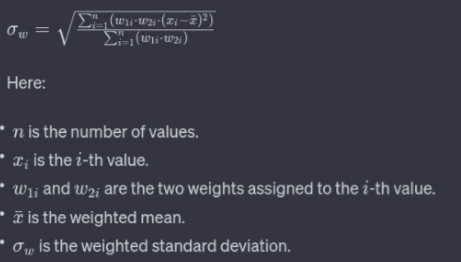

First we have weighted mean of each category so we will just use that and we know the weights and we need to add that square term

In [ ]:
(((setd_dep['setd_Happy_avg_val_non_dep'])*(non_dep_tot4)*(6)) + ((setc_dep['setc_Happy_avg_val_non_dep'])*(non_dep_tot3)*(7)) + ((setb_dep['setb_Happy_avg_val_non_dep'])*(non_dep_tot2)*(6)) + ((seta_dep['seta_Happy_avg_val_non_dep'])*(non_dep_tot1)*(6)))/((non_dep_tot4*6)+(non_dep_tot3*7)+(non_dep_tot2*6)+(non_dep_tot1*6))

3.7261904761904763

In [ ]:
category = ['val', 'arous']
all_dep_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_dep_values = []
        mod_dep_values = []
        mild_dep_values = []
        non_dep_values = []

        for col in dfs[i]:
            for k in range(len(dfs[i]['total_phq_score'])):
                if dfs[i]['total_phq_score'][k] > 14:
                    if j in dfs[i][col].name:
                        sev_dep_values.append(dfs[i][col][k])
                elif dfs[i]['total_phq_score'][k] > 9:
                    if j in dfs[i][col].name:
                        mod_dep_values.append(dfs[i][col][k])
                elif dfs[i]['total_phq_score'][k] > 4:
                    if j in dfs[i][col].name:
                        mild_dep_values.append(dfs[i][col][k])
                else:
                    if j in dfs[i][col].name:
                        non_dep_values.append(dfs[i][col][k])


        for col in dfs2[i]:
            for k in range(len(dfs2[i]['total_phq_score'])):
                if dfs2[i]['total_phq_score'][k] > 14:
                    if j in dfs2[i][col].name:
                        sev_dep_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_phq_score'][k] > 9:
                    if j in dfs2[i][col].name:
                        mod_dep_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_phq_score'][k] > 4:
                    if j in dfs2[i][col].name:
                        mild_dep_values.append(dfs2[i][col][k])
                else:
                    if j in dfs2[i][col].name:
                        non_dep_values.append(dfs2[i][col][k])


        for col in dfs3[i]:
            for k in range(len(dfs3[i]['total_phq_score'])):
                if dfs3[i]['total_phq_score'][k] > 14:
                    if j in dfs3[i][col].name:
                        sev_dep_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_phq_score'][k] > 9:
                    if j in dfs3[i][col].name:
                        mod_dep_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_phq_score'][k] > 4:
                    if j in dfs3[i][col].name:
                        mild_dep_values.append(dfs3[i][col][k])
                else:
                    if j in dfs3[i][col].name:
                        non_dep_values.append(dfs3[i][col][k])

        for col in dfs4[i]:
            for k in range(len(dfs4[i]['total_phq_score'])):
                if dfs4[i]['total_phq_score'][k] > 14:
                    if j in dfs4[i][col].name:
                        sev_dep_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_phq_score'][k] > 9:
                    if j in dfs4[i][col].name:
                        mod_dep_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_phq_score'][k] > 4:
                    if j in dfs4[i][col].name:
                        mild_dep_values.append(dfs4[i][col][k])
                else:
                    if j in dfs4[i][col].name:
                        non_dep_values.append(dfs4[i][col][k])


        all_dep_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_sev_dep'] = np.std(sev_dep_values) if sev_dep_values else 0
        all_dep_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_mod_dep'] = np.std(mod_dep_values) if mod_dep_values else 0
        all_dep_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_mild_dep'] = np.std(mild_dep_values) if mild_dep_values else 0
        all_dep_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_non_dep'] = np.std(non_dep_values) if non_dep_values else 0

In [ ]:
all_dep_std_dev

{'all_sets_Happy_std_dev_val_sev_dep': 0.8476990916592986,
 'all_sets_Happy_std_dev_val_mod_dep': 0.9907359332216731,
 'all_sets_Happy_std_dev_val_mild_dep': 0.9224091640666859,
 'all_sets_Happy_std_dev_val_non_dep': 0.814324003555366,
 'all_sets_Happy_std_dev_arous_sev_dep': 1.1585955938117494,
 'all_sets_Happy_std_dev_arous_mod_dep': 1.1348627352376688,
 'all_sets_Happy_std_dev_arous_mild_dep': 1.1243038830385812,
 'all_sets_Happy_std_dev_arous_non_dep': 0.9948670702804191,
 'all_sets_Sad_std_dev_val_sev_dep': 1.0314369666274283,
 'all_sets_Sad_std_dev_val_mod_dep': 0.6869347033700521,
 'all_sets_Sad_std_dev_val_mild_dep': 1.0009119928936052,
 'all_sets_Sad_std_dev_val_non_dep': 1.0485767737298137,
 'all_sets_Sad_std_dev_arous_sev_dep': 0.973509827344016,
 'all_sets_Sad_std_dev_arous_mod_dep': 0.9967176736760203,
 'all_sets_Sad_std_dev_arous_mild_dep': 1.04836044354291,
 'all_sets_Sad_std_dev_arous_non_dep': 1.0305468311666823,
 'all_sets_Angry_std_dev_val_sev_dep': 1.127570762264762

In [ ]:
category = ['val', 'arous']
all_anx_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_anx_values = []
        mod_anx_values = []
        mild_anx_values = []
        non_anx_values = []

        for col in dfs[i]:
            for k in range(len(dfs[i]['total_gad_score'])):
                if dfs[i]['total_gad_score'][k] > 14:
                    if j in dfs[i][col].name:
                        sev_anx_values.append(dfs[i][col][k])
                elif dfs[i]['total_gad_score'][k] > 9:
                    if j in dfs[i][col].name:
                        mod_anx_values.append(dfs[i][col][k])
                elif dfs[i]['total_gad_score'][k] > 4:
                    if j in dfs[i][col].name:
                        mild_anx_values.append(dfs[i][col][k])
                else:
                    if j in dfs[i][col].name:
                        non_anx_values.append(dfs[i][col][k])


        for col in dfs2[i]:
            for k in range(len(dfs2[i]['total_gad_score'])):
                if dfs2[i]['total_gad_score'][k] > 14:
                    if j in dfs2[i][col].name:
                        sev_anx_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_gad_score'][k] > 9:
                    if j in dfs2[i][col].name:
                        mod_anx_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_gad_score'][k] > 4:
                    if j in dfs2[i][col].name:
                        mild_anx_values.append(dfs2[i][col][k])
                else:
                    if j in dfs2[i][col].name:
                        non_anx_values.append(dfs2[i][col][k])


        for col in dfs3[i]:
            for k in range(len(dfs3[i]['total_gad_score'])):
                if dfs3[i]['total_gad_score'][k] > 14:
                    if j in dfs3[i][col].name:
                        sev_anx_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_gad_score'][k] > 9:
                    if j in dfs3[i][col].name:
                        mod_anx_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_gad_score'][k] > 4:
                    if j in dfs3[i][col].name:
                        mild_anx_values.append(dfs3[i][col][k])
                else:
                    if j in dfs3[i][col].name:
                        non_anx_values.append(dfs3[i][col][k])

        for col in dfs4[i]:
            for k in range(len(dfs4[i]['total_gad_score'])):
                if dfs4[i]['total_gad_score'][k] > 14:
                    if j in dfs4[i][col].name:
                        sev_anx_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_gad_score'][k] > 9:
                    if j in dfs4[i][col].name:
                        mod_anx_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_gad_score'][k] > 4:
                    if j in dfs4[i][col].name:
                        mild_anx_values.append(dfs4[i][col][k])
                else:
                    if j in dfs4[i][col].name:
                        non_anx_values.append(dfs4[i][col][k])


        all_anx_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_sev_anx'] = np.std(sev_anx_values) if sev_anx_values else 0
        all_anx_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_mod_anx'] = np.std(mod_anx_values) if mod_anx_values else 0
        all_anx_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_mild_anx'] = np.std(mild_anx_values) if mild_anx_values else 0
        all_anx_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_non_anx'] = np.std(non_anx_values) if non_anx_values else 0

In [ ]:
category = ['val', 'arous']
all_stress_std_dev= {}

for i in range(len(emotions)):
    for j in category:

        sev_stress_values = []
        mod_stress_values = []
        mild_stress_values = []

        for col in dfs[i]:
            for k in range(len(dfs[i]['total_pss_score'])):
                if dfs[i]['total_pss_score'][k] > 10:
                    if j in dfs[i][col].name:
                        sev_stress_values.append(dfs[i][col][k])
                elif dfs[i]['total_pss_score'][k] > 5:
                    if j in dfs[i][col].name:
                        mod_stress_values.append(dfs[i][col][k])
                else:
                    if j in dfs[i][col].name:
                        mild_stress_values.append(dfs[i][col][k])



        for col in dfs2[i]:
            for k in range(len(dfs2[i]['total_pss_score'])):
                if dfs2[i]['total_pss_score'][k] > 10:
                    if j in dfs2[i][col].name:
                        sev_stress_values.append(dfs2[i][col][k])
                elif dfs2[i]['total_pss_score'][k] > 5:
                    if j in dfs2[i][col].name:
                        mod_stress_values.append(dfs2[i][col][k])
                else:
                    if j in dfs2[i][col].name:
                        mild_stress_values.append(dfs2[i][col][k])


        for col in dfs3[i]:
            for k in range(len(dfs3[i]['total_pss_score'])):
                if dfs3[i]['total_pss_score'][k] > 10:
                    if j in dfs3[i][col].name:
                        sev_stress_values.append(dfs3[i][col][k])
                elif dfs3[i]['total_pss_score'][k] > 5:
                    if j in dfs3[i][col].name:
                        mod_stress_values.append(dfs3[i][col][k])
                else:
                    if j in dfs3[i][col].name:
                        mild_stress_values.append(dfs3[i][col][k])

        for col in dfs4[i]:
            for k in range(len(dfs4[i]['total_pss_score'])):
                if dfs4[i]['total_pss_score'][k] > 10:
                    if j in dfs4[i][col].name:
                        sev_stress_values.append(dfs4[i][col][k])
                elif dfs4[i]['total_pss_score'][k] > 5:
                    if j in dfs4[i][col].name:
                        mod_stress_values.append(dfs4[i][col][k])
                else:
                    if j in dfs4[i][col].name:
                        mild_stress_values.append(dfs4[i][col][k])


        all_stress_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_sev_stress'] = np.std(sev_stress_values) if sev_stress_values else 0
        all_stress_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_mod_stress'] = np.std(mod_stress_values) if mod_stress_values else 0
        all_stress_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_mild_stress'] = np.std(mild_stress_values) if mild_stress_values else 0


In [ ]:
category = ['val', 'arous']
all_comorbid_std_dev= {}

for i in range(len(emotions)):
  for j in category:

    one_issue_avg = []
    no_issue_avg = []
    both_issue_avg = []

    one_issue_tot = 0
    no_issue_tot = 0
    both_issue_tot = 0

    for col in dfs[i]:
      for k in range(len(dfs[i]['total_phq_score'])):
        if dfs[i]['total_phq_score'][k] >= 5 and dfs[i]['total_gad_score'][k] >= 5:
          if j in dfs[i][col].name:
            both_issue_tot +=1
            both_issue_avg.append(dfs[i][col][k])

        elif dfs[i]['total_phq_score'][k] >= 5 or dfs[i]['total_gad_score'][k] >= 5:
          if j in dfs[i][col].name:
            one_issue_tot +=1
            one_issue_avg.append(dfs[i][col][k])

        elif dfs[i]['total_phq_score'][k] <= 4 and dfs[i]['total_gad_score'][k] <=4:
          if j in dfs[i][col].name:
            no_issue_tot +=1
            no_issue_avg.append(dfs[i][col][k])


    for col in dfs2[i]:
      for k in range(len(dfs2[i]['total_phq_score'])):
        if dfs2[i]['total_phq_score'][k] >= 5 and dfs2[i]['total_gad_score'][k] >= 5:
          if j in dfs2[i][col].name:
            both_issue_tot +=1
            both_issue_avg.append(dfs2[i][col][k])

        elif dfs2[i]['total_phq_score'][k] >= 5 or dfs2[i]['total_gad_score'][k] >= 5:
          if j in dfs2[i][col].name:
            one_issue_tot +=1
            one_issue_avg.append(dfs2[i][col][k])

        elif dfs2[i]['total_phq_score'][k] <= 4 and dfs2[i]['total_gad_score'][k] <=4:
          if j in dfs2[i][col].name:
            no_issue_tot +=1
            no_issue_avg.append(dfs2[i][col][k])


    for col in dfs3[i]:
      for k in range(len(dfs3[i]['total_phq_score'])):
        if dfs3[i]['total_phq_score'][k] >= 5 and dfs3[i]['total_gad_score'][k] >= 5:
          if j in dfs3[i][col].name:
            both_issue_tot +=1
            both_issue_avg.append(dfs3[i][col][k])

        elif dfs3[i]['total_phq_score'][k] >= 5 or dfs3[i]['total_gad_score'][k] >= 5:
          if j in dfs3[i][col].name:
            one_issue_tot +=1
            one_issue_avg.append(dfs3[i][col][k])

        elif dfs3[i]['total_phq_score'][k] <= 4 and dfs3[i]['total_gad_score'][k] <=4:
          if j in dfs3[i][col].name:
            no_issue_tot +=1
            no_issue_avg.append(dfs3[i][col][k])

    for col in dfs4[i]:
      for k in range(len(dfs4[i]['total_phq_score'])):
        if dfs4[i]['total_phq_score'][k] >= 5 and dfs4[i]['total_gad_score'][k] >= 5:
          if j in dfs4[i][col].name:
            both_issue_tot +=1
            both_issue_avg.append(dfs4[i][col][k])

        elif dfs4[i]['total_phq_score'][k] >= 5 or dfs4[i]['total_gad_score'][k] >= 5:
          if j in dfs4[i][col].name:
            one_issue_tot +=1
            one_issue_avg.append(dfs4[i][col][k])

        elif dfs4[i]['total_phq_score'][k] <= 4 and dfs4[i]['total_gad_score'][k] <=4:
          if j in dfs4[i][col].name:
            no_issue_tot +=1
            no_issue_avg.append(dfs4[i][col][k])


        all_comorbid_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_both_issue'] = np.std(both_issue_avg) if both_issue_avg else 0
        all_comorbid_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_one_issue'] = np.std(one_issue_avg) if one_issue_avg else 0
        all_comorbid_std_dev[f'all_sets_{emotions[i]}_std_dev_{j}_no_issue'] = np.std(no_issue_avg) if no_issue_avg else 0

In [ ]:
myTable = PrettyTable(['Emotion', 'No PD : %s'% str(no_issue_tot1+no_issue_tot2+no_issue_tot3+no_issue_tot4) , 'One PD : %s' % str(one_issue_tot1+one_issue_tot2+one_issue_tot3+one_issue_tot4), 'Both PD : %s' % str(both_issue_tot1+both_issue_tot2+both_issue_tot3+both_issue_tot4)])
myTable.title = 'Arousal ~ Standard Deviation ~ Psychological Distress ~ All Sets [N = 97]'

myTable.add_row(["Happy",
                 round(all_comorbid_std_dev['all_sets_Happy_std_dev_arous_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Happy_std_dev_arous_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Happy_std_dev_arous_both_issue'],2)
                 ])
myTable.add_row(["Sad",
                 round(all_comorbid_std_dev['all_sets_Sad_std_dev_arous_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Sad_std_dev_arous_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Sad_std_dev_arous_both_issue'],2)
                 ])
myTable.add_row(["Angry",
                 round(all_comorbid_std_dev['all_sets_Angry_std_dev_arous_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Angry_std_dev_arous_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Angry_std_dev_arous_both_issue'],2)
                 ])
myTable.add_row(["Neutral",
                 round(all_comorbid_std_dev['all_sets_Neutral_std_dev_arous_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Neutral_std_dev_arous_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Neutral_std_dev_arous_both_issue'],2)
                 ])
print('Arousal ~ Standard Deviation ~ Psychological Distress ~ All Sets [N=97]')
print(myTable)

Arousal ~ Standard Deviation ~ Psychological Distress ~ All Sets [N=97]
+---------------------------------------------------------------------------+
| Arousal ~ Standard Deviation ~ Psychological Distress ~ All Sets [N = 97] |
+-------------+------------------+-------------------+----------------------+
|   Emotion   |    No PD : 23    |    One PD : 29    |     Both PD : 45     |
+-------------+------------------+-------------------+----------------------+
|    Happy    |       1.01       |        1.11       |         1.11         |
|     Sad     |       1.05       |        0.97       |         1.05         |
|    Angry    |       1.01       |        1.17       |         1.13         |
|   Neutral   |       0.92       |        1.04       |         0.96         |
+-------------+------------------+-------------------+----------------------+


In [ ]:
myTable = PrettyTable(['Emotion', 'No PD : %s'% str(no_issue_tot1+no_issue_tot2+no_issue_tot3+no_issue_tot4) , 'One PD : %s' % str(one_issue_tot1+one_issue_tot2+one_issue_tot3+one_issue_tot4), 'Both PD : %s' % str(both_issue_tot1+both_issue_tot2+both_issue_tot3+both_issue_tot4)])
myTable.title = 'Valence ~ Standard Deviation ~ Psychological Distress ~ All Sets [N = 97]'

myTable.add_row(["Happy",
                 round(all_comorbid_std_dev['all_sets_Happy_std_dev_val_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Happy_std_dev_val_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Happy_std_dev_val_both_issue'],2)
                 ])
myTable.add_row(["Sad",
                 round(all_comorbid_std_dev['all_sets_Sad_std_dev_val_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Sad_std_dev_val_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Sad_std_dev_val_both_issue'],2)
                 ])
myTable.add_row(["Angry",
                 round(all_comorbid_std_dev['all_sets_Angry_std_dev_val_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Angry_std_dev_val_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Angry_std_dev_val_both_issue'],2)
                 ])
myTable.add_row(["Neutral",
                 round(all_comorbid_std_dev['all_sets_Neutral_std_dev_val_no_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Neutral_std_dev_val_one_issue'],2),
                 round(all_comorbid_std_dev['all_sets_Neutral_std_dev_val_both_issue'],2)
                 ])
print('Valence ~ Standard Deviation ~ Psychological Distress ~ All Sets [N=97]')
print(myTable)

Valence ~ Standard Deviation ~ Psychological Distress ~ All Sets [N=97]
+---------------------------------------------------------------------------+
| Valence ~ Standard Deviation ~ Psychological Distress ~ All Sets [N = 97] |
+-------------+------------------+-------------------+----------------------+
|   Emotion   |    No PD : 23    |    One PD : 29    |     Both PD : 45     |
+-------------+------------------+-------------------+----------------------+
|    Happy    |       0.81       |        0.85       |         0.96         |
|     Sad     |       1.03       |        0.98       |         0.96         |
|    Angry    |       1.06       |        1.07       |         1.13         |
|   Neutral   |       0.81       |        0.94       |         0.96         |
+-------------+------------------+-------------------+----------------------+


In [ ]:
myTable = PrettyTable(['Emotion', 'Mild-Stress : %s'% str(mild_stress_tot1+mild_stress_tot2+mild_stress_tot4+mild_stress_tot3) , 'Moderate-Stress : %s' % str(mod_stress_tot1+mod_stress_tot2+mod_stress_tot4+mod_stress_tot3), 'Severe-Stress : %s' % str(sev_stress_tot1+sev_stress_tot2+sev_stress_tot4+sev_stress_tot3)])
myTable.title = 'Arousal ~ Standard Deviation ~ All Sets [N = 97]'

myTable.add_row(["Happy",
                 round(all_stress_std_dev['all_sets_Happy_std_dev_arous_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Happy_std_dev_arous_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Happy_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(all_stress_std_dev['all_sets_Sad_std_dev_arous_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Sad_std_dev_arous_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Sad_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(all_stress_std_dev['all_sets_Angry_std_dev_arous_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Angry_std_dev_arous_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Angry_std_dev_arous_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(all_stress_std_dev['all_sets_Neutral_std_dev_arous_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Neutral_std_dev_arous_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Neutral_std_dev_arous_sev_stress'],2)
                 ])
print('Arousal ~ Standard Deviation ~ All Sets [N=97]')
print(myTable)

Arousal ~ Standard Deviation ~ All Sets [N=97]
+-----------------------------------------------------------------------+
|            Arousal ~ Standard Deviation ~ All Sets [N = 97]           |
+---------+------------------+----------------------+-------------------+
| Emotion | Mild-Stress : 42 | Moderate-Stress : 47 | Severe-Stress : 8 |
+---------+------------------+----------------------+-------------------+
|  Happy  |       1.07       |         1.1          |        1.18       |
|   Sad   |       1.0        |         1.06         |        0.87       |
|  Angry  |       1.05       |         1.15         |        1.24       |
| Neutral |       0.99       |         0.95         |        1.03       |
+---------+------------------+----------------------+-------------------+


In [ ]:
myTable = PrettyTable(['Emotion', 'Mild-Stress : %s'% str(mild_stress_tot1+mild_stress_tot2+mild_stress_tot4+mild_stress_tot3) , 'Moderate-Stress : %s' % str(mod_stress_tot1+mod_stress_tot2+mod_stress_tot4+mod_stress_tot3), 'Severe-Stress : %s' % str(sev_stress_tot1+sev_stress_tot2+sev_stress_tot4+sev_stress_tot3)])
myTable.title = 'Valence ~ Standard Deviation ~ All Sets [N = 97]'

myTable.add_row(["Happy",
                 round(all_stress_std_dev['all_sets_Happy_std_dev_val_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Happy_std_dev_val_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Happy_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Sad",
                 round(all_stress_std_dev['all_sets_Sad_std_dev_val_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Sad_std_dev_val_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Sad_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Angry",
                 round(all_stress_std_dev['all_sets_Angry_std_dev_val_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Angry_std_dev_val_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Angry_std_dev_val_sev_stress'],2)
                 ])
myTable.add_row(["Neutral",
                 round(all_stress_std_dev['all_sets_Neutral_std_dev_val_mild_stress'],2),
                 round(all_stress_std_dev['all_sets_Neutral_std_dev_val_mod_stress'],2),
                 round(all_stress_std_dev['all_sets_Neutral_std_dev_val_sev_stress'],2)
                 ])
print('Valence ~ Standard Deviation ~ All Sets [N=97]')
print(myTable)

Valence ~ Standard Deviation ~ All Sets [N=97]
+-----------------------------------------------------------------------+
|            Valence ~ Standard Deviation ~ All Sets [N = 97]           |
+---------+------------------+----------------------+-------------------+
| Emotion | Mild-Stress : 42 | Moderate-Stress : 47 | Severe-Stress : 8 |
+---------+------------------+----------------------+-------------------+
|  Happy  |       0.92       |         0.89         |        0.73       |
|   Sad   |       0.96       |         1.02         |        0.89       |
|  Angry  |       1.09       |         1.1          |        1.06       |
| Neutral |       0.98       |         0.86         |        0.95       |
+---------+------------------+----------------------+-------------------+


In [ ]:
myTable = PrettyTable(['Emotion', 'Non-Anxious : %s' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious : %s'% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious : %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious : %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)])
myTable.title = 'Arousal ~ Standard Deviation ~ All Sets [N = 97]'
# Add rows
# print(all_anx_std_dev.keys())
myTable.add_row(["Happy", round(all_anx_std_dev['all_sets_Happy_std_dev_arous_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Happy_std_dev_arous_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Happy_std_dev_arous_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Happy_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(all_anx_std_dev['all_sets_Sad_std_dev_arous_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Sad_std_dev_arous_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Sad_std_dev_arous_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Sad_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(all_anx_std_dev['all_sets_Angry_std_dev_arous_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Angry_std_dev_arous_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Angry_std_dev_arous_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Angry_std_dev_arous_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(all_anx_std_dev['all_sets_Neutral_std_dev_arous_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Neutral_std_dev_arous_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Neutral_std_dev_arous_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Neutral_std_dev_arous_sev_anx'],2)
                 ])
print('Arousal ~ Standard Deviation ~ All Sets [N=97]')
print(myTable)

Arousal ~ Standard Deviation ~ All Sets [N=97]
+-------------------------------------------------------------------------------------------------+
|                         Arousal ~ Standard Deviation ~ All Sets [N = 97]                        |
+---------+------------------+-------------------+-------------------------+----------------------+
| Emotion | Non-Anxious : 48 | Mild-Anxious : 29 | Moderately-anxious : 15 | Severely anxious : 5 |
+---------+------------------+-------------------+-------------------------+----------------------+
|  Happy  |       1.08       |        1.14       |           0.96          |         1.13         |
|   Sad   |       1.01       |        1.05       |           0.98          |         0.88         |
|  Angry  |       1.13       |        1.09       |           1.15          |         1.03         |
| Neutral |       0.99       |        0.96       |           0.9           |         1.03         |
+---------+------------------+-------------------+---

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-Anxious : %s' % str(non_anx_tot1+non_anx_tot2+non_anx_tot4+non_anx_tot3), 'Mild-Anxious : %s'% str(mild_anx_tot1+mild_anx_tot2+mild_anx_tot4+mild_anx_tot3) , 'Moderately-anxious : %s' % str(mod_anx_tot1+mod_anx_tot2+mod_anx_tot4+mod_anx_tot3), 'Severely anxious : %s' % str(sev_anx_tot1+sev_anx_tot2+sev_anx_tot4+sev_anx_tot3)])
myTable.title = 'Valence ~ Standard Deviation ~ All Sets [N = 97]'
# Add rows
# print(all_anx_std_dev.keys())
myTable.add_row(["Happy", round(all_anx_std_dev['all_sets_Happy_std_dev_val_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Happy_std_dev_val_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Happy_std_dev_val_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Happy_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Sad", round(all_anx_std_dev['all_sets_Sad_std_dev_val_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Sad_std_dev_val_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Sad_std_dev_val_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Sad_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Angry", round(all_anx_std_dev['all_sets_Angry_std_dev_val_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Angry_std_dev_val_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Angry_std_dev_val_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Angry_std_dev_val_sev_anx'],2)
                 ])
myTable.add_row(["Neutral", round(all_anx_std_dev['all_sets_Neutral_std_dev_val_non_anx'],2),
                 round(all_anx_std_dev['all_sets_Neutral_std_dev_val_mild_anx'],2),
                 round(all_anx_std_dev['all_sets_Neutral_std_dev_val_mod_anx'],2),
                 round(all_anx_std_dev['all_sets_Neutral_std_dev_val_sev_anx'],2)
                 ])
print('Valence ~ Standard Deviation ~ All Sets [N=97]')
print(myTable)

Valence ~ Standard Deviation ~ All Sets [N=97]
+-------------------------------------------------------------------------------------------------+
|                         Valence ~ Standard Deviation ~ All Sets [N = 97]                        |
+---------+------------------+-------------------+-------------------------+----------------------+
| Emotion | Non-Anxious : 48 | Mild-Anxious : 29 | Moderately-anxious : 15 | Severely anxious : 5 |
+---------+------------------+-------------------+-------------------------+----------------------+
|  Happy  |       0.83       |        0.96       |           0.95          |         0.92         |
|   Sad   |       0.99       |        1.01       |           0.94          |         0.86         |
|  Angry  |       1.06       |        1.13       |           1.15          |         1.0          |
| Neutral |       0.89       |        0.94       |           0.9           |         0.79         |
+---------+------------------+-------------------+---

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-depressed : %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-depressed : %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-depressed : %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely depressed : %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)])
myTable.title = 'Valence ~ Standard Deviation ~ All Sets [N = 97]'
# Add rows
# print(all_dep_std_dev.keys())
myTable.add_row(["Happy", round(all_dep_std_dev['all_sets_Happy_std_dev_val_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Happy_std_dev_val_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Happy_std_dev_val_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Happy_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(all_dep_std_dev['all_sets_Sad_std_dev_val_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Sad_std_dev_val_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Sad_std_dev_val_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Sad_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(all_dep_std_dev['all_sets_Angry_std_dev_val_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Angry_std_dev_val_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Angry_std_dev_val_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Angry_std_dev_val_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(all_dep_std_dev['all_sets_Neutral_std_dev_val_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Neutral_std_dev_val_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Neutral_std_dev_val_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Neutral_std_dev_val_sev_dep'],2)
                 ])
print('Valence ~ Standard Deviation ~ All Sets [N=97]')
print(myTable)

Valence ~ Standard Deviation ~ All Sets [N=97]
+----------------------------------------------------------------------------------------------------------+
|                             Valence ~ Standard Deviation ~ All Sets [N = 97]                             |
+---------+--------------------+---------------------+---------------------------+-------------------------+
| Emotion | Non-depressed : 27 | Mild-depressed : 44 | Moderately-depressed : 13 | Severely depressed : 13 |
+---------+--------------------+---------------------+---------------------------+-------------------------+
|  Happy  |        0.81        |         0.92        |            0.99           |           0.85          |
|   Sad   |        1.05        |         1.0         |            0.69           |           1.03          |
|  Angry  |        1.06        |         1.11        |            1.08           |           1.13          |
| Neutral |        0.83        |         0.94        |            0.9            

In [ ]:
myTable = PrettyTable(['Emotion', 'Non-depressed : %s' % str(non_dep_tot1+non_dep_tot2+non_dep_tot4+non_dep_tot3), 'Mild-depressed : %s'% str(mild_dep_tot1+mild_dep_tot2+mild_dep_tot4+mild_dep_tot3) , 'Moderately-depressed : %s' % str(mod_dep_tot1+mod_dep_tot2+mod_dep_tot4+mod_dep_tot3), 'Severely depressed : %s' % str(sev_dep_tot1+sev_dep_tot2+sev_dep_tot4+sev_dep_tot3)])
myTable.title = 'Arousal ~ Standard Deviation ~ All Sets [N = 97]'
# Add rows
# print(all_dep_std_dev.keys())
myTable.add_row(["Happy", round(all_dep_std_dev['all_sets_Happy_std_dev_arous_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Happy_std_dev_arous_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Happy_std_dev_arous_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Happy_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Sad", round(all_dep_std_dev['all_sets_Sad_std_dev_arous_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Sad_std_dev_arous_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Sad_std_dev_arous_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Sad_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Angry", round(all_dep_std_dev['all_sets_Angry_std_dev_arous_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Angry_std_dev_arous_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Angry_std_dev_arous_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Angry_std_dev_arous_sev_dep'],2)
                 ])
myTable.add_row(["Neutral", round(all_dep_std_dev['all_sets_Neutral_std_dev_arous_non_dep'],2),
                 round(all_dep_std_dev['all_sets_Neutral_std_dev_arous_mild_dep'],2),
                 round(all_dep_std_dev['all_sets_Neutral_std_dev_arous_mod_dep'],2),
                 round(all_dep_std_dev['all_sets_Neutral_std_dev_arous_sev_dep'],2)
                 ])
print('Arousal ~ Standard Deviation ~ All Sets [N=97]')
print(myTable)

Arousal ~ Standard Deviation ~ All Sets [N=97]
+----------------------------------------------------------------------------------------------------------+
|                             Arousal ~ Standard Deviation ~ All Sets [N = 97]                             |
+---------+--------------------+---------------------+---------------------------+-------------------------+
| Emotion | Non-depressed : 27 | Mild-depressed : 44 | Moderately-depressed : 13 | Severely depressed : 13 |
+---------+--------------------+---------------------+---------------------------+-------------------------+
|  Happy  |        0.99        |         1.12        |            1.13           |           1.16          |
|   Sad   |        1.03        |         1.05        |            1.0            |           0.97          |
|  Angry  |        0.97        |         1.2         |            1.08           |           1.09          |
| Neutral |        0.92        |         1.05        |            0.77           

# Correlation matrix

Here I am going to find Pearson's correlation between Dataset values and mean of responses for each file

For participant's responses I will create a list where I will append average of each stimuli. For compouting avaerage of each stimuli I will first compute this stimuli set wise and just keep appending them.

In [ ]:
# calculate per file avg for both val and arousal
# this is the list of responses averages per file
val_avg_efile_r = []
arous_avg_efile_r = []

val_avg_efile = []
arous_avg_efile = []

In [ ]:
val_avg_efile_happy = [4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,3,4,4,4,4,4,4,4,5,4]
val_avg_efile_sad = [2,3,2,2,2,2,2,3,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2]
val_avg_efile_angry = [4,1,2,3,1,1,1,2,4,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1]
val_avg_efile_neutral = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,4,3]
val_avg_efile = [4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,3,4,4,4,4,4,4,4,5,4,2,3,2,2,2,2,2,3,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,4,1,2,3,1,1,1,2,4,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,4,3]

arous_avg_efile_happy = [3,3,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3,4,3,3,3,3,2]
arous_avg_efile_sad = [1,3,1,3,2,1,1,2,1,2,2,1,1,2,2,2,1,3,3,3,1,3,2,2,3]
arous_avg_efile_angry = [4,4,3,3,3,4,5,4,3,3,5,3,5,4,5,4,5,3,4,5,4,3,5,5,5]
arous_avg_efile_neutral = [2,2,2,2,2,2,2,2,2,2,4,2,3,3,3,2,3,2,2,3,3,2,2,3,2]
arous_avg_efile = [3,3,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3,4,3,3,3,3,2,1,3,1,3,2,1,1,2,1,2,2,1,1,2,2,2,1,3,3,3,1,3,2,2,3,4,4,3,3,3,4,5,4,3,3,5,3,5,4,5,4,5,3,4,5,4,3,5,5,5,2,2,2,2,2,2,2,2,2,2,4,2,3,3,3,2,3,2,2,3,3,2,2,3,2]

In [ ]:
len(arous_avg_efile)

100

In our list we have values arranged in emotionwise fashion for avg and correlation

## Valence (per file list)

In [ ]:
val_happy_pf = []
val_sad_pf = []
val_ang_pf = []
val_neu_pf = []

In [ ]:
arous_happy_pf = []
arous_sad_pf = []
arous_ang_pf = []
arous_neu_pf = []

In [ ]:
val_med_efile_r = []
val_std_dev_efile_r = []

In [ ]:
arous_med_efile_r = []
arous_std_dev_efile_r = []

### Happy Valence for all files of all sets

In [ ]:
val_avg = 0
val_med = 0

# Set A (Happy appending Valence)
seta_happy_ques = [2,5,9,13,16,23]

for question in seta_happy_ques:
  for participant in range(23):
    val_happy_pf.append(dfs[0][f'q{question}_val_seta'][participant])
    val_avg+=dfs[0][f'q{question}_val_seta'][participant]
  val_avg = val_avg/23
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_happy_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_happy_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set B (Happy appending Valence)
setb_happy_ques = [6,8,10,12,14,20]

for question in setb_happy_ques:
  for participant in range(26):
    val_happy_pf.append(dfs2[0][f'q{question}_val_setb'][participant])
    val_avg+=dfs2[0][f'q{question}_val_setb'][participant]
  val_avg = val_avg/26
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_happy_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_happy_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set C (Happy appending Valence)
setc_happy_ques = [2,4,6,9,11,19,22]

for question in setc_happy_ques:
  for participant in range(24):
    val_happy_pf.append(dfs3[0][f'q{question}_val_setc'][participant])
    val_avg+=dfs3[0][f'q{question}_val_setc'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_happy_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_happy_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set D (Happy appending Valence)
setd_happy_ques = [3,6,14,16,20,23]

for question in setd_happy_ques:
  for participant in range(24):
    val_happy_pf.append(dfs4[0][f'q{question}_val_setd'][participant])
    val_avg+=dfs4[0][f'q{question}_val_setd'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_happy_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_happy_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
print(len(val_avg_efile_r))
print(val_avg_efile_r)
print(len(val_med_efile_r))
print(val_med_efile_r)
print(len(val_std_dev_efile_r))
print(val_std_dev_efile_r)

25
[3.96, 3.65, 3.78, 4.26, 4.13, 4.17, 4.23, 3.85, 4.04, 3.65, 4.35, 4.31, 3.42, 3.71, 3.25, 3.83, 3.54, 3.38, 4.04, 2.54, 3.67, 3.5, 4.08, 4.21, 3.58]
25
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0]
25
[0.69, 0.7, 0.93, 0.61, 0.68, 0.64, 0.64, 0.77, 0.65, 0.68, 1.0, 0.61, 0.91, 1.06, 0.83, 0.75, 1.12, 0.86, 0.79, 0.91, 0.55, 1.04, 0.76, 0.71, 0.76]


### Sad Valence for all files of all sets

In [ ]:
val_avg = 0
val_med = 0

# Set A (sad appending Valence)
seta_sad_ques = [1,6,8,10,12,25]

for question in seta_sad_ques:
  for participant in range(23):
    val_sad_pf.append(dfs[1][f'q{question}_val_seta'][participant])
    val_avg+=dfs[1][f'q{question}_val_seta'][participant]
  val_avg = val_avg/23
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_sad_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_sad_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set B (sad appending Valence)
setb_sad_ques = [1,9,13,15,17,22,24]

for question in setb_sad_ques:
  for participant in range(26):
    val_sad_pf.append(dfs2[1][f'q{question}_val_setb'][participant])
    val_avg+=dfs2[1][f'q{question}_val_setb'][participant]
  val_avg = val_avg/26
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_sad_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_sad_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set C (sad appending Valence)
setc_sad_ques = [3,8,12,13,16,21]

for question in setc_sad_ques:
  for participant in range(24):
    val_sad_pf.append(dfs3[1][f'q{question}_val_setc'][participant])
    val_avg+=dfs3[1][f'q{question}_val_setc'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_sad_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_sad_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set D (sad appending Valence)
setd_sad_ques = [2,4,8,11,13,17]

for question in setd_sad_ques:
  for participant in range(24):
    val_sad_pf.append(dfs4[1][f'q{question}_val_setd'][participant])
    val_avg+=dfs4[1][f'q{question}_val_setd'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_sad_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_sad_pf)),2))

  val_avg = 0
  val_sad_pf = []
  val_sad_pf = []
  val_angry_pf = []
  val_neutral_pf = []

In [ ]:
print(len(val_avg_efile_r))
print(val_avg_efile_r)
print(len(val_med_efile_r))
print(val_med_efile_r)
print(len(val_std_dev_efile_r))
print(val_std_dev_efile_r)

50
[3.96, 3.65, 3.78, 4.26, 4.13, 4.17, 4.23, 3.85, 4.04, 3.65, 4.35, 4.31, 3.42, 3.71, 3.25, 3.83, 3.54, 3.38, 4.04, 2.54, 3.67, 3.5, 4.08, 4.21, 3.58, 2.17, 2.39, 2.13, 2.43, 2.52, 2.74, 2.27, 2.23, 2.12, 2.69, 2.96, 2.31, 2.96, 1.5, 1.58, 2.12, 2.21, 2.08, 2.29, 2.75, 3.08, 2.88, 3.33, 3.38, 2.79]
50
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
50
[0.69, 0.7, 0.93, 0.61, 0.68, 0.64, 0.64, 0.77, 0.65, 0.68, 1.0, 0.61, 0.91, 1.06, 0.83, 0.75, 1.12, 0.86, 0.79, 0.91, 0.55, 1.04, 0.76, 0.71, 0.76, 0.64, 0.64, 0.54, 0.58, 0.58, 0.67, 1.06, 0.89, 1.12, 0.91, 0.98, 0.72, 0.85, 0.58, 0.81, 1.09, 1.04, 0.95, 0.89, 0.72, 0.91, 1.27, 0.8, 0.75, 1.22]


### Angry Valence for all files of all sets

In [ ]:
val_avg = 0
val_med = 0

# Set A (ang appending Valence)
seta_ang_ques = [3,11,15,17,19,21]

for question in seta_ang_ques:
  for participant in range(23):
    val_ang_pf.append(dfs[2][f'q{question}_val_seta'][participant])
    val_avg+=dfs[2][f'q{question}_val_seta'][participant]
  val_avg = val_avg/23
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_ang_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_ang_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_ang_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set B (ang appending Valence)
setb_ang_ques = [3,5,7,11,18,23]

for question in setb_ang_ques:
  for participant in range(26):
    val_ang_pf.append(dfs2[2][f'q{question}_val_setb'][participant])
    val_avg+=dfs2[2][f'q{question}_val_setb'][participant]
  val_avg = val_avg/26
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_ang_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_ang_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_ang_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set C (ang appending Valence)
setc_ang_ques = [5,7,15,18,23,25]

for question in setc_ang_ques:
  for participant in range(24):
    val_ang_pf.append(dfs3[2][f'q{question}_val_setc'][participant])
    val_avg+=dfs3[2][f'q{question}_val_setc'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_ang_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_ang_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_ang_pf = []
  val_sad_pf = []
  val_neutral_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set D (ang appending Valence)
setd_ang_ques = [1,7,9,15,19,22,25]

for question in setd_ang_ques:
  for participant in range(24):
    val_ang_pf.append(dfs4[2][f'q{question}_val_setd'][participant])
    val_avg+=dfs4[2][f'q{question}_val_setd'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_ang_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_ang_pf)),2))

  val_avg = 0
  val_ang_pf = []
  val_sad_pf = []
  val_happy_pf = []
  val_neutral_pf = []

In [ ]:
print(len(val_avg_efile_r))
print(val_avg_efile_r)
print(len(val_med_efile_r))
print(val_med_efile_r)
print(len(val_std_dev_efile_r))
print(val_std_dev_efile_r)

75
[3.96, 3.65, 3.78, 4.26, 4.13, 4.17, 4.23, 3.85, 4.04, 3.65, 4.35, 4.31, 3.42, 3.71, 3.25, 3.83, 3.54, 3.38, 4.04, 2.54, 3.67, 3.5, 4.08, 4.21, 3.58, 2.17, 2.39, 2.13, 2.43, 2.52, 2.74, 2.27, 2.23, 2.12, 2.69, 2.96, 2.31, 2.96, 1.5, 1.58, 2.12, 2.21, 2.08, 2.29, 2.75, 3.08, 2.88, 3.33, 3.38, 2.79, 4.09, 2.04, 2.96, 3.22, 2.61, 2.52, 2.12, 1.38, 3.58, 2.23, 1.12, 2.08, 1.83, 1.88, 1.25, 2.62, 1.25, 2.17, 1.88, 2.38, 1.58, 2.42, 1.21, 2.62, 2.12]
75
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0, 1.5, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0]
75
[0.69, 0.7, 0.93, 0.61, 0.68, 0.64, 0.64, 0.77, 0.65, 0.68, 1.0, 0.61, 0.91, 1.06, 0.83, 0.75, 1.12, 0.86, 0.79, 0.91, 0.55, 1.04, 0.76, 0.71, 0.76, 0.64, 0.64, 0.54,

### Neutral Valence for all files of all sets

In [ ]:
val_avg = 0
val_med = 0

# Set A (neu appending Valence)
seta_neu_ques = [4,7,14,18,20,22,24]

for question in seta_neu_ques:
  for participant in range(23):
    val_neu_pf.append(dfs[3][f'q{question}_val_seta'][participant])
    val_avg+=dfs[3][f'q{question}_val_seta'][participant]
  val_avg = val_avg/23
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_neu_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_neu_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_ang_pf = []
  val_neu_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set B (neu appending Valence)
setb_neu_ques = [2,4,16,19,21,25]

for question in setb_neu_ques:
  for participant in range(26):
    val_neu_pf.append(dfs2[3][f'q{question}_val_setb'][participant])
    val_avg+=dfs2[3][f'q{question}_val_setb'][participant]
  val_avg = val_avg/26
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_neu_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_neu_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_sad_pf = []
  val_ang_pf = []
  val_neu_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set C (neu appending Valence)
setc_neu_ques = [1,10,14,17,20,24]

for question in setc_neu_ques:
  for participant in range(24):
    val_neu_pf.append(dfs3[3][f'q{question}_val_setc'][participant])
    val_avg+=dfs3[3][f'q{question}_val_setc'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_neu_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_neu_pf)),2))

  val_avg = 0
  val_happy_pf = []
  val_ang_pf = []
  val_sad_pf = []
  val_neu_pf = []

In [ ]:
val_avg = 0
val_med = 0

# Set D (neu appending Valence)
setd_neu_ques = [5,10,12,18,21,24]

for question in setd_neu_ques:
  for participant in range(24):
    val_neu_pf.append(dfs4[3][f'q{question}_val_setd'][participant])
    val_avg+=dfs4[3][f'q{question}_val_setd'][participant]
  val_avg = val_avg/24
  val_avg_efile_r.append(round(val_avg,2))

  val_med = np.median(val_neu_pf)
  val_med_efile_r.append(val_med)
  val_std_dev_efile_r.append(round((np.std(val_neu_pf)),2))

  val_avg = 0
  val_ang_pf = []
  val_sad_pf = []
  val_happy_pf = []
  val_neutral_pf = []

In [ ]:
print(len(val_avg_efile_r))
print(val_avg_efile_r)
print(len(val_med_efile_r))
print(val_med_efile_r)
print(len(val_std_dev_efile_r))
print(val_std_dev_efile_r)

100
[3.96, 3.65, 3.78, 4.26, 4.13, 4.17, 4.23, 3.85, 4.04, 3.65, 4.35, 4.31, 3.42, 3.71, 3.25, 3.83, 3.54, 3.38, 4.04, 2.54, 3.67, 3.5, 4.08, 4.21, 3.58, 2.17, 2.39, 2.13, 2.43, 2.52, 2.74, 2.27, 2.23, 2.12, 2.69, 2.96, 2.31, 2.96, 1.5, 1.58, 2.12, 2.21, 2.08, 2.29, 2.75, 3.08, 2.88, 3.33, 3.38, 2.79, 4.09, 2.04, 2.96, 3.22, 2.61, 2.52, 2.12, 1.38, 3.58, 2.23, 1.12, 2.08, 1.83, 1.88, 1.25, 2.62, 1.25, 2.17, 1.88, 2.38, 1.58, 2.42, 1.21, 2.62, 2.12, 3.04, 2.35, 2.17, 2.78, 2.74, 2.57, 2.26, 2.77, 2.96, 3.19, 3.19, 2.92, 2.73, 3.21, 3.25, 3.33, 3.08, 3.33, 3.17, 3.58, 3.62, 3.83, 3.62, 3.58, 3.71]
100
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0, 1.5, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.

## Arousal (avg per file list)

### Happy Arousal for all files of all sets

In [ ]:
arous_avg = 0
arous_med = 0

# Set A (Happy appending arousence)
seta_happy_ques = [2,5,9,13,16,23]

for question in seta_happy_ques:
  for participant in range(23):
    arous_happy_pf.append(dfs[0][f'q{question}_arous_seta'][participant])
    arous_avg+=dfs[0][f'q{question}_arous_seta'][participant]
  arous_avg = arous_avg/23
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_happy_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_happy_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set B (Happy appending arousence)
setb_happy_ques = [6,8,10,12,14,20]

for question in setb_happy_ques:
  for participant in range(26):
    arous_happy_pf.append(dfs2[0][f'q{question}_arous_setb'][participant])
    arous_avg+=dfs2[0][f'q{question}_arous_setb'][participant]
  arous_avg = arous_avg/26
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_happy_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_happy_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set C (Happy appending arousence)
setc_happy_ques = [2,4,6,9,11,19,22]

for question in setc_happy_ques:
  for participant in range(24):
    arous_happy_pf.append(dfs3[0][f'q{question}_arous_setc'][participant])
    arous_avg+=dfs3[0][f'q{question}_arous_setc'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_happy_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_happy_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set D (Happy appending arousence)
setd_happy_ques = [3,6,14,16,20,23]

for question in setd_happy_ques:
  for participant in range(24):
    arous_happy_pf.append(dfs4[0][f'q{question}_arous_setd'][participant])
    arous_avg+=dfs4[0][f'q{question}_arous_setd'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_happy_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_happy_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
print(len(arous_avg_efile_r))
print(arous_avg_efile_r)
print(len(arous_med_efile_r))
print(arous_med_efile_r)
print(len(arous_std_dev_efile_r))
print(arous_std_dev_efile_r)

25
[3.65, 3.74, 3.52, 3.96, 4.17, 3.78, 3.15, 2.96, 3.12, 2.54, 4.23, 3.46, 3.21, 3.83, 3.25, 3.17, 3.29, 2.83, 3.62, 2.58, 3.29, 3.58, 4.12, 3.12, 3.25]
25
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.5, 4.0, 4.0, 3.0, 4.0, 3.5, 3.0, 3.5, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.0]
25
[0.81, 1.11, 1.06, 0.75, 0.87, 0.88, 1.1, 1.13, 1.09, 0.89, 1.05, 1.12, 0.82, 0.94, 0.97, 0.99, 1.02, 0.9, 0.99, 1.22, 0.98, 1.22, 0.78, 1.13, 0.92]


### Sad Arousal for all files of all sets

In [ ]:
arous_avg = 0
arous_med = 0

# Set A (sad appending arousence)
seta_sad_ques = [1,6,8,10,12,25]

for question in seta_sad_ques:
  for participant in range(23):
    arous_sad_pf.append(dfs[1][f'q{question}_arous_seta'][participant])
    arous_avg+=dfs[1][f'q{question}_arous_seta'][participant]
  arous_avg = arous_avg/23
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_sad_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_sad_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set B (sad appending arousence)
setb_sad_ques = [1,9,13,15,17,22,24]

for question in setb_sad_ques:
  for participant in range(26):
    arous_sad_pf.append(dfs2[1][f'q{question}_arous_setb'][participant])
    arous_avg+=dfs2[1][f'q{question}_arous_setb'][participant]
  arous_avg = arous_avg/26
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_sad_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_sad_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set C (sad appending arousence)
setc_sad_ques = [3,8,12,13,16,21]

for question in setc_sad_ques:
  for participant in range(24):
    arous_sad_pf.append(dfs3[1][f'q{question}_arous_setc'][participant])
    arous_avg+=dfs3[1][f'q{question}_arous_setc'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_sad_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_sad_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set D (sad appending arousence)
setd_sad_ques = [2,4,8,11,13,17]

for question in setd_sad_ques:
  for participant in range(24):
    arous_sad_pf.append(dfs4[1][f'q{question}_arous_setd'][participant])
    arous_avg+=dfs4[1][f'q{question}_arous_setd'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_sad_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_sad_pf)),2))

  arous_avg = 0
  arous_sad_pf = []
  arous_sad_pf = []
  arous_angry_pf = []
  arous_neutral_pf = []

In [ ]:
print(len(arous_avg_efile_r))
print(arous_avg_efile_r)
print(len(arous_med_efile_r))
print(arous_med_efile_r)
print(len(arous_std_dev_efile_r))
print(arous_std_dev_efile_r)

50
[3.65, 3.74, 3.52, 3.96, 4.17, 3.78, 3.15, 2.96, 3.12, 2.54, 4.23, 3.46, 3.21, 3.83, 3.25, 3.17, 3.29, 2.83, 3.62, 2.58, 3.29, 3.58, 4.12, 3.12, 3.25, 1.7, 1.87, 2.35, 1.96, 2.13, 2.3, 2.12, 2.46, 1.92, 2.0, 2.08, 1.96, 1.69, 2.17, 2.17, 2.0, 3.29, 2.62, 2.75, 2.58, 1.92, 2.33, 1.92, 2.5, 2.33]
50
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.5, 4.0, 4.0, 3.0, 4.0, 3.5, 3.0, 3.5, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.5, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0]
50
[0.81, 1.11, 1.06, 0.75, 0.87, 0.88, 1.1, 1.13, 1.09, 0.89, 1.05, 1.12, 0.82, 0.94, 0.97, 0.99, 1.02, 0.9, 0.99, 1.22, 0.98, 1.22, 0.78, 1.13, 0.92, 0.8, 0.61, 0.76, 0.81, 0.85, 1.0, 1.09, 0.93, 1.11, 1.14, 1.0, 0.98, 0.72, 1.4, 1.14, 1.0, 1.31, 0.99, 1.01, 0.81, 0.81, 0.85, 0.7, 0.91, 0.9]


### Angry Arousal for all files of all sets

In [ ]:
arous_avg = 0
arous_med = 0

# Set A (ang appending arousence)
seta_ang_ques = [3,11,15,17,19,21]

for question in seta_ang_ques:
  for participant in range(23):
    arous_ang_pf.append(dfs[2][f'q{question}_arous_seta'][participant])
    arous_avg+=dfs[2][f'q{question}_arous_seta'][participant]
  arous_avg = arous_avg/23
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_ang_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_ang_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_ang_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set B (ang appending arousence)
setb_ang_ques = [3,5,7,11,18,23]

for question in setb_ang_ques:
  for participant in range(26):
    arous_ang_pf.append(dfs2[2][f'q{question}_arous_setb'][participant])
    arous_avg+=dfs2[2][f'q{question}_arous_setb'][participant]
  arous_avg = arous_avg/26
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_ang_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_ang_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_ang_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set C (ang appending arousence)
setc_ang_ques = [5,7,15,18,23,25]

for question in setc_ang_ques:
  for participant in range(24):
    arous_ang_pf.append(dfs3[2][f'q{question}_arous_setc'][participant])
    arous_avg+=dfs3[2][f'q{question}_arous_setc'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_ang_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_ang_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_ang_pf = []
  arous_sad_pf = []
  arous_neutral_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set D (ang appending arousence)
setd_ang_ques = [1,7,9,15,19,22,25]

for question in setd_ang_ques:
  for participant in range(24):
    arous_ang_pf.append(dfs4[2][f'q{question}_arous_setd'][participant])
    arous_avg+=dfs4[2][f'q{question}_arous_setd'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_ang_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_ang_pf)),2))

  arous_avg = 0
  arous_ang_pf = []
  arous_sad_pf = []
  arous_happy_pf = []
  arous_neutral_pf = []

In [ ]:
print(len(val_avg_efile_r))
print(val_avg_efile_r)
print(len(val_med_efile_r))
print(val_med_efile_r)
print(len(val_std_dev_efile_r))
print(val_std_dev_efile_r)

100
[3.96, 3.65, 3.78, 4.26, 4.13, 4.17, 4.23, 3.85, 4.04, 3.65, 4.35, 4.31, 3.42, 3.71, 3.25, 3.83, 3.54, 3.38, 4.04, 2.54, 3.67, 3.5, 4.08, 4.21, 3.58, 2.17, 2.39, 2.13, 2.43, 2.52, 2.74, 2.27, 2.23, 2.12, 2.69, 2.96, 2.31, 2.96, 1.5, 1.58, 2.12, 2.21, 2.08, 2.29, 2.75, 3.08, 2.88, 3.33, 3.38, 2.79, 4.09, 2.04, 2.96, 3.22, 2.61, 2.52, 2.12, 1.38, 3.58, 2.23, 1.12, 2.08, 1.83, 1.88, 1.25, 2.62, 1.25, 2.17, 1.88, 2.38, 1.58, 2.42, 1.21, 2.62, 2.12, 3.04, 2.35, 2.17, 2.78, 2.74, 2.57, 2.26, 2.77, 2.96, 3.19, 3.19, 2.92, 2.73, 3.21, 3.25, 3.33, 3.08, 3.33, 3.17, 3.58, 3.62, 3.83, 3.62, 3.58, 3.71]
100
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0, 1.5, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.

### Neutral Arousal for all files of all sets

In [ ]:
arous_avg = 0
arous_med = 0

# Set A (neu appending arousence)
seta_neu_ques = [4,7,14,18,20,22,24]

for question in seta_neu_ques:
  for participant in range(23):
    arous_neu_pf.append(dfs[3][f'q{question}_arous_seta'][participant])
    arous_avg+=dfs[3][f'q{question}_arous_seta'][participant]
  arous_avg = arous_avg/23
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_neu_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_neu_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_ang_pf = []
  arous_neu_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set B (neu appending arousence)
setb_neu_ques = [2,4,16,19,21,25]

for question in setb_neu_ques:
  for participant in range(26):
    arous_neu_pf.append(dfs2[3][f'q{question}_arous_setb'][participant])
    arous_avg+=dfs2[3][f'q{question}_arous_setb'][participant]
  arous_avg = arous_avg/26
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_neu_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_neu_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_sad_pf = []
  arous_ang_pf = []
  arous_neu_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set C (neu appending arousence)
setc_neu_ques = [1,10,14,17,20,24]

for question in setc_neu_ques:
  for participant in range(24):
    arous_neu_pf.append(dfs3[3][f'q{question}_arous_setc'][participant])
    arous_avg+=dfs3[3][f'q{question}_arous_setc'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_neu_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_neu_pf)),2))

  arous_avg = 0
  arous_happy_pf = []
  arous_ang_pf = []
  arous_sad_pf = []
  arous_neu_pf = []

In [ ]:
arous_avg = 0
arous_med = 0

# Set D (neu appending arousence)
setd_neu_ques = [5,10,12,18,21,24]

for question in setd_neu_ques:
  for participant in range(24):
    arous_neu_pf.append(dfs4[3][f'q{question}_arous_setd'][participant])
    arous_avg+=dfs4[3][f'q{question}_arous_setd'][participant]
  arous_avg = arous_avg/24
  arous_avg_efile_r.append(round(arous_avg,2))

  arous_med = np.median(arous_neu_pf)
  arous_med_efile_r.append(arous_med)
  arous_std_dev_efile_r.append(round((np.std(arous_neu_pf)),2))

  arous_avg = 0
  arous_ang_pf = []
  arous_sad_pf = []
  arous_happy_pf = []
  arous_neutral_pf = []

In [ ]:
print(len(arous_avg_efile_r))
print(arous_avg_efile_r)
print(len(arous_med_efile_r))
print(arous_med_efile_r)
print(len(arous_std_dev_efile_r))
print(arous_std_dev_efile_r)

100
[3.65, 3.74, 3.52, 3.96, 4.17, 3.78, 3.15, 2.96, 3.12, 2.54, 4.23, 3.46, 3.21, 3.83, 3.25, 3.17, 3.29, 2.83, 3.62, 2.58, 3.29, 3.58, 4.12, 3.12, 3.25, 1.7, 1.87, 2.35, 1.96, 2.13, 2.3, 2.12, 2.46, 1.92, 2.0, 2.08, 1.96, 1.69, 2.17, 2.17, 2.0, 3.29, 2.62, 2.75, 2.58, 1.92, 2.33, 1.92, 2.5, 2.33, 3.7, 3.61, 2.57, 3.09, 2.52, 2.61, 4.27, 3.96, 3.0, 3.38, 4.77, 3.38, 3.88, 3.46, 4.62, 3.71, 4.42, 2.96, 4.0, 3.88, 4.04, 3.96, 4.88, 4.21, 4.21, 2.3, 1.91, 1.87, 2.39, 2.09, 2.17, 1.78, 1.88, 1.88, 2.23, 2.23, 1.77, 2.5, 2.75, 2.38, 2.42, 2.08, 2.0, 2.21, 2.54, 2.38, 2.33, 2.58, 2.54, 2.54]
100
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.5, 4.0, 4.0, 3.0, 4.0, 3.5, 3.0, 3.5, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.5, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.5, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2

## Correlation Matrices and values beytween responses and dataset values : **VALENCE**

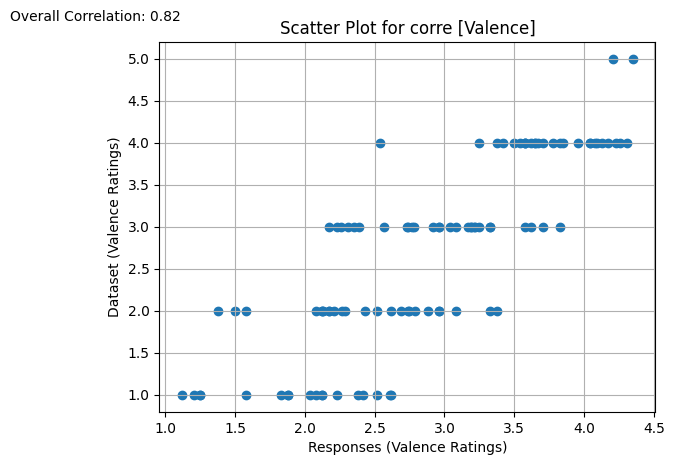

In [ ]:
list1 = val_avg_efile_r
list2 = val_avg_efile

# Calculate correlation matrix
correlation_matrix = np.corrcoef(list1, list2)

# Scatter plot
plt.scatter(list1, list2)
plt.title('Scatter Plot for corre [Valence]')
plt.xlabel('Responses (Valence Ratings)')
plt.ylabel('Dataset (Valence Ratings)')

# Display overall correlation value
overall_correlation = np.corrcoef(list1, list2)[0, 1]
plt.text(0.5, 5.5, f'Overall Correlation: {overall_correlation:.2f}', ha='center', va='center', color='black')
plt.grid(True)
# Display the plot
plt.show()

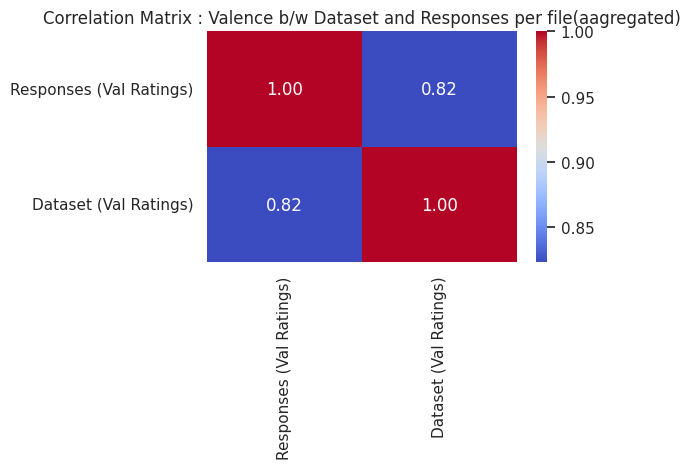

In [ ]:
list1 = val_avg_efile_r
list2 = val_avg_efile

data = np.array([list1, list2])
correlation_matrix = np.corrcoef(data)

sns.set(style="white")
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=["Responses (Val Ratings)", "Dataset (Val Ratings)"], yticklabels=["Responses (Val Ratings)", "Dataset (Val Ratings)"])
plt.title("Correlation Matrix : Valence b/w Dataset and Responses per file(aagregated)")

plt.show()

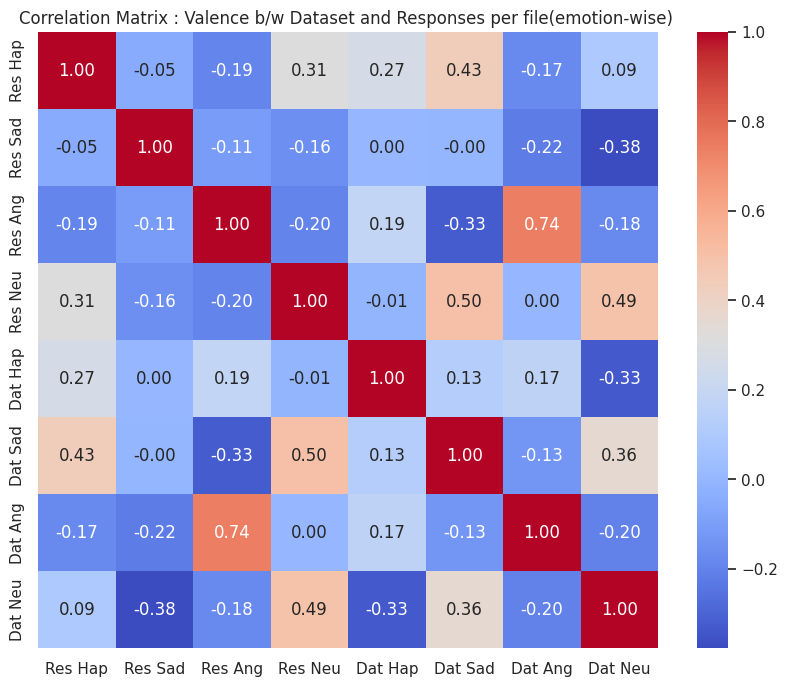

In [ ]:
list1 = val_avg_efile_happy
list2 = val_avg_efile_sad
list3 = val_avg_efile_angry
list4 = val_avg_efile_neutral
list5 = val_avg_efile_r[0:25]
list6 = val_avg_efile_r[25:50]
list7 = val_avg_efile_r[50:75]
list8 = val_avg_efile_r[75:100]

# Create a matrix with the lists
data = np.array([list1, list2, list3, list4, list5, list6, list7, list8])

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data)

# Create a heatmap using seaborn
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[('Res Hap'), ('Res Sad'), ('Res Ang'), ('Res Neu'), ('Dat Hap'), ('Dat Sad'), ('Dat Ang'), ('Dat Neu')],
            yticklabels=[('Res Hap'), ('Res Sad'), ('Res Ang'), ('Res Neu'), ('Dat Hap'), ('Dat Sad'), ('Dat Ang'), ('Dat Neu')])
plt.title("Correlation Matrix : Valence b/w Dataset and Responses per file(emotion-wise) ")
plt.show()

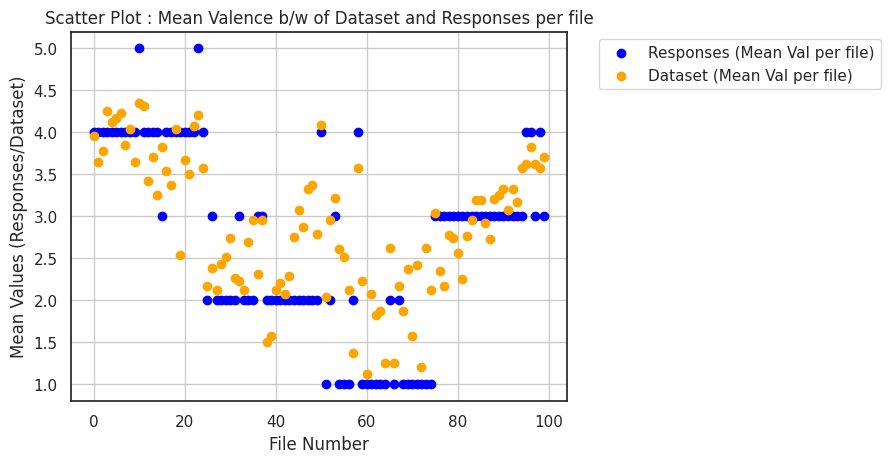

In [ ]:
list1 = val_avg_efile
list2 = val_avg_efile_r

# Scatter plot with different colors for each list
plt.scatter(range(len(list1)), list1, c='blue', label='Responses (Mean Val per file)')
plt.scatter(range(len(list2)), list2, c='orange', label='Dataset (Mean Val per file)')

# Set labels and title
plt.xlabel('File Number')
plt.ylabel('Mean Values (Responses/Dataset)')
plt.title('Scatter Plot : Mean Valence b/w of Dataset and Responses per file')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Correlation Matrices and values beytween responses and dataset values : **AROUSAL**

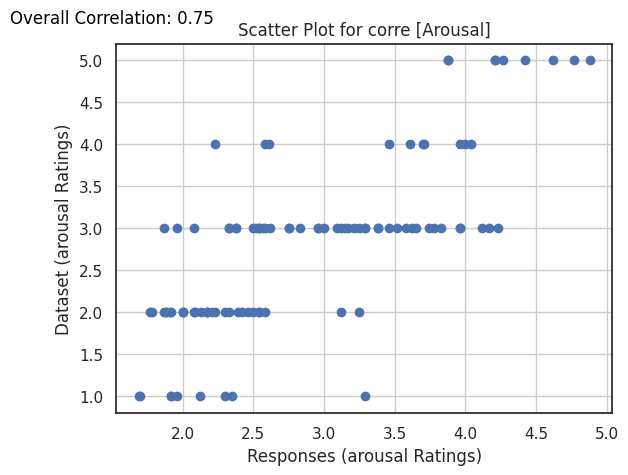

In [ ]:
list1 = arous_avg_efile_r
list2 = arous_avg_efile

# Calculate correlation matrix
correlation_matrix = np.corrcoef(list1, list2)

# Scatter plot
plt.scatter(list1, list2)
plt.title('Scatter Plot for corre [Arousal]')
plt.xlabel('Responses (arousal Ratings)')
plt.ylabel('Dataset (arousal Ratings)')

# Display overall correlation arousue
overall_correlation = np.corrcoef(list1, list2)[0, 1]
plt.text(1.5, 5.5, f'Overall Correlation: {overall_correlation:.2f}', ha='center', va='center', color='black')

plt.grid(True)
# Display the plot
plt.show()

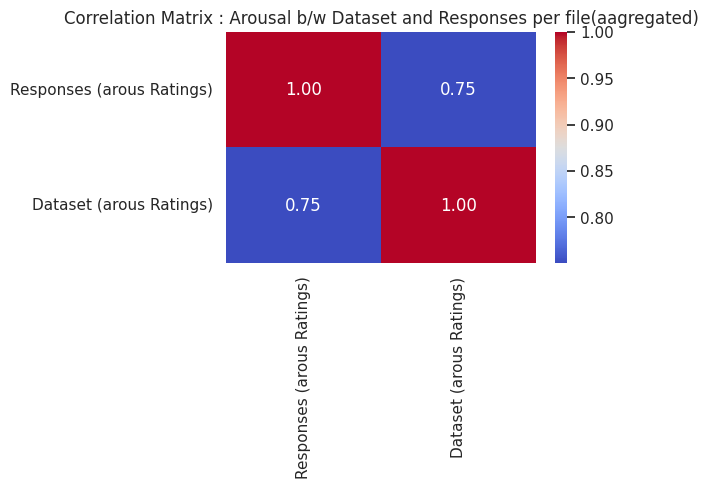

In [ ]:
list1 = arous_avg_efile_r
list2 = arous_avg_efile

data = np.array([list1, list2])
correlation_matrix = np.corrcoef(data)

sns.set(style="white")
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=["Responses (arous Ratings)", "Dataset (arous Ratings)"], yticklabels=["Responses (arous Ratings)", "Dataset (arous Ratings)"])
plt.title("Correlation Matrix : Arousal b/w Dataset and Responses per file(aagregated)")

plt.show()

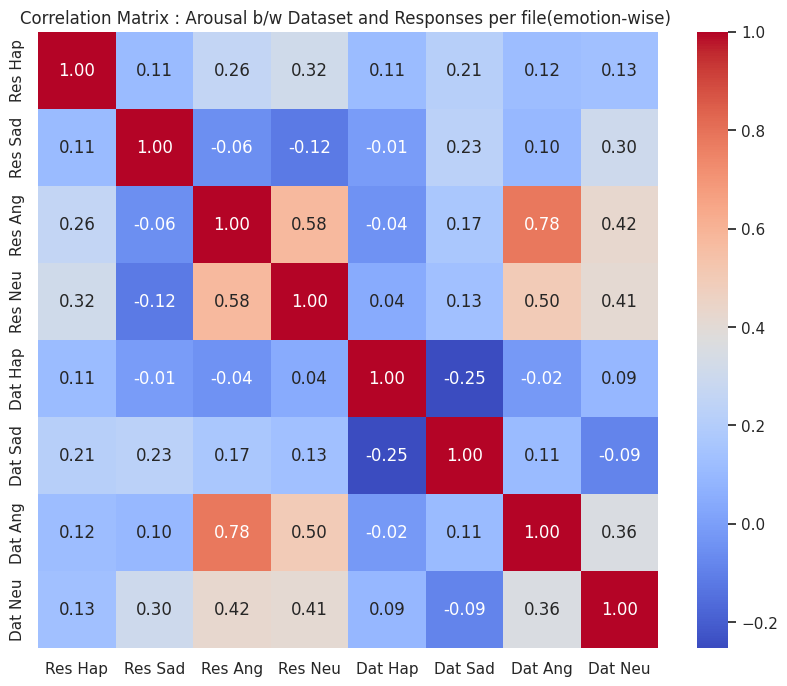

In [ ]:
list1 = arous_avg_efile_happy
list2 = arous_avg_efile_sad
list3 = arous_avg_efile_angry
list4 = arous_avg_efile_neutral
list5 = arous_avg_efile_r[0:25]
list6 = arous_avg_efile_r[25:50]
list7 = arous_avg_efile_r[50:75]
list8 = arous_avg_efile_r[75:100]

# Create a matrix with the lists
data = np.array([list1, list2, list3, list4, list5, list6, list7, list8])

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data)

# Create a heatmap using seaborn
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[('Res Hap'), ('Res Sad'), ('Res Ang'), ('Res Neu'), ('Dat Hap'), ('Dat Sad'), ('Dat Ang'), ('Dat Neu')],
            yticklabels=[('Res Hap'), ('Res Sad'), ('Res Ang'), ('Res Neu'), ('Dat Hap'), ('Dat Sad'), ('Dat Ang'), ('Dat Neu')])
plt.title("Correlation Matrix : Arousal b/w Dataset and Responses per file(emotion-wise) ")
plt.show()

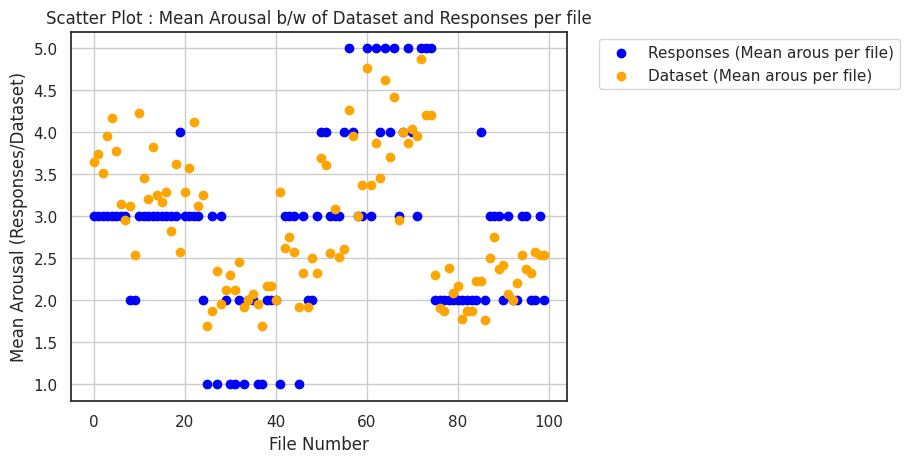

In [ ]:
list1 = arous_avg_efile
list2 = arous_avg_efile_r

# Scatter plot with different colors for each list
plt.scatter(range(len(list1)), list1, c='blue', label='Responses (Mean arous per file)')
plt.scatter(range(len(list2)), list2, c='orange', label='Dataset (Mean arous per file)')

# Set labels and title
plt.xlabel('File Number')
plt.ylabel('Mean Arousal (Responses/Dataset)')
plt.title('Scatter Plot : Mean Arousal b/w of Dataset and Responses per file')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Intra - Rater Reliability

ICC: -0.0322


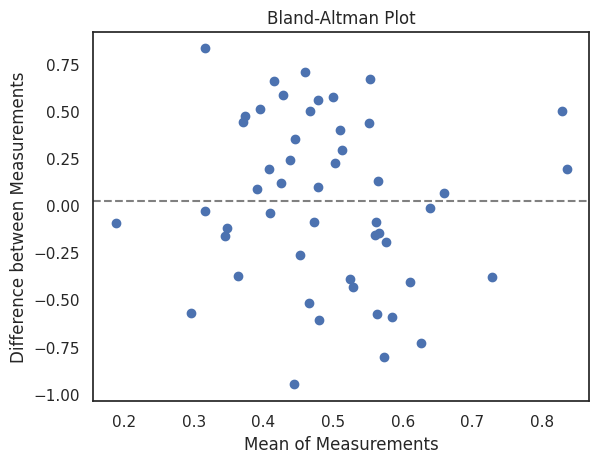

Standard Deviation: 0.2624
Mean Difference: 0.3313


In [ ]:

# Sample Data (replace this with your actual data)
np.random.seed(42)
participants = 50
repetitions = 5
data = np.random.rand(participants, repetitions)

# Function to calculate ICC
def calculate_icc(data):
    from sklearn.metrics import mean_squared_error

    n, k = data.shape
    grand_mean = np.mean(data)
    ss_between = k * np.sum((np.mean(data, axis=1) - grand_mean)**2)
    ss_within = np.sum((data - np.mean(data, axis=1, keepdims=True))**2)
    mean_square_between = ss_between / (participants - 1)
    mean_square_within = ss_within / ((participants - 1) * (repetitions - 1))

    icc = (mean_square_between - mean_square_within) / (mean_square_between + (k-1) * mean_square_within)
    return icc

icc_value = calculate_icc(data)
print(f'ICC: {icc_value:.4f}')

# Function to create Bland-Altman plot
def bland_altman_plot(data):
    mean = np.mean(data, axis=1)
    diff = data[:, 0] - data[:, 1]

    plt.scatter(mean, diff)
    plt.axhline(np.mean(diff), color='gray', linestyle='--')
    plt.title('Bland-Altman Plot')
    plt.xlabel('Mean of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.show()

bland_altman_plot(data)

# Standard Deviation and Mean Difference
std_dev = np.std(data, axis=1)
mean_diff = np.mean(np.abs(np.diff(data, axis=1)), axis=1)

print(f'Standard Deviation: {np.mean(std_dev):.4f}')
print(f'Mean Difference: {np.mean(mean_diff):.4f}')


# Methodology parameters

In [ ]:

# Assuming df_merged_1, df_merged_2, df_merged_3, df_merged_4 are your dataframes

# Define a list of dataframes
dataframes = [df_merged_1, df_merged_2, df_merged_3, df_merged_4]

# Iterate through each dataframe
for i, df in enumerate(dataframes, start=1):
    print(f"DataFrame {i}:")

    # Count the number of male and female participants
    gender_counts = df['Gender'].value_counts()
    print("Male count:", gender_counts.get('Male', 0))
    print("Female count:", gender_counts.get('Female', 0))

    # Count the number of participants in each qualification category
    qualification_counts = df['qualification '].value_counts()
    print("Qualification counts:")
    for qualification, count in qualification_counts.items():
        print(f"{qualification}: {count}")

    print()

DataFrame 1:
Male count: 15
Female count: 8
Qualification counts:
Graduation: 16
Level XI - Level XII or Higher Secondary​​​​​​​: 4
PhD : 2
Post Graduation: 1

DataFrame 2:
Male count: 14
Female count: 12
Qualification counts:
Graduation: 16
Level XI - Level XII or Higher Secondary​​​​​​​: 7
Post Graduation: 2
PhD : 1

DataFrame 3:
Male count: 19
Female count: 5
Qualification counts:
Graduation: 11
Level XI - Level XII or Higher Secondary​​​​​​​: 9
PhD : 2
Post Graduation: 2

DataFrame 4:
Male count: 15
Female count: 8
Qualification counts:
Graduation: 18
Post Graduation: 3
Level XI - Level XII or Higher Secondary​​​​​​​: 3



In [ ]:
# Assuming df_merged_1, df_merged_2, df_merged_3, df_merged_4 are your dataframes

# List of dataframes
dataframes = [df_merged_1, df_merged_2, df_merged_3, df_merged_4]

# Computing mean and standard deviation for each column across all dataframes
mean_values = {col: sum(df[col].mean() for df in dataframes) / len(dataframes) for col in ["total_phq_score", "total_gad_score", "total_pss_score", "total_panas_score"]}
std_dev_values = {col: sum(df[col].std() for df in dataframes) / len(dataframes) for col in ["total_phq_score", "total_gad_score", "total_pss_score", "total_panas_score"]}

# Cumulative values
cumulative_means = {col: sum(df[col].mean() for df in dataframes) for col in ["total_phq_score", "total_gad_score", "total_pss_score", "total_panas_score"]}
cumulative_stds = {col: sum(df[col].std() for df in dataframes) for col in ["total_phq_score", "total_gad_score", "total_pss_score", "total_panas_score"]}

# Displaying mean and standard deviation values
print("Mean values across all dataframes:")
print(mean_values)
print("\nStandard deviation values across all dataframes:")
print(std_dev_values)

# Displaying cumulative values
print("\nCumulative mean values:")
print(cumulative_means)
print("\nCumulative standard deviation values:")
print(cumulative_stds)


Mean values across all dataframes:
{'total_phq_score': 7.509092809364549, 'total_gad_score': 5.707845596432553, 'total_pss_score': 6.285953177257525, 'total_panas_score': 24.92858138238573}

Standard deviation values across all dataframes:
{'total_phq_score': 5.1608229764484275, 'total_gad_score': 4.775981615979057, 'total_pss_score': 3.049463080935992, 'total_panas_score': 4.804243242665048}

Cumulative mean values:
{'total_phq_score': 30.036371237458194, 'total_gad_score': 22.831382385730212, 'total_pss_score': 25.1438127090301, 'total_panas_score': 99.71432552954292}

Cumulative standard deviation values:
{'total_phq_score': 20.64329190579371, 'total_gad_score': 19.103926463916228, 'total_pss_score': 12.197852323743968, 'total_panas_score': 19.21697297066019}


In [ ]:
import pandas as pd

# Assuming you have your dataframes df_merged_1, df_merged_2, df_merged_3, df_merged_4

# Define correct answers
correct_answers = {
    "passage1_q1": "Descartes",
    "passage1_q2": "None of the above",
    "passage1_q3": "Second Life",
    "passage1_q4": "Angry Birds",
    "passage2_q1": "Orange",
    "passage2_q2": "Folic Acid",
    "passage2_q3": "Growing stronger hair"
}

# Function to compute fluency score for each participant
def compute_fluency_score(df):
    score_column = []
    for idx, row in df.iterrows():
        score = 0
        for col, ans in correct_answers.items():
            if row[col] == ans:
                score += 1
        score_column.append(score)
    return score_column

# Compute fluency scores for each dataframe
scores = []

for df in [df_merged_1, df_merged_2, df_merged_3, df_merged_4]:
    df['total_fluency_score'] = compute_fluency_score(df)
    scores.extend(df['total_fluency_score'])

# Compute average and standard deviation
average_score = sum(scores) / len(scores)
std_dev = pd.Series(scores).std()

print("Average total fluency score across all dataframes:", average_score)
print("Standard deviation of total fluency score across all dataframes:", std_dev)


Average total fluency score across all dataframes: 5.494845360824742
Standard deviation of total fluency score across all dataframes: 0.8431551772485074


In [ ]:
df_merged_1["total_panas_score"]

0     19
1     24
2     20
3     30
4     36
5     21
6     33
7     28
8     16
9     29
10    30
11    27
12    21
13    31
14    29
15    22
16    15
17    20
18    26
19    26
20    29
21    20
22    21
Name: total_panas_score, dtype: int64

# Download emotion wise and set wise dataframes

## Set - 1

In [ ]:
file_path = 'dfs_hap.xlsx'
dfs[0].to_excel(file_path)
print("dfs_hap.xlsx", file_path)

dfs_hap.xlsx dfs_hap.xlsx


In [ ]:
file_path = 'dfs_sad.xlsx'
dfs[1].to_excel(file_path)
print("dfs_sad.xlsx", file_path)

dfs_sad.xlsx dfs_sad.xlsx


In [ ]:
file_path = 'dfs_ang.xlsx'
dfs[2].to_excel(file_path)
print("dfs_ang.xlsx", file_path)

dfs_ang.xlsx dfs_ang.xlsx


In [ ]:
file_path = 'dfs_neu.xlsx'
dfs[3].to_excel(file_path)
print("dfs_neu.xlsx", file_path)

dfs_neu.xlsx dfs_neu.xlsx


## Set 2

In [ ]:
file_path = 'dfs2_hap.xlsx'
dfs2[0].to_excel(file_path)
print("dfs2_hap.xlsx", file_path)

dfs2_hap.xlsx dfs2_hap.xlsx


In [ ]:
file_path = 'dfs2_sad.xlsx'
dfs2[1].to_excel(file_path)
print("dfs2_sad.xlsx", file_path)

dfs2_sad.xlsx dfs2_sad.xlsx


In [ ]:
file_path = 'dfs2_ang.xlsx'
dfs2[2].to_excel(file_path)
print("dfs2_ang.xlsx", file_path)

dfs2_ang.xlsx dfs2_ang.xlsx


In [ ]:
file_path = 'dfs2_neu.xlsx'
dfs2[3].to_excel(file_path)
print("dfs2_neu.xlsx", file_path)

dfs2_neu.xlsx dfs2_neu.xlsx


## Set 3

In [ ]:
file_path = 'dfs3_hap.xlsx'
dfs3[0].to_excel(file_path)
print("dfs3_hap.xlsx", file_path)

dfs3_hap.xlsx dfs3_hap.xlsx


In [ ]:
file_path = 'dfs3_sad.xlsx'
dfs3[1].to_excel(file_path)
print("dfs3_sad.xlsx", file_path)

dfs3_sad.xlsx dfs3_sad.xlsx


In [ ]:
file_path = 'dfs3_ang.xlsx'
dfs3[2].to_excel(file_path)
print("dfs3_ang.xlsx", file_path)

dfs3_ang.xlsx dfs3_ang.xlsx


In [ ]:
file_path = 'dfs3_neu.xlsx'
dfs3[3].to_excel(file_path)
print("dfs3_neu.xlsx", file_path)

dfs3_neu.xlsx dfs3_neu.xlsx


## Set 4

In [ ]:
file_path = 'dfs4_hap.xlsx'
dfs4[0].to_excel(file_path)
print("dfs4_hap.xlsx", file_path)

dfs4_hap.xlsx dfs4_hap.xlsx


In [ ]:
file_path = 'dfs4_sad.xlsx'
dfs4[1].to_excel(file_path)
print("dfs4_sad.xlsx", file_path)

dfs4_sad.xlsx dfs4_sad.xlsx


In [ ]:
file_path = 'dfs4_ang.xlsx'
dfs4[2].to_excel(file_path)
print("dfs4_ang.xlsx", file_path)

dfs4_ang.xlsx dfs4_ang.xlsx


In [ ]:
file_path = 'dfs4_neu.xlsx'
dfs4[3].to_excel(file_path)
print("dfs4_neu.xlsx", file_path)

dfs4_neu.xlsx dfs4_neu.xlsx


# temp

## Correcting PSS scores

In [ ]:
df_merged_1['total_pss_score'] = df_merged_1.apply(lambda row: row['q1_pss'] + (4 - row['q2_pss']) + (4 - row['q3_pss']) + row['q4_pss'], axis=1)
df_merged_2['total_pss_score'] = df_merged_2.apply(lambda row: row['q1_pss'] + (4 - row['q2_pss']) + (4 - row['q3_pss']) + row['q4_pss'], axis=1)
df_merged_3['total_pss_score'] = df_merged_3.apply(lambda row: row['q1_pss'] + (4 - row['q2_pss']) + (4 - row['q3_pss']) + row['q4_pss'], axis=1)
df_merged_4['total_pss_score'] = df_merged_4.apply(lambda row: row['q1_pss'] + (4 - row['q2_pss']) + (4 - row['q3_pss']) + row['q4_pss'], axis=1)

In [ ]:
file_path = 'df_merged_1.xlsx'
df_merged_1.to_excel(file_path)
print("df_merged_1.xlsx", file_path)

df_merged_1.xlsx df_merged_1.xlsx


In [ ]:
file_path = 'df_merged_2.xlsx'
df_merged_2.to_excel(file_path)
print("df_merged_2.xlsx", file_path)

df_merged_2.xlsx df_merged_2.xlsx


In [ ]:
file_path = 'df_merged_3.xlsx'
df_merged_3.to_excel(file_path)
print("df_merged_3.xlsx", file_path)

df_merged_3.xlsx df_merged_3.xlsx


In [ ]:
file_path = 'df_merged_4.xlsx'
df_merged_4.to_excel(file_path)
print("df_merged_4.xlsx", file_path)

df_merged_4.xlsx df_merged_4.xlsx
